In [39]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
%matplotlib inline 
warnings.filterwarnings("ignore", category=FutureWarning)

In [40]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import VotingClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
import pickle

In [41]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek

In [42]:
from xgboost import XGBClassifier

In [43]:
#Loading the dataset
data = pd.read_csv('Indian Liver Patient Dataset (ILPD).csv')
print(data.head())

   age  gender  tot_bilirubin  direct_bilirubin  tot_proteins  albumin  \
0   65  Female            0.7               0.1           187       16   
1   62    Male           10.9               5.5           699       64   
2   62    Male            7.3               4.1           490       60   
3   58    Male            1.0               0.4           182       14   
4   72    Male            3.9               2.0           195       27   

   ag_ratio  sgpt  sgot  alkphos  is_patient  
0        18   6.8   3.3     0.90           1  
1       100   7.5   3.2     0.74           1  
2        68   7.0   3.3     0.89           1  
3        20   6.8   3.4     1.00           1  
4        59   7.3   2.4     0.40           1  


In [44]:
#checking for Null or NaN values
print(data.isnull().sum())
print(data.isna().sum())

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             4
is_patient          0
dtype: int64
age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             4
is_patient          0
dtype: int64


In [45]:
#Info of the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
age                 583 non-null int64
gender              583 non-null object
tot_bilirubin       583 non-null float64
direct_bilirubin    583 non-null float64
tot_proteins        583 non-null int64
albumin             583 non-null int64
ag_ratio            583 non-null int64
sgpt                583 non-null float64
sgot                583 non-null float64
alkphos             579 non-null float64
is_patient          583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB
None


In [46]:
#standard statistic measures
print(data.describe())

              age  tot_bilirubin  direct_bilirubin  tot_proteins      albumin  \
count  583.000000     583.000000        583.000000    583.000000   583.000000   
mean    44.746141       3.298799          1.486106    290.576329    80.713551   
std     16.189833       6.209522          2.808498    242.937989   182.620356   
min      4.000000       0.400000          0.100000     63.000000    10.000000   
25%     33.000000       0.800000          0.200000    175.500000    23.000000   
50%     45.000000       1.000000          0.300000    208.000000    35.000000   
75%     58.000000       2.600000          1.300000    298.000000    60.500000   
max     90.000000      75.000000         19.700000   2110.000000  2000.000000   

          ag_ratio        sgpt        sgot     alkphos  is_patient  
count   583.000000  583.000000  583.000000  579.000000  583.000000  
mean    109.910806    6.483190    3.141852    0.947064    1.286449  
std     288.918529    1.085451    0.795519    0.319592    0.452

In [47]:
#Removing the Null or NaN values.
data1 = data
data1 = data1.fillna(data1.mean())
print(data1.isna().sum())
print(data1.isnull().sum())

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             0
is_patient          0
dtype: int64
age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             0
is_patient          0
dtype: int64


As we can see above that now there is no NaN or Null values in the dataset. 

                       age  tot_bilirubin  direct_bilirubin  tot_proteins  \
age               1.000000       0.011763          0.007529      0.080425   
tot_bilirubin     0.011763       1.000000          0.874618      0.206669   
direct_bilirubin  0.007529       0.874618          1.000000      0.234939   
tot_proteins      0.080425       0.206669          0.234939      1.000000   
albumin           0.086883       0.214065          0.233894      0.125680   
ag_ratio          0.019910       0.237831          0.257544      0.167196   
sgpt              0.187461       0.008099          0.000139      0.028514   
sgot              0.265924       0.222250          0.228531      0.165453   
alkphos           0.216089       0.206159          0.200004      0.233960   
is_patient        0.137351       0.220208          0.246046      0.184866   

                   albumin  ag_ratio      sgpt      sgot   alkphos  is_patient  
age               0.086883  0.019910  0.187461  0.265924  0.216089    0

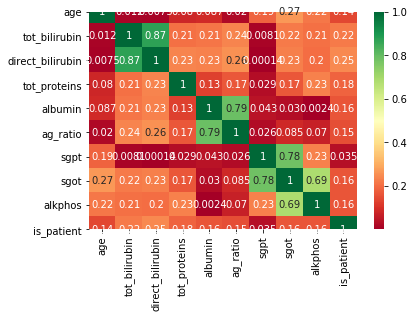

In [48]:
#Checking for Correlation as to reduce dimensionality
print(data1.corr().abs())
sns.heatmap(data1.corr().abs(), annot=True,cmap="RdYlGn")

As we can see above the highest correlation between different columns is 0.87("tot_bilirubin","direct_bilirubin"), which means they are 87% similar and 13% different. So, it is not appropriate to remove any of the coulmns. 

In [49]:
#Changing gender to Numeric values Female to 1 and Male to 0
data1["gender"] = data1["gender"].map({"Female":1, "Male":0})
print(data1["gender"].values)

[1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1
 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0
 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0
 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1
 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 1
 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 1 0 1 

In [50]:
#Normalizing the dataset so that the data scales properly on the algorithms. 

min_max_scaler = preprocessing.MinMaxScaler()
X = data1.drop('is_patient', axis=1)
y = data1[["is_patient"]]

print(len(X))
print(len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=99)
data_training = pd.concat([X_train, y_train], axis=1)
data_test = pd.concat([X_test, y_test], axis=1)
df = data_training.values
df_test = data_test.values
data_training = min_max_scaler.fit_transform(df)
data_testing = min_max_scaler.transform(df_test)

data_norm = pd.DataFrame(data_training, columns=data1.columns)
X_train = data_norm.drop("is_patient", axis=1)
y_train = data_norm[["is_patient"]]

data_normed = pd.DataFrame(data_testing, columns = data1.columns)
X_test = data_normed.drop("is_patient", axis=1)
y_test = data_normed[["is_patient"]]

X = pd.concat([X_train, X_test], axis=0)
y = pd.concat([y_train, y_test], axis=0)

print(len(data_norm))
print(len(data_normed))

583
583
408
175


In [51]:
#Feature Selection 
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=2, verbose=1)
print(X_train.columns)
rfe.fit(X_train, y_train)
print(rfe.ranking_)
print(X_train.columns[rfe.support_])

Index(['age', 'gender', 'tot_bilirubin', 'direct_bilirubin', 'tot_proteins',
       'albumin', 'ag_ratio', 'sgpt', 'sgot', 'alkphos'],
      dtype='object')
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
[6 9 1 1 2 3 5 8 4 7]
Index(['tot_bilirubin', 'direct_bilirubin'], dtype='object')


/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [52]:
#Univariate Selection 
#apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']
print(featureScores.nlargest(10,'Score')) 

           Features     Score
2     tot_bilirubin  6.898676
3  direct_bilirubin  6.847099
1            gender  2.643982
5           albumin  2.517531
6          ag_ratio  2.286247
4      tot_proteins  2.161537
8              sgot  0.759569
9           alkphos  0.571888
0               age  0.343602
7              sgpt  0.066495


[0.10865514 0.02445709 0.11943796 0.09682209 0.11526174 0.1208217
 0.12741837 0.09423632 0.09919908 0.0936905 ]


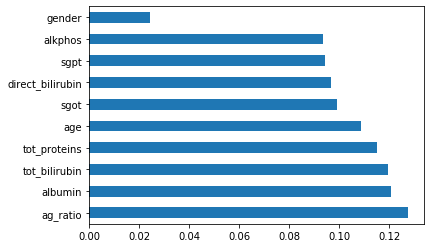

In [53]:
#Feature Importance
model = ExtraTreesClassifier()
model.fit(X_train,y_train.values.ravel())
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [54]:
print(y["is_patient"].value_counts())

0.0    416
1.0    167
Name: is_patient, dtype: int64


Objective of Under and Over Sampling :
            1) High Precision on Majority Class(0.0). High Precision indicates an example labeled as positive is                  indeed positive (small number of FP).
            2) High Recall of Minority Class(1.0). High Recall indicates the class is correctly recognized (small                number of FN).

In [18]:
sns.pairplot(data_norm, hue="is_patient")

/home/srix/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/srix/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


Error in callback <function flush_figures at 0x7feedc2569e0> (for post_execute):


KeyboardInterrupt: 

In [55]:
import os 
print(os.cpu_count())

4


[0.52020536 0.69548154]
0.0    291
1.0    117
Name: is_patient, dtype: int64


/home/srix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/srix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


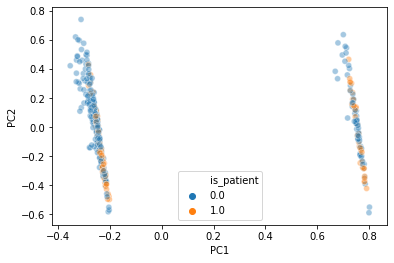

In [56]:
#
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)
print(pca.explained_variance_ratio_.cumsum())
y_temp = y_train
y_temp["PC1"] = X_pca[:,0]
y_temp["PC2"] = X_pca[:,1]
sns.scatterplot(data=y_temp, x="PC1", y="PC2", hue="is_patient", alpha=0.4)
print(y_temp["is_patient"].value_counts())
# print(len(y), len(X_pca))
#print(pca.components_)

In [57]:
print(y_train.head())
y_train = y_train.drop(["PC1", "PC2"], axis=1)
print(y_train.head())

   is_patient       PC1       PC2
0         1.0 -0.203093 -0.476366
1         1.0 -0.225383 -0.340140
2         0.0  0.750240  0.113175
3         1.0 -0.219966 -0.335130
4         0.0 -0.287818  0.492670
   is_patient
0         1.0
1         1.0
2         0.0
3         1.0
4         0.0


In [58]:
def clfFitPredict(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train.values.ravel())
    y_pred = clf.predict(X_test)
    confusionMatrix(y_test, y_pred)

In [59]:
def aurocPredict(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train.values.ravel())
    y_pred_proba = clf.predict_proba(X_test)[:,1]
    print("ROC AUC Score :",roc_auc_score(y_test, y_pred_proba))

In [60]:
def confusionMatrix(y_test, y_pred):
    co = confusion_matrix(y_test, y_pred)
    print('\nConfusion Matrix: \n'+str(co))
    
    total=co[0,0]+co[1,1]+co[0,1]+co[1,0]
    accuracy=(co[0,0]+co[1,1])/total
    print('\nAccuracy : '+ str(accuracy))

    sensitivity = co[0,0]/(co[0,0]+co[0,1])
    print('Sensitivity : '+ str(sensitivity ))
    
    precision = co[0,0]/(co[0,0]+co[1,0])
    print('Precision: ' + str(precision))

    specificity = co[1,1]/(co[1,0]+co[1,1])
    print('Specificity : ' + str(specificity))
    
    fscore = 2*precision*sensitivity/(precision+sensitivity)
    print('F-Score : ' + str(fscore))
    
    print("\n",classification_report(y_test, y_pred), "\n")

In [61]:
def params(confusion_matrix):
    co = confusion_matrix
    print('\nConfusion Matrix By taking mean of all individual confusion matrix folds: \n'+str(co))
    
    total=co[0,0]+co[1,1]+co[0,1]+co[1,0]
    accuracy=(co[0,0]+co[1,1])/total
    print('\nAccuracy : '+ str(accuracy))

    sensitivity = co[0,0]/(co[0,0]+co[0,1])
    print('Sensitivity : '+ str(sensitivity ))
    
    precision = co[0,0]/(co[0,0]+co[1,0])
    print('Precision: ' + str(precision))

    specificity = co[1,1]/(co[1,0]+co[1,1])
    print('Specificity : ' + str(specificity))
    
    fscore = 2*precision*sensitivity/(precision+sensitivity)
    print('F-Score : ' + str(fscore))

In [62]:
def crossValidation(clf, X, y, folds):
    #https://stackoverflow.com/questions/41458834/how-is-scikit-learn-cross-val-predict-accuracy-score-calculated
    scoreclf = cross_val_score(clf, X, y.values.ravel(), cv=folds)
    print(scoreclf,"\n")
    print(np.mean(scoreclf))
    
#     list_of_confmatrix = []
#     kf = KFold(n_splits = folds)
#     kf.get_n_splits(X)
#     for train_index, test_index in kf.split(X):
#         #print("TRAIN:", train_index, "TEST:", test_index)
#         X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index]
#         y_train_kf, y_test_kf = y.iloc[train_index], y.iloc[test_index]
#         clf.fit(X_train_kf, y_train_kf.values.ravel())
#         confmatrix = confusion_matrix(y_test_kf, clf.predict(X_test_kf))
#         list_of_confmatrix.append(confmatrix)
    
#     mean_of_confmatrix = np.mean(list_of_confmatrix, axis=0)
#     params(mean_of_confmatrix)

In [63]:
print(y_train.columns)

Index(['is_patient'], dtype='object')


In [27]:
print("\n----------------------------------------------------------------------\n")

#1 Naive Bayes On under sample dataset
print("Naive Bayes on Original dataset:")
clfFitPredict(GaussianNB(), X_train, X_test, y_train, y_test)

#Cross Validation on Naive Bayes on under sampled datset
print("\nCross Validation of Naive Bayes on Original dataset:")
crossValidation(GaussianNB(), X, y, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Naive Bayes on Original dataset:

Confusion Matrix: 
[[48 77]
 [ 4 46]]

Accuracy : 0.5371428571428571
Sensitivity : 0.384
Precision: 0.9230769230769231
Specificity : 0.92
F-Score : 0.5423728813559322

               precision    recall  f1-score   support

         0.0       0.92      0.38      0.54       125
         1.0       0.37      0.92      0.53        50

    accuracy                           0.54       175
   macro avg       0.65      0.65      0.54       175
weighted avg       0.77      0.54      0.54       175
 


Cross Validation of Naive Bayes on Original dataset:
[0.60273973 0.54109589 0.52739726 0.55172414] 

0.5557392536608408

----------------------------------------------------------------------



In [28]:
print("\n----------------------------------------------------------------------\n")

#2 SVM Classifier On the Original Dataset
print("SVM Classifier on Original dataset:")
clfFitPredict(LinearSVC(), X_train, X_test, y_train, y_test)

#Cross Validation on SVM Classifier on Orginial datset
print("\nCross Validation of SVM Classifier on Original dataset:")
crossValidation(LinearSVC(), X, y, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

SVM Classifier on Original dataset:

Confusion Matrix: 
[[125   0]
 [ 48   2]]

Accuracy : 0.7257142857142858
Sensitivity : 1.0
Precision: 0.7225433526011561
Specificity : 0.04
F-Score : 0.8389261744966443

               precision    recall  f1-score   support

         0.0       0.72      1.00      0.84       125
         1.0       1.00      0.04      0.08        50

    accuracy                           0.73       175
   macro avg       0.86      0.52      0.46       175
weighted avg       0.80      0.73      0.62       175
 


Cross Validation of SVM Classifier on Original dataset:
[0.73287671 0.70547945 0.69178082 0.73103448] 

0.7152928672649976

----------------------------------------------------------------------



In [29]:
print("\n----------------------------------------------------------------------\n")

#3 Logistic Regressor Classifier On the Original Dataset 
print("Logistic Regressor Classifier on Original dataset:")
clfFitPredict(LogisticRegression(), X_train, X_test, y_train, y_test)

#Cross Validation on Logistic Regressor Classifier on Orginial datset
print("\nCross Validation of Logistic Regressor Classifier on Original dataset:")
crossValidation(LogisticRegression(), X, y, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Logistic Regressor Classifier on Original dataset:

Confusion Matrix: 
[[125   0]
 [ 50   0]]

Accuracy : 0.7142857142857143
Sensitivity : 1.0
Precision: 0.7142857142857143
Specificity : 0.0
F-Score : 0.8333333333333333

               precision    recall  f1-score   support

         0.0       0.71      1.00      0.83       125
         1.0       0.00      0.00      0.00        50

    accuracy                           0.71       175
   macro avg       0.36      0.50      0.42       175
weighted avg       0.51      0.71      0.60       175
 


Cross Validation of Logistic Regressor Classifier on Original dataset:
[0.71917808 0.70547945 0.7260274  0.71724138] 

0.7169815777042986

----------------------------------------------------------------------



/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
print("\n----------------------------------------------------------------------\n")

#4 KNN Classifier On the Original Dataset 
print(" KNN Classifier on Original dataset:")
clfFitPredict(KNeighborsClassifier(n_neighbors = 2), X_train, X_test, y_train, y_test)

#Cross Validation on KNN Classifier on Orginial datset
print("\nCross Validation of  KNN Classifier  on Original dataset:")
crossValidation(KNeighborsClassifier(n_neighbors = 2), X, y, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

 KNN Classifier on Original dataset:

Confusion Matrix: 
[[116   9]
 [ 44   6]]

Accuracy : 0.6971428571428572
Sensitivity : 0.928
Precision: 0.725
Specificity : 0.12
F-Score : 0.8140350877192983

               precision    recall  f1-score   support

         0.0       0.72      0.93      0.81       125
         1.0       0.40      0.12      0.18        50

    accuracy                           0.70       175
   macro avg       0.56      0.52      0.50       175
weighted avg       0.63      0.70      0.63       175
 


Cross Validation of  KNN Classifier  on Original dataset:
[0.71232877 0.65068493 0.70547945 0.71034483] 

0.6947094945677845

----------------------------------------------------------------------



In [31]:
print("\n----------------------------------------------------------------------\n")

#5 RandomForest Classifier On the Original Dataset 
print("RandomForest Classifier on Original dataset:")
clfFitPredict(RandomForestClassifier(max_depth=4, random_state=0), X_train, X_test, y_train, y_test)

#Cross Validation on RandomForest Classifier on Orginial datset
print("\nCross Validation of  RandomForest Classifier on Original dataset:")
crossValidation(RandomForestClassifier(max_depth=4, random_state=0), X, y, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

RandomForest Classifier on Original dataset:

Confusion Matrix: 
[[121   4]
 [ 43   7]]

Accuracy : 0.7314285714285714
Sensitivity : 0.968
Precision: 0.7378048780487805
Specificity : 0.14
F-Score : 0.8373702422145328

               precision    recall  f1-score   support

         0.0       0.74      0.97      0.84       125
         1.0       0.64      0.14      0.23        50

    accuracy                           0.73       175
   macro avg       0.69      0.55      0.53       175
weighted avg       0.71      0.73      0.66       175
 


Cross Validation of  RandomForest Classifier on Original dataset:
[0.68493151 0.70547945 0.71232877 0.71724138] 

0.7049952763344355

----------------------------------------------------------------------



In [32]:
print("\n----------------------------------------------------------------------\n")

#6 Voting Classifier for Original Dataset
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
print("Voting Classifier on Original dataset:")
clfs = [('rf', RandomForestClassifier(max_depth=4,random_state=1)), ('lr',LogisticRegression()), ('svm',LinearSVC())]
vclf = VotingClassifier(estimators=clfs, voting='hard')
clfFitPredict(vclf, X_train, X_test, y_train, y_test)

#Cross Validation on Voting Classifier on Orginial datset
print("\nCross Validation of Voting Classifier on Original dataset:")
crossValidation(vclf, X, y, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Voting Classifier on Original dataset:

Confusion Matrix: 
[[125   0]
 [ 48   2]]

Accuracy : 0.7257142857142858
Sensitivity : 1.0
Precision: 0.7225433526011561
Specificity : 0.04
F-Score : 0.8389261744966443

               precision    recall  f1-score   support

         0.0       0.72      1.00      0.84       125
         1.0       1.00      0.04      0.08        50

    accuracy                           0.73       175
   macro avg       0.86      0.52      0.46       175
weighted avg       0.80      0.73      0.62       175
 


Cross Validation of Voting Classifier on Original dataset:
[0.7260274  0.70547945 0.71232877 0.73103448] 

0.7187175247992443

----------------------------------------------------------------------



In [64]:
print("\n----------------------------------------------------------------------\n")

#AdaBoostClassifier With Decision Tree Classifier as base estimator 
dt = DecisionTreeClassifier(max_depth=1, random_state=1)
adb_clf = AdaBoostClassifier(base_estimator=dt, n_estimators=100, learning_rate=0.025)
print("\nAdaBoost Classifier on Original dataset:")
clfFitPredict(adb_clf, X_train, X_test, y_train, y_test)

#Cross Validation on AdaBoost Classifier on Orginial datset
print("\nCross Validation of AdaBoost Classifier on Original dataset:")
crossValidation(adb_clf, X, y, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


AdaBoost Classifier on Original dataset:

Confusion Matrix: 
[[124   1]
 [ 47   3]]

Accuracy : 0.7257142857142858
Sensitivity : 0.992
Precision: 0.7251461988304093
Specificity : 0.06
F-Score : 0.8378378378378378

               precision    recall  f1-score   support

         0.0       0.73      0.99      0.84       125
         1.0       0.75      0.06      0.11        50

    accuracy                           0.73       175
   macro avg       0.74      0.53      0.47       175
weighted avg       0.73      0.73      0.63       175
 


Cross Validation of AdaBoost Classifier on Original dataset:
[0.71232877 0.73287671 0.7260274  0.71724138] 

0.7221185640056684

----------------------------------------------------------------------



In [65]:
print("\n----------------------------------------------------------------------\n")

#AdaBoostClassifier With SVC as base estimator 

svc_adb = SVC(probability=True, kernel='linear')
adb_clf_svc = AdaBoostClassifier(base_estimator=svc_adb, n_estimators=100, learning_rate=0.025)
print("\nAdaBoostClassifier with SVM as base estimator on Original dataset:")
clfFitPredict(adb_clf_svc, X_train, X_test, y_train, y_test)


#Cross Validation on AdaBoostClassifier on Orginial datset
print("\nCross Validation of AdaBoostClassifier with SVM as base estimator on Original dataset:")
crossValidation(adb_clf_svc, X, y, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


AdaBoostClassifier with SVM as base estimator on Original dataset:

Confusion Matrix: 
[[125   0]
 [ 50   0]]

Accuracy : 0.7142857142857143
Sensitivity : 1.0
Precision: 0.7142857142857143
Specificity : 0.0
F-Score : 0.8333333333333333

               precision    recall  f1-score   support

         0.0       0.71      1.00      0.83       125
         1.0       0.00      0.00      0.00        50

    accuracy                           0.71       175
   macro avg       0.36      0.50      0.42       175
weighted avg       0.51      0.71      0.60       175
 


Cross Validation of AdaBoostClassifier with SVM as base estimator on Original dataset:


/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.71232877 0.71232877 0.71232877 0.71724138] 

0.7135569201700519

----------------------------------------------------------------------



In [67]:
print("\n----------------------------------------------------------------------\n")

#GradientBoostingClassifier On Original Dataset

gbc = GradientBoostingClassifier(max_depth=1, subsample=0.8, max_features=0.2, n_estimators=300, random_state=0)
print("\nGradientBoostingClassifier on Original dataset :")
clfFitPredict(gbc, X_train, X_test, y_train, y_test)

print("\n----------------------------------------------------------------------\n")

#Cross Validation on GradientBoostingClassifier on Orginial datset
print("\nCross Validation of GradientBoostingClassifier on Original dataset:")
crossValidation(gbc, X, y, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


GradientBoostingClassifier on Original dataset :

Confusion Matrix: 
[[112  13]
 [ 29  21]]

Accuracy : 0.76
Sensitivity : 0.896
Precision: 0.7943262411347518
Specificity : 0.42
F-Score : 0.8421052631578948

               precision    recall  f1-score   support

         0.0       0.79      0.90      0.84       125
         1.0       0.62      0.42      0.50        50

    accuracy                           0.76       175
   macro avg       0.71      0.66      0.67       175
weighted avg       0.74      0.76      0.74       175
 


----------------------------------------------------------------------


Cross Validation of GradientBoostingClassifier on Original dataset:
[0.7260274  0.70547945 0.69863014 0.74482759] 

0.7187411431270667

----------------------------------------------------------------------



In [68]:
print("\n----------------------------------------------------------------------\n")

#XGBClassifier on the Original Dataset

xgb_clf = XGBClassifier(objective='binary:logistic', booster='gblinear', n_estimators=10, seed=1)
print("XGBClassifier on Original dataset :")
clfFitPredict(xgb_clf, X_train, X_test, y_train, y_test)

#Cross Validation on XGBClassifier on Orginial datset
print("\nCross Validation of XGBClassifier on Original dataset:")
crossValidation(xgb_clf, X, y, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

XGBClassifier on Original dataset :

Confusion Matrix: 
[[125   0]
 [ 50   0]]

Accuracy : 0.7142857142857143
Sensitivity : 1.0
Precision: 0.7142857142857143
Specificity : 0.0
F-Score : 0.8333333333333333

               precision    recall  f1-score   support

         0.0       0.71      1.00      0.83       125
         1.0       0.00      0.00      0.00        50

    accuracy                           0.71       175
   macro avg       0.36      0.50      0.42       175
weighted avg       0.51      0.71      0.60       175
 


Cross Validation of XGBClassifier on Original dataset:
[0.71232877 0.71232877 0.71232877 0.71724138] 

0.7135569201700519

----------------------------------------------------------------------



/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
#Classification With PCA Training dataset

pca_1 = PCA()
X_pca_1 = pca_1.fit_transform(X_train)
print(pca_1.explained_variance_ratio_.cumsum())

pca1 = PCA(n_components=6)
X_pca_train1 = pd.DataFrame(pca1.fit_transform(X_train))
X_pca_test1 = pd.DataFrame(pca1.transform(X_test))

X_pca1 = pd.concat([X_pca_train1, X_pca_test1], axis=0)

print("\n----------------------------------------------------------------------\n")

#1 Naive Bayes On PCA Training dataset
print("Naive Bayes on PCA Training dataset:")
clfFitPredict(GaussianNB(), X_pca_train1, X_pca_test1, y_train, y_test)

#Cross Validation on Naive Bayes on PCA Training dataset:
print("\nCross Validation of Naive Bayes on PCA Training dataset:")
crossValidation(GaussianNB(), X_pca1, y, 4)

print("\n----------------------------------------------------------------------\n")

#2.1 SVM Classifier On PCA Training dataset:
print("SVM Classifier on PCA Training dataset:")
clfFitPredict(LinearSVC(), X_pca_train1, X_pca_test1, y_train, y_test)

#Cross Validation on SVM Classifier on PCA Training dataset:
print("\nCross Validation of SVM Classifier on PCA Training dataset:")
crossValidation(LinearSVC(), X_pca1, y, 4)

print("\n----------------------------------------------------------------------\n")

#3.1 Logistic Regression Classifier On PCA Training dataset:
print("Logistic Regression Classifier on PCA Training dataset:")
clfFitPredict(LogisticRegression(), X_pca_train1, X_pca_test1, y_train, y_test)

#Cross Validation on Logistic Regression Classifier on PCA Training dataset:
print("\nCross Validation of Logistic Regression Classifier on PCA Training dataset::")
crossValidation(LogisticRegression(), X_pca1, y, 4)

print("\n----------------------------------------------------------------------\n")

#4.1 KNN Classifier On PCA Training dataset
print("KNN Classifier on PCA Training dataset:")
clfFitPredict(KNeighborsClassifier(n_neighbors = 2), X_pca_train1, X_pca_test1, y_train, y_test)

#Cross Validation on KNN Classifier on PCA Training dataset:
print("\nCross Validation of KNN Classifier on PCA Training dataset:")
crossValidation(KNeighborsClassifier(n_neighbors = 2), X_pca1, y, 4)

print("\n----------------------------------------------------------------------\n")

#5.1 Random Forest Classifier On PCA Training dataset:
print("Random Forest Classifier on PCA Training dataset:")
clfFitPredict(RandomForestClassifier(max_depth=4, random_state=0), X_pca_train1, X_pca_test1, y_train, y_test)

#Cross Validation on Random Forest Classifier on PCA Training dataset:
print("\nCross Validation of Random Forest Classifier on PCA Training dataset:")
crossValidation(RandomForestClassifier(max_depth=4, random_state=0), X_pca1, y, 4)

print("\n----------------------------------------------------------------------\n")

#6 Voting Classifier for PCA Training dataset:
print("Voting Classifier on PCA Training dataset:")
clfFitPredict(vclf, X_pca_train1, X_pca_test1, y_train, y_test)

#Cross Validation on Voting Classifier on PCA Training dataset:
print("\nCross Validation of Voting Classifier on PCA Training dataset:")
crossValidation(vclf, X_pca1, y, 4)

print("\n----------------------------------------------------------------------\n")

#7 AdaBoostClassifier With DecisionTree as base estimator on PCA Training Dataset 
print("AdaBoostClassifier with Decision Tree Classifier as base estimator")
clfFitPredict(adb_clf, X_pca_train1, X_pca_test1, y_train, y_test)

#Cross Validation on AdaBoost Classifier with DecisionTree as base estimator on PCA Training Dataset
print("\nCross Validation of AdaBoost Classifier on PCA Training dataset:")
crossValidation(adb_clf, X_pca1, y, 4)

print("\n----------------------------------------------------------------------\n")

#8 AdaBoostClassifier With SVC on PCA Training Dataset 
print("\nAdaBoostClassifier With SVC as base estimator on PCA Training Dataset ")
clfFitPredict(adb_clf_svc, X_pca_train1, X_pca_test1, y_train, y_test)


#Cross Validation on AdaBoostClassifier with SVC on PCA Training dataset
print("\nCross Validation of AdaBoostClassifier with SVC as base estimator on PCA Training dataset:")
crossValidation(adb_clf_svc, X_pca1, y, 4)

print("\n----------------------------------------------------------------------\n")

#9 GradientBoostingClassifier On PCA Training Dataset
print("\nGradientBoostingClassifier on PCA Training Dataset")
clfFitPredict(gbc, X_pca_train1, X_pca_test1, y_train, y_test)

#Cross Validation on GradientBoostingClassifier on PCA Training datset
print("\nCross Validation of GradientBoostingClassifier on PCA Training dataset:")
crossValidation(gbc, X_pca1, y, 4)

print("\n----------------------------------------------------------------------\n")

#10 XGBClassifier on PCA Training Dataset
print("\nXGBClassifier on PCA Training Dataset")
clfFitPredict(xgb_clf, X_pca_train1, X_pca_test1, y_train, y_test)

#Cross Validation on XGBClassifier on PCA Training Dataset
print("\nCross Validation of XGBClassifier on PCA Training dataset:")
crossValidation(xgb_clf, X_pca1, y, 4)

print("\n----------------------------------------------------------------------\n")

[0.52020536 0.69548154 0.80807882 0.89162226 0.93410336 0.9663823
 0.99381232 0.99730793 0.99913325 1.        ]

----------------------------------------------------------------------

Naive Bayes on PCA Training dataset:

Confusion Matrix: 
[[78 47]
 [16 34]]

Accuracy : 0.64
Sensitivity : 0.624
Precision: 0.8297872340425532
Specificity : 0.68
F-Score : 0.7123287671232877

               precision    recall  f1-score   support

         0.0       0.83      0.62      0.71       125
         1.0       0.42      0.68      0.52        50

    accuracy                           0.64       175
   macro avg       0.62      0.65      0.62       175
weighted avg       0.71      0.64      0.66       175
 


Cross Validation of Naive Bayes on PCA Training dataset:
[0.54109589 0.65068493 0.60958904 0.62068966] 

0.6055148795465282

----------------------------------------------------------------------

SVM Classifier on PCA Training dataset:

Confusion Matrix: 
[[125   0]
 [ 50   0]]

Accuracy : 

/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.71917808 0.70547945 0.73287671 0.71724138] 

0.7186939064714218

----------------------------------------------------------------------

KNN Classifier on PCA Training dataset:

Confusion Matrix: 
[[117   8]
 [ 45   5]]

Accuracy : 0.6971428571428572
Sensitivity : 0.936
Precision: 0.7222222222222222
Specificity : 0.1
F-Score : 0.8153310104529617

               precision    recall  f1-score   support

         0.0       0.72      0.94      0.82       125
         1.0       0.38      0.10      0.16        50

    accuracy                           0.70       175
   macro avg       0.55      0.52      0.49       175
weighted avg       0.63      0.70      0.63       175
 


Cross Validation of KNN Classifier on PCA Training dataset:
[0.69178082 0.6369863  0.71917808 0.71724138] 

0.6912966461974492

----------------------------------------------------------------------

Random Forest Classifier on PCA Training dataset:

Confusion Matrix: 
[[121   4]
 [ 47   3]]

Accuracy : 0.7085714285

NameError: name 'vclf' is not defined

In [71]:
param_grid_svc = {'C':[0.1, 1, 10, 50, 100, 500, 1000, 1500], 
              'gamma': [1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 'scale', 'auto'], 
              'kernel': ['rbf', 'linear', 'poly', 'rbf', 'sigmoid']
             }

param_grid_logreg = {'penalty':['l1', 'l2', 'elasticnet'],
              'C':[0.1, 1, 10, 50, 100, 500, 1000, 1500], 
              'solver':['liblinear', 'lbfgs', 'saga','newton-cg']
             }


param_grid_rf = {'n_estimators':[16, 32, 64, 100, 300, 500, 800, 1000, 1250, 1500], 
              'max_features':['auto', 'sqrt'],
              'max_depth':np.linspace(1, 32, 32),
              'min_samples_split': np.linspace(0.1, 1.0, 10),
              'min_samples_leaf': np.linspace(0.1, 0.5, 5),
              'bootstrap': [True, False]
             }
param_grid_knn = {'leaf_size':list(range(1,50)),
              'n_neighbors':list(range(1,30)),
              'p':[1, 2, 3, 4, 5], 
              'weights':['uniform', 'distance'],
              'algorithm':['auto', 'ball_tree','kd_tree','brute']
             }

param_grid_gbc  = {'learning_rate':[1, 0.5, 0.25, 0.1, 0.05, 0.01, 0.005, 0.001],
               'n_estimators':[32, 64, 100, 300, 500, 750, 1000, 1250, 1500],
               'max_depth' : np.linspace(1, 32, 32, endpoint=True),
               'min_samples_split' : np.linspace(0.1, 1.0, 10, endpoint=True),
               'min_samples_leaf' : np.linspace(0.1, 0.5, 5, endpoint=True)
              }

param_grid_adc = {'n_estimators': [16, 32, 64, 100, 300, 500, 800, 1000, 1250, 1500],
              'learning_rate':[1, 0.5, 0.25, 0.1, 0.05, 0.01, 0.005, 0.001],
              'algorithm':['SAMME', 'SAMME.R']
             }

param_grid_adc_svc = {'n_estimators': [16, 32, 64, 100, 300, 500, 800, 1000, 1250, 1500],
              'learning_rate':[1, 0.5, 0.25, 0.1, 0.05, 0.01, 0.005, 0.001],
              'algorithm':['SAMME', 'SAMME.R']
             }


In [72]:
#Hyperparameter Tuning for SVC
#https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

random_svc = RandomizedSearchCV(estimator = SVC(random_state=0), 
                            param_distributions = param_grid_svc, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )

random_svc.fit(X_train, y_train.values.ravel())
joblib.dump(random_svc, "RSCV_SVC.pkl")
# print("\nBest Parameters :",random.best_params_)
# print("\nBest Score :", random.best_score_)
# print("\nAccuracy Score :",accuracy_score(y_test, random.predict(X_test)))
# print("\n----------------------------------------------------------------------\n")

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   16.3s finished


['RSCV_SVC.pkl']

In [73]:
RSCV_SVC_loaded = joblib.load("RSCV_SVC.pkl")
print("\nRandomizedSearchCV result for SVC on Original Dataset -")
print("\nBest Parameters :",RSCV_SVC_loaded.best_params_)
print("\nBest Score :", RSCV_SVC_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_SVC_loaded.predict(X_test)))

print("\n----------------------------------------------------------------------\n")


RandomizedSearchCV result for SVC on Original Dataset -

Best Parameters : {'kernel': 'rbf', 'gamma': 0.0001, 'C': 50}

Best Score : 0.7132926829268291

Accuracy Score : 0.7142857142857143

----------------------------------------------------------------------



In [75]:
random_svc_pca = RandomizedSearchCV(estimator = SVC(random_state=0), 
                            param_distributions = param_grid_svc, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )

random_svc_pca.fit(X_pca_train1, y_train.values.ravel())
joblib.dump(random_svc_pca, "RSCV_SVC_pca.pkl")

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.9s finished


['RSCV_SVC_pca.pkl']

In [76]:
print("\nRandomizedSearchCV results on SVC with PCA Original Dataset - ")
RSCV_SVC_pca_loaded = joblib.load("RSCV_SVC_pca.pkl")
print("\nBest Parameters :",RSCV_SVC_pca_loaded.best_params_)
print("\nBest Score :", RSCV_SVC_pca_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_SVC_pca_loaded.predict(X_pca_test1)))
print("\n----------------------------------------------------------------------\n")


RandomizedSearchCV results on SVC with PCA Original Dataset - 

Best Parameters : {'kernel': 'rbf', 'gamma': 0.0001, 'C': 50}

Best Score : 0.7132926829268291

Accuracy Score : 0.7142857142857143

----------------------------------------------------------------------



In [118]:
#Hyperparameter Tuning for Logistic Regression 

#https://towardsdatascience.com/logistic-regression-model-tuning-with-scikit-learn-part-1-425142e01af5
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

random_logreg = RandomizedSearchCV(estimator=LogisticRegression(), 
                            param_distributions = param_grid_logreg, 
                            cv=10,
                            scoring='accuracy', 
                            refit=True,
                            verbose=1,
                            n_jobs=-1,
                            n_iter=100,
                            random_state=0
                           )

random_logreg.fit(X_train, y_train.values.ravel())
joblib.dump(random_logreg, "RSCV_LR.pkl")
# print("\nBest Parameters :",random_logreg.best_params_) 
# print("\nBest Score :",random.best_score_)
# print("\nAccuracy Score :",accuracy_score(y_test, random_logreg.predict(X_test)))


/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 96 is smaller than n_iter=100. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:    6.7s finished


['RSCV_LR.pkl']

In [77]:
RSCV_LR_loaded = joblib.load("RSCV_LR.pkl")
print("\nRandomizedSearchCV results for Logisitic Regression On Original Dataset -")
print("\nBest Parameters :", RSCV_LR_loaded.best_params_) 
print("\nBest Score :", RSCV_LR_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_LR_loaded.predict(X_test)))


RandomizedSearchCV results for Logisitic Regression On Original Dataset -

Best Parameters : {'solver': 'liblinear', 'penalty': 'l1', 'C': 50}

Best Score : 0.7182317073170732

Accuracy Score : 0.7371428571428571


In [123]:
random_logreg_pca = RandomizedSearchCV(estimator = LogisticRegression(), 
                            param_distributions = param_grid_logreg, 
                            refit=True,
                            verbose=True,
                            scoring='accuracy',
                            cv=10, 
                            n_jobs=-1, 
                            random_state = 0
                           )

random_logreg_pca.fit(X_pca_train1, y_train.values.ravel())
joblib.dump(random_logreg_pca, "RSCV_LR_pca.pkl")

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished


['RSCV_LR_pca.pkl']

In [78]:
print("\nRandomizedSearchCV results on LR with PCA Original Dataset - ")
RSCV_LR_pca_loaded = joblib.load("RSCV_LR_pca.pkl")
print("\nBest Parameters :",RSCV_LR_pca_loaded.best_params_)
print("\nBest Score :", RSCV_LR_pca_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_LR_pca_loaded.predict(X_pca_test1)))

print("\n----------------------------------------------------------------------\n")



RandomizedSearchCV results on LR with PCA Original Dataset - 

Best Parameters : {'solver': 'liblinear', 'penalty': 'l2', 'C': 1}

Best Score : 0.715731707317073

Accuracy Score : 0.7142857142857143

----------------------------------------------------------------------



In [124]:
#Hyperparameter Tuning for RandomForest 
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
#https://towardsdatascience.com/optimizing-hyperparameters-in-random-forest-classification-ec7741f9d3f6

random_rf = RandomizedSearchCV(estimator=RandomForestClassifier(random_state = 1),
                               param_distributions=param_grid_rf, 
                               verbose=False, 
                               cv=10,
                               scoring='accuracy', 
                               refit=True,
                               n_jobs=-1,
                               random_state=0
                              )
random_rf.fit(X_train, y_train.values.ravel())
joblib.dump(random_rf, "RSCV_RF.pkl")
# print("\nBest Parameter :",random_rf.best_params_)
# print("\nBest Score :", random_rf.best_score_)
# print("\nAccuracy Score :",accuracy_score(y_test, random_rf.predict(X_test)))

['RSCV_RF.pkl']

In [79]:
RSCV_RF_loaded = joblib.load("RSCV_RF.pkl")
print("\nRandomizedSearchCV results for Random Forest on Original Dataset -")
print("\nBest Parameter :",RSCV_RF_loaded.best_params_)
print("\nBest Score :", RSCV_RF_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_RF_loaded.predict(X_test)))


RandomizedSearchCV results for Random Forest on Original Dataset -

Best Parameter : {'n_estimators': 100, 'min_samples_split': 0.2, 'min_samples_leaf': 0.2, 'max_features': 'sqrt', 'max_depth': 11.0, 'bootstrap': False}

Best Score : 0.7126811594202899

Accuracy Score : 0.6285714285714286


In [128]:
random_rf_pca = RandomizedSearchCV(estimator = RandomForestClassifier(random_state = 1), 
                            param_distributions = param_grid_rf, 
                            refit=True,
                            verbose=True,
                            scoring='accuracy',
                            cv=10, 
                            n_jobs=-1, 
                            random_state = 0
                           )

random_rf_pca.fit(X_pca_train1, y_train.values.ravel())
joblib.dump(random_rf_pca, "RSCV_RF_pca.pkl")

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   26.9s finished


['RSCV_RF_pca.pkl']

In [80]:
print("\nRandomizedSearchCV results on RF with PCA Original Dataset - ")
RSCV_RF_pca_loaded = joblib.load("RSCV_RF_pca.pkl")
print("\nBest Parameters :",RSCV_RF_pca_loaded.best_params_)
print("\nBest Score :", RSCV_RF_pca_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_RF_pca_loaded.predict(X_pca_test1)))

print("\n----------------------------------------------------------------------\n")


RandomizedSearchCV results on RF with PCA Original Dataset - 

Best Parameters : {'n_estimators': 64, 'min_samples_split': 0.4, 'min_samples_leaf': 0.30000000000000004, 'max_features': 'sqrt', 'max_depth': 3.0, 'bootstrap': True}

Best Score : 0.7132926829268291

Accuracy Score : 0.7142857142857143

----------------------------------------------------------------------



In [130]:
#Hyperparameter Tuning in KNN 
#https://medium.com/@mohtedibf/in-depth-parameter-tuning-for-knn-4c0de485baf6
#https://medium.com/datadriveninvestor/k-nearest-neighbors-in-python-hyperparameters-tuning-716734bc557f
#https://www.kaggle.com/mayu0116/hyper-parameters-tuning-of-dtree-rf-svm-knn

clf_knn = RandomizedSearchCV( estimator = KNeighborsClassifier(), 
                    param_distributions = param_grid_knn,
                    cv=10,
                    verbose=False,
                    scoring='accuracy', 
                    refit=True,
                    n_jobs=-1,
                    random_state=0
                  )
clf_knn.fit(X_train, y_train.values.ravel())
joblib.dump(clf_knn, "RSCV_knn.pkl")
# print("\nBest Params :",clf_knn.best_params_) 
# print("\nBest Score :",clf_knn.best_score_)
# print("\nAccuracy Score :",accuracy_score(y_test, clf_knn.predict(X_test)))

['RSCV_knn.pkl']

In [81]:
RSCV_knn_loaded = joblib.load('RSCV_knn.pkl') 
print("\nRandomizedSearchCV results for KNN on Original Dataset -")
print("\nBest Params :", RSCV_knn_loaded.best_params_) 
print("\nBest Score :", RSCV_knn_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_knn_loaded.predict(X_test)))


RandomizedSearchCV results for KNN on Original Dataset -

Best Params : {'weights': 'uniform', 'p': 4, 'n_neighbors': 22, 'leaf_size': 34, 'algorithm': 'brute'}

Best Score : 0.7060365853658536

Accuracy Score : 0.7142857142857143


In [135]:
random_knn_pca = RandomizedSearchCV(estimator = KNeighborsClassifier(), 
                            param_distributions = param_grid_knn, 
                            refit=True,
                            verbose=True,
                            scoring='accuracy',
                            cv=10, 
                            n_jobs=-1, 
                            random_state = 0
                           )

random_knn_pca.fit(X_pca_train1, y_train.values.ravel())
joblib.dump(random_knn_pca, "RSCV_KNN_pca.pkl")

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished


['RSCV_KNN_pca.pkl']

In [82]:
print("\nRandomizedSearchCV results on KNN with PCA Original Dataset - ")
RSCV_KNN_pca_loaded = joblib.load("RSCV_KNN_pca.pkl")
print("\nBest Parameters :",RSCV_KNN_pca_loaded.best_params_)
print("\nBest Score :", RSCV_KNN_pca_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_KNN_pca_loaded.predict(X_pca_test1)))

print("\n----------------------------------------------------------------------\n")


RandomizedSearchCV results on KNN with PCA Original Dataset - 

Best Parameters : {'weights': 'uniform', 'p': 4, 'n_neighbors': 22, 'leaf_size': 34, 'algorithm': 'brute'}

Best Score : 0.6915243902439026

Accuracy Score : 0.7257142857142858

----------------------------------------------------------------------



In [93]:
#Hyperparameter Tuning for GradientBoostingClassifier
#https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/
#https://medium.com/all-things-ai/in-depth-parameter-tuning-for-gradient-boosting-3363992e9bae
#https://www.datacareer.de/blog/parameter-tuning-in-gradient-boosting-gbm/

clf_gbc = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                             param_distributions=param_grid_gbc,
                             cv=10,
                             scoring='accuracy',
                             refit=True, 
                             n_jobs=-1,
                             verbose=False,
                             random_state=0
                            )
clf_gbc.fit(X_train, y_train.values.ravel())
joblib.dump(clf_gbc,'RSCV_GBC.pkl')
# print("\nBest Score :",clf_gbc.best_score_)
# print("\nBest Parameters :",clf_gbc.best_params_)
# print("\nAccuracy Score :",accuracy_score(y_test, clf_gbc.predict(X_test)))

['RSCV_GBC.pkl']

In [83]:
print("\nRandomizedSearchCV result for GradientBoostingClassifier with Original Dataset -")
RSCV_GBC_loaded = joblib.load('RSCV_GBC.pkl')
print("\nBest Score :", RSCV_GBC_loaded.best_score_)
print("\nBest Parameters :", RSCV_GBC_loaded.best_params_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_GBC_loaded.predict(X_test)))


RandomizedSearchCV result for GradientBoostingClassifier with Original Dataset -

Best Score : 0.7132926829268291

Best Parameters : {'n_estimators': 1250, 'min_samples_split': 0.1, 'min_samples_leaf': 0.5, 'max_depth': 1.0, 'learning_rate': 0.1}

Accuracy Score : 0.7142857142857143


In [95]:
#Hyperparameter Tuning for GradientBoostingClassifier on PCA Original Dataset
clf_gbc_pca = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                             param_distributions=param_grid_gbc,
                             cv=10,
                             scoring='accuracy',
                             refit=True, 
                             n_jobs=-1,
                             verbose=False,
                             random_state=0
                            )
clf_gbc_pca.fit(X_pca_train1, y_train.values.ravel())
joblib.dump(clf_gbc,'RSCV_GBC_pca.pkl')

['RSCV_GBC_pca.pkl']

In [84]:
print("\nRandomizedSearchCV for GradientBoostingClassifier on PCA Original Dataset")
RSCV_GBC_pca_loaded = joblib.load("RSCV_GBC_pca.pkl")
print("\nBest Score :", RSCV_GBC_pca_loaded.best_score_)
print("\nBest Parameters :", RSCV_GBC_pca_loaded.best_params_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_GBC_pca_loaded.predict(X_test)))


RandomizedSearchCV for GradientBoostingClassifier on PCA Original Dataset

Best Score : 0.7132926829268291

Best Parameters : {'n_estimators': 1250, 'min_samples_split': 0.1, 'min_samples_leaf': 0.5, 'max_depth': 1.0, 'learning_rate': 0.1}

Accuracy Score : 0.7142857142857143


In [97]:
#Hyperparameter for AdaBoost Classifier 
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
#https://www.kaggle.com/jmohitj/adaboostclassifier-and-gradientboostingclassifier
#https://www.programcreek.com/python/example/91146/sklearn.model_selection.RandomizedSearchCV
                
dTC = DecisionTreeClassifier(max_depth=4,max_features='sqrt',min_samples_leaf=0.5,min_samples_split=0.1)
ada_classifier = AdaBoostClassifier(base_estimator=dTC, random_state=0)

random_adaboost = RandomizedSearchCV(estimator=ada_classifier, param_distributions=param_grid_adc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
random_adaboost.fit(X_train, y_train.values.ravel())
joblib.dump(random_adaboost, "RSCV_ADC.pkl")
# print("\nBest Score -",random_adaboost.best_score_)
# print("\nBest Parameters -",random_adaboost.best_params_)
# print("\n Accuracy Score -", accuracy_score(y_test, random_adaboost.predict(X_test)))


['RSCV_ADC.pkl']

In [85]:
print("\nRandomizedSearchCV results for AdaBoostClassifier with Decision Tree as base estimator on Original Dataset -")
RSCV_ADC_loaded = joblib.load("RSCV_ADC.pkl")
print("\nBest Score -",RSCV_ADC_loaded.best_score_)
print("\nBest Parameters -",RSCV_ADC_loaded.best_params_)
print("\n Accuracy Score -", accuracy_score(y_test, RSCV_ADC_loaded.predict(X_test)))


RandomizedSearchCV results for AdaBoostClassifier with Decision Tree as base estimator on Original Dataset -

Best Score - 0.7132926829268291

Best Parameters - {'n_estimators': 16, 'learning_rate': 0.1, 'algorithm': 'SAMME.R'}

 Accuracy Score - 0.7142857142857143


In [99]:
#Hyperparameter Tuning For AdaBoostClassifier on PCA Original Dataset
                
dTC = DecisionTreeClassifier(max_depth=4,max_features='sqrt',min_samples_leaf=0.5,min_samples_split=0.1)
ada_classifier = AdaBoostClassifier(base_estimator=dTC, random_state=0)

random_adaboost_pca = RandomizedSearchCV(estimator=ada_classifier, param_distributions=param_grid_adc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
random_adaboost_pca.fit(X_pca_train1, y_train.values.ravel())
joblib.dump(random_adaboost_pca, "RSCV_ADC_pca.pkl")
# print("\nBest Score -",random_adaboost.best_score_)
# print("\nBest Parameters -",random_adaboost.best_params_)
# print("\n Accuracy Score -", accuracy_score(y_test, random_adaboost.predict(X_test)))

['RSCV_ADC_pca.pkl']

In [86]:
print("\nRandomizedSearchCV for AdaBoostClassifier on PCA Original Dataset -")
RSCV_ADC_pca_loaded = joblib.load("RSCV_ADC_pca.pkl")
print("\nBest Score -", RSCV_ADC_pca_loaded.best_score_)
print("\nBest Parameters -", RSCV_ADC_pca_loaded.best_params_)
print("\n Accuracy Score -", accuracy_score(y_test, RSCV_ADC_pca_loaded.predict(X_pca_test1)))


RandomizedSearchCV for AdaBoostClassifier on PCA Original Dataset -

Best Score - 0.7132926829268292

Best Parameters - {'n_estimators': 32, 'learning_rate': 0.25, 'algorithm': 'SAMME.R'}

 Accuracy Score - 0.7028571428571428


In [112]:

#AdaBoostClassifier with SVC as base estimator 

svc = SVC(kernel='sigmoid', gamma=0.001, C=1)
ada_classifier_svc = AdaBoostClassifier(base_estimator=svc, random_state=0)

random_adaboost_svc = RandomizedSearchCV(estimator=ada_classifier_svc, param_distributions=param_grid_adc_svc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)

random_adaboost_svc.fit(X_train, y_train.values.ravel())
joblib.dump(random_adaboost_svc, "RSCV_ADC_SVC.pkl")
# print("\nBest Score :",random_adaboost_svc.best_params_)
# print("\nBest Parameter :",random_adaboost_svc.best_score_)
# print("\nAccuracy Score :",accuracy_score(y_test, random_adaboost_svc.predict(X_test)))

['RSCV_ADC_SVC.pkl']

In [88]:
print("\nRandomizedSearchCV results for AdaBoostClassifier with SVC as base estimator on Original Dataset - ")
RSCV_ADC_SVC_loaded = joblib.load("RSCV_ADC_SVC.pkl")
print("\nBest Score :", RSCV_ADC_SVC_loaded.best_params_)
print("\nBest Parameter :", RSCV_ADC_SVC_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_ADC_SVC_loaded.predict(X_test)))


RandomizedSearchCV results for AdaBoostClassifier with SVC as base estimator on Original Dataset - 

Best Score : {'n_estimators': 1000, 'learning_rate': 1, 'algorithm': 'SAMME'}

Best Parameter : 0.7132926829268291

Accuracy Score : 0.7142857142857143


In [87]:
svc  = SVC(kernel='sigmoid', gamma=0.001, C=1)
ada_classifier_svc = AdaBoostClassifier(base_estimator=svc, random_state=0)
random_adaboost_svc_pca = RandomizedSearchCV(estimator=ada_classifier_svc, param_distributions=param_grid_adc_svc,
                                            random_state=0, cv=10, scoring='accuracy',
                                            refit=True, n_jobs=-1, verbose=False)

random_adaboost_svc_pca.fit(X_pca_train1, y_train.values.ravel())
joblib.dump(random_adaboost_svc_pca, "RSCV_ADC_SVC_pca.pkl")

['RSCV_ADC_SVC_pca.pkl']

In [89]:
print("\nRandomizedSearchCV results for AdaBoostClassifier with SVC as base estimator on PCA Original Dataset - ")
RSCV_ADC_SVC_pca_loaded = joblib.load("RSCV_ADC_SVC_pca.pkl")
print("\nBest Score :", RSCV_ADC_SVC_pca_loaded.best_params_)
print("\nBest Parameter :", RSCV_ADC_SVC_pca_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_ADC_SVC_pca_loaded.predict(X_pca_test1)))


RandomizedSearchCV results for AdaBoostClassifier with SVC as base estimator on PCA Original Dataset - 

Best Score : {'n_estimators': 1000, 'learning_rate': 1, 'algorithm': 'SAMME'}

Best Parameter : 0.7132926829268291

Accuracy Score : 0.7142857142857143


In [ ]:
#Hyperparameter Tuning for XGBClassifier 



In [57]:
print(data_norm["is_patient"].value_counts())

0.0    291
1.0    117
Name: is_patient, dtype: int64


In [90]:
count_0, count_1 = data_norm["is_patient"].value_counts()

data_class_0 = data_norm[data_norm["is_patient"]==0]
data_class_1 = data_norm[data_norm["is_patient"]==1]

data_class_0_under  = data_class_0.sample(count_1, random_state=1)
data_through_undersample = pd.concat([data_class_0_under, data_class_1], axis=0)
print("\nUndersampling\n")
print(data_through_undersample["is_patient"].value_counts())

data_class_1_over  = data_class_1.sample(count_0, replace=True, random_state=1)
data_through_oversample = pd.concat([data_class_0, data_class_1_over], axis=0)
print("\nOversampling\n")
print(data_through_oversample["is_patient"].value_counts())


Undersampling

1.0    117
0.0    117
Name: is_patient, dtype: int64

Oversampling

1.0    291
0.0    291
Name: is_patient, dtype: int64


In [91]:
print(data_through_undersample.info())
print("\n",data_through_undersample.head())
print("\n",data_through_undersample.tail())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 183 to 407
Data columns (total 11 columns):
age                 234 non-null float64
gender              234 non-null float64
tot_bilirubin       234 non-null float64
direct_bilirubin    234 non-null float64
tot_proteins        234 non-null float64
albumin             234 non-null float64
ag_ratio            234 non-null float64
sgpt                234 non-null float64
sgot                234 non-null float64
alkphos             234 non-null float64
is_patient          234 non-null float64
dtypes: float64(11)
memory usage: 21.9 KB
None

           age  gender  tot_bilirubin  direct_bilirubin  tot_proteins  \
183  0.172840     0.0       0.013158          0.005495      0.080606   
377  0.543210     0.0       0.009868          0.000000      0.765511   
376  0.333333     1.0       0.013158          0.005495      0.074255   
83   0.271605     1.0       0.009868          0.005495      0.039570   
155  0.271605     1.0       0.016

In [92]:
print(data_through_oversample.info())
print("\n",data_through_oversample.head())
print("\n",data_through_oversample.tail())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 582 entries, 2 to 49
Data columns (total 11 columns):
age                 582 non-null float64
gender              582 non-null float64
tot_bilirubin       582 non-null float64
direct_bilirubin    582 non-null float64
tot_proteins        582 non-null float64
albumin             582 non-null float64
ag_ratio            582 non-null float64
sgpt                582 non-null float64
sgot                582 non-null float64
alkphos             582 non-null float64
is_patient          582 non-null float64
dtypes: float64(11)
memory usage: 54.6 KB
None

         age  gender  tot_bilirubin  direct_bilirubin  tot_proteins   albumin  \
2  0.271605     1.0       0.006579          0.005495      0.038593  0.001005   
4  0.851852     0.0       0.049342          0.032967      0.824133  0.046231   
6  0.876543     0.0       0.473684          0.489011      0.467513  0.030653   
7  0.333333     0.0       0.029605          0.021978      0.059111  0.009548

In [93]:
#Shuffling the dataset 
data_under = data_through_undersample.sample(frac=1, random_state=0)
print(data_under.head())

data_over = data_through_oversample.sample(frac=1, random_state=0)
print("\n",data_over.head())

          age  gender  tot_bilirubin  direct_bilirubin  tot_proteins  \
357  0.641975     0.0       0.019737          0.010989      0.064485   
223  0.197531     1.0       0.536184          0.456044      0.066927   
328  0.382716     0.0       0.013158          0.005495      0.065950   
258  0.481481     0.0       0.013158          0.005495      0.063019   
69   0.506173     1.0       0.009868          0.005495      0.049340   

      albumin  ag_ratio      sgpt      sgot  alkphos  is_patient  
357  0.006030  0.006131  0.449275  0.369565    0.200         1.0  
223  0.040704  0.030995  0.608696  0.565217    0.288         0.0  
328  0.013065  0.007493  0.623188  0.673913    0.400         1.0  
258  0.009548  0.003406  0.478261  0.434783    0.240         1.0  
69   0.005528  0.014646  0.260870  0.108696    0.060         1.0  

           age  gender  tot_bilirubin  direct_bilirubin  tot_proteins  \
355  0.209877     0.0       0.019737          0.010989      0.038593   
266  0.358025     0

In [94]:
#Splitting the under and over sampled dataset
X_train_under = data_under.drop(["is_patient"], axis=1)
y_train_under = data_under[["is_patient"]]

X_train_over = data_over.drop(["is_patient"], axis=1)
y_train_over = data_over[["is_patient"]]

X_under = pd.concat([X_train_under, X_test], axis=0)
y_under = pd.concat([y_train_under, y_test], axis=0)

X_over = pd.concat([X_train_over, X_test], axis=0)
y_over = pd.concat([y_train_over, y_test], axis=0)

[0.54775031 0.72116793]
0.0    117
1.0    117
Name: is_patient, dtype: int64


/home/srix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/srix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


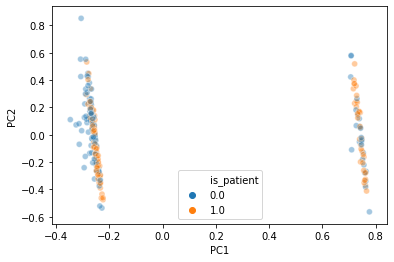

In [95]:
#PCA On Under Sampled Dataset
pca_under = PCA(n_components=2)
X_pca_under = pca_under.fit_transform(X_train_under)
print(pca_under.explained_variance_ratio_.cumsum())
y_temp_under = y_train_under
y_temp_under["PC1"] = X_pca_under[:,0]
y_temp_under["PC2"] = X_pca_under[:,1]
sns.scatterplot(data=y_temp_under, x="PC1", y="PC2", hue="is_patient", alpha=0.4)
print(y_temp_under["is_patient"].value_counts())

In [96]:
print(y_train_under.head())
y_train_under = y_train_under.drop(["PC1", "PC2"], axis=1)
print(y_train_under.head())

     is_patient       PC1       PC2
357         1.0 -0.269010  0.233227
223         0.0  0.710104 -0.109811
328         1.0 -0.243876 -0.234564
258         1.0 -0.258602  0.083724
69          1.0  0.721409  0.518398
     is_patient
357         1.0
223         0.0
328         1.0
258         1.0
69          1.0


[0.5588312 0.7331914]
0.0    291
1.0    291
Name: is_patient, dtype: int64


/home/srix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/srix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


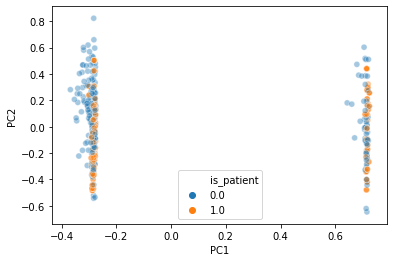

In [97]:
#PCA for Over Sampled Dataset
pca_over = PCA(n_components=2)
X_pca_over = pca_over.fit_transform(X_train_over)
print(pca_over.explained_variance_ratio_.cumsum())
y_temp_over = y_train_over
y_temp_over["PC1"] = X_pca_over[:,0]
y_temp_over["PC2"] = X_pca_over[:,1]
sns.scatterplot(data=y_temp_over, x="PC1", y="PC2", hue="is_patient", alpha=0.4)
print(y_temp_over["is_patient"].value_counts())

In [98]:
print(y_train_over.head())
y_train_over = y_train_over.drop(["PC1", "PC2"], axis=1)
print(y_train_over.head())

     is_patient       PC1       PC2
355         1.0 -0.285029 -0.220116
266         0.0 -0.288030  0.087318
86          1.0 -0.282254 -0.318068
5           1.0  0.717958 -0.169057
68          0.0 -0.283063 -0.025754
     is_patient
355         1.0
266         0.0
86          1.0
5           1.0
68          0.0


In [67]:
print("\n----------------------------------------------------------------------\n")

#1 Naive Bayes On under sample dataset
print("Naive Bayes on Undersample dataset:")
clfFitPredict(GaussianNB(), X_train_under, X_test, y_train_under, y_test)

#Cross Validation on Naive Bayes on under sampled datset
print("\nCross Validation of Naive Bayes on Undersample dataset:")
crossValidation(GaussianNB(), X_under, y_under, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Naive Bayes on Undersample dataset:

Confusion Matrix: 
[[48 77]
 [ 3 47]]

Accuracy : 0.5428571428571428
Sensitivity : 0.384
Precision: 0.9411764705882353
Specificity : 0.94
F-Score : 0.5454545454545454

               precision    recall  f1-score   support

         0.0       0.94      0.38      0.55       125
         1.0       0.38      0.94      0.54        50

    accuracy                           0.54       175
   macro avg       0.66      0.66      0.54       175
weighted avg       0.78      0.54      0.54       175
 


Cross Validation of Naive Bayes on Undersample dataset:
[0.61165049 0.65686275 0.60784314 0.61764706] 

0.623500856653341

----------------------------------------------------------------------



In [68]:
print("\n----------------------------------------------------------------------\n")

#2 SVM Classifier On under sampled dataset
print("SVM Classifier on Undersample dataset:")
clfFitPredict(LinearSVC(), X_train_under, X_test, y_train_under, y_test)

#Cross Validation on SVM Classifier on under sampled datset
print("\nCross Validation of SVM on Undersample dataset:")
crossValidation(LinearSVC(), X_under, y_under, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

SVM Classifier on Undersample dataset:

Confusion Matrix: 
[[68 57]
 [ 7 43]]

Accuracy : 0.6342857142857142
Sensitivity : 0.544
Precision: 0.9066666666666666
Specificity : 0.86
F-Score : 0.68

               precision    recall  f1-score   support

         0.0       0.91      0.54      0.68       125
         1.0       0.43      0.86      0.57        50

    accuracy                           0.63       175
   macro avg       0.67      0.70      0.63       175
weighted avg       0.77      0.63      0.65       175
 


Cross Validation of SVM on Undersample dataset:
[0.59223301 0.7254902  0.65686275 0.68627451] 

0.6652151151722825

----------------------------------------------------------------------



In [69]:
print("\n----------------------------------------------------------------------\n")

#3 Logistic Regression Classifier On under sampled dataset
print("Logistic Regression on Undersample dataset:")
clfFitPredict(LogisticRegression(random_state=1), X_train_under, X_test, y_train_under, y_test)

#Cross Validation on Logistic Regression on under sampled datset
print("\nCross Validation of Logistic Regression on Undersample dataset:")
crossValidation(LogisticRegression(random_state=1), X_under, y_under, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Logistic Regression on Undersample dataset:

Confusion Matrix: 
[[80 45]
 [12 38]]

Accuracy : 0.6742857142857143
Sensitivity : 0.64
Precision: 0.8695652173913043
Specificity : 0.76
F-Score : 0.7373271889400922

               precision    recall  f1-score   support

         0.0       0.87      0.64      0.74       125
         1.0       0.46      0.76      0.57        50

    accuracy                           0.67       175
   macro avg       0.66      0.70      0.65       175
weighted avg       0.75      0.67      0.69       175
 


Cross Validation of Logistic Regression on Undersample dataset:
[0.54368932 0.70588235 0.64705882 0.64705882] 

0.6359223300970873

----------------------------------------------------------------------



In [70]:
print("\n----------------------------------------------------------------------\n")

#4 KNN Classifier On under sampled dataset
print("KNN on Undersample dataset:")
clfFitPredict(KNeighborsClassifier(n_neighbors = 2), X_train_under, X_test, y_train_under, y_test)

#Cross Validation on KNN on under sampled datset
print("\nCross Validation of KNN on Undersample dataset:")
crossValidation(KNeighborsClassifier(n_neighbors = 2), X_under, y_under, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

KNN on Undersample dataset:

Confusion Matrix: 
[[98 27]
 [34 16]]

Accuracy : 0.6514285714285715
Sensitivity : 0.784
Precision: 0.7424242424242424
Specificity : 0.32
F-Score : 0.7626459143968871

               precision    recall  f1-score   support

         0.0       0.74      0.78      0.76       125
         1.0       0.37      0.32      0.34        50

    accuracy                           0.65       175
   macro avg       0.56      0.55      0.55       175
weighted avg       0.64      0.65      0.64       175
 


Cross Validation of KNN on Undersample dataset:
[0.53398058 0.64705882 0.62745098 0.6372549 ] 

0.6114363221016562

----------------------------------------------------------------------



In [71]:
print("\n----------------------------------------------------------------------\n")

#5 RandomForest Classifier On under sampled dataset
print("RandomForest on Undersample dataset:")
clfFitPredict(RandomForestClassifier(max_depth=4, random_state=0), X_train_under, X_test, y_train_under, y_test)

#Cross Validation on RF on under sampled datset
print("\nCross Validation of Random Forest on Undersample dataset:")
crossValidation(RandomForestClassifier(max_depth=4, random_state=0), X_under, y_under, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

RandomForest on Undersample dataset:

Confusion Matrix: 
[[68 57]
 [ 9 41]]

Accuracy : 0.6228571428571429
Sensitivity : 0.544
Precision: 0.8831168831168831
Specificity : 0.82
F-Score : 0.6732673267326733

               precision    recall  f1-score   support

         0.0       0.88      0.54      0.67       125
         1.0       0.42      0.82      0.55        50

    accuracy                           0.62       175
   macro avg       0.65      0.68      0.61       175
weighted avg       0.75      0.62      0.64       175
 


Cross Validation of Random Forest on Undersample dataset:
[0.65048544 0.7254902  0.76470588 0.60784314] 

0.6871311631448697

----------------------------------------------------------------------



In [72]:
print("\n----------------------------------------------------------------------\n")

#6 Voting Classifier for UnderSampled Dataset
print("Voting Classifier on under sampled dataset:")
clfs = [('rf', RandomForestClassifier(max_depth=4,random_state=1)), ('lr',LogisticRegression()), ('svm',LinearSVC())]
vclf1 = VotingClassifier(estimators=clfs, voting='hard')
clfFitPredict(vclf1, X_train_under, X_test, y_train_under, y_test)

#Cross Validation on Voting Classifier on UnderSampled datset
print("\nCross Validation of Voting Classifier on under sampled dataset:")
crossValidation(vclf1, X_under, y_under, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Voting Classifier on under sampled dataset:

Confusion Matrix: 
[[71 54]
 [ 8 42]]

Accuracy : 0.6457142857142857
Sensitivity : 0.568
Precision: 0.8987341772151899
Specificity : 0.84
F-Score : 0.6960784313725489

               precision    recall  f1-score   support

         0.0       0.90      0.57      0.70       125
         1.0       0.44      0.84      0.58        50

    accuracy                           0.65       175
   macro avg       0.67      0.70      0.64       175
weighted avg       0.77      0.65      0.66       175
 


Cross Validation of Voting Classifier on under sampled dataset:
[0.57281553 0.70588235 0.65686275 0.65686275] 

0.6481058442794593

----------------------------------------------------------------------



In [73]:
print("\n----------------------------------------------------------------------\n")

#7 AdaBoostClassifier With Decision Tree Classifier as base estimator on undersampled Dataset

dt_under = DecisionTreeClassifier(max_depth=1, random_state=1)
adb_clf_under = AdaBoostClassifier(base_estimator=dt_under, n_estimators=100, learning_rate=0.025)
print("\nAdaBoostClassifier with Decision Tree as base estimator on undersampled Dataset:")
clfFitPredict(adb_clf_under, X_train_under, X_test, y_train_under, y_test)

#Cross Validation on AdaBoost Classifier on undersampled Dataset
print("\nCross Validation of AdaBoost Classifier on undersampled dataset:")
crossValidation(adb_clf_under, X_under, y_under, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


AdaBoostClassifier with Decision Tree as base estimator on undersampled Dataset:

Confusion Matrix: 
[[69 56]
 [ 9 41]]

Accuracy : 0.6285714285714286
Sensitivity : 0.552
Precision: 0.8846153846153846
Specificity : 0.82
F-Score : 0.6798029556650247

               precision    recall  f1-score   support

         0.0       0.88      0.55      0.68       125
         1.0       0.42      0.82      0.56        50

    accuracy                           0.63       175
   macro avg       0.65      0.69      0.62       175
weighted avg       0.75      0.63      0.64       175
 


Cross Validation of AdaBoost Classifier on undersampled dataset:
[0.65048544 0.68627451 0.70588235 0.62745098] 

0.6675233200076147

----------------------------------------------------------------------



In [74]:
print("\n----------------------------------------------------------------------\n")

#8 AdaBoostClassifier With SVC as base estimator 

svc_adb_under = SVC(probability=True, kernel='linear')
adb_clf_svc_under = AdaBoostClassifier(base_estimator=svc_adb_under, n_estimators=100, learning_rate=0.025)
print("\nAdaBoostClassifier with SVC as base estimator on undersampled Dataset:")
clfFitPredict(adb_clf_svc_under, X_train_under, X_test, y_train_under, y_test)

#Cross Validation on AdaBoostClassifier on Orginial datset
print("\nCross Validation of AdaBoostClassifier with SVM as base estimator on undersampled dataset:")
crossValidation(adb_clf_svc_under, X_under, y_under, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


AdaBoostClassifier with SVC as base estimator on undersampled Dataset:

Confusion Matrix: 
[[64 61]
 [ 5 45]]

Accuracy : 0.6228571428571429
Sensitivity : 0.512
Precision: 0.927536231884058
Specificity : 0.9
F-Score : 0.6597938144329897

               precision    recall  f1-score   support

         0.0       0.93      0.51      0.66       125
         1.0       0.42      0.90      0.58        50

    accuracy                           0.62       175
   macro avg       0.68      0.71      0.62       175
weighted avg       0.78      0.62      0.64       175
 


Cross Validation of AdaBoostClassifier with SVM as base estimator on undersampled dataset:
[0.57281553 0.60784314 0.61764706 0.62745098] 

0.6064391776127926

----------------------------------------------------------------------



In [75]:
print("\n----------------------------------------------------------------------\n")

#9 GradientBoostingClassifier On undersampled Dataset

gbc_under = GradientBoostingClassifier(max_depth=1, subsample=0.8, max_features=0.2, n_estimators=300, random_state=0)
print("\nGradientBoostingClassifier on the undersampled dataset:")
clfFitPredict(gbc_under, X_train_under, X_test, y_train_under, y_test)

#Cross Validation on GradientBoostingClassifier on undersampled datset
print("\nCross Validation of GradientBoostingClassifier on undersampled dataset:")
crossValidation(gbc_under, X_under, y_under, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


GradientBoostingClassifier on the undersampled dataset:

Confusion Matrix: 
[[71 54]
 [14 36]]

Accuracy : 0.6114285714285714
Sensitivity : 0.568
Precision: 0.8352941176470589
Specificity : 0.72
F-Score : 0.6761904761904761

               precision    recall  f1-score   support

         0.0       0.84      0.57      0.68       125
         1.0       0.40      0.72      0.51        50

    accuracy                           0.61       175
   macro avg       0.62      0.64      0.60       175
weighted avg       0.71      0.61      0.63       175
 


Cross Validation of GradientBoostingClassifier on undersampled dataset:
[0.6407767  0.69607843 0.73529412 0.6372549 ] 

0.6773510375023796

----------------------------------------------------------------------



In [76]:
print("\n----------------------------------------------------------------------\n")

#10 XGBClassifier on the undersampled Dataset

xgb_clf_under = XGBClassifier(objective='binary:logistic', booster='gblinear', n_estimators=10, seed=1)
print("\nXGBClassifier on the undersampled dataset:")
clfFitPredict(xgb_clf_under, X_train_under, X_test, y_train_under, y_test)

#Cross Validation on XGBClassifier on undersampled dataset
print("\nCross Validation of XGBClassifier on undersampled dataset:")
crossValidation(xgb_clf_under, X_under, y_under, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


XGBClassifier on the undersampled dataset:

Confusion Matrix: 
[[80 45]
 [17 33]]

Accuracy : 0.6457142857142857
Sensitivity : 0.64
Precision: 0.8247422680412371
Specificity : 0.66
F-Score : 0.7207207207207208

               precision    recall  f1-score   support

         0.0       0.82      0.64      0.72       125
         1.0       0.42      0.66      0.52        50

    accuracy                           0.65       175
   macro avg       0.62      0.65      0.62       175
weighted avg       0.71      0.65      0.66       175
 


Cross Validation of XGBClassifier on undersampled dataset:
[0.59223301 0.58823529 0.58823529 0.59803922] 

0.5916857034075766

----------------------------------------------------------------------



In [100]:
#Classification With UnderSampled PCA Training dataset

pca_under_1 = PCA()
X_pca_under_1 = pca_under_1.fit_transform(X_train_under)
print(pca_under_1.explained_variance_ratio_.cumsum())

pca_under1 = PCA(n_components=6)
X_pca_train_under1 = pd.DataFrame(pca_under1.fit_transform(X_train_under))
X_pca_test_under1 = pd.DataFrame(pca_under1.transform(X_test))

X_pca_under1 = pd.concat([X_pca_train_under1, X_pca_test_under1], axis=0)

[0.54775031 0.72116793 0.82227    0.90717459 0.95267518 0.98177
 0.99355516 0.99794462 0.99913443 1.        ]


In [99]:
print("\n----------------------------------------------------------------------\n")

#1 Naive Bayes On UnderSampled PCA Training dataset
print("Naive Bayes on UnderSampled PCA Training dataset:")
clfFitPredict(GaussianNB(), X_pca_train_under1, X_pca_test_under1, y_train_under, y_test)

#Cross Validation on Naive Bayes on UnderSampled PCA Training dataset:
print("\nCross Validation of Naive Bayes on UnderSampled PCA Training dataset:")
crossValidation(GaussianNB(), X_pca_under1, y_under, 4)

print("\n----------------------------------------------------------------------\n")

#2.1 SVM Classifier On UnderSampled PCA Training dataset:
print("SVM Classifier on UnderSampled PCA Training dataset:")
clfFitPredict(LinearSVC(), X_pca_train_under1, X_pca_test_under1, y_train_under, y_test)

#Cross Validation on SVM Classifier on UnderSampled PCA Training dataset:
print("\nCross Validation of SVM Classifier on UnderSampled PCA Training dataset:")
crossValidation(LinearSVC(), X_pca_under1, y_under, 4)

print("\n----------------------------------------------------------------------\n")

#3.1 Logistic Regression Classifier On UnderSampled PCA Training dataset:
print("Logistic Regression Classifier on UnderSampled PCA Training dataset:")
clfFitPredict(LogisticRegression(), X_pca_train_under1, X_pca_test_under1, y_train_under, y_test)

#Cross Validation on Logistic Regression Classifier on UnderSampled PCA Training dataset:
print("\nCross Validation of Logistic Regression Classifier on UnderSampled PCA Training dataset::")
crossValidation(LogisticRegression(), X_pca_under1, y_under, 4)

print("\n----------------------------------------------------------------------\n")

#4.1 KNN Classifier On UnderSampled PCA Training dataset
print("KNN Classifier on UnderSampled PCA Training dataset:")
clfFitPredict(KNeighborsClassifier(n_neighbors = 2), X_pca_train_under1, X_pca_test_under1, y_train_under, y_test)

#Cross Validation on KNN Classifier on UnderSampled PCA Training dataset:
print("\nCross Validation of KNN Classifier on UnderSampled PCA Training dataset:")
crossValidation(KNeighborsClassifier(n_neighbors = 2), X_pca_under1, y_under, 4)

print("\n----------------------------------------------------------------------\n")

#5.1 Random Forest Classifier On UnderSampled PCA Training dataset:
print("Random Forest Classifier on UnderSampled PCA Training dataset:")
clfFitPredict(RandomForestClassifier(max_depth=4, random_state=0), X_pca_train_under1, X_pca_test_under1, y_train_under, y_test)

#Cross Validation on Random Forest Classifier on UnderSampled PCA Training dataset:
print("\nCross Validation of Random Forest Classifier on UnderSampled PCA Training dataset:")
crossValidation(RandomForestClassifier(max_depth=4, random_state=0), X_pca_under1, y_under, 4)

print("\n----------------------------------------------------------------------\n")

#6 Voting Classifier for UnderSampled PCA Training dataset:
print("Voting Classifier on UnderSampled PCA Training dataset:")
clfFitPredict(vclf, X_pca_train_under1, X_pca_test_under1, y_train_under, y_test)

#Cross Validation on Voting Classifier on UnderSampled PCA Training dataset:
print("\nCross Validation of Voting Classifier on UnderSampled PCA Training dataset:")
crossValidation(vclf, X_pca_under1, y_under, 4)

print("\n----------------------------------------------------------------------\n")

#7 AdaBoostClassifier With Decision Tree Classifier as base estimator on undersampled PCA Training Dataset

print("\nAdaBoostClassifier with Decision Tree as base estimator on undersampled PCA Training Dataset:")
clfFitPredict(adb_clf_under, X_pca_train_under1, X_pca_test_under1, y_train_under, y_test)

#Cross Validation on AdaBoost Classifier with Decision Tree on undersampled PCA Training Dataset
print("\nCross Validation of AdaBoost Classifier on undersampled PCA Training dataset:")
crossValidation(adb_clf_under, X_pca_under1, y_under, 4)

print("\n----------------------------------------------------------------------\n")

#8 AdaBoostClassifier With SVC as base estimator on undersampled PCA Training Dataset 

print("\nAdaBoostClassifier with SVC as base estimator on undersampled PCA Training Dataset:")
clfFitPredict(adb_clf_svc_under, X_pca_train_under1, X_pca_test_under1, y_train_under, y_test)

#Cross Validation on AdaBoostClassifier on undersampled PCA Training datset
print("\nCross Validation of AdaBoostClassifier with SVC as base estimator on undersampled PCA Training dataset:")
crossValidation(adb_clf_svc_under, X_pca_under1, y_under, 4)

print("\n----------------------------------------------------------------------\n")

#9 GradientBoostingClassifier On undersampled PCA Training Dataset

print("\nGradientBoostingClassifier on the undersampled PCA Training dataset:")
clfFitPredict(gbc_under, X_pca_train_under1, X_pca_test_under1, y_train_under, y_test)

#Cross Validation on GradientBoostingClassifier on undersampled datset
print("\nCross Validation of GradientBoostingClassifier on undersampled dataset:")
crossValidation(gbc_under, X_pca_under1, y_under, 4)

print("\n----------------------------------------------------------------------\n")

#10 XGBClassifier on the undersampled PCA Training Dataset
print("\nXGBClassifier on the undersampled PCA Training dataset:")
clfFitPredict(xgb_clf_under, X_pca_train_under1, X_pca_test_under1, y_train_under, y_test)

#Cross Validation on XGBClassifier on undersampled PCA Training dataset
print("\nCross Validation of XGBClassifier on undersampled PCA Training dataset:")
crossValidation(xgb_clf_under, X_pca_under1, y_under, 4)

print("\n----------------------------------------------------------------------\n")

[0.54775031 0.72116793 0.82227    0.90717459 0.95267518 0.98177
 0.99355516 0.99794462 0.99913443 1.        ]

----------------------------------------------------------------------

Naive Bayes on UnderSampled PCA Training dataset:

Confusion Matrix: 
[[55 70]
 [15 35]]

Accuracy : 0.5142857142857142
Sensitivity : 0.44
Precision: 0.7857142857142857
Specificity : 0.7
F-Score : 0.5641025641025641

               precision    recall  f1-score   support

         0.0       0.79      0.44      0.56       125
         1.0       0.33      0.70      0.45        50

    accuracy                           0.51       175
   macro avg       0.56      0.57      0.51       175
weighted avg       0.66      0.51      0.53       175
 


Cross Validation of Naive Bayes on UnderSampled PCA Training dataset:
[0.61165049 0.6372549  0.62745098 0.57843137] 

0.6136969350847135

----------------------------------------------------------------------

SVM Classifier on UnderSampled PCA Training dataset:

Confu

NameError: name 'vclf' is not defined

In [ ]:
#Hyperparameter Tuning for SVC
#https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

random_svc = RandomizedSearchCV(estimator = SVC(random_state=0), 
                            param_distributions = param_grid_svc, 
                            refit=True,
                            verbose=True,
                            scoring='accuracy',
                            cv=10, 
                            n_jobs=-1, 
                            random_state = 0
                           )

random_svc.fit(X_train, y_train.values.ravel())
joblib.dump(random_svc, "RSCV_SVC.pkl")


random_svc_pca = RandomizedSearchCV(estimator = SVC(random_state=0), 
                            param_distributions = param_grid_svc, 
                            refit=True,
                            verbose=True,
                            scoring='accuracy',
                            cv=10, 
                            n_jobs=-1, 
                            random_state = 0
                           )

random_svc_pca.fit(X_pca_train1, y_train.values.ravel())
joblib.dump(random_svc_pca, "RSCV_SVC_pca.pkl")

#Hyperparameter Tuning for Logistic Regression 

#https://towardsdatascience.com/logistic-regression-model-tuning-with-scikit-learn-part-1-425142e01af5
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

random_logreg = RandomizedSearchCV(estimator=LogisticRegression(), 
                            param_distributions = param_grid_logreg, 
                            cv=10,
                            scoring='accuracy', 
                            refit=True,
                            verbose=1,
                            n_jobs=-1,
                            n_iter=100,
                            random_state=0
                           )

random_logreg.fit(X_train, y_train.values.ravel())
joblib.dump(random_logreg, "RSCV_LR.pkl")
# print("\nBest Parameters :",random_logreg.best_params_) 
# print("\nBest Score :",random.best_score_)
# print("\nAccuracy Score :",accuracy_score(y_test, random_logreg.predict(X_test)))

random_logreg_pca = RandomizedSearchCV(estimator = LogisticRegression(), 
                            param_distributions = param_grid_logreg, 
                            refit=True,
                            verbose=True,
                            scoring='accuracy',
                            cv=10, 
                            n_jobs=-1, 
                            random_state = 0
                           )

random_logreg_pca.fit(X_pca_train1, y_train.values.ravel())
joblib.dump(random_logreg_pca, "RSCV_LR_pca.pkl")

#Hyperparameter Tuning for RandomForest 
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
#https://towardsdatascience.com/optimizing-hyperparameters-in-random-forest-classification-ec7741f9d3f6

random_rf = RandomizedSearchCV(estimator=RandomForestClassifier(random_state = 1),
                               param_distributions=param_grid_rf, 
                               verbose=False, 
                               cv=10,
                               scoring='accuracy', 
                               refit=True,
                               n_jobs=-1,
                               random_state=0
                              )
random_rf.fit(X_train, y_train.values.ravel())
joblib.dump(random_rf, "RSCV_RF.pkl")
# print("\nBest Parameter :",random_rf.best_params_)
# print("\nBest Score :", random_rf.best_score_)
# print("\nAccuracy Score :",accuracy_score(y_test, random_rf.predict(X_test)))

random_rf_pca = RandomizedSearchCV(estimator = RandomForestClassifier(random_state = 1), 
                            param_distributions = param_grid_rf, 
                            refit=True,
                            verbose=True,
                            scoring='accuracy',
                            cv=10, 
                            n_jobs=-1, 
                            random_state = 0
                           )

random_rf_pca.fit(X_pca_train1, y_train.values.ravel())
joblib.dump(random_rf_pca, "RSCV_RF_pca.pkl")

#Hyperparameter Tuning for GradientBoostingClassifier
#https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/
#https://medium.com/all-things-ai/in-depth-parameter-tuning-for-gradient-boosting-3363992e9bae
#https://www.datacareer.de/blog/parameter-tuning-in-gradient-boosting-gbm/

clf_gbc = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                             param_distributions=param_grid,
                             cv=10,
                             scoring='accuracy',
                             refit=True, 
                             n_jobs=-1,
                             verbose=False,
                             random_state=0
                            )
clf_gbc.fit(X_train, y_train.values.ravel())
joblib.dump(clf_gbc,'RSCV_GBC.pkl')
# print("\nBest Score :",clf_gbc.best_score_)
# print("\nBest Parameters :",clf_gbc.best_params_)
# print("\nAccuracy Score :",accuracy_score(y_test, clf_gbc.predict(X_test)))

#Hyperparameter for AdaBoost Classifier 
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
#https://www.kaggle.com/jmohitj/adaboostclassifier-and-gradientboostingclassifier
#https://www.programcreek.com/python/example/91146/sklearn.model_selection.RandomizedSearchCV
                
dTC = DecisionTreeClassifier(max_depth=4,max_features='sqrt',min_samples_leaf=0.5,min_samples_split=0.1)
ada_classifier = AdaBoostClassifier(base_estimator=dTC, random_state=0)

random_adaboost = RandomizedSearchCV(estimator=ada_classifier, param_distributions=param_grid_adc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
random_adaboost.fit(X_train, y_train.values.ravel())
joblib.dump(random_adaboost, "RSCV_ADC.pkl")
# print("\nBest Score -",random_adaboost.best_score_)
# print("\nBest Parameters -",random_adaboost.best_params_)
# print("\n Accuracy Score -", accuracy_score(y_test, random_adaboost.predict(X_test)))

#Hyperparameter Tuning For AdaBoostClassifier on PCA Original Dataset
                
dTC = DecisionTreeClassifier(max_depth=4,max_features='sqrt',min_samples_leaf=0.5,min_samples_split=0.1)
ada_classifier = AdaBoostClassifier(base_estimator=dTC, random_state=0)

random_adaboost_pca = RandomizedSearchCV(estimator=ada_classifier, param_distributions=param_grid_adc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
random_adaboost_pca.fit(X_pca_train1, y_train.values.ravel())
joblib.dump(random_adaboost_pca, "RSCV_ADC_pca.pkl")
# print("\nBest Score -",random_adaboost.best_score_)
# print("\nBest Parameters -",random_adaboost.best_params_)
# print("\n Accuracy Score -", accuracy_score(y_test, random_adaboost.predict(X_test)))

#AdaBoostClassifier with SVC as base estimator 

svc = SVC(kernel='sigmoid', gamma=0.001, C=1)
ada_classifier_svc = AdaBoostClassifier(base_estimator=svc, random_state=0)

random_adaboost_svc = RandomizedSearchCV(estimator=ada_classifier_svc, param_distributions=param_grid_adc_svc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)

random_adaboost_svc.fit(X_train, y_train.values.ravel())
joblib.dump(random_adaboost_svc, "RSCV_ADC_SVC.pkl")
# print("\nBest Score :",random_adaboost_svc.best_params_)
# print("\nBest Parameter :",random_adaboost_svc.best_score_)
# print("\nAccuracy Score :",accuracy_score(y_test, random_adaboost_svc.predict(X_test)))

svc  = SVC(kernel='sigmoid', gamma=0.001, C=1)
ada_classifier_svc = AdaBoostClassifier(base_estimator=svc, random_state=0)
random_adaboost_svc_pca = RandomizedSearchCV(estimator=ada_classifier_svc, param_distributions=param_grid_adc_svc,
                                            random_state=0, cv=10, scoring='accuracy',
                                            refit=True, n_jobs=-1, verbose=False)

random_adaboost_svc_pca.fit(X_pca_train1, y_train.values.ravel())
joblib.dump(random_adaboost_svc_pca, "RSCV_ADC_SVC_pca.pkl")



In [119]:
#Hyperparameter Tuning for SVC On UnderSampled Dataset
random_svc_under = RandomizedSearchCV(estimator = SVC(random_state=0), 
                            param_distributions = param_grid_svc, 
                            refit=True,
                            verbose=True,
                            scoring='accuracy',
                            cv=10, 
                            n_jobs=-1, 
                            random_state = 0
                           )

random_svc_under.fit(X_train_under, y_train_under.values.ravel())
joblib.dump(random_svc_under, "RSCV_SVC_under.pkl")

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.9s finished


['RSCV_SVC_under.pkl']

In [101]:
print("\nRandomizedSearchCV on SVC for UnderSampled Dataset - ")
RSCV_SVC_under = joblib.load("RSCV_SVC_under.pkl")
print("\nBest Score :", RSCV_SVC_under.best_score_)
print("\nBest Parameters :", RSCV_SVC_under.best_params_)
print("\nAccuracy Score :", accuracy_score(y_test, RSCV_SVC_under.predict(X_test)))


RandomizedSearchCV on SVC for UnderSampled Dataset - 

Best Score : 0.6885869565217391

Best Parameters : {'kernel': 'sigmoid', 'gamma': 0.05, 'C': 1000}

Accuracy Score : 0.6057142857142858


In [122]:
#Hyperparameter Tuning for SVC On UnderSampled PCA Dataset
random_svc_pca_under = RandomizedSearchCV(estimator = SVC(random_state=0), 
                            param_distributions = param_grid_svc, 
                            refit=True,
                            verbose=True,
                            scoring='accuracy',
                            cv=10, 
                            n_jobs=-1, 
                            random_state = 0
                           )

random_svc_pca_under.fit(X_pca_train_under1, y_train_under.values.ravel())
joblib.dump(random_svc_pca_under, "RSCV_SVC_pca_under.pkl")

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished


['RSCV_SVC_pca_under.pkl']

In [102]:
print("\nRandomizedSearchCV on SVC for UnderSampled PCA Dataset - ")
RSCV_SVC_pca_under = joblib.load("RSCV_SVC_pca_under.pkl")
print("\nBest Score :", RSCV_SVC_pca_under.best_score_)
print("\nBest Parameters :", RSCV_SVC_pca_under.best_params_)
print("\nAccuracy Score :", accuracy_score(y_test, RSCV_SVC_pca_under.predict(X_pca_test_under1)))


RandomizedSearchCV on SVC for UnderSampled PCA Dataset - 

Best Score : 0.6797101449275362

Best Parameters : {'kernel': 'sigmoid', 'gamma': 0.05, 'C': 1000}

Accuracy Score : 0.5885714285714285


In [124]:
#Hyperparameter Tuning on LR on UnderSampled Dataset
random_logreg_under = RandomizedSearchCV(estimator=LogisticRegression(), 
                            param_distributions = param_grid_logreg, 
                            cv=10,
                            scoring='accuracy', 
                            refit=True,
                            verbose=1,
                            n_jobs=-1,
                            n_iter=100,
                            random_state=0
                           )

random_logreg_under.fit(X_train_under, y_train_under.values.ravel())
joblib.dump(random_logreg_under, "RSCV_LR_under.pkl")

Fitting 10 folds for each of 96 candidates, totalling 960 fits


/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 96 is smaller than n_iter=100. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:    7.5s finished
/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


['RSCV_LR_under.pkl']

In [103]:
print("\nRandomizedSearchCV on Logistic Regression on UnderSampled Dataset -")
RSCV_LR_under_loaded = joblib.load("RSCV_LR_under.pkl")
print("\nBest Parameters :", RSCV_LR_under_loaded.best_params_) 
print("\nBest Score :", RSCV_LR_under_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_LR_under_loaded.predict(X_test)))


RandomizedSearchCV on Logistic Regression on UnderSampled Dataset -

Best Parameters : {'solver': 'saga', 'penalty': 'l1', 'C': 50}

Best Score : 0.7268115942028986

Accuracy Score : 0.6


In [127]:
random_logreg_pca_under = RandomizedSearchCV(estimator = LogisticRegression(), 
                            param_distributions = param_grid_logreg, 
                            refit=True,
                            verbose=True,
                            scoring='accuracy',
                            cv=10, 
                            n_jobs=-1, 
                            random_state = 0
                           )

random_logreg_pca_under.fit(X_pca_train_under1, y_train_under.values.ravel())
joblib.dump(random_logreg_pca_under, "RSCV_LR_pca_under.pkl")

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.9s finished


['RSCV_LR_pca_under.pkl']

In [104]:
print("\nRandomizedSearchCV for LR on UnderSampled PCA Dataset -")
RSCV_LR_pca_under_loaded = joblib.load("RSCV_LR_pca_under.pkl")
print("\nBest Parameters :", RSCV_LR_pca_under_loaded.best_params_) 
print("\nBest Score :", RSCV_LR_pca_under_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_LR_pca_under_loaded.predict(X_pca_test_under1)))


RandomizedSearchCV for LR on UnderSampled PCA Dataset -

Best Parameters : {'solver': 'saga', 'penalty': 'l1', 'C': 10}

Best Score : 0.6753623188405797

Accuracy Score : 0.6285714285714286


In [134]:
random_rf_under = RandomizedSearchCV(estimator=RandomForestClassifier(random_state = 1),
                               param_distributions=param_grid_rf, 
                               verbose=False, 
                               cv=10,
                               scoring='accuracy', 
                               refit=True,
                               n_jobs=-1,
                               random_state=0
                              )
random_rf_under.fit(X_train_under, y_train_under.values.ravel())
joblib.dump(random_rf_under, "RSCV_RF.pkl")

['RSCV_RF.pkl']

In [105]:
print("\nRandomizedSearchCV for RF for UnderSampled Dataset -")
RSCV_RF_loaded = joblib.load("RSCV_RF.pkl")
print("\nBest Parameter :", RSCV_RF_loaded.best_params_)
print("\nBest Score :", RSCV_RF_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_RF_loaded.predict(X_test)))



RandomizedSearchCV for RF for UnderSampled Dataset -

Best Parameter : {'n_estimators': 100, 'min_samples_split': 0.2, 'min_samples_leaf': 0.2, 'max_features': 'sqrt', 'max_depth': 11.0, 'bootstrap': False}

Best Score : 0.7126811594202899

Accuracy Score : 0.6285714285714286


In [132]:
random_rf_pca_under = RandomizedSearchCV(estimator = RandomForestClassifier(random_state = 1), 
                            param_distributions = param_grid_rf, 
                            refit=True,
                            verbose=True,
                            scoring='accuracy',
                            cv=10, 
                            n_jobs=-1, 
                            random_state = 0
                           )

random_rf_pca_under.fit(X_pca_train_under1, y_train_under.values.ravel())
joblib.dump(random_rf_pca_under, "RSCV_RF_pca_under.pkl")


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   26.8s finished


['RSCV_RF_pca_under.pkl']

In [106]:
print("\nRandomizedSearchCV for RF for UnderSampled PCA Dataset -")
RSCV_RF_pca_under_loaded = joblib.load("RSCV_RF_pca_under.pkl")
print("\nBest Parameter :", RSCV_RF_pca_under_loaded.best_params_)
print("\nBest Score :", RSCV_RF_pca_under_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_RF_pca_under_loaded.predict(X_pca_test_under1)))


RandomizedSearchCV for RF for UnderSampled PCA Dataset -

Best Parameter : {'n_estimators': 100, 'min_samples_split': 0.5, 'min_samples_leaf': 0.30000000000000004, 'max_features': 'auto', 'max_depth': 22.0, 'bootstrap': True}

Best Score : 0.6286231884057971

Accuracy Score : 0.6114285714285714


In [84]:
#RandomizedSearchCV for GradientBoostingClassifier on UnderSampled Dataset
clf_gbc_under = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                             param_distributions=param_grid_gbc,
                             cv=10,
                             scoring='accuracy',
                             refit=True, 
                             n_jobs=-1,
                             verbose=False,
                             random_state=0
                            )
clf_gbc_under.fit(X_train_under, y_train_under.values.ravel())
joblib.dump(clf_gbc_under,'RSCV_GBC_under.pkl')

['RSCV_GBC_under.pkl']

In [107]:
print("\nRandomizedSearchCV for GradientBoostingClassifier on UnderSampled Dataset :")
RSCV_GBC_under_loaded = joblib.load("RSCV_GBC_under.pkl")
print("\nBest Score :", RSCV_GBC_under_loaded.best_score_)
print("\nBest Parameters :", RSCV_GBC_under_loaded.best_params_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_GBC_under_loaded.predict(X_test)))



RandomizedSearchCV for GradientBoostingClassifier on UnderSampled Dataset :

Best Score : 0.7175724637681159

Best Parameters : {'n_estimators': 1500, 'min_samples_split': 1.0, 'min_samples_leaf': 0.1, 'max_depth': 22.0, 'learning_rate': 0.005}

Accuracy Score : 0.6285714285714286


In [86]:
#RandomizedSearchCV for GradientBoostingClassifier on UnderSampled PCA Dataset
clf_gbc_pca_under = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                             param_distributions=param_grid_gbc,
                             cv=10,
                             scoring='accuracy',
                             refit=True, 
                             n_jobs=-1,
                             verbose=False,
                             random_state=0
                            )
clf_gbc_pca_under.fit(X_pca_train_under1, y_train_under.values.ravel())
joblib.dump(clf_gbc_pca_under,'RSCV_GBC_pca_under.pkl')

['RSCV_GBC_pca_under.pkl']

In [108]:
print("\nRandomizedSearchCV for GBC on UnderSampled PCA Dataset :")
RSCV_GBC_pca_under_loaded = joblib.load("RSCV_GBC_pca_under.pkl")
print("\nBest Score -", RSCV_GBC_pca_under_loaded.best_score_)
print("\nBest Parameter -", RSCV_GBC_pca_under_loaded.best_params_)
print("\nAccuracy Score -", accuracy_score(y_test, RSCV_GBC_pca_under_loaded.predict(X_pca_test_under1)))


RandomizedSearchCV for GBC on UnderSampled PCA Dataset :

Best Score - 0.6666666666666665

Best Parameter - {'n_estimators': 300, 'min_samples_split': 0.6, 'min_samples_leaf': 0.4, 'max_depth': 24.0, 'learning_rate': 0.05}

Accuracy Score - 0.6


In [93]:
#Hyperparameter for AdaBoost Classifier on UnderSampled Dataset
                
dTC = DecisionTreeClassifier(max_depth=4,max_features='sqrt',min_samples_leaf=0.5,min_samples_split=0.1)
ada_classifier = AdaBoostClassifier(base_estimator=dTC, random_state=0)

random_adaboost_under = RandomizedSearchCV(estimator=ada_classifier, param_distributions=param_grid_adc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
random_adaboost_under.fit(X_train_under, y_train_under.values.ravel())
joblib.dump(random_adaboost_under, "RSCV_ADC_under.pkl")

['RSCV_ADC_under.pkl']

In [109]:
print("\nRandomizedSearchCV for AdaBoostClassifier with Decision Tree as base classifier on Undersampled Dataset :")
RSCV_ADC_under_loaded = joblib.load("RSCV_ADC_under.pkl")
print("\nBest Score -", RSCV_ADC_under_loaded.best_score_)
print("\nBest Parameters -", RSCV_ADC_under_loaded.best_params_)
print("\n Accuracy Score -", accuracy_score(y_test, RSCV_ADC_under_loaded.predict(X_test)))


RandomizedSearchCV for AdaBoostClassifier with Decision Tree as base classifier on Undersampled Dataset :

Best Score - 0.5702898550724639

Best Parameters - {'n_estimators': 64, 'learning_rate': 0.1, 'algorithm': 'SAMME.R'}

 Accuracy Score - 0.6171428571428571


In [95]:
#AdaBoostClassifier with SVC as base estimator 

svc = SVC(kernel='sigmoid', gamma=0.001, C=1)
ada_classifier_svc = AdaBoostClassifier(base_estimator=svc, random_state=0)

random_adaboost_svc_under = RandomizedSearchCV(estimator=ada_classifier_svc, param_distributions=param_grid_adc_svc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)

random_adaboost_svc_under.fit(X_train_under, y_train_under.values.ravel())
joblib.dump(random_adaboost_svc_under, "RSCV_ADC_SVC_under.pkl")

['RSCV_ADC_SVC_under.pkl']

In [110]:
print("\nRandomizedSearchCV for ADC with SVC on UnderSampled Dataset -")
RSCV_ADC_SVC_under_loaded = joblib.load("RSCV_ADC_SVC_under.pkl")
print("\nBest Score :", RSCV_ADC_SVC_under_loaded.best_params_)
print("\nBest Parameter :", RSCV_ADC_SVC_under_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_ADC_SVC_under_loaded.predict(X_test)))



RandomizedSearchCV for ADC with SVC on UnderSampled Dataset -

Best Score : {'n_estimators': 1000, 'learning_rate': 1, 'algorithm': 'SAMME'}

Best Parameter : 0.48695652173913045

Accuracy Score : 0.6228571428571429


In [97]:
#Hyperparameter Tuning for ADC with SVC as base estimator on UnderSampled PCA Dataset
svc  = SVC(kernel='sigmoid', gamma=0.001, C=1)
ada_classifier_svc = AdaBoostClassifier(base_estimator=svc, random_state=0)
random_adaboost_svc_pca_under = RandomizedSearchCV(estimator=ada_classifier_svc, param_distributions=param_grid_adc_svc,
                                            random_state=0, cv=10, scoring='accuracy',
                                            refit=True, n_jobs=-1, verbose=False)

#X_pca_train_under1, X_pca_test_under1, y_train_under, y_test
random_adaboost_svc_pca_under.fit(X_pca_train_under1, y_train_under.values.ravel())
joblib.dump(random_adaboost_svc_pca_under, "RSCV_ADC_SVC_pca_under.pkl")

['RSCV_ADC_SVC_pca_under.pkl']

In [111]:
print("\nRandomizedSearchCV for ADC with SVC as base estimator on UnderSampled PCA Dataset :")
RSCV_ADC_SVC_pca_under_loaded = joblib.load("RSCV_ADC_SVC_pca_under.pkl")
print("\nBest Score -", RSCV_ADC_SVC_pca_under_loaded.best_score_)
print("\nBest Parameter -", RSCV_ADC_SVC_pca_under_loaded.best_params_)
print("\nAccuracy Score -", accuracy_score(y_test, RSCV_ADC_SVC_pca_under_loaded.predict(X_pca_test_under1)))


RandomizedSearchCV for ADC with SVC as base estimator on UnderSampled PCA Dataset :

Best Score - 0.49112318840579716

Best Parameter - {'n_estimators': 1000, 'learning_rate': 1, 'algorithm': 'SAMME'}

Accuracy Score - 0.6114285714285714


In [ ]:
#Hyperparameter Tuning on XGBoostClassifier 


In [60]:
print("\n----------------------------------------------------------------------\n")

#1 Naive Bayes On Over sample dataset
print("Naive Bayes on Oversample dataset:")
clfFitPredict(GaussianNB(), X_train_over, X_test, y_train_over, y_test)

#Cross Validation on Naive Bayes on Over sampled datset
print("\nCross Validation of Naive Bayes on Oversample dataset:")
crossValidation(GaussianNB(), X_over, y_over, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Naive Bayes on Oversample dataset:

Confusion Matrix: 
[[45 80]
 [ 3 47]]

Accuracy : 0.5257142857142857
Sensitivity : 0.36
Precision: 0.9375
Specificity : 0.94
F-Score : 0.5202312138728323

               precision    recall  f1-score   support

         0.0       0.94      0.36      0.52       125
         1.0       0.37      0.94      0.53        50

    accuracy                           0.53       175
   macro avg       0.65      0.65      0.53       175
weighted avg       0.78      0.53      0.52       175
 


Cross Validation of Naive Bayes on Oversample dataset:
[0.64736842 0.66666667 0.62433862 0.62433862] 

0.6406780840991366

----------------------------------------------------------------------



In [61]:
print("\n----------------------------------------------------------------------\n")

#2 SVM Classifier On Over sample dataset
print("SVM Classifier on Oversample dataset:")
clfFitPredict(LinearSVC(), X_train_over, X_test, y_train_over, y_test)

#Cross Validation on SVM Classifier on Over sampled datset
print("\nCross Validation of SVM Classifier on Oversample dataset:")
crossValidation(LinearSVC(), X_over, y_over, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

SVM Classifier on Oversample dataset:

Confusion Matrix: 
[[71 54]
 [11 39]]

Accuracy : 0.6285714285714286
Sensitivity : 0.568
Precision: 0.8658536585365854
Specificity : 0.78
F-Score : 0.6859903381642511

               precision    recall  f1-score   support

         0.0       0.87      0.57      0.69       125
         1.0       0.42      0.78      0.55        50

    accuracy                           0.63       175
   macro avg       0.64      0.67      0.62       175
weighted avg       0.74      0.63      0.65       175
 


Cross Validation of SVM Classifier on Oversample dataset:
[0.65789474 0.68783069 0.66666667 0.6984127 ] 

0.6777011974380396

----------------------------------------------------------------------



In [62]:
print("\n----------------------------------------------------------------------\n")

#3 Logistic Regression Classifier On Over sample dataset
print("Logistic Regression Classifier on Oversample dataset:")
clfFitPredict(LogisticRegression(), X_train_over, X_test, y_train_over, y_test)

#Cross Validation on Logistic Regression Classifier on Over sampled datset
print("\nCross Validation of Logistic Regression Classifier on Oversample dataset:")
crossValidation(LogisticRegression(), X_over, y_over, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Logistic Regression Classifier on Oversample dataset:

Confusion Matrix: 
[[77 48]
 [12 38]]

Accuracy : 0.6571428571428571
Sensitivity : 0.616
Precision: 0.8651685393258427
Specificity : 0.76
F-Score : 0.719626168224299

               precision    recall  f1-score   support

         0.0       0.87      0.62      0.72       125
         1.0       0.44      0.76      0.56        50

    accuracy                           0.66       175
   macro avg       0.65      0.69      0.64       175
weighted avg       0.74      0.66      0.67       175
 


Cross Validation of Logistic Regression Classifier on Oversample dataset:
[0.6        0.64550265 0.63492063 0.72486772] 

0.6513227513227513

----------------------------------------------------------------------



In [63]:
print("\n----------------------------------------------------------------------\n")

#4 KNN Classifier On Over sample dataset
print("KNN Classifier on Oversample dataset:")
clfFitPredict(KNeighborsClassifier(n_neighbors = 2), X_train_over, X_test, y_train_over, y_test)

#Cross Validation on KNN Classifier on Over sampled datset
print("\nCross Validation of KNN Classifier on Oversample dataset:")
crossValidation(KNeighborsClassifier(n_neighbors = 2), X_over, y_over, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

KNN Classifier on Oversample dataset:

Confusion Matrix: 
[[99 26]
 [32 18]]

Accuracy : 0.6685714285714286
Sensitivity : 0.792
Precision: 0.7557251908396947
Specificity : 0.36
F-Score : 0.7734375000000001

               precision    recall  f1-score   support

         0.0       0.76      0.79      0.77       125
         1.0       0.41      0.36      0.38        50

    accuracy                           0.67       175
   macro avg       0.58      0.58      0.58       175
weighted avg       0.66      0.67      0.66       175
 


Cross Validation of KNN Classifier on Oversample dataset:
[0.76315789 0.79365079 0.77248677 0.70899471] 

0.7595725424672792

----------------------------------------------------------------------



In [64]:
print("\n----------------------------------------------------------------------\n")

#5 Random Forest Classifier On Over sample dataset
print("Random Forest Classifier on Oversample dataset:")
clfFitPredict(RandomForestClassifier(max_depth=4, random_state=0), X_train_over, X_test, y_train_over, y_test)

#Cross Validation on Random Forest Classifier on Over sampled datset
print("\nCross Validation of Random Forest Classifier on Oversample dataset:")
crossValidation(RandomForestClassifier(max_depth=4, random_state=0), X_over, y_over, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Random Forest Classifier on Oversample dataset:

Confusion Matrix: 
[[80 45]
 [13 37]]

Accuracy : 0.6685714285714286
Sensitivity : 0.64
Precision: 0.8602150537634409
Specificity : 0.74
F-Score : 0.7339449541284404

               precision    recall  f1-score   support

         0.0       0.86      0.64      0.73       125
         1.0       0.45      0.74      0.56        50

    accuracy                           0.67       175
   macro avg       0.66      0.69      0.65       175
weighted avg       0.74      0.67      0.68       175
 


Cross Validation of Random Forest Classifier on Oversample dataset:
[0.69473684 0.75132275 0.68783069 0.70899471] 

0.7107212475633528

----------------------------------------------------------------------



In [65]:
print("\n----------------------------------------------------------------------\n")

#6 Voting Classifier for OverSampled Dataset

print("Voting Classifier on over sampled dataset:")
clfs = [('rf', RandomForestClassifier(max_depth=4,random_state=1)), ('lr',LogisticRegression()), ('svm',LinearSVC())]
vclf = VotingClassifier(estimators=clfs, voting='hard')
clfFitPredict(vclf, X_train_over, X_test, y_train_over, y_test)

#Cross Validation on Voting Classifier on UnderSampled datset
print("\nCross Validation of Voting Classifier on under sampled dataset:")
crossValidation(vclf, X_over, y_over, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Voting Classifier on over sampled dataset:

Confusion Matrix: 
[[75 50]
 [12 38]]

Accuracy : 0.6457142857142857
Sensitivity : 0.6
Precision: 0.8620689655172413
Specificity : 0.76
F-Score : 0.7075471698113207

               precision    recall  f1-score   support

         0.0       0.86      0.60      0.71       125
         1.0       0.43      0.76      0.55        50

    accuracy                           0.65       175
   macro avg       0.65      0.68      0.63       175
weighted avg       0.74      0.65      0.66       175
 


Cross Validation of Voting Classifier on under sampled dataset:
[0.65263158 0.7037037  0.65079365 0.70899471] 

0.679030910609858

----------------------------------------------------------------------



In [66]:
print("\n----------------------------------------------------------------------\n")

#7 AdaBoostClassifier With Decision Tree Classifier as base estimator on Oversampled Dataset

dt_over = DecisionTreeClassifier(max_depth=1, random_state=1)
adb_clf_over = AdaBoostClassifier(base_estimator=dt_over, n_estimators=100, learning_rate=0.025)
print("\nAdaBoostClassifier with Decision Tree as base estimator on Oversampled Dataset:")
clfFitPredict(adb_clf_over, X_train_over, X_test, y_train_over, y_test)

#Cross Validation on AdaBoost Classifier on Oversampled Dataset
print("\nCross Validation of AdaBoost Classifier on Oversampled dataset:")
crossValidation(adb_clf_over, X_over, y_over, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


AdaBoostClassifier with Decision Tree as base estimator on Oversampled Dataset:

Confusion Matrix: 
[[74 51]
 [11 39]]

Accuracy : 0.6457142857142857
Sensitivity : 0.592
Precision: 0.8705882352941177
Specificity : 0.78
F-Score : 0.7047619047619046

               precision    recall  f1-score   support

         0.0       0.87      0.59      0.70       125
         1.0       0.43      0.78      0.56        50

    accuracy                           0.65       175
   macro avg       0.65      0.69      0.63       175
weighted avg       0.75      0.65      0.66       175
 


Cross Validation of AdaBoost Classifier on Oversampled dataset:
[0.67894737 0.6984127  0.67195767 0.69312169] 

0.685609857978279

----------------------------------------------------------------------



In [67]:
print("\n----------------------------------------------------------------------\n")

#8 AdaBoostClassifier With SVC as base estimator on OverSampled Dataset

svc_adb_over = SVC(probability=True, kernel='linear')
adb_clf_svc_over = AdaBoostClassifier(base_estimator=svc_adb_over, n_estimators=100, learning_rate=0.025)
print("\nAdaBoostClassifier with SVC as base estimator on Oversampled Dataset:")
clfFitPredict(adb_clf_svc_over, X_train_over, X_test, y_train_over, y_test)

#Cross Validation on AdaBoostClassifier on Oversampled datset
print("\nCross Validation of AdaBoostClassifier with SVM as base estimator on Oversampled dataset:")
crossValidation(adb_clf_svc_over, X_over, y_over, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


AdaBoostClassifier with SVC as base estimator on Oversampled Dataset:

Confusion Matrix: 
[[84 41]
 [13 37]]

Accuracy : 0.6914285714285714
Sensitivity : 0.672
Precision: 0.865979381443299
Specificity : 0.74
F-Score : 0.7567567567567568

               precision    recall  f1-score   support

         0.0       0.87      0.67      0.76       125
         1.0       0.47      0.74      0.58        50

    accuracy                           0.69       175
   macro avg       0.67      0.71      0.67       175
weighted avg       0.75      0.69      0.71       175
 


Cross Validation of AdaBoostClassifier with SVM as base estimator on Oversampled dataset:
[0.60526316 0.63492063 0.57671958 0.67724868] 

0.6235380116959064

----------------------------------------------------------------------



In [68]:
print("\n----------------------------------------------------------------------\n")

#9 GradientBoostingClassifier On Oversampled Dataset

gbc_over = GradientBoostingClassifier(max_depth=1, subsample=0.8, max_features=0.2, n_estimators=300, random_state=0)
print("\nGradientBoostingClassifier on the Oversampled dataset:")
clfFitPredict(gbc_over, X_train_over, X_test, y_train_over, y_test)

#Cross Validation on GradientBoostingClassifier on Oversampled datset
print("\nCross Validation of GradientBoostingClassifier on Oversampled dataset:")
crossValidation(gbc_over, X_over, y_over, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


GradientBoostingClassifier on the Oversampled dataset:

Confusion Matrix: 
[[82 43]
 [21 29]]

Accuracy : 0.6342857142857142
Sensitivity : 0.656
Precision: 0.7961165048543689
Specificity : 0.58
F-Score : 0.7192982456140351

               precision    recall  f1-score   support

         0.0       0.80      0.66      0.72       125
         1.0       0.40      0.58      0.48        50

    accuracy                           0.63       175
   macro avg       0.60      0.62      0.60       175
weighted avg       0.68      0.63      0.65       175
 


Cross Validation of GradientBoostingClassifier on Oversampled dataset:
[0.68947368 0.7037037  0.66666667 0.66137566] 

0.6803049289891395

----------------------------------------------------------------------



In [69]:

print("\n----------------------------------------------------------------------\n")

#10 XGBClassifier on the Oversampled Dataset

xgb_clf_over = XGBClassifier(objective='binary:logistic', booster='gblinear', n_estimators=10, seed=1)
print("\nXGBClassifier on the Oversampled dataset:")
clfFitPredict(xgb_clf_over, X_train_over, X_test, y_train_over, y_test)

#Cross Validation on XGBClassifier on Oversampled dataset
print("\nCross Validation of XGBClassifier on Oversampled dataset:")
crossValidation(xgb_clf_over, X_over, y_over, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


XGBClassifier on the Oversampled dataset:

Confusion Matrix: 
[[70 55]
 [ 9 41]]

Accuracy : 0.6342857142857142
Sensitivity : 0.56
Precision: 0.8860759493670886
Specificity : 0.82
F-Score : 0.6862745098039217

               precision    recall  f1-score   support

         0.0       0.89      0.56      0.69       125
         1.0       0.43      0.82      0.56        50

    accuracy                           0.63       175
   macro avg       0.66      0.69      0.62       175
weighted avg       0.75      0.63      0.65       175
 


Cross Validation of XGBClassifier on Oversampled dataset:
[0.54736842 0.55026455 0.55026455 0.55026455] 

0.5495405179615706

----------------------------------------------------------------------



In [114]:
#Classification With OverSampled PCA Training dataset:

pca_over_1 = PCA()
X_pca_over_1 = pca_over_1.fit_transform(X_train_over)
print(pca_over_1.explained_variance_ratio_.cumsum())

pca_over1 = PCA(n_components=5)
X_pca_train_over1 = pd.DataFrame(pca_over1.fit_transform(X_train_over))
X_pca_test_over1 = pd.DataFrame(pca_over1.transform(X_test))

X_pca_over1 = pd.concat([X_pca_train_over1, X_pca_test_over1], axis=0)

[0.5588312  0.7331914  0.82880525 0.91173706 0.95034121 0.97520245
 0.99524933 0.99806641 0.99938238 1.        ]


In [108]:
print("\n----------------------------------------------------------------------\n")

#1 Naive Bayes On OverSampled PCA Training dataset:
print("Naive Bayes on OverSampled PCA Training dataset:")
clfFitPredict(GaussianNB(), X_pca_train_over1, X_pca_test_over1, y_train_over, y_test)

#Cross Validation on Naive Bayes on OverSampled PCA Training dataset:
print("\nCross Validation of Naive Bayes on OverSampled PCA Training dataset:")
crossValidation(GaussianNB(), X_pca_over1, y_over, 4)

print("\n----------------------------------------------------------------------\n")

#2.1 SVM Classifier On OverSampled PCA Training dataset:
print("SVM Classifier on OverSampled PCA Training dataset:")
clfFitPredict(LinearSVC(), X_pca_train_over1, X_pca_test_over1, y_train_over, y_test)

#Cross Validation on SVM Classifier on OverSampled PCA Training dataset:
print("\nCross Validation of SVM Classifier on OverSampled PCA Training dataset:")
crossValidation(LinearSVC(), X_pca_over1, y_over, 4)

print("\n----------------------------------------------------------------------\n")

#3.1 Logistic Regression Classifier On OverSampled PCA Training dataset:
print("Logistic Regression Classifier on OverSampled PCA Training dataset:")
clfFitPredict(LogisticRegression(), X_pca_train_over1, X_pca_test_over1, y_train_over, y_test)

#Cross Validation on Logistic Regression Classifier on OverSampled PCA Training dataset:
print("\nCross Validation of Logistic Regression Classifier on OverSampled PCA Training dataset::")
crossValidation(LogisticRegression(), X_pca_over1, y_over, 4)

print("\n----------------------------------------------------------------------\n")

#4.1 KNN Classifier On OverSampled PCA Training dataset
print("KNN Classifier on OverSampled PCA Training dataset:")
clfFitPredict(KNeighborsClassifier(n_neighbors = 2), X_pca_train_over1, X_pca_test_over1, y_train_over, y_test)

#Cross Validation on KNN Classifier on OverSampled PCA Training dataset:
print("\nCross Validation of KNN Classifier on OverSampled PCA Training dataset:")
crossValidation(KNeighborsClassifier(n_neighbors = 2), X_pca_over1, y_over, 4)

print("\n----------------------------------------------------------------------\n")

#5.1 Random Forest Classifier On OverSampled PCA Training dataset:
print("Random Forest Classifier on OverSampled PCA Training dataset:")
clfFitPredict(RandomForestClassifier(max_depth=4, random_state=0), X_pca_train_over1, X_pca_test_over1, y_train_over, y_test)

#Cross Validation on Random Forest Classifier on OverSampled PCA Training dataset:
print("\nCross Validation of Random Forest Classifier on OverSampled PCA Training dataset:")
crossValidation(RandomForestClassifier(max_depth=4, random_state=0), X_pca_over1, y_over, 4)

print("\n----------------------------------------------------------------------\n")

#6 Voting Classifier for OverSampled PCA Training dataset:
print("Voting Classifier on OverSampled PCA Training dataset:")
clfFitPredict(vclf, X_pca_train_over1, X_pca_test_over1, y_train_over, y_test)

#Cross Validation on Voting Classifier on OverSampled PCA Training dataset:
print("\nCross Validation of Voting Classifier on OverSampled PCA Training dataset:")
crossValidation(vclf, X_pca_over1, y_over, 4)

print("\n----------------------------------------------------------------------\n")

#7 AdaBoostClassifier With Decision Tree Classifier as base estimator 

print("\nAdaBoostClassifier with Decision Tree as base estimator on Oversampled PCA Dataset:")
clfFitPredict(adb_clf_over, X_pca_train_over1, X_pca_test_over1, y_train_over, y_test)

#Cross Validation on AdaBoost Classifier on Oversampled PCA Dataset
print("\nCross Validation of AdaBoost Classifier on Oversampled PCA dataset:")
crossValidation(adb_clf_over, X_pca_over1, y_over, 4)

print("\n----------------------------------------------------------------------\n")

#8 AdaBoostClassifier With SVC as base estimator 

print("\nAdaBoostClassifier with SVC as base estimator on oversampled PCA Dataset:")
clfFitPredict(adb_clf_svc_over, X_pca_train_over1, X_pca_test_over1, y_train_over, y_test)

#Cross Validation on AdaBoostClassifier on Oversampled PCA Training  datset
print("\nCross Validation of AdaBoostClassifier with SVM as base estimator on Oversampled PCA Training dataset:")
crossValidation(adb_clf_svc_over, X_pca_over1, y_over, 4)

print("\n----------------------------------------------------------------------\n")

#9 GradientBoostingClassifier On Oversampled PCA Training Dataset

print("\nGradientBoostingClassifier on the Oversampled PCA dataset:")
clfFitPredict(gbc_over, X_pca_train_over1, X_pca_test_over1, y_train_over, y_test)

#Cross Validation on GradientBoostingClassifier on Oversampled PCA Training datset
print("\nCross Validation of GradientBoostingClassifier on Oversampled PCA Training dataset:")
crossValidation(gbc_over, X_pca_over1, y_over, 4)

print("\n----------------------------------------------------------------------\n")

#10 XGBClassifier on the Oversampled PCA Training Dataset

print("\nXGBClassifier on the Oversampled PCA Training dataset:")
clfFitPredict(xgb_clf_over, X_pca_train_over1, X_pca_test_over1, y_train_over, y_test)

#Cross Validation on XGBClassifier on Oversampled PCA Training dataset
print("\nCross Validation of XGBClassifier on Oversampled PCA Training dataset:")
crossValidation(xgb_clf_over, X_pca_over1, y_over, 4)

print("\n----------------------------------------------------------------------\n")




[0.5588312  0.7331914  0.82880525 0.91173706 0.95034121 0.97520245
 0.99524933 0.99806641 0.99938238 1.        ]

----------------------------------------------------------------------

Naive Bayes on OverSampled PCA Training dataset:

Confusion Matrix: 
[[59 66]
 [12 38]]

Accuracy : 0.5542857142857143
Sensitivity : 0.472
Precision: 0.8309859154929577
Specificity : 0.76
F-Score : 0.6020408163265306

               precision    recall  f1-score   support

         0.0       0.83      0.47      0.60       125
         1.0       0.37      0.76      0.49        50

    accuracy                           0.55       175
   macro avg       0.60      0.62      0.55       175
weighted avg       0.70      0.55      0.57       175
 


Cross Validation of Naive Bayes on OverSampled PCA Training dataset:
[0.65789474 0.57142857 0.58730159 0.6031746 ] 

0.6049498746867168

----------------------------------------------------------------------

SVM Classifier on OverSampled PCA Training dataset:

Con

NameError: name 'adb_clf_over' is not defined

In [99]:
#Hyperparameter Tuning for SVC on OverSampled Dataset 
random_svc_over = RandomizedSearchCV(estimator = SVC(random_state=0), 
                            param_distributions = param_grid_svc, 
                            refit=True,
                            verbose=True,
                            scoring='accuracy',
                            cv=10, 
                            n_jobs=-1, 
                            random_state = 0
                           )
random_svc_over.fit(X_train_over, y_train_over.values.ravel())
joblib.dump(random_svc_over, "RSCV_SVC_over.pkl")

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.5s finished


['RSCV_SVC_over.pkl']

In [115]:
print("\nRandomizedSearchCV for SVC on OverSampled Dataset :")
RSCV_SVC_over_loaded = joblib.load("RSCV_SVC_over.pkl")
print("\nBest Parameters :", RSCV_SVC_over_loaded.best_params_) 
print("\nBest Score :", RSCV_SVC_over_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_SVC_over_loaded.predict(X_test)))


RandomizedSearchCV for SVC on OverSampled Dataset :

Best Parameters : {'kernel': 'sigmoid', 'gamma': 0.005, 'C': 100}

Best Score : 0.6871420222092344

Accuracy Score : 0.5828571428571429


In [105]:
#Hyperparameter Tuning for SVC with OverSampled PCA Dataset
random_svc_pca_over = RandomizedSearchCV(estimator = SVC(random_state=0), 
                            param_distributions = param_grid_svc, 
                            refit=True,
                            verbose=True,
                            scoring='accuracy',
                            cv=10, 
                            n_jobs=-1, 
                            random_state = 0
                           )

random_svc_pca_over.fit(X_pca_train_over1, y_train_over.values.ravel())
joblib.dump(random_svc_pca_over, "RSCV_SVC_pca_over.pkl")

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.4s finished


['RSCV_SVC_pca_over.pkl']

In [116]:
print("\nRandomizedSearchCV on SVC with OverSampled PCA Dataset :")
RSCV_SVC_pca_over_loaded = joblib.load("RSCV_SVC_pca_over.pkl")
print("\nBest Score -", RSCV_SVC_pca_over_loaded.best_score_)
print("\nBest Paramters -", RSCV_SVC_pca_over_loaded.best_params_)
print("\nAccuracy Score -", accuracy_score(y_test, RSCV_SVC_pca_over_loaded.predict(X_pca_test_over1)))


RandomizedSearchCV on SVC with OverSampled PCA Dataset :

Best Score - 0.6888661601402688

Best Paramters - {'kernel': 'sigmoid', 'gamma': 0.005, 'C': 100}

Accuracy Score - 0.5828571428571429


In [107]:
#Hyperparameter Tuning for Logistic Regression 

#https://towardsdatascience.com/logistic-regression-model-tuning-with-scikit-learn-part-1-425142e01af5
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

random_logreg_over = RandomizedSearchCV(estimator=LogisticRegression(), 
                            param_distributions = param_grid_logreg, 
                            cv=10,
                            scoring='accuracy', 
                            refit=True,
                            verbose=1,
                            n_jobs=-1,
                            n_iter=100,
                            random_state=0
                           )
#X_train_over, X_test, y_train_over, y_test
random_logreg_over.fit(X_train_over, y_train_over.values.ravel())
joblib.dump(random_logreg_over, "RSCV_LR_over.pkl")
# print("\nBest Parameters :",random_logreg.best_params_) 
# print("\nBest Score :",random.best_score_)
# print("\nAccuracy Score :",accuracy_score(y_test, random_logreg.predict(X_test)))


Fitting 10 folds for each of 96 candidates, totalling 960 fits


/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 96 is smaller than n_iter=100. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:    9.7s finished


['RSCV_LR_over.pkl']

In [117]:
print("\nRandomizedSearchCV for LR on OverSampled Dataset :")
RSCV_LR_over_loaded = joblib.load("RSCV_LR_over.pkl")
print("\nBest Parameters :", RSCV_LR_over_loaded.best_params_) 
print("\nBest Score :", RSCV_LR_over_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_LR_over_loaded.predict(X_test)))



RandomizedSearchCV for LR on OverSampled Dataset :

Best Parameters : {'solver': 'liblinear', 'penalty': 'l1', 'C': 100}

Best Score : 0.7471361776738749

Accuracy Score : 0.6


In [110]:
#Hyperparameter Tuning for LR with OverSampled PCA Dataset
random_logreg_pca_over = RandomizedSearchCV(estimator = LogisticRegression(), 
                            param_distributions = param_grid_logreg, 
                            refit=True,
                            verbose=True,
                            scoring='accuracy',
                            cv=10, 
                            n_jobs=-1, 
                            random_state = 0
                           )
#X_pca_train_over1, X_pca_test_over1, y_train_over, y_test
random_logreg_pca_over.fit(X_pca_train_over1, y_train_over.values.ravel())
joblib.dump(random_logreg_pca_over, "RSCV_LR_pca_over.pkl")

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.8s finished


['RSCV_LR_pca_over.pkl']

In [118]:
print("\nRandomizedSearchCV on LR with OverSampled PCA Dataset :")
RSCV_LR_pca_over_loaded = joblib.load("RSCV_LR_pca_over.pkl")
print("\nBest params -", RSCV_LR_pca_over_loaded.best_params_)
print("\nBest Score - ", RSCV_LR_pca_over_loaded.best_score_)
print("\nAccuracy Score -", accuracy_score(y_test, RSCV_LR_pca_over_loaded.predict(X_pca_test_over1)))


RandomizedSearchCV on LR with OverSampled PCA Dataset :

Best params - {'solver': 'saga', 'penalty': 'l1', 'C': 10}

Best Score -  0.7042665108123904

Accuracy Score - 0.6342857142857142


In [113]:
#Hyperparameter Tuning for RandomForest On OverSampled Dataset
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
#https://towardsdatascience.com/optimizing-hyperparameters-in-random-forest-classification-ec7741f9d3f6

random_rf_over = RandomizedSearchCV(estimator=RandomForestClassifier(random_state = 1),
                               param_distributions=param_grid_rf, 
                               verbose=False, 
                               cv=10,
                               scoring='accuracy', 
                               refit=True,
                               n_jobs=-1,
                               random_state=0
                              )
#X_train_over, X_test, y_train_over, y_test
random_rf_over.fit(X_train_over, y_train_over.values.ravel())
joblib.dump(random_rf_over, "RSCV_RF_over.pkl")

['RSCV_RF_over.pkl']

In [119]:
print("\nRandomizedSearchCV for RF on OverSampled Dataset -")
RSCV_RF_over_loaded = joblib.load("RSCV_RF_over.pkl")
print("\nBest Parameter :",RSCV_RF_over_loaded.best_params_)
print("\nBest Score :", RSCV_RF_over_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_RF_over_loaded.predict(X_test)))


RandomizedSearchCV for RF on OverSampled Dataset -

Best Parameter : {'n_estimators': 100, 'min_samples_split': 0.5, 'min_samples_leaf': 0.1, 'max_features': 'auto', 'max_depth': 26.0, 'bootstrap': False}

Best Score : 0.7197253068381063

Accuracy Score : 0.6457142857142857


In [115]:
#Hyperparameter Tuning for RandomForest On Oversampled PCA Dataset
random_rf_pca_over = RandomizedSearchCV(estimator = RandomForestClassifier(random_state = 1), 
                            param_distributions = param_grid_rf, 
                            refit=True,
                            verbose=True,
                            scoring='accuracy',
                            cv=10, 
                            n_jobs=-1, 
                            random_state = 0
                           )
#X_pca_train_over1, X_pca_test_over1, y_train_over, y_test
random_rf_pca_over.fit(X_pca_train_over1, y_train_over.values.ravel())
joblib.dump(random_rf_pca_over, "RSCV_RF_pca_over.pkl")

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   25.9s finished


['RSCV_RF_pca_over.pkl']

In [120]:
print("\nRandomizedSearchCV for RF on OverSampled PCA Dataset -")
RSCV_RF_pca_over_loaded = joblib.load("RSCV_RF_pca_over.pkl")
print("\nBest Parameter :",RSCV_RF_pca_over_loaded.best_params_)
print("\nBest Score :", RSCV_RF_pca_over_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_RF_pca_over_loaded.predict(X_pca_test_over1)))


RandomizedSearchCV for RF on OverSampled PCA Dataset -

Best Parameter : {'n_estimators': 100, 'min_samples_split': 0.1, 'min_samples_leaf': 0.2, 'max_features': 'auto', 'max_depth': 1.0, 'bootstrap': False}

Best Score : 0.6872004675628287

Accuracy Score : 0.5885714285714285


In [117]:
#Hyperparameter Tuning for GradientBoostingClassifier On OverSampled Dataset

clf_gbc_over = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                             param_distributions=param_grid_gbc,
                             cv=10,
                             scoring='accuracy',
                             refit=True, 
                             n_jobs=-1,
                             verbose=False,
                             random_state=0
                            )
#X_train_over, X_test, y_train_over, y_test
clf_gbc_over.fit(X_train_over, y_train_over.values.ravel())
joblib.dump(clf_gbc_over,'RSCV_GBC_over.pkl')

['RSCV_GBC_over.pkl']

In [121]:
print("\nRandomizedSearchCV for GradientBoostingClassifier on OverSampled Dataset -")
RSCV_GBC_over_loaded = joblib.load("RSCV_GBC_over.pkl")
print("\nBest Score :", RSCV_GBC_over_loaded.best_score_)
print("\nBest Parameters :", RSCV_GBC_over_loaded.best_params_)
print("\nAccuracy Score :", accuracy_score(y_test, RSCV_GBC_over_loaded.predict(X_test)))


RandomizedSearchCV for GradientBoostingClassifier on OverSampled Dataset -

Best Score : 0.8556107539450613

Best Parameters : {'n_estimators': 300, 'min_samples_split': 0.1, 'min_samples_leaf': 0.2, 'max_depth': 16.0, 'learning_rate': 0.5}

Accuracy Score : 0.6971428571428572


In [120]:
#Hyperparameter Tuning for GradientBoostingClassifier On OverSampled PCA Dataset
clf_gbc_pca_over = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                             param_distributions=param_grid_gbc,
                             cv=10,
                             scoring='accuracy',
                             refit=True, 
                             n_jobs=-1,
                             verbose=False,
                             random_state=0
                            )
#X_pca_train_over1, X_pca_test_over1, y_train_over, y_test
clf_gbc_pca_over.fit(X_pca_train_over1, y_train_over.values.ravel())
joblib.dump(clf_gbc_pca_over,'RSCV_GBC_pca_over.pkl')

['RSCV_GBC_pca_over.pkl']

In [122]:
print("\nRandomizedSearchCV for GradientBoostingClassifier on OverSampled PCA Dataset :")
RSCV_GBC_pca_over_loaded = joblib.load("RSCV_GBC_pca_over.pkl")
print("\nBest Score :", RSCV_GBC_pca_over_loaded.best_score_)
print("\nBest Parameters :", RSCV_GBC_pca_over_loaded.best_params_)
print("\nAccuracy Score :", accuracy_score(y_test, RSCV_GBC_pca_over_loaded.predict(X_pca_test_over1)))


RandomizedSearchCV for GradientBoostingClassifier on OverSampled PCA Dataset :

Best Score : 0.8452074810052601

Best Parameters : {'n_estimators': 1500, 'min_samples_split': 0.6, 'min_samples_leaf': 0.2, 'max_depth': 30.0, 'learning_rate': 0.25}

Accuracy Score : 0.7028571428571428


In [122]:
#Hyperparameter Tuning for AdaBoost Classifier On OverSampled Dataset
dTC = DecisionTreeClassifier(max_depth=4,max_features='sqrt',min_samples_leaf=0.5,min_samples_split=0.1)
ada_classifier = AdaBoostClassifier(base_estimator=dTC, random_state=0)

random_adaboost_over = RandomizedSearchCV(estimator=ada_classifier, param_distributions=param_grid_adc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
#X_train_over, X_test, y_train_over, y_test
random_adaboost_over.fit(X_train_over, y_train_over.values.ravel())
joblib.dump(random_adaboost_over, "RSCV_ADC_over.pkl")

['RSCV_ADC_over.pkl']

In [123]:
print("\nRandomizedSearchCV for AdaBoostClassifier on OverSampled Dataset :")
RSCV_ADC_over_loaded = joblib.load("RSCV_ADC_over.pkl")
print("\nBest Score -", RSCV_ADC_over_loaded.best_score_)
print("\nBest Parameters -", RSCV_ADC_over_loaded.best_params_)
print("\n Accuracy Score -", accuracy_score(y_test, RSCV_ADC_over_loaded.predict(X_test)))


RandomizedSearchCV for AdaBoostClassifier on OverSampled Dataset :

Best Score - 0.5379602571595558

Best Parameters - {'n_estimators': 16, 'learning_rate': 0.1, 'algorithm': 'SAMME.R'}

 Accuracy Score - 0.7142857142857143


In [124]:
#Hyperparameter Tuning for AdaBoostClassifier On OverSampled PCA Dataset
dTC = DecisionTreeClassifier(max_depth=4,max_features='sqrt',min_samples_leaf=0.5,min_samples_split=0.1)
ada_classifier = AdaBoostClassifier(base_estimator=dTC, random_state=0)

random_adaboost_pca_over = RandomizedSearchCV(estimator=ada_classifier, param_distributions=param_grid_adc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
#X_pca_train_over1, X_pca_test_over1, y_train_over, y_test
random_adaboost_pca_over.fit(X_pca_train_over1, y_train_over.values.ravel())
joblib.dump(random_adaboost_pca_over, "RSCV_ADC_pca_over.pkl")

['RSCV_ADC_pca_over.pkl']

In [124]:
print("\nRandomizedSearchCV for ADC on OverSampled PCA Dataset :")
RSCV_ADC_pca_over_loaded = joblib.load("RSCV_ADC_pca_over.pkl")
print("\nBest Score -", RSCV_ADC_pca_over_loaded.best_score_)
print("\nBest Parameters -", RSCV_ADC_pca_over_loaded.best_params_)
print("\n Accuracy Score -", accuracy_score(y_test, RSCV_ADC_pca_over_loaded.predict(X_pca_test_over1)))


RandomizedSearchCV for ADC on OverSampled PCA Dataset :

Best Score - 0.5827878433664525

Best Parameters - {'n_estimators': 16, 'learning_rate': 0.1, 'algorithm': 'SAMME.R'}

 Accuracy Score - 0.5657142857142857


In [127]:
#AdaBoostClassifier with SVC as base estimator On OverSampled Dataset
svc = SVC(kernel='sigmoid', gamma=0.001, C=1)
ada_classifier_svc = AdaBoostClassifier(base_estimator=svc, random_state=0)

random_adaboost_svc_over = RandomizedSearchCV(estimator=ada_classifier_svc, param_distributions=param_grid_adc_svc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
#X_train_over, X_test, y_train_over, y_test
random_adaboost_svc_over.fit(X_train_over, y_train_over.values.ravel())
joblib.dump(random_adaboost_svc_over, "RSCV_ADC_SVC_over.pkl")

['RSCV_ADC_SVC_over.pkl']

In [125]:
print("\nRandomizedSearchCV for ADC with SVC as base estimator on OverSampled Dataset :")
RSCV_ADC_SVC_over_loaded = joblib.load("RSCV_ADC_SVC_over.pkl")
print("\nBest Score :", RSCV_ADC_SVC_over_loaded.best_params_)
print("\nBest Parameter :",RSCV_ADC_SVC_over_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_ADC_SVC_over_loaded.predict(X_test)))


RandomizedSearchCV for ADC with SVC as base estimator on OverSampled Dataset :

Best Score : {'n_estimators': 1000, 'learning_rate': 1, 'algorithm': 'SAMME'}

Best Parameter : 0.5965809468147282

Accuracy Score : 0.6285714285714286


In [129]:
#Hyperparameter Tuning for ADC with SVC as base estimator on OverSampled PCA Dataset
svc  = SVC(kernel='sigmoid', gamma=0.001, C=1)
ada_classifier_svc = AdaBoostClassifier(base_estimator=svc, random_state=0)
random_adaboost_svc_pca_over = RandomizedSearchCV(estimator=ada_classifier_svc, param_distributions=param_grid_adc_svc,
                                            random_state=0, cv=10, scoring='accuracy',
                                            refit=True, n_jobs=-1, verbose=False)
#X_pca_train_over1, X_pca_test_over1, y_train_over, y_test
random_adaboost_svc_pca_over.fit(X_pca_train_over1, y_train_over.values.ravel())
joblib.dump(random_adaboost_svc_pca_over, "RSCV_ADC_SVC_pca_over.pkl")


['RSCV_ADC_SVC_pca_over.pkl']

In [126]:
print("\nRandomizedSearchCV for ADC with SVC as base estimator on OverSampled PCA Dataset :")
RSCV_ADC_SVC_pca_over_loaded = joblib.load("RSCV_ADC_SVC_pca_over.pkl")
print("\nBest Score :", RSCV_ADC_SVC_pca_over_loaded.best_params_)
print("\nBest Parameter :",RSCV_ADC_SVC_pca_over_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_ADC_SVC_pca_over_loaded.predict(X_pca_test_over1)))



RandomizedSearchCV for ADC with SVC as base estimator on OverSampled PCA Dataset :

Best Score : {'n_estimators': 1000, 'learning_rate': 1, 'algorithm': 'SAMME'}

Best Parameter : 0.6000292226767971

Accuracy Score : 0.6171428571428571


In [ ]:
#Hyperparameter Tuning for SVC
#https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

random_svc = RandomizedSearchCV(estimator = SVC(random_state=0), 
                            param_distributions = param_grid_svc, 
                            refit=True,
                            verbose=True,
                            scoring='accuracy',
                            cv=10, 
                            n_jobs=-1, 
                            random_state = 0
                           )

random_svc.fit(X_train, y_train.values.ravel())
joblib.dump(random_svc, "RSCV_SVC.pkl")


random_svc_pca = RandomizedSearchCV(estimator = SVC(random_state=0), 
                            param_distributions = param_grid_svc, 
                            refit=True,
                            verbose=True,
                            scoring='accuracy',
                            cv=10, 
                            n_jobs=-1, 
                            random_state = 0
                           )

random_svc_pca.fit(X_pca_train1, y_train.values.ravel())
joblib.dump(random_svc_pca, "RSCV_SVC_pca.pkl")

#Hyperparameter Tuning for Logistic Regression 

#https://towardsdatascience.com/logistic-regression-model-tuning-with-scikit-learn-part-1-425142e01af5
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

random_logreg = RandomizedSearchCV(estimator=LogisticRegression(), 
                            param_distributions = param_grid_logreg, 
                            cv=10,
                            scoring='accuracy', 
                            refit=True,
                            verbose=1,
                            n_jobs=-1,
                            n_iter=100,
                            random_state=0
                           )

random_logreg.fit(X_train, y_train.values.ravel())
joblib.dump(random_logreg, "RSCV_LR.pkl")
# print("\nBest Parameters :",random_logreg.best_params_) 
# print("\nBest Score :",random.best_score_)
# print("\nAccuracy Score :",accuracy_score(y_test, random_logreg.predict(X_test)))

random_logreg_pca = RandomizedSearchCV(estimator = LogisticRegression(), 
                            param_distributions = param_grid_logreg, 
                            refit=True,
                            verbose=True,
                            scoring='accuracy',
                            cv=10, 
                            n_jobs=-1, 
                            random_state = 0
                           )

random_logreg_pca.fit(X_pca_train1, y_train.values.ravel())
joblib.dump(random_logreg_pca, "RSCV_LR_pca.pkl")

#Hyperparameter Tuning for RandomForest 
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
#https://towardsdatascience.com/optimizing-hyperparameters-in-random-forest-classification-ec7741f9d3f6

random_rf = RandomizedSearchCV(estimator=RandomForestClassifier(random_state = 1),
                               param_distributions=param_grid_rf, 
                               verbose=False, 
                               cv=10,
                               scoring='accuracy', 
                               refit=True,
                               n_jobs=-1,
                               random_state=0
                              )
random_rf.fit(X_train, y_train.values.ravel())
joblib.dump(random_rf, "RSCV_RF.pkl")
# print("\nBest Parameter :",random_rf.best_params_)
# print("\nBest Score :", random_rf.best_score_)
# print("\nAccuracy Score :",accuracy_score(y_test, random_rf.predict(X_test)))

random_rf_pca = RandomizedSearchCV(estimator = RandomForestClassifier(random_state = 1), 
                            param_distributions = param_grid_rf,refit=True,verbose=True,
                            scoring='accuracy',cv=10,n_jobs=-1,random_state = 0
                           )

random_rf_pca.fit(X_pca_train1, y_train.values.ravel())
joblib.dump(random_rf_pca, "RSCV_RF_pca.pkl")

#Hyperparameter Tuning for GradientBoostingClassifier
#https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/
#https://medium.com/all-things-ai/in-depth-parameter-tuning-for-gradient-boosting-3363992e9bae
#https://www.datacareer.de/blog/parameter-tuning-in-gradient-boosting-gbm/

clf_gbc = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                             param_distributions=param_grid,cv=10,scoring='accuracy',
                             refit=True, n_jobs=-1,verbose=False,random_state=0
                            )
clf_gbc.fit(X_train, y_train.values.ravel())
joblib.dump(clf_gbc,'RSCV_GBC.pkl')
# print("\nBest Score :",clf_gbc.best_score_)
# print("\nBest Parameters :",clf_gbc.best_params_)
# print("\nAccuracy Score :",accuracy_score(y_test, clf_gbc.predict(X_test)))

#Hyperparameter for AdaBoost Classifier 
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
#https://www.kaggle.com/jmohitj/adaboostclassifier-and-gradientboostingclassifier
#https://www.programcreek.com/python/example/91146/sklearn.model_selection.RandomizedSearchCV
                
dTC = DecisionTreeClassifier(max_depth=4,max_features='sqrt',min_samples_leaf=0.5,min_samples_split=0.1)
ada_classifier = AdaBoostClassifier(base_estimator=dTC, random_state=0)

random_adaboost = RandomizedSearchCV(estimator=ada_classifier, param_distributions=param_grid_adc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
random_adaboost.fit(X_train, y_train.values.ravel())
joblib.dump(random_adaboost, "RSCV_ADC.pkl")
# print("\nBest Score -",random_adaboost.best_score_)
# print("\nBest Parameters -",random_adaboost.best_params_)
# print("\n Accuracy Score -", accuracy_score(y_test, random_adaboost.predict(X_test)))

#Hyperparameter Tuning For AdaBoostClassifier on PCA Original Dataset
                
dTC = DecisionTreeClassifier(max_depth=4,max_features='sqrt',min_samples_leaf=0.5,min_samples_split=0.1)
ada_classifier = AdaBoostClassifier(base_estimator=dTC, random_state=0)

random_adaboost_pca = RandomizedSearchCV(estimator=ada_classifier, param_distributions=param_grid_adc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
random_adaboost_pca.fit(X_pca_train1, y_train.values.ravel())
joblib.dump(random_adaboost_pca, "RSCV_ADC_pca.pkl")
# print("\nBest Score -",random_adaboost.best_score_)
# print("\nBest Parameters -",random_adaboost.best_params_)
# print("\n Accuracy Score -", accuracy_score(y_test, random_adaboost.predict(X_test)))

#AdaBoostClassifier with SVC as base estimator 

svc = SVC(kernel='sigmoid', gamma=0.001, C=1)
ada_classifier_svc = AdaBoostClassifier(base_estimator=svc, random_state=0)

random_adaboost_svc = RandomizedSearchCV(estimator=ada_classifier_svc, param_distributions=param_grid_adc_svc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)

random_adaboost_svc.fit(X_train, y_train.values.ravel())
joblib.dump(random_adaboost_svc, "RSCV_ADC_SVC.pkl")
# print("\nBest Score :",random_adaboost_svc.best_params_)
# print("\nBest Parameter :",random_adaboost_svc.best_score_)
# print("\nAccuracy Score :",accuracy_score(y_test, random_adaboost_svc.predict(X_test)))

svc  = SVC(kernel='sigmoid', gamma=0.001, C=1)
ada_classifier_svc = AdaBoostClassifier(base_estimator=svc, random_state=0)
random_adaboost_svc_pca = RandomizedSearchCV(estimator=ada_classifier_svc, param_distributions=param_grid_adc_svc,
                                            random_state=0, cv=10, scoring='accuracy',
                                            refit=True, n_jobs=-1, verbose=False)

random_adaboost_svc_pca.fit(X_pca_train1, y_train.values.ravel())
joblib.dump(random_adaboost_svc_pca, "RSCV_ADC_SVC_pca.pkl")


In [127]:
print("\n----------------------------------------------------------------------\n")
#RandomUnderSampler On the Training Dataset and testing with the unbalanced Testing Dataset
rus1 = RandomUnderSampler(random_state=42, sampling_strategy='majority')
X_train_rus, y_train_rus = rus1.fit_resample(X_train, y_train.values.ravel())
print("Original Training Dataset Distribution: \n")
print(y_train['is_patient'].value_counts())
print("\nTraining Dataset Distribution After Random Under Sampling: \n")
print(pd.Series(y_train_rus).value_counts())
X_train_rus = pd.DataFrame(X_train_rus)
y_train_rus = pd.DataFrame(y_train_rus)
y_train_rus = y_train_rus.rename(columns={0:"is_patient"})
X_temp_rus = pd.concat([X_train_rus, y_train_rus], axis=1)

#shuffling the training dataset
X_temp_rus = X_temp_rus.sample(frac=1, random_state=1)

X_train_rus  = X_temp_rus.drop(["is_patient"], axis=1)
y_train_rus  = X_temp_rus[["is_patient"]]
X_rus = pd.concat([X_train_rus, X_test], axis=0)
y_rus = pd.concat([y_train_rus, y_test], axis=0)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Original Training Dataset Distribution: 

0.0    291
1.0    117
Name: is_patient, dtype: int64

Training Dataset Distribution After Random Under Sampling: 

1.0    117
0.0    117
dtype: int64

----------------------------------------------------------------------



[0.5486141  0.73464389]
0.0    117
1.0    117
Name: is_patient, dtype: int64


/home/srix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/srix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


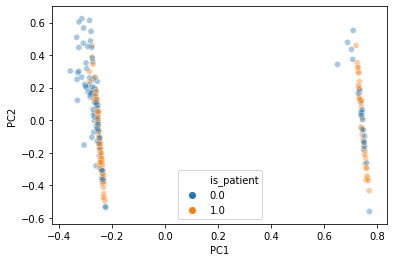

In [129]:
#PCA for Random Under Sampled Dataset
pca_random_under = PCA(n_components=2)
X_pca_random_under = pca_random_under.fit_transform(X_train_rus)
print(pca_random_under.explained_variance_ratio_.cumsum())
y_temp_rus = y_train_rus
y_temp_rus["PC1"] = X_pca_random_under[:,0]
y_temp_rus["PC2"] = X_pca_random_under[:,1]
sns.scatterplot(data=y_temp_rus, x="PC1", y="PC2", hue="is_patient", alpha=0.4)
print(y_temp_rus["is_patient"].value_counts())

In [130]:
print(y_train_rus.head())
y_train_rus = y_train_rus.drop(["PC1", "PC2"], axis=1)
print(y_train_rus.head())

     is_patient       PC1       PC2
199         1.0  0.732684  0.298147
69          0.0  0.744576 -0.057108
233         1.0  0.756407 -0.190036
39          0.0 -0.333367  0.250382
138         1.0 -0.256523  0.093402
     is_patient
199         1.0
69          0.0
233         1.0
39          0.0
138         1.0


In [135]:
#1 Naive Bayes On Random Under Sampled Training dataset

print("\n----------------------------------------------------------------------\n")

print("Naive Bayes on Random Under sampled Training dataset:")
clfFitPredict(GaussianNB(), X_train_rus, X_test, y_train_rus, y_test)

#Cross Validation on Naive Bayes on Random Under Sampled Training datset
print("\nCross Validation of Naive Bayes on Random Undersample Training dataset:")
crossValidation(GaussianNB(), X_rus, y_rus, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Naive Bayes on Random Under sampled Training dataset:

Confusion Matrix: 
[[48 77]
 [ 3 47]]

Accuracy : 0.5428571428571428
Sensitivity : 0.384
Precision: 0.9411764705882353
Specificity : 0.94
F-Score : 0.5454545454545454

               precision    recall  f1-score   support

         0.0       0.94      0.38      0.55       125
         1.0       0.38      0.94      0.54        50

    accuracy                           0.54       175
   macro avg       0.66      0.66      0.54       175
weighted avg       0.78      0.54      0.54       175
 


Cross Validation of Naive Bayes on Random Undersample Training dataset:
[0.66019417 0.6372549  0.59803922 0.61764706] 

0.6282838378069675

----------------------------------------------------------------------



In [136]:
print("\n----------------------------------------------------------------------\n")

#2 SVM Classifier On Random UnderSampled Training dataset
print("SVM Classifier on Random Undersample Training dataset:")
clfFitPredict(LinearSVC(), X_train_rus, X_test, y_train_rus, y_test)

#Cross Validation on SVM Classifier on Random Under Training sampled datset
print("\nCross Validation of SVM Classifier on Random Undersample Training dataset:")
crossValidation(LinearSVC(), X_rus, y_rus, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

SVM Classifier on Random Undersample Training dataset:

Confusion Matrix: 
[[66 59]
 [ 9 41]]

Accuracy : 0.6114285714285714
Sensitivity : 0.528
Precision: 0.88
Specificity : 0.82
F-Score : 0.66

               precision    recall  f1-score   support

         0.0       0.88      0.53      0.66       125
         1.0       0.41      0.82      0.55        50

    accuracy                           0.61       175
   macro avg       0.65      0.67      0.60       175
weighted avg       0.75      0.61      0.63       175
 


Cross Validation of SVM Classifier on Random Undersample Training dataset:
[0.72815534 0.65686275 0.60784314 0.69607843] 

0.6722349133828289

----------------------------------------------------------------------



In [137]:
print("\n----------------------------------------------------------------------\n")

#3 Logistic Regression Classifier On Random Undersampled Training dataset
print("Logistic Regression Classifier on Random Undersample Training dataset:")
clfFitPredict(LogisticRegression(), X_train_rus, X_test, y_train_rus, y_test)

#Cross Validation on Logistic Regression Classifier on Random Under sampled Training datset
print("\nCross Validation of Logistic Regression Classifier on Radom Under sample Training dataset:")
crossValidation(LogisticRegression(), X_rus, y_rus, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Logistic Regression Classifier on Random Undersample Training dataset:

Confusion Matrix: 
[[75 50]
 [ 7 43]]

Accuracy : 0.6742857142857143
Sensitivity : 0.6
Precision: 0.9146341463414634
Specificity : 0.86
F-Score : 0.7246376811594203

               precision    recall  f1-score   support

         0.0       0.91      0.60      0.72       125
         1.0       0.46      0.86      0.60        50

    accuracy                           0.67       175
   macro avg       0.69      0.73      0.66       175
weighted avg       0.79      0.67      0.69       175
 


Cross Validation of Logistic Regression Classifier on Radom Under sample Training dataset:
[0.68932039 0.64705882 0.60784314 0.67647059] 

0.6551732343422807

----------------------------------------------------------------------



In [138]:
print("\n----------------------------------------------------------------------\n")

#4 KNN Classifier On Random Under Sample Training dataset
print("KNN Classifier on Random Undersample Training dataset:")
clfFitPredict(KNeighborsClassifier(n_neighbors = 2), X_train_rus, X_test, y_train_rus, y_test)


#Cross Validation on KNN Classifier on Random Under sampled Training datset
print("\nCross Validation of KNN Classifier on Random Undersample Training dataset:")
crossValidation(KNeighborsClassifier(n_neighbors = 2), X_rus, y_rus, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

KNN Classifier on Random Undersample Training dataset:

Confusion Matrix: 
[[91 34]
 [28 22]]

Accuracy : 0.6457142857142857
Sensitivity : 0.728
Precision: 0.7647058823529411
Specificity : 0.44
F-Score : 0.7459016393442623

               precision    recall  f1-score   support

         0.0       0.76      0.73      0.75       125
         1.0       0.39      0.44      0.42        50

    accuracy                           0.65       175
   macro avg       0.58      0.58      0.58       175
weighted avg       0.66      0.65      0.65       175
 


Cross Validation of KNN Classifier on Random Undersample Training dataset:
[0.60194175 0.56862745 0.60784314 0.64705882] 

0.6063677898343803

----------------------------------------------------------------------



In [139]:
print("\n----------------------------------------------------------------------\n")

#5 Random Forest Classifier On Random Under sample Training dataset
print("Random Forest Classifier on Random Undersample training dataset:")
clfFitPredict(RandomForestClassifier(max_depth=4, random_state=0), X_train_rus, X_test, y_train_rus, y_test)

#Cross Validation on Random Forest Classifier on Random under sampled Training datset
print("\nCross Validation of Random Forest Classifier on Random Undersample Training dataset:")
crossValidation(RandomForestClassifier(max_depth=4, random_state=0), X_rus, y_rus, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Random Forest Classifier on Random Undersample training dataset:

Confusion Matrix: 
[[66 59]
 [ 9 41]]

Accuracy : 0.6114285714285714
Sensitivity : 0.528
Precision: 0.88
Specificity : 0.82
F-Score : 0.66

               precision    recall  f1-score   support

         0.0       0.88      0.53      0.66       125
         1.0       0.41      0.82      0.55        50

    accuracy                           0.61       175
   macro avg       0.65      0.67      0.60       175
weighted avg       0.75      0.61      0.63       175
 


Cross Validation of Random Forest Classifier on Random Undersample Training dataset:
[0.75728155 0.69607843 0.62745098 0.62745098] 

0.6770654863887302

----------------------------------------------------------------------



In [140]:
print("\n----------------------------------------------------------------------\n")

#6 Voting Classifier for Radnom UnderSampled Training Dataset

print("Voting Classifier on Random Under sampled Training dataset:")
clfs = [('rf', RandomForestClassifier(max_depth=4,random_state=1)), ('lr',LogisticRegression()), 
        ('svm',LinearSVC()), ('knn', KNeighborsClassifier(n_neighbors = 2))]
vclf = VotingClassifier(estimators=clfs, voting='hard')
clfFitPredict(vclf, X_train_rus, X_test, y_train_rus, y_test)

#Cross Validation on Voting Classifier on Random UnderSampled Training datset
print("\nCross Validation of Voting Classifier on Random under sampled Training dataset:")
crossValidation(vclf, X_rus, y_rus, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Voting Classifier on Random Under sampled Training dataset:

Confusion Matrix: 
[[75 50]
 [11 39]]

Accuracy : 0.6514285714285715
Sensitivity : 0.6
Precision: 0.872093023255814
Specificity : 0.78
F-Score : 0.7109004739336493

               precision    recall  f1-score   support

         0.0       0.87      0.60      0.71       125
         1.0       0.44      0.78      0.56        50

    accuracy                           0.65       175
   macro avg       0.66      0.69      0.64       175
weighted avg       0.75      0.65      0.67       175
 


Cross Validation of Voting Classifier on Random under sampled Training dataset:
[0.70873786 0.62745098 0.57843137 0.66666667] 

0.6453217209213783

----------------------------------------------------------------------



In [141]:
print("\n----------------------------------------------------------------------\n")

#7 AdaBoostClassifier With Decision Tree Classifier as base estimator on Random Undersampled Dataset

dt_rus = DecisionTreeClassifier(max_depth=1, random_state=1)
adb_clf_rus = AdaBoostClassifier(base_estimator=dt_rus, n_estimators=100, learning_rate=0.025)
print("\nAdaBoostClassifier with Decision Tree as base estimator on Random Undersampled Dataset:")
clfFitPredict(adb_clf_rus, X_train_rus, X_test, y_train_rus, y_test)

#Cross Validation on AdaBoost Classifier on Random Undersampled Dataset
print("\nCross Validation of AdaBoost Classifier on Random undersampled dataset:")
crossValidation(adb_clf_rus, X_rus, y_rus, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


AdaBoostClassifier with Decision Tree as base estimator on Random Undersampled Dataset:

Confusion Matrix: 
[[63 62]
 [ 7 43]]

Accuracy : 0.6057142857142858
Sensitivity : 0.504
Precision: 0.9
Specificity : 0.86
F-Score : 0.6461538461538462

               precision    recall  f1-score   support

         0.0       0.90      0.50      0.65       125
         1.0       0.41      0.86      0.55        50

    accuracy                           0.61       175
   macro avg       0.65      0.68      0.60       175
weighted avg       0.76      0.61      0.62       175
 


Cross Validation of AdaBoost Classifier on Random undersampled dataset:
[0.70873786 0.67647059 0.68627451 0.64705882] 

0.6796354464115743

----------------------------------------------------------------------



In [142]:
print("\n----------------------------------------------------------------------\n")

#8 AdaBoostClassifier With SVC as base estimator 

svc_adb_rus = SVC(probability=True, kernel='linear')
adb_clf_svc_rus = AdaBoostClassifier(base_estimator=svc_adb_rus, n_estimators=100, learning_rate=0.025)
print("\nAdaBoostClassifier with SVC as base estimator on Random undersampled Dataset:")
clfFitPredict(adb_clf_svc_rus, X_train_rus, X_test, y_train_rus, y_test)

#Cross Validation on AdaBoostClassifier on Random Undersampled datset
print("\nCross Validation of AdaBoostClassifier with SVM as base estimator on Random undersampled dataset:")
crossValidation(adb_clf_svc_rus, X_rus, y_rus, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


AdaBoostClassifier with SVC as base estimator on Random undersampled Dataset:

Confusion Matrix: 
[[67 58]
 [ 7 43]]

Accuracy : 0.6285714285714286
Sensitivity : 0.536
Precision: 0.9054054054054054
Specificity : 0.86
F-Score : 0.6733668341708543

               precision    recall  f1-score   support

         0.0       0.91      0.54      0.67       125
         1.0       0.43      0.86      0.57        50

    accuracy                           0.63       175
   macro avg       0.67      0.70      0.62       175
weighted avg       0.77      0.63      0.64       175
 


Cross Validation of AdaBoostClassifier with SVM as base estimator on Random undersampled dataset:
[0.65048544 0.54901961 0.66666667 0.64705882] 

0.6283076337331048

----------------------------------------------------------------------



In [143]:
print("\n----------------------------------------------------------------------\n")

#9 GradientBoostingClassifier On Random undersampled Dataset

gbc_rus = GradientBoostingClassifier(max_depth=1, subsample=0.8, max_features=0.2, n_estimators=300, random_state=0)
print("\nGradientBoostingClassifier on the Random undersampled dataset:")
clfFitPredict(gbc_rus, X_train_rus, X_test, y_train_rus, y_test)

#Cross Validation on GradientBoostingClassifier on Random undersampled datset
print("\nCross Validation of GradientBoostingClassifier on Random undersampled dataset:")
crossValidation(gbc_rus, X_rus, y_rus, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


GradientBoostingClassifier on the Random undersampled dataset:

Confusion Matrix: 
[[68 57]
 [11 39]]

Accuracy : 0.6114285714285714
Sensitivity : 0.544
Precision: 0.8607594936708861
Specificity : 0.78
F-Score : 0.6666666666666666

               precision    recall  f1-score   support

         0.0       0.86      0.54      0.67       125
         1.0       0.41      0.78      0.53        50

    accuracy                           0.61       175
   macro avg       0.63      0.66      0.60       175
weighted avg       0.73      0.61      0.63       175
 


Cross Validation of GradientBoostingClassifier on Random undersampled dataset:
[0.73786408 0.60784314 0.65686275 0.71568627] 

0.679564058633162

----------------------------------------------------------------------



In [144]:
print("\n----------------------------------------------------------------------\n")

#10 XGBClassifier on the Random undersampled Dataset

xgb_clf_rus = XGBClassifier(objective='binary:logistic', booster='gblinear', n_estimators=10, seed=1)
print("\nXGBClassifier on the Random undersampled dataset:")
clfFitPredict(xgb_clf_rus, X_train_rus, X_test, y_train_rus, y_test)

#Cross Validation on XGBClassifier on Random undersampled dataset
print("\nCross Validation of XGBClassifier on Random undersampled dataset:")
crossValidation(xgb_clf_rus, X_rus, y_rus, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


XGBClassifier on the Random undersampled dataset:

Confusion Matrix: 
[[77 48]
 [19 31]]

Accuracy : 0.6171428571428571
Sensitivity : 0.616
Precision: 0.8020833333333334
Specificity : 0.62
F-Score : 0.6968325791855204

               precision    recall  f1-score   support

         0.0       0.80      0.62      0.70       125
         1.0       0.39      0.62      0.48        50

    accuracy                           0.62       175
   macro avg       0.60      0.62      0.59       175
weighted avg       0.69      0.62      0.64       175
 


Cross Validation of XGBClassifier on Random undersampled dataset:
[0.59223301 0.58823529 0.58823529 0.59803922] 

0.5916857034075766

----------------------------------------------------------------------



In [131]:
#Classification With Random UnderSampled PCA Training dataset:

pca_rus_1 = PCA()
X_pca_rus_1 = pca_rus_1.fit_transform(X_train_rus)
print(pca_rus_1.explained_variance_ratio_.cumsum())

pca_rus1 = PCA(n_components=5)
X_pca_train_rus1 = pd.DataFrame(pca_rus1.fit_transform(X_train_rus))
X_pca_test_rus1 = pd.DataFrame(pca_rus1.transform(X_test))

X_pca_rus1 = pd.concat([X_pca_train_rus1, X_pca_test_rus1], axis=0)


[0.5486141  0.73464389 0.84740938 0.92879486 0.96903557 0.98625515
 0.99485509 0.99898767 0.99968489 1.        ]


In [145]:

print("\n----------------------------------------------------------------------\n")

#1 Naive Bayes On Random UnderSampled PCA Training dataset
print("Naive Bayes on Random UnderSampled PCA Training dataset:")
clfFitPredict(GaussianNB(), X_pca_train_rus1, X_pca_test_rus1, y_train_rus, y_test)

#Cross Validation on Naive Bayes on Random UnderSampled PCA Training dataset
print("\nCross Validation of Naive Bayes on Random UnderSampled PCA Training dataset:")
crossValidation(GaussianNB(), X_pca_rus1, y_rus, 4)

print("\n----------------------------------------------------------------------\n")

#2.1 SVM Classifier On Random UnderSampled PCA Training dataset
print("SVM Classifier on Random UnderSampled PCA Training dataset:")
clfFitPredict(LinearSVC(), X_pca_train_rus1, X_pca_test_rus1, y_train_rus, y_test)

#Cross Validation on SVM Classifier on Random UnderSampled PCA Training dataset
print("\nCross Validation of SVM Classifier on Random UnderSampled PCA Training dataset:")
crossValidation(LinearSVC(), X_pca_rus1, y_rus, 4)

print("\n----------------------------------------------------------------------\n")

#3.1 Logistic Regression Classifier On Random UnderSampled PCA Training dataset
print("Logistic Regression Classifier on Random UnderSampled PCA Training dataset:")
clfFitPredict(LogisticRegression(), X_pca_train_rus1, X_pca_test_rus1, y_train_rus, y_test)

#Cross Validation on Logistic Regression Classifier on Random UnderSampled PCA Training dataset
print("\nCross Validation of Logistic Regression Classifier on Random UnderSampled PCA Training dataset:")
crossValidation(LogisticRegression(), X_pca_rus1, y_rus, 4)

print("\n----------------------------------------------------------------------\n")

#4.1 KNN Classifier On Random UnderSampled PCA Training dataset
print("KNN Classifier on Random UnderSampled PCA Training dataset:")
clfFitPredict(KNeighborsClassifier(n_neighbors = 2), X_pca_train_rus1, X_pca_test_rus1, y_train_rus, y_test)

#Cross Validation on KNN Classifier on Random UnderSampled PCA Training dataset
print("\nCross Validation of KNN Classifier on Random UnderSampled PCA Training dataset:")
crossValidation(KNeighborsClassifier(n_neighbors = 2), X_pca_rus1, y_rus, 4)

print("\n----------------------------------------------------------------------\n")

#5.1 Random Forest Classifier On Random UnderSampled PCA Training dataset
print("Random Forest Classifier on Random UnderSampled PCA Training dataset:")
clfFitPredict(RandomForestClassifier(max_depth=4, random_state=0), X_pca_train_rus1, X_pca_test_rus1, y_train_rus, y_test)

#Cross Validation on Random Forest Classifier on Random UnderSampled PCA Training dataset
print("\nCross Validation of Random Forest Classifier on Random UnderSampled PCA Training dataset:")
crossValidation(RandomForestClassifier(max_depth=4, random_state=0), X_pca_rus1, y_rus, 4)

print("\n----------------------------------------------------------------------\n")

#6 Voting Classifier for Random UnderSampled PCA Training dataset
print("Voting Classifier on Random UnderSampled PCA Training dataset:")
clfFitPredict(vclf, X_pca_train_rus1, X_pca_test_rus1, y_train_rus, y_test)

#Cross Validation on Voting Classifier on Random UnderSampled PCA Training dataset
print("\nCross Validation of Voting Classifier on Random UnderSampled PCA Training dataset:")
crossValidation(vclf, X_pca_rus1, y_rus, 4)

print("\n----------------------------------------------------------------------\n")

#7 AdaBoostClassifier With Decision Tree Classifier as base estimator on Random Undersampled PCA Training Dataset

print("\nAdaBoostClassifier with Decision Tree as base estimator on Random Undersampled PCA Training Dataset:")
clfFitPredict(adb_clf_rus, X_pca_train_rus1, X_pca_test_rus1, y_train_rus, y_test)

#Cross Validation on AdaBoost Classifier on Random Undersampled PCA Training Dataset
print("\nCross Validation of AdaBoost Classifier on Random undersampled PCA Training dataset:")
crossValidation(adb_clf_rus, X_pca_rus1, y_rus, 4)

print("\n----------------------------------------------------------------------\n")

#8 AdaBoostClassifier With SVC as base estimator 

print("\nAdaBoostClassifier with SVC as base estimator on Random undersampled PCA Training Dataset:")
clfFitPredict(adb_clf_svc_rus, X_pca_train_rus1, X_pca_test_rus1, y_train_rus, y_test)

#Cross Validation on AdaBoostClassifier on Random Undersampled PCA Training datset
print("\nCross Validation of AdaBoostClassifier with SVM as base estimator on Random undersampled PCA Training dataset:")
crossValidation(adb_clf_svc_rus, X_pca_rus1, y_rus, 4)

print("\n----------------------------------------------------------------------\n")

#9 GradientBoostingClassifier On Random undersampled PCA Training Dataset

print("\nGradientBoostingClassifier on the Random undersampled PCA training dataset:")
clfFitPredict(gbc_rus, X_pca_train_rus1, X_pca_test_rus1, y_train_rus, y_test)

#Cross Validation on GradientBoostingClassifier on Random undersampled PCA Training dataset
print("\nCross Validation of GradientBoostingClassifier on Random undersampled PCA Training dataset:")
crossValidation(gbc_rus, X_pca_rus1, y_rus, 4)

print("\n----------------------------------------------------------------------\n")

#10 XGBClassifier on the Random Undersampled Training PCA Training Dataset

print("\nXGBClassifier on the Random undersampled PCA Training dataset:")
clfFitPredict(xgb_clf_rus, X_pca_train_rus1, X_pca_test_rus1, y_train_rus, y_test)

#Cross Validation on XGBClassifier on Random undersampled PCA Training dataset
print("\nCross Validation of XGBClassifier on Random undersampled PCA Training dataset:")
crossValidation(xgb_clf_rus, X_pca_rus1, y_rus, 4)

print("\n----------------------------------------------------------------------\n")

[0.5486141  0.73464389 0.84740938 0.92879486 0.96903557 0.98625515
 0.99485509 0.99898767 0.99968489 1.        ]

----------------------------------------------------------------------

Naive Bayes on Random UnderSampled PCA Training dataset:

Confusion Matrix: 
[[54 71]
 [12 38]]

Accuracy : 0.5257142857142857
Sensitivity : 0.432
Precision: 0.8181818181818182
Specificity : 0.76
F-Score : 0.5654450261780104

               precision    recall  f1-score   support

         0.0       0.82      0.43      0.57       125
         1.0       0.35      0.76      0.48        50

    accuracy                           0.53       175
   macro avg       0.58      0.60      0.52       175
weighted avg       0.68      0.53      0.54       175
 


Cross Validation of Naive Bayes on Random UnderSampled PCA Training dataset:
[0.65048544 0.66666667 0.55882353 0.55882353] 

0.60869979059585

----------------------------------------------------------------------

SVM Classifier on Random UnderSampled PCA 

In [146]:
#Hyperparameter Tuning for SVC on RandomUnderSampled Dataset

random_svc_rus = RandomizedSearchCV(estimator = SVC(random_state=0), 
                            param_distributions = param_grid_svc, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10, n_jobs=-1,random_state = 0
                           )
#X_train_rus, X_test, y_train_rus, y_test
random_svc_rus.fit(X_train_rus, y_train_rus.values.ravel())
joblib.dump(random_svc_rus, "RSCV_SVC_rus.pkl")

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.3s finished


['RSCV_SVC_rus.pkl']

In [132]:
print("\nRandomizedSearchCV for SVC on RandomUnderSampled Dataset :")
RSCV_SVC_rus_loaded = joblib.load("RSCV_SVC_rus.pkl")
print("\nBest Params -", RSCV_SVC_rus_loaded.best_params_)
print("\nBest Score -", RSCV_SVC_rus_loaded.best_score_)
print("\nAccuracy Score -", accuracy_score(y_test, RSCV_SVC_rus_loaded.predict(X_test)))


RandomizedSearchCV for SVC on RandomUnderSampled Dataset :

Best Params - {'kernel': 'sigmoid', 'gamma': 0.05, 'C': 1000}

Best Score - 0.7217391304347827

Accuracy Score - 0.6057142857142858


In [151]:
#X_pca_train_rus1, X_pca_test_rus1, y_train_rus, y_test
random_svc_pca_rus = RandomizedSearchCV(estimator = SVC(random_state=0), 
                            param_distributions = param_grid_svc, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )
random_svc_pca_rus.fit(X_pca_train_rus1, y_train_rus.values.ravel())
joblib.dump(random_svc_pca_rus, "RSCV_SVC_pca_rus.pkl")

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished


['RSCV_SVC_pca_rus.pkl']

In [133]:
print("\nRandomizedSearchCV for SVC on RandomUnderSampled PCA Dataset :")
RSCV_SVC_pca_rus_loaded = joblib.load("RSCV_SVC_pca_rus.pkl")
print("\nBest Params -", RSCV_SVC_pca_rus_loaded.best_params_)
print("\nBest Score -", RSCV_SVC_pca_rus_loaded.best_score_)
print("\nAccuracy Score -", accuracy_score(y_test, RSCV_SVC_pca_rus_loaded.predict(X_pca_test_rus1)))


RandomizedSearchCV for SVC on RandomUnderSampled PCA Dataset :

Best Params - {'kernel': 'sigmoid', 'gamma': 0.05, 'C': 1000}

Best Score - 0.6922101449275363

Accuracy Score - 0.5942857142857143


In [154]:
#Hyperparameter Tuning for Logistic Regression With RandomUnderSampled Dataset

random_logreg_rus = RandomizedSearchCV(estimator=LogisticRegression(), 
                            param_distributions = param_grid_logreg, 
                            cv=10,scoring='accuracy',refit=True,verbose=1,
                            n_jobs=-1,n_iter=100,random_state=0
                           )
#X_train_rus, X_test, y_train_rus, y_test
random_logreg_rus.fit(X_train_rus, y_train_rus.values.ravel())
joblib.dump(random_logreg_rus, "RSCV_LR_rus.pkl")

Fitting 10 folds for each of 96 candidates, totalling 960 fits


/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 96 is smaller than n_iter=100. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:    7.1s finished
/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGI

['RSCV_LR_rus.pkl']

In [134]:
print("\nRandomizedSearchCV for LR on RandomUnderSampled Dataset :")
RSCV_LR_rus_loaded = joblib.load("RSCV_LR_rus.pkl")
print("\nBest Parameters :",RSCV_LR_rus_loaded.best_params_) 
print("\nBest Score :",RSCV_LR_rus_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_LR_rus_loaded.predict(X_test)))



RandomizedSearchCV for LR on RandomUnderSampled Dataset :

Best Parameters : {'solver': 'lbfgs', 'penalty': 'l2', 'C': 1000}

Best Score : 0.7469202898550724

Accuracy Score : 0.6171428571428571


In [156]:
#Hyperparameter Tuning for Logistic Regression With RandomUnderSampled PCA Dataset
random_logreg_pca_rus = RandomizedSearchCV(estimator = LogisticRegression(), 
                            param_distributions = param_grid_logreg, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )
#X_pca_train_rus1, X_pca_test_rus1, y_train_rus, y_test
random_logreg_pca_rus.fit(X_pca_train_rus1, y_train_rus.values.ravel())
joblib.dump(random_logreg_pca_rus, "RSCV_LR_pca_rus.pkl")

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished


['RSCV_LR_pca_rus.pkl']

In [135]:
print("\nRandomizedSearchCV for LR on RandomUnderSampled PCA Dataset :")
RSCV_LR_pca_rus_loaded = joblib.load("RSCV_LR_pca_rus.pkl")
print("\nBest Parameters :", RSCV_LR_pca_rus_loaded.best_params_) 
print("\nBest Score :", RSCV_LR_pca_rus_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_LR_pca_rus_loaded.predict(X_pca_test_rus1)))


RandomizedSearchCV for LR on RandomUnderSampled PCA Dataset :

Best Parameters : {'solver': 'saga', 'penalty': 'l1', 'C': 10}

Best Score : 0.7088768115942029

Accuracy Score : 0.6285714285714286


In [158]:
#Hyperparameter Tuning for RandomForest on RandomUnderSampled Dataset

random_rf_rus = RandomizedSearchCV(estimator=RandomForestClassifier(random_state = 1),
                               param_distributions=param_grid_rf, 
                               verbose=False,cv=10,scoring='accuracy', 
                               refit=True,n_jobs=-1,random_state=0
                              )
#X_train_rus, X_test, y_train_rus, y_test
random_rf_rus.fit(X_train_rus, y_train_rus.values.ravel())
joblib.dump(random_rf_rus, "RSCV_RF_rus.pkl")

['RSCV_RF_rus.pkl']

In [136]:
print("\nRandomizedSearchCV for RF on RUS Dataset :")
RSCV_RF_rus_loaded = joblib.load("RSCV_RF_rus.pkl")
print("\nBest Parameter :", RSCV_RF_rus_loaded.best_params_)
print("\nBest Score :", RSCV_RF_rus_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_RF_rus_loaded.predict(X_test)))


RandomizedSearchCV for RF on RUS Dataset :

Best Parameter : {'n_estimators': 100, 'min_samples_split': 0.2, 'min_samples_leaf': 0.2, 'max_features': 'sqrt', 'max_depth': 11.0, 'bootstrap': False}

Best Score : 0.7047101449275363

Accuracy Score : 0.6171428571428571


In [160]:
#Hyperparameter Tuning for RandomForest on RandomUnderSampled PCA Dataset
random_rf_pca_rus = RandomizedSearchCV(estimator = RandomForestClassifier(random_state = 1), 
                            param_distributions = param_grid_rf,refit=True,verbose=True,
                            scoring='accuracy',cv=10,n_jobs=-1,random_state = 0
                           )
#X_pca_train_rus1, X_pca_test_rus1, y_train_rus, y_test
random_rf_pca_rus.fit(X_pca_train_rus1, y_train_rus.values.ravel())
joblib.dump(random_rf_pca_rus, "RSCV_RF_pca_rus.pkl")

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   24.3s finished


['RSCV_RF_pca_rus.pkl']

In [137]:
print("\nRandomizedSearchCV for RF on RUS PCA Dataset :")
RSCV_RF_pca_rus_loaded = joblib.load("RSCV_RF_pca_rus.pkl")
print("\nBest Parameter :", RSCV_RF_pca_rus_loaded.best_params_)
print("\nBest Score :", RSCV_RF_pca_rus_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_RF_pca_rus_loaded.predict(X_pca_test_rus1)))


RandomizedSearchCV for RF on RUS PCA Dataset :

Best Parameter : {'n_estimators': 32, 'min_samples_split': 1.0, 'min_samples_leaf': 0.4, 'max_features': 'sqrt', 'max_depth': 14.0, 'bootstrap': False}

Best Score : 0.6672101449275363

Accuracy Score : 0.6114285714285714


In [163]:
#Hyperparameter Tuning for GradientBoostingClassifier on RUS Dataset

clf_gbc_rus = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                             param_distributions=param_grid_gbc,cv=10,scoring='accuracy',
                             refit=True, n_jobs=-1,verbose=False,random_state=0
                            )
#X_train_rus, X_test, y_train_rus, y_test
clf_gbc_rus.fit(X_train_rus, y_train_rus.values.ravel())
joblib.dump(clf_gbc_rus,'RSCV_GBC_rus.pkl')

['RSCV_GBC_rus.pkl']

In [138]:
print("\nRandomizedSearchCV on GBC with RUS Dataset")
RSCV_GBC_rus_loaded = joblib.load("RSCV_GBC_rus.pkl")
print("\nBest Score :", RSCV_GBC_rus_loaded.best_score_)
print("\nBest Parameters :",RSCV_GBC_rus_loaded.best_params_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_GBC_rus_loaded.predict(X_test)))



RandomizedSearchCV on GBC with RUS Dataset

Best Score : 0.7253623188405797

Best Parameters : {'n_estimators': 32, 'min_samples_split': 0.5, 'min_samples_leaf': 0.2, 'max_depth': 27.0, 'learning_rate': 0.1}

Accuracy Score : 0.6342857142857142


In [165]:
#Hyperparameter Tuning for GradientBoostingClassifier on RUS PCA Dataset

clf_gbc_rus_pca = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                             param_distributions=param_grid_gbc,cv=10,scoring='accuracy',
                             refit=True, n_jobs=-1,verbose=False,random_state=0
                            )
#X_pca_train_rus1, X_pca_test_rus1, y_train_rus, y_test
clf_gbc_rus_pca.fit(X_pca_train_rus1, y_train_rus.values.ravel())
joblib.dump(clf_gbc_rus_pca,'RSCV_GBC_rus_pca.pkl')

['RSCV_GBC_rus_pca.pkl']

In [139]:
print("\nRandomizedSearchCV on GBC with RUS PCA Dataset")
RSCV_GBC_rus_pca_loaded = joblib.load("RSCV_GBC_rus_pca.pkl")
print("\nBest Score :", RSCV_GBC_rus_pca_loaded.best_score_)
print("\nBest Parameters :",RSCV_GBC_rus_pca_loaded.best_params_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_GBC_rus_pca_loaded.predict(X_pca_test_rus1)))


RandomizedSearchCV on GBC with RUS PCA Dataset

Best Score : 0.6873188405797102

Best Parameters : {'n_estimators': 1500, 'min_samples_split': 1.0, 'min_samples_leaf': 0.1, 'max_depth': 22.0, 'learning_rate': 0.005}

Accuracy Score : 0.6057142857142858


In [168]:
print(len(X_train_rus), len(y_train_rus))

234 234


In [170]:
#Hyperparameter for AdaBoost Classifier 
                
#dTC = DecisionTreeClassifier(max_depth=4,max_features='sqrt',min_samples_leaf=0.5,min_samples_split=0.1)
ada_classifier = AdaBoostClassifier(random_state=0) #base_estimator=dTC, 

random_adaboost_rus = RandomizedSearchCV(estimator=ada_classifier, param_distributions=param_grid_adc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
#X_train_rus, X_test, y_train_rus, y_test
random_adaboost_rus.fit(X_train_rus, y_train_rus.values.ravel())
joblib.dump(random_adaboost_rus, "RSCV_ADC_rus.pkl")

['RSCV_ADC_rus.pkl']

In [140]:
print("\nRandomizedSearchCV for ADC for RUS Dataset :")
RSCV_ADC_rus_loaded = joblib.load("RSCV_ADC_rus.pkl")
print("\nBest Score -", RSCV_ADC_rus_loaded.best_score_)
print("\nBest Parameters -",RSCV_ADC_rus_loaded.best_params_)
print("\n Accuracy Score -", accuracy_score(y_test, RSCV_ADC_rus_loaded.predict(X_test)))


RandomizedSearchCV for ADC for RUS Dataset :

Best Score - 0.6960144927536231

Best Parameters - {'n_estimators': 16, 'learning_rate': 0.1, 'algorithm': 'SAMME.R'}

 Accuracy Score - 0.5942857142857143


In [176]:
#Hyperparameter Tuning For AdaBoostClassifier on PCA Original Dataset
                
dTC = DecisionTreeClassifier(max_depth=4,max_features='sqrt',min_samples_leaf=0.5,min_samples_split=0.1)
ada_classifier = AdaBoostClassifier(base_estimator=dTC, random_state=0)

random_adaboost_pca_rus = RandomizedSearchCV(estimator=ada_classifier, param_distributions=param_grid_adc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
#X_pca_train_rus1, X_pca_test_rus1, y_train_rus, y_test
random_adaboost_pca_rus.fit(X_pca_train_rus1, y_train_rus.values.ravel())
joblib.dump(random_adaboost_pca_rus, "RSCV_ADC_pca_rus.pkl")

['RSCV_ADC_pca_rus.pkl']

In [141]:
print("\nRandomizedSearchCV for ADC for RUS PCA Dataset :")
RSCV_ADC_rus_pca_loaded = joblib.load("RSCV_ADC_pca_rus.pkl")
print("\nBest Score -", RSCV_ADC_rus_pca_loaded.best_score_)
print("\nBest Parameters -", RSCV_ADC_rus_pca_loaded.best_params_)
print("\n Accuracy Score -", accuracy_score(y_test, RSCV_ADC_rus_pca_loaded.predict(X_pca_test_rus1)))



RandomizedSearchCV for ADC for RUS PCA Dataset :

Best Score - 0.5702898550724639

Best Parameters - {'n_estimators': 64, 'learning_rate': 0.1, 'algorithm': 'SAMME.R'}

 Accuracy Score - 0.5657142857142857


In [178]:
#AdaBoostClassifier with SVC as base estimator 

svc = SVC(kernel='sigmoid', gamma=0.001, C=1)
ada_classifier_svc = AdaBoostClassifier(base_estimator=svc, random_state=0)

random_adaboost_svc_rus = RandomizedSearchCV(estimator=ada_classifier_svc, param_distributions=param_grid_adc_svc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)

random_adaboost_svc_rus.fit(X_train_rus, y_train_rus.values.ravel())
joblib.dump(random_adaboost_svc_rus, "RSCV_ADC_SVC_rus.pkl")
#X_train_rus, X_test, y_train_rus, y_test
#X_pca_train_rus1, X_pca_test_rus1, y_train_rus, y_test

['RSCV_ADC_SVC_rus.pkl']

In [142]:
print("\nRandomizedSearchCV for ADC with SVC on RUS")
RSCV_ADC_SVC_rus_loaded = joblib.load("RSCV_ADC_SVC_rus.pkl")
print("\nBest Score :",RSCV_ADC_SVC_rus_loaded.best_params_)
print("\nBest Parameter :",RSCV_ADC_SVC_rus_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_ADC_SVC_rus_loaded.predict(X_test)))


RandomizedSearchCV for ADC with SVC on RUS

Best Score : {'n_estimators': 1000, 'learning_rate': 1, 'algorithm': 'SAMME'}

Best Parameter : 0.5327898550724639

Accuracy Score : 0.6342857142857142


In [180]:
svc  = SVC(kernel='sigmoid', gamma=0.001, C=1)
ada_classifier_svc = AdaBoostClassifier(base_estimator=svc, random_state=0)
random_adaboost_svc_pca_rus = RandomizedSearchCV(estimator=ada_classifier_svc, param_distributions=param_grid_adc_svc,
                                            random_state=0, cv=10, scoring='accuracy',
                                            refit=True, n_jobs=-1, verbose=False)

random_adaboost_svc_pca_rus.fit(X_pca_train_rus1, y_train_rus.values.ravel())
joblib.dump(random_adaboost_svc_pca_rus, "RSCV_ADC_SVC_pca_rus.pkl")

['RSCV_ADC_SVC_pca_rus.pkl']

In [143]:
print("\nRandomizedSearchCV for ADC with SVC on RUS Dataset")
RSCV_ADC_SVC_rus_pca_loaded = joblib.load("RSCV_ADC_SVC_pca_rus.pkl")
print("\nBest Score :",RSCV_ADC_SVC_rus_loaded.best_params_)
print("\nBest Parameter :",RSCV_ADC_SVC_rus_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_ADC_SVC_rus_pca_loaded.predict(X_pca_test_rus1)))


RandomizedSearchCV for ADC with SVC on RUS Dataset

Best Score : {'n_estimators': 1000, 'learning_rate': 1, 'algorithm': 'SAMME'}

Best Parameter : 0.5327898550724639

Accuracy Score : 0.6342857142857142


In [ ]:
#Hyperparameter Tuning for SVC
#https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

random_svc = RandomizedSearchCV(estimator = SVC(random_state=0), 
                            param_distributions = param_grid_svc, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )

random_svc.fit(X_train, y_train.values.ravel())
joblib.dump(random_svc, "RSCV_SVC.pkl")


random_svc_pca = RandomizedSearchCV(estimator = SVC(random_state=0), 
                            param_distributions = param_grid_svc, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )

random_svc_pca.fit(X_pca_train1, y_train.values.ravel())
joblib.dump(random_svc_pca, "RSCV_SVC_pca.pkl")

#Hyperparameter Tuning for Logistic Regression 

#https://towardsdatascience.com/logistic-regression-model-tuning-with-scikit-learn-part-1-425142e01af5
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

random_logreg = RandomizedSearchCV(estimator=LogisticRegression(), 
                            param_distributions = param_grid_logreg, 
                            cv=10,scoring='accuracy',refit=True,verbose=1,
                            n_jobs=-1,n_iter=100,random_state=0
                           )

random_logreg.fit(X_train, y_train.values.ravel())
joblib.dump(random_logreg, "RSCV_LR.pkl")
# print("\nBest Parameters :",random_logreg.best_params_) 
# print("\nBest Score :",random.best_score_)
# print("\nAccuracy Score :",accuracy_score(y_test, random_logreg.predict(X_test)))

random_logreg_pca = RandomizedSearchCV(estimator = LogisticRegression(), 
                            param_distributions = param_grid_logreg, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )

random_logreg_pca.fit(X_pca_train1, y_train.values.ravel())
joblib.dump(random_logreg_pca, "RSCV_LR_pca.pkl")

#Hyperparameter Tuning for RandomForest 
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
#https://towardsdatascience.com/optimizing-hyperparameters-in-random-forest-classification-ec7741f9d3f6

random_rf = RandomizedSearchCV(estimator=RandomForestClassifier(random_state = 1),
                               param_distributions=param_grid_rf, 
                               verbose=False,cv=10,scoring='accuracy', 
                               refit=True,n_jobs=-1,random_state=0
                              )
random_rf.fit(X_train, y_train.values.ravel())
joblib.dump(random_rf, "RSCV_RF.pkl")
# print("\nBest Parameter :",random_rf.best_params_)
# print("\nBest Score :", random_rf.best_score_)
# print("\nAccuracy Score :",accuracy_score(y_test, random_rf.predict(X_test)))

random_rf_pca = RandomizedSearchCV(estimator = RandomForestClassifier(random_state = 1), 
                            param_distributions = param_grid_rf,refit=True,verbose=True,
                            scoring='accuracy',cv=10,n_jobs=-1,random_state = 0
                           )

random_rf_pca.fit(X_pca_train1, y_train.values.ravel())
joblib.dump(random_rf_pca, "RSCV_RF_pca.pkl")

#Hyperparameter Tuning for GradientBoostingClassifier
#https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/
#https://medium.com/all-things-ai/in-depth-parameter-tuning-for-gradient-boosting-3363992e9bae
#https://www.datacareer.de/blog/parameter-tuning-in-gradient-boosting-gbm/

clf_gbc = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                             param_distributions=param_grid,cv=10,scoring='accuracy',
                             refit=True, n_jobs=-1,verbose=False,random_state=0
                            )
clf_gbc.fit(X_train, y_train.values.ravel())
joblib.dump(clf_gbc,'RSCV_GBC.pkl')
# print("\nBest Score :",clf_gbc.best_score_)
# print("\nBest Parameters :",clf_gbc.best_params_)
# print("\nAccuracy Score :",accuracy_score(y_test, clf_gbc.predict(X_test)))

#Hyperparameter for AdaBoost Classifier 
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
#https://www.kaggle.com/jmohitj/adaboostclassifier-and-gradientboostingclassifier
#https://www.programcreek.com/python/example/91146/sklearn.model_selection.RandomizedSearchCV
                
dTC = DecisionTreeClassifier(max_depth=4,max_features='sqrt',min_samples_leaf=0.5,min_samples_split=0.1)
ada_classifier = AdaBoostClassifier(base_estimator=dTC, random_state=0)

random_adaboost = RandomizedSearchCV(estimator=ada_classifier, param_distributions=param_grid_adc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
random_adaboost.fit(X_train, y_train.values.ravel())
joblib.dump(random_adaboost, "RSCV_ADC.pkl")
# print("\nBest Score -",random_adaboost.best_score_)
# print("\nBest Parameters -",random_adaboost.best_params_)
# print("\n Accuracy Score -", accuracy_score(y_test, random_adaboost.predict(X_test)))

#Hyperparameter Tuning For AdaBoostClassifier on PCA Original Dataset
                
dTC = DecisionTreeClassifier(max_depth=4,max_features='sqrt',min_samples_leaf=0.5,min_samples_split=0.1)
ada_classifier = AdaBoostClassifier(base_estimator=dTC, random_state=0)

random_adaboost_pca = RandomizedSearchCV(estimator=ada_classifier, param_distributions=param_grid_adc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
random_adaboost_pca.fit(X_pca_train1, y_train.values.ravel())
joblib.dump(random_adaboost_pca, "RSCV_ADC_pca.pkl")
# print("\nBest Score -",random_adaboost.best_score_)
# print("\nBest Parameters -",random_adaboost.best_params_)
# print("\n Accuracy Score -", accuracy_score(y_test, random_adaboost.predict(X_test)))

#AdaBoostClassifier with SVC as base estimator 

svc = SVC(kernel='sigmoid', gamma=0.001, C=1)
ada_classifier_svc = AdaBoostClassifier(base_estimator=svc, random_state=0)

random_adaboost_svc = RandomizedSearchCV(estimator=ada_classifier_svc, param_distributions=param_grid_adc_svc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)

random_adaboost_svc.fit(X_train, y_train.values.ravel())
joblib.dump(random_adaboost_svc, "RSCV_ADC_SVC.pkl")
# print("\nBest Score :",random_adaboost_svc.best_params_)
# print("\nBest Parameter :",random_adaboost_svc.best_score_)
# print("\nAccuracy Score :",accuracy_score(y_test, random_adaboost_svc.predict(X_test)))

svc  = SVC(kernel='sigmoid', gamma=0.001, C=1)
ada_classifier_svc = AdaBoostClassifier(base_estimator=svc, random_state=0)
random_adaboost_svc_pca = RandomizedSearchCV(estimator=ada_classifier_svc, param_distributions=param_grid_adc_svc,
                                            random_state=0, cv=10, scoring='accuracy',
                                            refit=True, n_jobs=-1, verbose=False)

random_adaboost_svc_pca.fit(X_pca_train1, y_train.values.ravel())
joblib.dump(random_adaboost_svc_pca, "RSCV_ADC_SVC_pca.pkl")


In [145]:
print("\n----------------------------------------------------------------------\n")

#RandomOverSampler On the Training Dataset
ros = RandomOverSampler(random_state=42, sampling_strategy='minority')
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train.values.ravel())
print("Original Training Dataset Distribution: \n")
print(y_train['is_patient'].value_counts())
print("\nTraining Dataset Distribution After Random Over Sampling: \n")
print(pd.Series(y_train_ros).value_counts())
X_train_ros = pd.DataFrame(X_train_ros)
y_train_ros = pd.DataFrame(y_train_ros)
y_train_ros = y_train_ros.rename(columns={0:"is_patient"})
X_temp_ros = pd.concat([X_train_ros, y_train_ros], axis=1)
#shuffling the training dataset
X_temp_ros = X_temp_ros.sample(frac=1, random_state=1)
X_train_ros  = X_temp_ros.drop(["is_patient"], axis=1)
y_train_ros  = X_temp_ros[["is_patient"]]
X_ros = pd.concat([X_train_ros, X_test], axis=0)
y_ros = pd.concat([y_train_ros, y_test], axis=0)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Original Training Dataset Distribution: 

0.0    291
1.0    117
Name: is_patient, dtype: int64

Training Dataset Distribution After Random Over Sampling: 

0.0    291
1.0    291
dtype: int64

----------------------------------------------------------------------



[0.56256164 0.73330707]
0.0    291
1.0    291
Name: is_patient, dtype: int64


/home/srix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/srix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


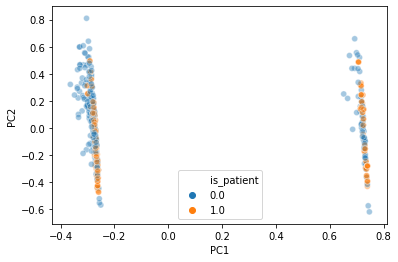

In [146]:
#PCA for Random Over Sampled Dataset
pca_random_over = PCA(n_components=2)
X_pca_random_over = pca_random_over.fit_transform(X_train_ros)
print(pca_random_over.explained_variance_ratio_.cumsum())
y_temp_ros = y_train_ros
y_temp_ros["PC1"] = X_pca_random_over[:,0]
y_temp_ros["PC2"] = X_pca_random_over[:,1]
sns.scatterplot(data=y_temp_ros, x="PC1", y="PC2", hue="is_patient", alpha=0.4)
print(y_temp_ros["is_patient"].value_counts())

In [147]:
print(y_train_ros.head())
y_train_ros = y_train_ros.drop(["PC1", "PC2"], axis=1)
print(y_train_ros.head())

     is_patient       PC1       PC2
457         1.0 -0.274678  0.024499
225         1.0  0.718415  0.144603
162         0.0 -0.296888  0.640445
195         0.0 -0.287466  0.067029
267         0.0 -0.278075  0.085863
     is_patient
457         1.0
225         1.0
162         0.0
195         0.0
267         0.0


In [88]:
print("\n----------------------------------------------------------------------\n")

#1 Naive Bayes On Random Over sampled Training dataset
print("Naive Bayes on Random Over sampled dataset:")
clfFitPredict(GaussianNB(), X_train_ros, X_test, y_train_ros, y_test)

#Cross Validation on Naive Bayes on Random Over sampled datset
print("\nCross Validation of Naive Bayes on Random Over sampled dataset:")
crossValidation(GaussianNB(), X_ros, y_ros, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Naive Bayes on Random Over sampled dataset:

Confusion Matrix: 
[[47 78]
 [ 3 47]]

Accuracy : 0.5371428571428571
Sensitivity : 0.376
Precision: 0.94
Specificity : 0.94
F-Score : 0.5371428571428571

               precision    recall  f1-score   support

         0.0       0.94      0.38      0.54       125
         1.0       0.38      0.94      0.54        50

    accuracy                           0.54       175
   macro avg       0.66      0.66      0.54       175
weighted avg       0.78      0.54      0.54       175
 


Cross Validation of Naive Bayes on Random Over sampled dataset:
[0.66842105 0.64550265 0.65608466 0.64021164] 

0.6525549986076302

----------------------------------------------------------------------



In [89]:
print("\n----------------------------------------------------------------------\n")

#2 SVM Classifier On Random OverSampled Training dataset
print("SVM Classifier on Random Oversample Training dataset:")
clfFitPredict(LinearSVC(), X_train_ros, X_test, y_train_ros, y_test)

#Cross Validation on SVM Classifier on Random Oversampled datset
print("\nCross Validation of SVM Classifier on Random Oversampled Training dataset:")
crossValidation(LinearSVC(), X_ros, y_ros, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

SVM Classifier on Random Oversample Training dataset:

Confusion Matrix: 
[[66 59]
 [10 40]]

Accuracy : 0.6057142857142858
Sensitivity : 0.528
Precision: 0.868421052631579
Specificity : 0.8
F-Score : 0.6567164179104478

               precision    recall  f1-score   support

         0.0       0.87      0.53      0.66       125
         1.0       0.40      0.80      0.54        50

    accuracy                           0.61       175
   macro avg       0.64      0.66      0.60       175
weighted avg       0.74      0.61      0.62       175
 


Cross Validation of SVM Classifier on Random Oversampled Training dataset:
[0.7        0.6984127  0.67195767 0.71428571] 

0.6961640211640212

----------------------------------------------------------------------



In [90]:
print("\n----------------------------------------------------------------------\n")

#3 Logistic Regression Classifier On Random Over Sampled Training  dataset
print("Logistic Regression Classifier on Random Oversample Training dataset:")
clfFitPredict(LogisticRegression(), X_train_ros, X_test, y_train_ros, y_test)

#Cross Validation on Logistic Regression Classifier on Random Over Sampled Training datset
print("\nCross Validation of Logistic Regression Classifier on Random Oversampled Training dataset:")
crossValidation(LogisticRegression(), X_ros, y_ros, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Logistic Regression Classifier on Random Oversample Training dataset:

Confusion Matrix: 
[[75 50]
 [11 39]]

Accuracy : 0.6514285714285715
Sensitivity : 0.6
Precision: 0.872093023255814
Specificity : 0.78
F-Score : 0.7109004739336493

               precision    recall  f1-score   support

         0.0       0.87      0.60      0.71       125
         1.0       0.44      0.78      0.56        50

    accuracy                           0.65       175
   macro avg       0.66      0.69      0.64       175
weighted avg       0.75      0.65      0.67       175
 


Cross Validation of Logistic Regression Classifier on Random Oversampled Training dataset:
[0.67368421 0.68783069 0.61904762 0.70899471] 

0.6723893065998329

----------------------------------------------------------------------



In [91]:
print("\n----------------------------------------------------------------------\n")

#4 KNN Classifier On Randm Oversampled Training dataset
print("KNN Classifier on Random Oversample Training dataset:")
clfFitPredict(KNeighborsClassifier(n_neighbors = 2), X_train_ros, X_test, y_train_ros, y_test)

#Cross Validation on KNN Classifier on Random Over sampled Training datset
print("\nCross Validation of KNN Classifier on Random Oversample Training dataset:")
crossValidation(KNeighborsClassifier(n_neighbors = 2), X_ros, y_ros, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

KNN Classifier on Random Oversample Training dataset:

Confusion Matrix: 
[[97 28]
 [33 17]]

Accuracy : 0.6514285714285715
Sensitivity : 0.776
Precision: 0.7461538461538462
Specificity : 0.34
F-Score : 0.7607843137254902

               precision    recall  f1-score   support

         0.0       0.75      0.78      0.76       125
         1.0       0.38      0.34      0.36        50

    accuracy                           0.65       175
   macro avg       0.56      0.56      0.56       175
weighted avg       0.64      0.65      0.65       175
 


Cross Validation of KNN Classifier on Random Oversample Training dataset:
[0.72631579 0.75661376 0.75661376 0.67724868] 

0.7291979949874687

----------------------------------------------------------------------



In [92]:
print("\n----------------------------------------------------------------------\n")

#5 Random Forest Classifier On Random Over Sampled Training dataset
print("Random Forest Classifier on Random Oversample Training dataset:")
clfFitPredict(RandomForestClassifier(max_depth=4, random_state=0), X_train_ros, X_test, y_train_ros, y_test)

#Cross Validation on Random Forest Classifier on Radnom Over Sampled Training datset
print("\nCross Validation of Random Forest Classifier on Random Oversample Training dataset:")
crossValidation(RandomForestClassifier(max_depth=4, random_state=0), X_ros, y_ros, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Random Forest Classifier on Random Oversample Training dataset:

Confusion Matrix: 
[[74 51]
 [11 39]]

Accuracy : 0.6457142857142857
Sensitivity : 0.592
Precision: 0.8705882352941177
Specificity : 0.78
F-Score : 0.7047619047619046

               precision    recall  f1-score   support

         0.0       0.87      0.59      0.70       125
         1.0       0.43      0.78      0.56        50

    accuracy                           0.65       175
   macro avg       0.65      0.69      0.63       175
weighted avg       0.75      0.65      0.66       175
 


Cross Validation of Random Forest Classifier on Random Oversample Training dataset:
[0.74736842 0.75132275 0.74074074 0.6984127 ] 

0.7344611528822056

----------------------------------------------------------------------



In [93]:
print("\n----------------------------------------------------------------------\n")

#6 Voting Classifier for Random OverSampled Training Dataset
print("Voting Classifier on Random Over sampled Training dataset:")
clfs = [('rf', RandomForestClassifier(max_depth=4,random_state=1)), ('lr',LogisticRegression()), ('svm',LinearSVC())]
vclf = VotingClassifier(estimators=clfs, voting='hard')
clfFitPredict(vclf, X_train_ros, X_test, y_train_ros, y_test)

#Cross Validation on Voting Classifier on Random OverSampled Training datset
print("\nCross Validation of Voting Classifier on Random Over sampled Training dataset:")
crossValidation(vclf, X_ros, y_ros, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Voting Classifier on Random Over sampled Training dataset:

Confusion Matrix: 
[[70 55]
 [11 39]]

Accuracy : 0.6228571428571429
Sensitivity : 0.56
Precision: 0.8641975308641975
Specificity : 0.78
F-Score : 0.6796116504854369

               precision    recall  f1-score   support

         0.0       0.86      0.56      0.68       125
         1.0       0.41      0.78      0.54        50

    accuracy                           0.62       175
   macro avg       0.64      0.67      0.61       175
weighted avg       0.74      0.62      0.64       175
 


Cross Validation of Voting Classifier on Random Over sampled Training dataset:
[0.70526316 0.71428571 0.67195767 0.71957672] 

0.7027708159287107

----------------------------------------------------------------------



In [94]:
print("\n----------------------------------------------------------------------\n")

#7 AdaBoostClassifier With Decision Tree Classifier as base estimator on Random Oversampled Dataset

dt_ros = DecisionTreeClassifier(max_depth=1, random_state=1)
adb_clf_ros = AdaBoostClassifier(base_estimator=dt_ros, n_estimators=100, learning_rate=0.025)
print("\nAdaBoostClassifier with Decision Tree as base estimator on Random Oversampled Dataset:")
clfFitPredict(adb_clf_ros, X_train_ros, X_test, y_train_ros, y_test)

#Cross Validation on AdaBoost Classifier on Random Oversampled Dataset
print("\nCross Validation of AdaBoost Classifier on Random Oversampled dataset:")
crossValidation(adb_clf_ros, X_ros, y_ros, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


AdaBoostClassifier with Decision Tree as base estimator on Random Oversampled Dataset:

Confusion Matrix: 
[[69 56]
 [11 39]]

Accuracy : 0.6171428571428571
Sensitivity : 0.552
Precision: 0.8625
Specificity : 0.78
F-Score : 0.6731707317073171

               precision    recall  f1-score   support

         0.0       0.86      0.55      0.67       125
         1.0       0.41      0.78      0.54        50

    accuracy                           0.62       175
   macro avg       0.64      0.67      0.61       175
weighted avg       0.73      0.62      0.63       175
 


Cross Validation of AdaBoost Classifier on Random Oversampled dataset:
[0.66315789 0.68783069 0.67195767 0.68253968] 

0.6763714842662212

----------------------------------------------------------------------



In [95]:
#8 AdaBoostClassifier With SVC as base estimator 

svc_adb_ros = SVC(probability=True, kernel='linear')
adb_clf_svc_ros = AdaBoostClassifier(base_estimator=svc_adb_ros, n_estimators=100, learning_rate=0.025)
print("\nAdaBoostClassifier with SVC as base estimator on Random Oversampled Dataset:")
clfFitPredict(adb_clf_svc_ros, X_train_ros, X_test, y_train_ros, y_test)

#Cross Validation on AdaBoostClassifier on Random Oversampled datset
print("\nCross Validation of AdaBoostClassifier with SVM as base estimator on Random Oversampled dataset:")
crossValidation(adb_clf_svc_ros, X_ros, y_ros, 4)

print("\n----------------------------------------------------------------------\n")


AdaBoostClassifier with SVC as base estimator on Random Oversampled Dataset:

Confusion Matrix: 
[[62 63]
 [ 7 43]]

Accuracy : 0.6
Sensitivity : 0.496
Precision: 0.8985507246376812
Specificity : 0.86
F-Score : 0.6391752577319587

               precision    recall  f1-score   support

         0.0       0.90      0.50      0.64       125
         1.0       0.41      0.86      0.55        50

    accuracy                           0.60       175
   macro avg       0.65      0.68      0.60       175
weighted avg       0.76      0.60      0.61       175
 


Cross Validation of AdaBoostClassifier with SVM as base estimator on Random Oversampled dataset:
[0.63157895 0.66666667 0.5978836  0.65608466] 

0.6380534670008354

----------------------------------------------------------------------



In [96]:
print("\n----------------------------------------------------------------------\n")

#9 GradientBoostingClassifier On Random Oversampled Dataset

gbc_ros = GradientBoostingClassifier(max_depth=1, subsample=0.8, max_features=0.2, n_estimators=300, random_state=0)
print("\nGradientBoostingClassifier on the Random Oversampled dataset:")
clfFitPredict(gbc_ros, X_train_ros, X_test, y_train_ros, y_test)

#Cross Validation on GradientBoostingClassifier on Random Oversampled datset
print("\nCross Validation of GradientBoostingClassifier on Random Oversampled dataset:")
crossValidation(gbc_ros, X_ros, y_ros, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


GradientBoostingClassifier on the Random Oversampled dataset:

Confusion Matrix: 
[[80 45]
 [15 35]]

Accuracy : 0.6571428571428571
Sensitivity : 0.64
Precision: 0.8421052631578947
Specificity : 0.7
F-Score : 0.7272727272727272

               precision    recall  f1-score   support

         0.0       0.84      0.64      0.73       125
         1.0       0.44      0.70      0.54        50

    accuracy                           0.66       175
   macro avg       0.64      0.67      0.63       175
weighted avg       0.73      0.66      0.67       175
 


Cross Validation of GradientBoostingClassifier on Random Oversampled dataset:
[0.7        0.74603175 0.7037037  0.71428571] 

0.716005291005291

----------------------------------------------------------------------



In [97]:
#10 XGBClassifier on the Random Oversampled Dataset

xgb_clf_ros = XGBClassifier(objective='binary:logistic', booster='gblinear', n_estimators=10, seed=1)
print("\nXGBClassifier on the Random Oversampled dataset:")
clfFitPredict(xgb_clf_ros, X_train_ros, X_test, y_train_ros, y_test)

#Cross Validation on XGBClassifier on Random Oversampled dataset
print("\nCross Validation of XGBClassifier on Random Oversampled dataset:")
crossValidation(xgb_clf_ros, X_ros, y_ros, 4)

print("\n----------------------------------------------------------------------\n")


XGBClassifier on the Random Oversampled dataset:

Confusion Matrix: 
[[72 53]
 [12 38]]

Accuracy : 0.6285714285714286
Sensitivity : 0.576
Precision: 0.8571428571428571
Specificity : 0.76
F-Score : 0.6889952153110047

               precision    recall  f1-score   support

         0.0       0.86      0.58      0.69       125
         1.0       0.42      0.76      0.54        50

    accuracy                           0.63       175
   macro avg       0.64      0.67      0.61       175
weighted avg       0.73      0.63      0.65       175
 


Cross Validation of XGBClassifier on Random Oversampled dataset:
[0.54736842 0.55026455 0.55026455 0.55026455] 

0.5495405179615706

----------------------------------------------------------------------



In [148]:
#Classification With Random OverSampled PCA Training dataset:

pca_ros_1 = PCA()
X_pca_ros_1 = pca_ros_1.fit_transform(X_train_ros)
print(pca_ros_1.explained_variance_ratio_.cumsum())

pca_ros1 = PCA(n_components=5)
X_pca_train_ros1 = pd.DataFrame(pca_ros1.fit_transform(X_train_ros))
X_pca_test_ros1 = pd.DataFrame(pca_ros1.transform(X_test))

X_pca_ros1 = pd.concat([X_pca_train_ros1, X_pca_test_ros1], axis=0)

[0.56256164 0.73330707 0.82833474 0.91223202 0.94980686 0.974728
 0.99522245 0.99801175 0.99936417 1.        ]


In [98]:
print("\n----------------------------------------------------------------------\n")

#1 Naive Bayes On Random OverSampled PCA Training dataset
print("Naive Bayes on Random OverSampled PCA Training dataset:")
clfFitPredict(GaussianNB(), X_pca_train_ros1, X_pca_test_ros1, y_train_ros, y_test)

#Cross Validation on Naive Bayes on Random OverSampled PCA Training dataset
print("\nCross Validation of Naive Bayes on Random OverSampled PCA Training dataset:")
crossValidation(GaussianNB(), X_pca_ros1, y_ros, 4)

print("\n----------------------------------------------------------------------\n")

#2.1 SVM Classifier On Random OverSampled PCA Training dataset
print("SVM Classifier on Random OverSampled PCA Training dataset:")
clfFitPredict(LinearSVC(), X_pca_train_ros1, X_pca_test_ros1, y_train_ros, y_test)

#Cross Validation on SVM Classifier on Random OverSampled PCA Training dataset
print("\nCross Validation of SVM Classifier on Random OverSampled PCA Training dataset:")
crossValidation(LinearSVC(), X_pca_ros1, y_ros, 4)

print("\n----------------------------------------------------------------------\n")

#3.1 Logistic Regression Classifier On Random OverSampled PCA Training dataset
print("Logistic Regression Classifier on Random OverSampled PCA Training dataset:")
clfFitPredict(LogisticRegression(), X_pca_train_ros1, X_pca_test_ros1, y_train_ros, y_test)

#Cross Validation on Logistic Regression Classifier on Random OverSampled PCA Training dataset
print("\nCross Validation of Logistic Regression Classifier on Random OverSampled PCA Training dataset:")
crossValidation(LogisticRegression(), X_pca_ros1, y_ros, 4)

print("\n----------------------------------------------------------------------\n")

#4.1 KNN Classifier On Random OverSampled PCA Training dataset
print("KNN Classifier on Random OverSampled PCA Training dataset:")
clfFitPredict(KNeighborsClassifier(n_neighbors = 2), X_pca_train_ros1, X_pca_test_ros1, y_train_ros, y_test)

#Cross Validation on KNN Classifier on Random OverSampled PCA Training dataset
print("\nCross Validation of KNN Classifier on Random OverSampled PCA Training dataset:")
crossValidation(KNeighborsClassifier(n_neighbors = 2), X_pca_ros1, y_ros, 4)

print("\n----------------------------------------------------------------------\n")

#5.1 Random Forest Classifier On Random OverSampled PCA Training dataset
print("Random Forest Classifier on Random OverSampled PCA Training dataset:")
clfFitPredict(RandomForestClassifier(max_depth=4, random_state=0), X_pca_train_ros1, X_pca_test_ros1, y_train_ros, y_test)

#Cross Validation on Random Forest Classifier on Random OverSampled PCA Training dataset
print("\nCross Validation of Random Forest Classifier on Random OverSampled PCA Training dataset:")
crossValidation(RandomForestClassifier(max_depth=4, random_state=0), X_pca_ros1, y_ros, 4)

print("\n----------------------------------------------------------------------\n")

#6 Voting Classifier for Random OverSampled PCA Training dataset
print("Voting Classifier on Random OverSampled PCA Training dataset:")
clfFitPredict(vclf, X_pca_train_ros1, X_pca_test_ros1, y_train_ros, y_test)

#Cross Validation on Voting Classifier on Random OverSampled PCA Training dataset
print("\nCross Validation of Voting Classifier on Random OverSampled PCA Training dataset:")
crossValidation(vclf, X_pca_ros1, y_ros, 4)

print("\n----------------------------------------------------------------------\n")

#7 AdaBoostClassifier With Decision Tree Classifier as base estimator on Random Oversampled PCA Training Dataset

print("\nAdaBoostClassifier with Decision Tree as base estimator on Random Oversampled PCA Training Dataset:")
clfFitPredict(adb_clf_ros, X_pca_train_ros1, X_pca_test_ros1, y_train_ros, y_test)

#Cross Validation on AdaBoost Classifier on Random Oversampled PCA Training Dataset
print("\nCross Validation of AdaBoost Classifier on Random Oversampled PCA Training dataset:")
crossValidation(adb_clf_ros, X_pca_ros1, y_ros, 4)

print("\n----------------------------------------------------------------------\n")

#8 AdaBoostClassifier With SVC as base estimator 

print("\nAdaBoostClassifier with SVC as base estimator on Random Oversampled PCA Training Dataset:")
clfFitPredict(adb_clf_svc_ros, X_pca_train_ros1, X_pca_test_ros1, y_train_ros, y_test)

#Cross Validation on AdaBoostClassifier on Random Oversampled PCA Training datset
print("\nCross Validation of AdaBoostClassifier with SVM as base estimator on Random Oversampled PCA Training dataset:")
crossValidation(adb_clf_svc_ros, X_pca_ros1, y_ros, 4)

print("\n----------------------------------------------------------------------\n")

#9 GradientBoostingClassifier On Random Oversampled PCA Training Dataset

print("\nGradientBoostingClassifier on the Random Oversampled PCA Training dataset:")
clfFitPredict(gbc_ros, X_pca_train_ros1, X_pca_test_ros1, y_train_ros, y_test)

#Cross Validation on GradientBoostingClassifier on Random Oversampled PCA Training dataset
print("\nCross Validation of GradientBoostingClassifier on Random Oversampled PCA Training dataset:")
crossValidation(gbc_ros, X_pca_ros1, y_ros, 4)

print("\n----------------------------------------------------------------------\n")

#10 XGBClassifier on the Random Oversampled PCA Training Dataset

print("\nXGBClassifier on the Random Oversampled PCA Training dataset:")
clfFitPredict(xgb_clf_ros, X_pca_train_ros1, X_pca_test_ros1, y_train_ros, y_test)

#Cross Validation on XGBClassifier on Random Oversampled PCA Training dataset
print("\nCross Validation of XGBClassifier on Random Oversampled PCA Training dataset:")
crossValidation(xgb_clf_ros, X_pca_ros1, y_ros, 4)

print("\n----------------------------------------------------------------------\n")

[0.56256164 0.73330707 0.82833474 0.91223202 0.94980686 0.974728
 0.99522245 0.99801175 0.99936417 1.        ]

----------------------------------------------------------------------

Naive Bayes on Random OverSampled PCA Training dataset:

Confusion Matrix: 
[[60 65]
 [14 36]]

Accuracy : 0.5485714285714286
Sensitivity : 0.48
Precision: 0.8108108108108109
Specificity : 0.72
F-Score : 0.6030150753768844

               precision    recall  f1-score   support

         0.0       0.81      0.48      0.60       125
         1.0       0.36      0.72      0.48        50

    accuracy                           0.55       175
   macro avg       0.58      0.60      0.54       175
weighted avg       0.68      0.55      0.57       175
 


Cross Validation of Naive Bayes on Random OverSampled PCA Training dataset:
[0.61052632 0.61904762 0.65079365 0.6031746 ] 

0.6208855472013367

----------------------------------------------------------------------

SVM Classifier on Random OverSampled PCA Trai

In [149]:
#Hyperparameter Tuning for SVC
random_svc_ros = RandomizedSearchCV(estimator = SVC(random_state=0), 
                            param_distributions = param_grid_svc, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )
random_svc_ros.fit(X_train_ros, y_train_ros.values.ravel())
joblib.dump(random_svc_ros, "RSCV_SVC_ros.pkl")

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   13.2s finished


['RSCV_SVC_ros.pkl']

In [150]:
print("\nRandomizedSearchCV for SVC with RandomOverSampled Dataset")
RSCV_SVC_ros_loaded  = joblib.load("RSCV_SVC_ros.pkl")
print("\nBest Parameters :", RSCV_SVC_ros_loaded.best_params_) 
print("\nBest Score :", RSCV_SVC_ros_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_SVC_ros_loaded.predict(X_test)))


RandomizedSearchCV for SVC with RandomOverSampled Dataset

Best Parameters : {'kernel': 'sigmoid', 'gamma': 0.05, 'C': 1000}

Best Score : 0.6854763296317942

Accuracy Score : 0.5885714285714285


In [151]:
random_svc_pca_ros = RandomizedSearchCV(estimator = SVC(random_state=0), 
                            param_distributions = param_grid_svc, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )
random_svc_pca_ros.fit(X_pca_train_ros1, y_train_ros.values.ravel())
joblib.dump(random_svc_pca_ros, "RSCV_SVC_pca_ros.pkl")

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.4s finished


['RSCV_SVC_pca_ros.pkl']

In [153]:
print("\nRandomizedSearchCV for SVC with RandomOverSampled PCA Dataset")
RSCV_SVC_pca_ros_loaded = joblib.load("RSCV_SVC_pca_ros.pkl")
print("\nBest Parameters :", RSCV_SVC_pca_ros_loaded.best_params_) 
print("\nBest Score :",RSCV_SVC_pca_ros_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_SVC_pca_ros_loaded.predict(X_pca_test_ros1)))


RandomizedSearchCV for SVC with RandomOverSampled PCA Dataset

Best Parameters : {'kernel': 'sigmoid', 'gamma': 0.005, 'C': 100}

Best Score : 0.6855639976621859

Accuracy Score : 0.6114285714285714


In [154]:
#Hyperparameter Tuning for Logistic Regression with ROS Dataset

random_logreg_ros = RandomizedSearchCV(estimator=LogisticRegression(), 
                            param_distributions = param_grid_logreg, 
                            cv=10,scoring='accuracy',refit=True,verbose=1,
                            n_jobs=-1,n_iter=100,random_state=0
                           )

random_logreg_ros.fit(X_train_ros, y_train_ros.values.ravel())
joblib.dump(random_logreg_ros, "RSCV_LR_ros.pkl")

Fitting 10 folds for each of 96 candidates, totalling 960 fits


/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 96 is smaller than n_iter=100. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:   16.6s finished


['RSCV_LR_ros.pkl']

In [177]:
print("\nRandomizedSearchCV for SVC with RandomOverSampled PCA Dataset")
RSCV_LR_ros_loaded  = joblib.load("RSCV_LR_ros.pkl")
print("\nBest Parameters :", RSCV_LR_ros_loaded.best_params_) 
print("\nBest Score :", RSCV_LR_ros_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_LR_ros_loaded.predict(X_test)))


RandomizedSearchCV for SVC with RandomOverSampled PCA Dataset

Best Parameters : {'solver': 'liblinear', 'penalty': 'l2', 'C': 1500}

Best Score : 0.7440677966101694

Accuracy Score : 0.6114285714285714


In [156]:
#Hyperparameter Tuning for LR on ROS PCA Dataset
random_logreg_pca_ros = RandomizedSearchCV(estimator = LogisticRegression(), 
                            param_distributions = param_grid_logreg, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )

random_logreg_pca_ros.fit(X_pca_train_ros1, y_train_ros.values.ravel())
joblib.dump(random_logreg_pca_ros, "RSCV_LR_pca_ros.pkl")

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished


['RSCV_LR_pca_ros.pkl']

In [176]:
print("\nRandomizedSearchCV for SVC with RandomOverSampled PCA Dataset")
RSCV_LR_pca_ros_loaded  = joblib.load("RSCV_LR_pca_ros.pkl")
print("\nBest Parameters :", RSCV_LR_pca_ros_loaded.best_params_) 
print("\nBest Score :", RSCV_LR_pca_ros_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_LR_pca_ros_loaded.predict(X_pca_test_ros1)))



RandomizedSearchCV for SVC with RandomOverSampled PCA Dataset

Best Parameters : {'solver': 'saga', 'penalty': 'l1', 'C': 10}

Best Score : 0.6872881355932203

Accuracy Score : 0.6457142857142857


In [158]:
#Hyperparameter Tuning for RandomForest 

random_rf_ros = RandomizedSearchCV(estimator=RandomForestClassifier(random_state = 1),
                               param_distributions=param_grid_rf, 
                               verbose=False,cv=10,scoring='accuracy', 
                               refit=True,n_jobs=-1,random_state=0
                              )
random_rf_ros.fit(X_train_ros, y_train_ros.values.ravel())
joblib.dump(random_rf_ros, "RSCV_RF_ros.pkl")

['RSCV_RF_ros.pkl']

In [175]:
print("\nRandomizedSearchCV for SVC with RandomOverSampled PCA Dataset")
RSCV_RF_ros_loaded  = joblib.load("RSCV_RF_ros.pkl")
print("\nBest Parameter :", RSCV_RF_ros_loaded.best_params_)
print("\nBest Score :", RSCV_RF_ros_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_RF_ros_loaded.predict(X_test)))


RandomizedSearchCV for SVC with RandomOverSampled PCA Dataset

Best Parameter : {'n_estimators': 100, 'min_samples_split': 0.2, 'min_samples_leaf': 0.2, 'max_features': 'sqrt', 'max_depth': 11.0, 'bootstrap': False}

Best Score : 0.7166569257744009

Accuracy Score : 0.6514285714285715


In [160]:
#Hyperparameter Tuning for RF on ROS PCA Dataset
random_rf_pca_ros = RandomizedSearchCV(estimator = RandomForestClassifier(random_state = 1), 
                            param_distributions = param_grid_rf,refit=True,verbose=True,
                            scoring='accuracy',cv=10,n_jobs=-1,random_state = 0
                           )
random_rf_pca_ros.fit(X_pca_train_ros1, y_train_ros.values.ravel())
joblib.dump(random_rf_pca_ros, "RSCV_RF_ros_pca.pkl")

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   27.8s finished


['RSCV_RF_ros_pca.pkl']

In [174]:
print("\nRandomizedSearchCV for RF with RandomOverSampled PCA Dataset")
RSCV_RF_ros_pca_loaded  = joblib.load("RSCV_RF_ros_pca.pkl")
print("\nBest Parameter :", RSCV_RF_ros_pca_loaded.best_params_)
print("\nBest Score :", RSCV_RF_ros_pca_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_RF_ros_pca_loaded.predict(X_pca_test_ros1)))


RandomizedSearchCV for RF with RandomOverSampled PCA Dataset

Best Parameter : {'n_estimators': 100, 'min_samples_split': 0.2, 'min_samples_leaf': 0.2, 'max_features': 'sqrt', 'max_depth': 11.0, 'bootstrap': False}

Best Score : 0.6908240794856809

Accuracy Score : 0.64


In [165]:
#Hyperparameter Tuning for GradientBoostingClassifier on ROS Dataset
clf_gbc_ros = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                             param_distributions=param_grid_gbc,cv=10,scoring='accuracy',
                             refit=True, n_jobs=-1,verbose=False,random_state=0
                            )
clf_gbc_ros.fit(X_train_ros, y_train_ros.values.ravel())
joblib.dump(clf_gbc_ros,'RSCV_GBC_ros.pkl')

['RSCV_GBC_ros.pkl']

In [166]:
print("\nRandomizedSearchCV for GBC with RandomOverSampled PCA Dataset")
RSCV_GBC_ros_loaded  = joblib.load("RSCV_GBC_ros.pkl")
print("\nBest Score :",RSCV_GBC_ros_loaded.best_score_)
print("\nBest Parameters :",RSCV_GBC_ros_loaded.best_params_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_GBC_ros_loaded.predict(X_test)))


RandomizedSearchCV for GBC with RandomOverSampled PCA Dataset

Best Score : 0.819666861484512

Best Parameters : {'n_estimators': 300, 'min_samples_split': 0.1, 'min_samples_leaf': 0.2, 'max_depth': 16.0, 'learning_rate': 0.5}

Accuracy Score : 0.6857142857142857


In [168]:
#Hyperparameter Tuning for GBC on ROS PCA Dataset
clf_gbc_pca_ros = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                             param_distributions=param_grid_gbc,cv=10,scoring='accuracy',
                             refit=True, n_jobs=-1,verbose=False,random_state=0
                            )
clf_gbc_pca_ros.fit(X_pca_train_ros1, y_train_ros.values.ravel())
joblib.dump(clf_gbc_pca_ros,'RSCV_GBC_pca_ros.pkl')

['RSCV_GBC_pca_ros.pkl']

In [173]:
print("\nRandomizedSearchCV for GBC with RandomOverSampled PCA Dataset")
RSCV_GBC_pca_ros_loaded  = joblib.load("RSCV_GBC_pca_ros.pkl")
print("\nBest Score :", RSCV_GBC_pca_ros_loaded.best_score_)
print("\nBest Parameters :", RSCV_GBC_pca_ros_loaded.best_params_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_GBC_pca_ros_loaded.predict(X_pca_test_ros1)))


RandomizedSearchCV for GBC with RandomOverSampled PCA Dataset

Best Score : 0.8266218585622441

Best Parameters : {'n_estimators': 1500, 'min_samples_split': 0.6, 'min_samples_leaf': 0.2, 'max_depth': 30.0, 'learning_rate': 0.25}

Accuracy Score : 0.6342857142857142


In [170]:
#Hyperparameter for AdaBoost Classifier on ROS Dataset
                
dTC = DecisionTreeClassifier(max_depth=4,max_features='sqrt',min_samples_leaf=0.5,min_samples_split=0.1)
ada_classifier = AdaBoostClassifier(base_estimator=dTC, random_state=0)

random_adaboost_ros = RandomizedSearchCV(estimator=ada_classifier, param_distributions=param_grid_adc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
random_adaboost_ros.fit(X_train_ros, y_train_ros.values.ravel())
joblib.dump(random_adaboost_ros, "RSCV_ADC_ros.pkl")

['RSCV_ADC_ros.pkl']

In [182]:
print("\nRandomizedSearchCV for ADC with DT as base Estimator on RandomOverSampled Dataset")
RSCV_ADC_ros_loaded  = joblib.load("RSCV_ADC_ros.pkl")
print("\nBest Score -", RSCV_ADC_ros_loaded.best_score_)
print("\nBest Parameters -", RSCV_ADC_ros_loaded.best_params_)
print("\nAccuracy Score -", accuracy_score(y_test, RSCV_ADC_ros_loaded.predict(X_test)))


RandomizedSearchCV for ADC with DT as base Estimator on RandomOverSampled Dataset

Best Score - 0.5258912916423144

Best Parameters - {'n_estimators': 16, 'learning_rate': 0.1, 'algorithm': 'SAMME.R'}

Accuracy Score - 0.7142857142857143


In [172]:
#Hyperparameter Tuning For AdaBoostClassifier on ROS PCA Dataset
                
dTC = DecisionTreeClassifier(max_depth=4,max_features='sqrt',min_samples_leaf=0.5,min_samples_split=0.1)
ada_classifier = AdaBoostClassifier(base_estimator=dTC, random_state=0)

random_adaboost_pca_ros = RandomizedSearchCV(estimator=ada_classifier, param_distributions=param_grid_adc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
random_adaboost_pca_ros.fit(X_pca_train_ros1, y_train_ros.values.ravel())
joblib.dump(random_adaboost_pca_ros, "RSCV_ADC_pca_ros.pkl")

['RSCV_ADC_pca_ros.pkl']

In [178]:
print("\nRandomizedSearchCV for ADC with Decision Tree as base Classifier on RandomOverSampled PCA Dataset")
RSCV_ADC_pca_ros_loaded  = joblib.load("RSCV_ADC_pca_ros.pkl")
print("\nBest Score -", RSCV_ADC_pca_ros_loaded.best_score_)
print("\nBest Parameters -", RSCV_ADC_pca_ros_loaded.best_params_)
print("\n Accuracy Score -", accuracy_score(y_test, RSCV_ADC_pca_ros_loaded.predict(X_pca_test_ros1)))


RandomizedSearchCV for SVC with RandomOverSampled PCA Dataset

Best Score - 0.617270601987142

Best Parameters - {'n_estimators': 64, 'learning_rate': 0.1, 'algorithm': 'SAMME.R'}

 Accuracy Score - 0.5714285714285714


In [179]:
#AdaBoostClassifier with SVC as base estimator on ROS Dataset

svc = SVC(kernel='sigmoid', gamma=0.001, C=1)
ada_classifier_svc = AdaBoostClassifier(base_estimator=svc, random_state=0)
random_adaboost_svc_ros = RandomizedSearchCV(estimator=ada_classifier_svc, param_distributions=param_grid_adc_svc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
#X_train_ros, X_test, y_train_ros, y_test
#X_pca_train_ros1, X_pca_test_ros1, y_train_ros, y_test
random_adaboost_svc_ros.fit(X_train_ros, y_train_ros.values.ravel())
joblib.dump(random_adaboost_svc_ros, "RSCV_ADC_svc_ros.pkl")


['RSCV_ADC_svc_ros.pkl']

In [183]:
print("\nRandomizedSearchCV for ADC with SVC on RandomOverSampled Dataset")
RSCV_ADC_svc_ros_loaded  = joblib.load("RSCV_ADC_svc_ros.pkl")
print("\nBest Score :", RSCV_ADC_svc_ros_loaded.best_params_)
print("\nBest Parameter :", RSCV_ADC_svc_ros_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_ADC_svc_ros_loaded.predict(X_test)))


RandomizedSearchCV for ADC with SVC on RandomOverSampled Dataset

Best Score : {'n_estimators': 1000, 'learning_rate': 1, 'algorithm': 'SAMME'}

Best Parameter : 0.6258912916423144

Accuracy Score : 0.6285714285714286


In [184]:
#AdaBoostClassifier with SVC as base estimator on ROS PCA Dataset

svc  = SVC(kernel='sigmoid', gamma=0.001, C=1)
ada_classifier_svc = AdaBoostClassifier(base_estimator=svc, random_state=0)
random_adaboost_svc_pca_ros = RandomizedSearchCV(estimator=ada_classifier_svc, param_distributions=param_grid_adc_svc,
                                            random_state=0, cv=10, scoring='accuracy',
                                            refit=True, n_jobs=-1, verbose=False)
random_adaboost_svc_pca_ros.fit(X_pca_train_ros1, y_train_ros.values.ravel())
joblib.dump(random_adaboost_svc_pca_ros, "RSCV_ADC_svc_pca_ros.pkl")


['RSCV_ADC_svc_pca_ros.pkl']

In [ ]:
print("\nRandomizedSearchCV for ADC with SVC on RandomOverSampled PCA Dataset")
RSCV_ADC_svc_pca_ros_loaded  = joblib.load("RSCV_ADC_svc_pca_ros.pkl")
print("\nBest Score :", RSCV_ADC_svc_pca_ros_loaded.best_params_)
print("\nBest Parameter :", RSCV_ADC_svc_pca_ros_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_ADC_svc_pca_ros_loaded.predict(X_pca_test_ros1)))


In [ ]:
#Hyperparameter Tuning for SVC
#https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

random_svc_ros = RandomizedSearchCV(estimator = SVC(random_state=0), 
                            param_distributions = param_grid_svc, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )
random_svc_ros.fit(X_train_ros, y_train_ros.values.ravel())
joblib.dump(random_svc_ros, "RSCV_SVC_ros.pkl")

print("\nRandomizedSearchCV for SVC with RandomOverSampled PCA Dataset")
RSCV_SVC_ros_loaded  = joblib.load("RSCV_SVC_ros.pkl")
print("\nBest Parameters :", RSCV_SVC_ros_loaded.best_params_) 
print("\nBest Score :", RSCV_SVC_ros_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_SVC_ros_loaded.predict(X_test)))


random_svc_ros_pca = RandomizedSearchCV(estimator = SVC(random_state=0), 
                            param_distributions = param_grid_svc, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )
random_svc_ros_pca.fit(X_pca_train_ros1, y_train_ros.values.ravel())
joblib.dump(random_svc_ros_pca, "RSCV_SVC_ros_pca.pkl")

print("\nRandomizedSearchCV for SVC with RandomOverSampled PCA Dataset")
RSCV_SVC_ros_pca_loaded  = joblib.load("RSCV_SVC_ros_pca.pkl")
print("\nBest Parameters :", RSCV_SVC_ros_pca_loaded.best_params_) 
print("\nBest Score :", RSCV_SVC_ros_pca_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_SVC_ros_pca_loaded.predict(X_pca_test_ros1)))


#Hyperparameter Tuning for Logistic Regression 

random_logreg_ros = RandomizedSearchCV(estimator=LogisticRegression(), 
                            param_distributions = param_grid_logreg, 
                            cv=10,scoring='accuracy',refit=True,verbose=1,
                            n_jobs=-1,n_iter=100,random_state=0
                           )

random_logreg_ros.fit(X_train_ros, y_train_ros.values.ravel())
joblib.dump(random_logreg_ros, "RSCV_LR.pkl")

print("\nRandomizedSearchCV for LR with RandomOverSampled Dataset")
RSCV_LR_ros_loaded  = joblib.load("RSCV_LR_ros.pkl")
print("\nBest Parameters :",RSCV_LR_ros_loaded.best_params_) 
print("\nBest Score :", RSCV_LR_ros_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_LR_ros_loaded.predict(X_test)))

random_logreg_pca_ros = RandomizedSearchCV(estimator = LogisticRegression(), 
                            param_distributions = param_grid_logreg, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )

random_logreg_pca_ros.fit(X_pca_train_ros1, y_train_ros.values.ravel())
joblib.dump(random_logreg_pca_ros, "RSCV_LR_pca_ros.pkl")

print("\nRandomizedSearchCV for LR with RandomOverSampled PCA Dataset")
RSCV_LR_pca_ros_loaded  = joblib.load("RSCV_LR_pca_ros.pkl")
print("\nBest Parameters :", RSCV_LR_pca_ros_loaded.best_params_) 
print("\nBest Score :", RSCV_LR_pca_ros_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_LR_pca_ros_loaded.predict(X_pca_test_ros1)))


#Hyperparameter Tuning for RandomForest

random_rf_ros = RandomizedSearchCV(estimator=RandomForestClassifier(random_state = 1),
                               param_distributions=param_grid_rf, 
                               verbose=False,cv=10,scoring='accuracy', 
                               refit=True,n_jobs=-1,random_state=0
                              )
random_rf_ros.fit(X_train_ros, y_train_ros.values.ravel())
joblib.dump(random_rf_ros, "RSCV_RF_ros.pkl")

print("\nRandomizedSearchCV for RF with RandomOverSampled Dataset")
RSCV_RF_ros_loaded  = joblib.load("RSCV_RF_ros.pkl")
print("\nBest Parameter :", RSCV_RF_ros_loaded .best_params_)
print("\nBest Score :", RSCV_RF_ros_loaded .best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_RF_ros_loaded.predict(X_test)))

random_rf_pca_ros = RandomizedSearchCV(estimator = RandomForestClassifier(random_state = 1), 
                            param_distributions = param_grid_rf,refit=True,verbose=True,
                            scoring='accuracy',cv=10,n_jobs=-1,random_state = 0
                           )
random_rf_pca_ros.fit(X_pca_train_ros1, y_train_ros.values.ravel())
joblib.dump(random_rf_pca_ros, "RSCV_RF_pca_ros.pkl")

print("\nRandomizedSearchCV for RF on RandomOverSampled PCA Dataset")
RSCV_RF_pca_ros_loaded  = joblib.load("RSCV_RF_pca_ros.pkl")
print("\nBest Parameter :", RSCV_RF_pca_ros_loaded.best_params_)
print("\nBest Score :", RSCV_RF_pca_ros_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test_ros, RSCV_RF_pca_ros_loaded.predict(X_pca_test_ros1)))


#Hyperparameter Tuning for GradientBoostingClassifier On ROS Dataset

clf_gbc_ros = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                             param_distributions=param_grid_gbc,cv=10,scoring='accuracy',
                             refit=True, n_jobs=-1,verbose=False,random_state=0
                            )
clf_gbc_ros.fit(X_train_ros, y_train_ros.values.ravel())
joblib.dump(clf_gbc_ros,'RSCV_GBC_ros.pkl')

print("\nRandomizedSearchCV for GBC with RandomOverSampled Dataset")
RSCV_GBC_ros_loaded  = joblib.load("RSCV_GBC_ros.pkl")
print("\nBest Score :", RSCV_GBC_ros_loaded.best_score_)
print("\nBest Parameters :", RSCV_GBC_ros_loaded.best_params_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_GBC_ros_loaded.predict(X_test)))

clf_gbc_pca_ros = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                             param_distributions=param_grid_gbc,cv=10,scoring='accuracy',
                             refit=True, n_jobs=-1,verbose=False,random_state=0
                            )
clf_gbc_pca_ros.fit(X_pca_train_ros1, y_train_ros.values.ravel())
joblib.dump(clf_gbc_pca_ros,'RSCV_GBC_pca_ros.pkl')

print("\nRandomizedSearchCV for GBC with RandomOverSampled PCA Dataset")
RSCV_GBC_pca_ros_loaded  = joblib.load("RSCV_GBC_pca_ros.pkl")
print("\nBest Score :",RSCV_GBC_pca_ros_loaded.best_score_)
print("\nBest Parameters :", RSCV_GBC_pca_ros_loaded.best_params_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_GBC_pca_ros_loaded.predict(X_pca_test_ros1)))


#Hyperparameter for AdaBoost Classifier On ROS Dataset
                
dTC = DecisionTreeClassifier(max_depth=4,max_features='sqrt',min_samples_leaf=0.5,min_samples_split=0.1)
ada_classifier = AdaBoostClassifier(base_estimator=dTC, random_state=0)

random_adaboost_ros = RandomizedSearchCV(estimator=ada_classifier, param_distributions=param_grid_adc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
random_adaboost_ros.fit(X_train_ros, y_train_ros.values.ravel())
joblib.dump(random_adaboost_ros, "RSCV_ADC_ros.pkl")

print("\nRandomizedSearchCV for ADC with RandomOverSampled PCA Dataset")
RSCV_ADC_ros_loaded  = joblib.load("RSCV_ADC_ros.pkl")
print("\nBest Score -", RSCV_ADC_ros_loaded.best_score_)
print("\nBest Parameters -",RSCV_ADC_ros_loaded.best_params_)
print("\n Accuracy Score -", accuracy_score(y_test, RSCV_ADC_ros_loaded.predict(X_test)))

#Hyperparameter Tuning For AdaBoostClassifier on PCA ROS Dataset
                
dTC = DecisionTreeClassifier(max_depth=4,max_features='sqrt',min_samples_leaf=0.5,min_samples_split=0.1)
ada_classifier = AdaBoostClassifier(base_estimator=dTC, random_state=0)

random_adaboost_ros_pca = RandomizedSearchCV(estimator=ada_classifier, param_distributions=param_grid_adc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
random_adaboost_ros_pca.fit(X_pca_train_ros1, y_train_ros.values.ravel())
joblib.dump(random_adaboost_ros_pca, "RSCV_ADC_ros_pca.pkl")

print("\nRandomizedSearchCV for SVC with RandomOverSampled PCA Dataset")
RSCV_ADC_ros_pca_loaded  = joblib.load("RSCV_ADC_ros_pca.pkl")
print("\nBest Score -", RSCV_ADC_ros_pca_loaded.best_score_)
print("\nBest Parameters -", RSCV_ADC_ros_pca_loaded.best_params_)
print("\n Accuracy Score -", accuracy_score(y_test, RSCV_ADC_ros_pca_loaded.predict(X_pca_test_ros1)))

#Hyperparameter Tuning For AdaBoostClassifier with SVC as base estimator 

svc = SVC(kernel='sigmoid', gamma=0.001, C=1)
ada_classifier_svc = AdaBoostClassifier(base_estimator=svc, random_state=0)

random_adaboost_svc_ros = RandomizedSearchCV(estimator=ada_classifier_svc, param_distributions=param_grid_adc_svc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
#X_train_ros, X_test, y_train_ros, y_test
#X_pca_train_ros1, X_pca_test_ros1, y_train_ros, y_test
random_adaboost_svc_ros.fit(X_train_ros, y_train_ros.values.ravel())
joblib.dump(random_adaboost_svc_ros, "RSCV_ADC_svc_ros.pkl")

print("\nRandomizedSearchCV for ADC with SVC on RandomOverSampled Dataset")
RSCV_ADC_svc_ros_loaded  = joblib.load("RSCV_ADC_svc_ros.pkl")
print("\nBest Score :", RSCV_ADC_svc_ros_loaded.best_params_)
print("\nBest Parameter :",RSCV_ADC_svc_ros_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_ADC_svc_ros_loaded.predict(X_test)))

svc  = SVC(kernel='sigmoid', gamma=0.001, C=1)
ada_classifier_svc = AdaBoostClassifier(base_estimator=svc, random_state=0)
random_adaboost_svc_pca_ros = RandomizedSearchCV(estimator=ada_classifier_svc, param_distributions=param_grid_adc_svc,
                                            random_state=0, cv=10, scoring='accuracy',
                                            refit=True, n_jobs=-1, verbose=False)
random_adaboost_svc_pca_ros.fit(X_pca_train_ros1, y_train_ros.values.ravel())
joblib.dump(random_adaboost_svc_pca_ros, "RSCV_ADC_svc_pca_ros.pkl")

print("\nRandomizedSearchCV for SVC with RandomOverSampled PCA Dataset")
RSCV_ADC_svc_pca_ros_loaded  = joblib.load("RSCV_ADC_svc_pca_ros.pkl")
print("\nBest Score :", RSCV_ADC_svc_pca_ros_loaded.best_params_)
print("\nBest Parameter :", RSCV_ADC_svc_pca_ros_loaded.best_score_)
print("\nAccuracy Score :", accuracy_score(y_test, RSCV_ADC_svc_pca_ros_loaded.predict(X_pca_test_ros1)))


In [185]:
print("\n----------------------------------------------------------------------\n")

#TomekLinks UnderSampling on Training Datasets
tl1 = TomekLinks()
X_train_tl1, y_train_tl1 = tl1.fit_resample(X_train, y_train.values.ravel())
print("Original Training Dataset Distribution \n")
print(y_train["is_patient"].value_counts())
print("\nTraining Dataset Distribution After TomekLinks UnderSampling\n")
print(pd.Series(y_train_tl1).value_counts())
X_train_tl1 = pd.DataFrame(X_train_tl1)
y_train_tl1 = pd.DataFrame(y_train_tl1)
y_train_tl1 = y_train_tl1.rename(columns={0:"is_patient"})

X_temp_tl1 = pd.concat([X_train_tl1, y_train_tl1], axis=1)
#shuffling the training dataset
X_temp_tl1 = X_temp_tl1.sample(frac=1, random_state=1)
X_train_tl1  = X_temp_tl1.drop(["is_patient"], axis=1)
y_train_tl1  = X_temp_tl1[["is_patient"]]

X_tl1 = pd.concat([X_train_tl1, X_test], axis=0)
y_tl1 = pd.concat([y_train_tl1, y_test], axis=0)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Original Training Dataset Distribution 

0.0    291
1.0    117
Name: is_patient, dtype: int64

Training Dataset Distribution After TomekLinks UnderSampling

0.0    256
1.0    117
dtype: int64

----------------------------------------------------------------------



[0.51565892 0.68697132]


/home/srix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/srix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


0.0    256
1.0    117
Name: is_patient, dtype: int64


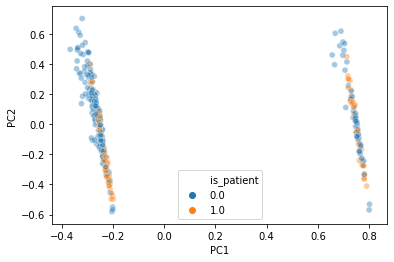

In [186]:
#PCA for Tomeklinks Under Sampled Dataset
pca_tl1 = PCA(n_components=2)
X_pca_tl1 = pca_tl1.fit_transform(X_train_tl1)
print(pca_tl1.explained_variance_ratio_.cumsum())
y_temp_tl1 = y_train_tl1
y_temp_tl1["PC1"] = X_pca_tl1[:,0]
y_temp_tl1["PC2"] = X_pca_tl1[:,1]
sns.scatterplot(data=y_temp_tl1, x="PC1", y="PC2", hue="is_patient", alpha=0.4)
print(y_temp_tl1["is_patient"].value_counts())

In [187]:
print(y_train_tl1.head())
y_train_tl1 = y_train_tl1.drop(["PC1", "PC2"], axis=1)
print(y_train_tl1.head())

     is_patient       PC1       PC2
67          0.0 -0.319569  0.185185
346         0.0  0.774251 -0.248358
341         1.0 -0.211980 -0.396700
293         1.0 -0.212516 -0.397253
90          1.0 -0.257593 -0.017164
     is_patient
67          0.0
346         0.0
341         1.0
293         1.0
90          1.0


In [102]:
print("\n----------------------------------------------------------------------\n")

#1.1 Naive Bayes On TomekLinks Under Sampled Training dataset
print("Naive Bayes on TomekLinks Under sampled Training dataset:")
clfFitPredict(GaussianNB(), X_train_tl1, X_test, y_train_tl1, y_test)

#Cross Validation on Naive Bayes on Random Under sampled Training datset
print("\nCross Validation of Naive Bayes on Random Under sampled Training dataset:")
crossValidation(GaussianNB(), X_tl1, y_tl1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Naive Bayes on TomekLinks Under sampled Training dataset:

Confusion Matrix: 
[[48 77]
 [ 3 47]]

Accuracy : 0.5428571428571428
Sensitivity : 0.384
Precision: 0.9411764705882353
Specificity : 0.94
F-Score : 0.5454545454545454

               precision    recall  f1-score   support

         0.0       0.94      0.38      0.55       125
         1.0       0.38      0.94      0.54        50

    accuracy                           0.54       175
   macro avg       0.66      0.66      0.54       175
weighted avg       0.78      0.54      0.54       175
 


Cross Validation of Naive Bayes on Random Under sampled Training dataset:
[0.61313869 0.58394161 0.59854015 0.54744526] 

0.5857664233576642

----------------------------------------------------------------------



In [103]:
print("\n----------------------------------------------------------------------\n")

#2.1 SVM Classifier On TomekLinks UnderSampled Training dataset
print("SVM Classifier on TomekLinks Undersample Training dataset:")
clfFitPredict(LinearSVC(), X_train_tl1, X_test, y_train_tl1, y_test)

#Cross Validation on SVM Classifier on TomekLinks Under sampled datset
print("\nCross Validation of SVM Classifier on TomekLinks Undersample dataset:")
crossValidation(LinearSVC(), X_tl1, y_tl1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

SVM Classifier on TomekLinks Undersample Training dataset:

Confusion Matrix: 
[[119   6]
 [ 43   7]]

Accuracy : 0.72
Sensitivity : 0.952
Precision: 0.7345679012345679
Specificity : 0.14
F-Score : 0.8292682926829268

               precision    recall  f1-score   support

         0.0       0.73      0.95      0.83       125
         1.0       0.54      0.14      0.22        50

    accuracy                           0.72       175
   macro avg       0.64      0.55      0.53       175
weighted avg       0.68      0.72      0.66       175
 


Cross Validation of SVM Classifier on TomekLinks Undersample dataset:
[0.7080292  0.70072993 0.68613139 0.72262774] 

0.7043795620437956

----------------------------------------------------------------------



In [104]:
print("\n----------------------------------------------------------------------\n")

#3 Logistic Regression Classifier On TomekLinks Undersampled Training dataset
print("Logistic Regression Classifier on TomekLinks Undersample Training dataset:")
clfFitPredict(LogisticRegression(), X_train_tl1, X_test, y_train_tl1, y_test)

#Cross Validation on Logistic Regression Classifier on TomekLinks Under Sampled Training datset
print("\nCross Validation of Logistic Regression Classifier on TomekLinks Under sample Training dataset:")
crossValidation(LogisticRegression(), X_tl1, y_tl1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Logistic Regression Classifier on TomekLinks Undersample Training dataset:

Confusion Matrix: 
[[125   0]
 [ 48   2]]

Accuracy : 0.7257142857142858
Sensitivity : 1.0
Precision: 0.7225433526011561
Specificity : 0.04
F-Score : 0.8389261744966443

               precision    recall  f1-score   support

         0.0       0.72      1.00      0.84       125
         1.0       1.00      0.04      0.08        50

    accuracy                           0.73       175
   macro avg       0.86      0.52      0.46       175
weighted avg       0.80      0.73      0.62       175
 


Cross Validation of Logistic Regression Classifier on TomekLinks Under sample Training dataset:
[0.69343066 0.67153285 0.70072993 0.69343066] 

0.6897810218978103

----------------------------------------------------------------------



In [105]:
print("\n----------------------------------------------------------------------\n")

#4.1 KNN Classifier On TomekLinks Under sample Training dataset
print("KNN Classifier on TomekLinks Undersample Training dataset:")
clfFitPredict(KNeighborsClassifier(n_neighbors = 2), X_train_tl1, X_test, y_train_tl1, y_test)

#Cross Validation on KNN Classifier on TomekLinks Under sampled Training dataset
print("\nCross Validation of KNN Classifier on TomekLinks Undersample Training dataset:")
crossValidation(KNeighborsClassifier(n_neighbors = 2), X_tl1, y_tl1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

KNN Classifier on TomekLinks Undersample Training dataset:

Confusion Matrix: 
[[109  16]
 [ 39  11]]

Accuracy : 0.6857142857142857
Sensitivity : 0.872
Precision: 0.7364864864864865
Specificity : 0.22
F-Score : 0.7985347985347986

               precision    recall  f1-score   support

         0.0       0.74      0.87      0.80       125
         1.0       0.41      0.22      0.29        50

    accuracy                           0.69       175
   macro avg       0.57      0.55      0.54       175
weighted avg       0.64      0.69      0.65       175
 


Cross Validation of KNN Classifier on TomekLinks Undersample Training dataset:
[0.69343066 0.67153285 0.72992701 0.70072993] 

0.698905109489051

----------------------------------------------------------------------



In [106]:
print("\n----------------------------------------------------------------------\n")

#5.1 Random Forest Classifier On TomekLinks Under sample Training dataset
print("Random Forest Classifier on TomekLinks Undersample dataset:")
clfFitPredict(RandomForestClassifier(max_depth=4, random_state=0), X_train_tl1, X_test, y_train_tl1, y_test)

#Cross Validation on Random Forest Classifier on TomekLinks under sampled Training dataset
print("\nCross Validation of Random Forest Classifier on TomekLinks Undersample Training dataset:")
crossValidation(RandomForestClassifier(max_depth=4, random_state=0), X_tl1, y_tl1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Random Forest Classifier on TomekLinks Undersample dataset:

Confusion Matrix: 
[[97 28]
 [27 23]]

Accuracy : 0.6857142857142857
Sensitivity : 0.776
Precision: 0.782258064516129
Specificity : 0.46
F-Score : 0.7791164658634537

               precision    recall  f1-score   support

         0.0       0.78      0.78      0.78       125
         1.0       0.45      0.46      0.46        50

    accuracy                           0.69       175
   macro avg       0.62      0.62      0.62       175
weighted avg       0.69      0.69      0.69       175
 


Cross Validation of Random Forest Classifier on TomekLinks Undersample Training dataset:
[0.68613139 0.70072993 0.74452555 0.69343066] 

0.7062043795620438

----------------------------------------------------------------------



In [107]:
print("\n----------------------------------------------------------------------\n")

#6.1 Voting Classifier for TomekLinks UnderSampled Training Dataset
print("Voting Classifier on TomekLinks Under sampled Training dataset:")
clfs = [('rf', RandomForestClassifier(max_depth=4,random_state=1)), ('lr',LogisticRegression()), ('svm',LinearSVC())]
vclf = VotingClassifier(estimators=clfs, voting='hard')
clfFitPredict(vclf, X_train_tl1, X_test, y_train_tl1, y_test)

#Cross Validation on Voting Classifier on TomekLinks UnderSampled Training datset
print("\nCross Validation of Voting Classifier on TomekLinks under sampled Training dataset:")
crossValidation(vclf, X_tl1, y_tl1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Voting Classifier on TomekLinks Under sampled Training dataset:

Confusion Matrix: 
[[121   4]
 [ 43   7]]

Accuracy : 0.7314285714285714
Sensitivity : 0.968
Precision: 0.7378048780487805
Specificity : 0.14
F-Score : 0.8373702422145328

               precision    recall  f1-score   support

         0.0       0.74      0.97      0.84       125
         1.0       0.64      0.14      0.23        50

    accuracy                           0.73       175
   macro avg       0.69      0.55      0.53       175
weighted avg       0.71      0.73      0.66       175
 


Cross Validation of Voting Classifier on TomekLinks under sampled Training dataset:
[0.70072993 0.68613139 0.7080292  0.72262774] 

0.7043795620437957

----------------------------------------------------------------------



In [108]:
print("\n----------------------------------------------------------------------\n")

#7 AdaBoostClassifier With Decision Tree Classifier as base estimator on TomekLink Undersampled Dataset

dt_tl1 = DecisionTreeClassifier(max_depth=1, random_state=1)
adb_clf_tl1 = AdaBoostClassifier(base_estimator=dt_tl1, n_estimators=100, learning_rate=0.025)
print("\nAdaBoostClassifier with Decision Tree as base estimator on TomekLink Undersampled Dataset:")
clfFitPredict(adb_clf_tl1, X_train_tl1, X_test, y_train_tl1, y_test)

#Cross Validation on AdaBoost Classifier on TomekLink Undersampled Dataset
print("\nCross Validation of AdaBoost Classifier on TomekLink Undersampled dataset:")
crossValidation(adb_clf_tl1, X_tl1, y_tl1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


AdaBoostClassifier with Decision Tree as base estimator on TomekLink Undersampled Dataset:

Confusion Matrix: 
[[118   7]
 [ 39  11]]

Accuracy : 0.7371428571428571
Sensitivity : 0.944
Precision: 0.7515923566878981
Specificity : 0.22
F-Score : 0.8368794326241135

               precision    recall  f1-score   support

         0.0       0.75      0.94      0.84       125
         1.0       0.61      0.22      0.32        50

    accuracy                           0.74       175
   macro avg       0.68      0.58      0.58       175
weighted avg       0.71      0.74      0.69       175
 


Cross Validation of AdaBoost Classifier on TomekLink Undersampled dataset:
[0.69343066 0.7080292  0.70072993 0.69343066] 

0.6989051094890512

----------------------------------------------------------------------



In [109]:
#8 AdaBoostClassifier With SVC as base estimator 

svc_adb_tl1 = SVC(probability=True, kernel='linear')
adb_clf_svc_tl1 = AdaBoostClassifier(base_estimator=svc_adb_tl1, n_estimators=100, learning_rate=0.025)
print("\nAdaBoostClassifier with SVC as base estimator on TomekLink Undersampled Dataset:")
clfFitPredict(adb_clf_svc_tl1, X_train_tl1, X_test, y_train_tl1, y_test)

#Cross Validation on AdaBoostClassifier on TomekLink Undersampled dataset
print("\nCross Validation of AdaBoostClassifier with SVM as base estimator on TomekLink Undersampled dataset:")
crossValidation(adb_clf_svc_tl1, X_tl1, y_tl1, 4)


AdaBoostClassifier with SVC as base estimator on TomekLink Undersampled Dataset:

Confusion Matrix: 
[[125   0]
 [ 50   0]]

Accuracy : 0.7142857142857143
Sensitivity : 1.0
Precision: 0.7142857142857143
Specificity : 0.0
F-Score : 0.8333333333333333

               precision    recall  f1-score   support

         0.0       0.71      1.00      0.83       125
         1.0       0.00      0.00      0.00        50

    accuracy                           0.71       175
   macro avg       0.36      0.50      0.42       175
weighted avg       0.51      0.71      0.60       175
 


Cross Validation of AdaBoostClassifier with SVM as base estimator on TomekLink Undersampled dataset:


/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.70072993 0.69343066 0.69343066 0.69343066] 

0.6952554744525549


In [110]:
print("\n----------------------------------------------------------------------\n")

#9 GradientBoostingClassifier On TomekLink Undersampled Dataset

gbc_tl1 = GradientBoostingClassifier(max_depth=1, subsample=0.8, max_features=0.2, n_estimators=300, random_state=0)
print("\nGradientBoostingClassifier on the TomekLink Undersampled dataset:")
clfFitPredict(gbc_tl1, X_train_tl1, X_test, y_train_tl1, y_test)

#Cross Validation on GradientBoostingClassifier on TomekLink Undersampled datset
print("\nCross Validation of GradientBoostingClassifier on TomekLink Undersampled dataset:")
crossValidation(gbc_tl1, X_tl1, y_tl1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


GradientBoostingClassifier on the TomekLink Undersampled dataset:

Confusion Matrix: 
[[100  25]
 [ 27  23]]

Accuracy : 0.7028571428571428
Sensitivity : 0.8
Precision: 0.7874015748031497
Specificity : 0.46
F-Score : 0.7936507936507937

               precision    recall  f1-score   support

         0.0       0.79      0.80      0.79       125
         1.0       0.48      0.46      0.47        50

    accuracy                           0.70       175
   macro avg       0.63      0.63      0.63       175
weighted avg       0.70      0.70      0.70       175
 


Cross Validation of GradientBoostingClassifier on TomekLink Undersampled dataset:
[0.69343066 0.68613139 0.71532847 0.73722628] 

0.7080291970802919

----------------------------------------------------------------------



In [111]:
print("\n----------------------------------------------------------------------\n")

#10 XGBClassifier on the TomekLink Undersampled Dataset

xgb_clf_tl1 = XGBClassifier(objective='binary:logistic', booster='gblinear', n_estimators=10, seed=1)
print("\nXGBClassifier on the TomekLink Undersampled dataset:")
clfFitPredict(xgb_clf_tl1, X_train_tl1, X_test, y_train_tl1, y_test)

#Cross Validation on XGBClassifier on TomekLink Undersampled dataset
print("\nCross Validation of XGBClassifier on TomekLink Undersampled dataset:")
crossValidation(xgb_clf_tl1, X_tl1, y_tl1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


XGBClassifier on the TomekLink Undersampled dataset:

Confusion Matrix: 
[[125   0]
 [ 50   0]]

Accuracy : 0.7142857142857143
Sensitivity : 1.0
Precision: 0.7142857142857143
Specificity : 0.0
F-Score : 0.8333333333333333

               precision    recall  f1-score   support

         0.0       0.71      1.00      0.83       125
         1.0       0.00      0.00      0.00        50

    accuracy                           0.71       175
   macro avg       0.36      0.50      0.42       175
weighted avg       0.51      0.71      0.60       175
 


Cross Validation of XGBClassifier on TomekLink Undersampled dataset:
[0.70072993 0.69343066 0.69343066 0.69343066] 

0.6952554744525549

----------------------------------------------------------------------



/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [188]:
#Classification With TomekLinks Under sampled PCA Training dataset

pca_tl_1 = PCA()
X_pca_tl_1 = pca_tl_1.fit_transform(X_train_tl1)
print(pca_tl_1.explained_variance_ratio_.cumsum())

pca_tl1 = PCA(n_components=6)
X_pca_train_tl1 = pd.DataFrame(pca_tl1.fit_transform(X_train_tl1))
X_pca_test_tl1 = pd.DataFrame(pca_tl1.transform(X_test))

X_pca_tl1 = pd.concat([X_pca_train_tl1, X_pca_test_tl1], axis=0)


[0.51565892 0.68697132 0.80299322 0.88726991 0.93085351 0.96453576
 0.99350083 0.99716251 0.99908119 1.        ]


In [112]:
print("\n----------------------------------------------------------------------\n")

#1 Naive Bayes On TomekLinks Under sampled PCA Training dataset
print("Naive Bayes on TomekLinks Under sampled PCA Training dataset:")
clfFitPredict(GaussianNB(), X_pca_train_tl1, X_pca_test_tl1, y_train_tl1, y_test)

#Cross Validation on Naive Bayes on TomekLinks Under sampled PCA Training dataset
print("\nCross Validation of Naive Bayes on TomekLinks Under sampled PCA Training dataset:")
crossValidation(GaussianNB(), X_pca_tl1, y_tl1, 4)

print("\n----------------------------------------------------------------------\n")

#2.1 SVM Classifier On TomekLinks Under sampled PCA Training dataset
print("SVM Classifier on TomekLinks Under sampled PCA Training dataset:")
clfFitPredict(LinearSVC(), X_pca_train_tl1, X_pca_test_tl1, y_train_tl1, y_test)

#Cross Validation on SVM Classifier on TomekLinks Under sampled PCA Training dataset
print("\nCross Validation of SVM Classifier on TomekLinks Under sampled PCA Training dataset:")
crossValidation(LinearSVC(), X_pca_tl1, y_tl1, 4)

print("\n----------------------------------------------------------------------\n")

#3.1 Logistic Regression Classifier On TomekLinks Under sampled PCA Training dataset
print("Logistic Regression Classifier on TomekLinks Under sampled PCA Training dataset:")
clfFitPredict(LogisticRegression(), X_pca_train_tl1, X_pca_test_tl1, y_train_tl1, y_test)

#Cross Validation on Logistic Regression Classifier on TomekLinks Under sampled PCA Training dataset
print("\nCross Validation of Logistic Regression Classifier on TomekLinks Under sampled PCA Training dataset:")
crossValidation(LogisticRegression(), X_pca_tl1, y_tl1, 4)

print("\n----------------------------------------------------------------------\n")

#4.1 KNN Classifier On TomekLinks Under sampled PCA Training dataset
print("KNN Classifier on TomekLinks Under sampled PCA Training dataset:")
clfFitPredict(KNeighborsClassifier(n_neighbors = 2), X_pca_train_tl1, X_pca_test_tl1, y_train_tl1, y_test)

#Cross Validation on KNN Classifier on TomekLinks Under sampled PCA Training dataset
print("\nCross Validation of KNN Classifier on TomekLinks Under sampled PCA Training dataset:")
crossValidation(KNeighborsClassifier(n_neighbors = 2), X_pca_tl1, y_tl1, 4)

print("\n----------------------------------------------------------------------\n")

#5.1 Random Forest Classifier On TomekLinks Under sampled PCA Training dataset
print("Random Forest Classifier on TomekLinks Under sampled PCA Training dataset:")
clfFitPredict(RandomForestClassifier(max_depth=4, random_state=0), X_pca_train_tl1, X_pca_test_tl1, y_train_tl1, y_test)

#Cross Validation on Random Forest Classifier on TomekLinks Under sampled PCA Training dataset
print("\nCross Validation of Random Forest Classifier on TomekLinks Under sampled PCA Training dataset:")
crossValidation(RandomForestClassifier(max_depth=4, random_state=0), X_pca_tl1, y_tl1, 4)

print("\n----------------------------------------------------------------------\n")

#6 Voting Classifier for TomekLinks Under sampled PCA Training dataset
print("Voting Classifier on TomekLinks Under sampled PCA Training dataset:")
clfFitPredict(vclf, X_pca_train_tl1, X_pca_test_tl1, y_train_tl1, y_test)

#Cross Validation on Voting Classifier on TomekLinks Under sampled PCA Training dataset
print("\nCross Validation of Voting Classifier on TomekLinks Under sampled PCA Training dataset:")
crossValidation(vclf, X_pca_tl1, y_tl1, 4)

print("\n----------------------------------------------------------------------\n")

#7 AdaBoostClassifier With Decision Tree Classifier as base estimator on TomekLink Undersampled PCA Training Dataset

print("\nAdaBoostClassifier with Decision Tree as base estimator on TomekLink Undersampled PCA Training Dataset:")
clfFitPredict(adb_clf_tl1, X_pca_train_tl1, X_pca_test_tl1, y_train_tl1, y_test)

#Cross Validation on AdaBoost Classifier on TomekLink Undersampled PCA Training Dataset
print("\nCross Validation of AdaBoost Classifier on TomekLink Undersampled PCA Training dataset:")
crossValidation(adb_clf_tl1, X_pca_tl1, y_tl1, 4)

print("\n----------------------------------------------------------------------\n")

#8 AdaBoostClassifier With SVC as base estimator 

print("\nAdaBoostClassifier with SVC as base estimator on TomekLink Undersampled PCA Training Dataset:")
clfFitPredict(adb_clf_svc_tl1, X_pca_train_tl1, X_pca_test_tl1, y_train_tl1, y_test)

#Cross Validation on AdaBoostClassifier on TomekLink Undersampled PCA Training dataset
print("\nCross Validation of AdaBoostClassifier with SVM as base estimator on TomekLink Undersampled PCA Training dataset:")
crossValidation(adb_clf_svc_tl1, X_pca_tl1, y_tl1, 4)

print("\n----------------------------------------------------------------------\n")

#9 GradientBoostingClassifier On TomekLink Undersampled PCA Training Dataset

print("\nGradientBoostingClassifier on the TomekLink Undersampled PCA Training dataset:")
clfFitPredict(gbc_tl1, X_pca_train_tl1, X_pca_test_tl1, y_train_tl1, y_test)

#Cross Validation on GradientBoostingClassifier on TomekLink Undersampled PCA Training dataset
print("\nCross Validation of GradientBoostingClassifier on TomekLink Undersampled PCA Training dataset:")
crossValidation(gbc_tl1, X_pca_tl1, y_tl1, 4)

print("\n----------------------------------------------------------------------\n")

#10 XGBClassifier on the TomekLink Undersampled PCA Training Dataset

print("\nXGBClassifier on the TomekLink Undersampled PCA Training dataset:")
clfFitPredict(xgb_clf_tl1, X_pca_train_tl1, X_pca_test_tl1, y_train_tl1, y_test)

#Cross Validation on XGBClassifier on TomekLink Undersampled PCA Training dataset
print("\nCross Validation of XGBClassifier on TomekLink Undersampled PCA Training dataset:")
crossValidation(xgb_clf_tl1, X_pca_tl1, y_tl1, 4)

print("\n----------------------------------------------------------------------\n")

[0.51565892 0.68697132 0.80299322 0.88726991 0.93085351 0.96453576
 0.99350083 0.99716251 0.99908119 1.        ]

----------------------------------------------------------------------

Naive Bayes on TomekLinks Under sampled PCA Training dataset:

Confusion Matrix: 
[[74 51]
 [16 34]]

Accuracy : 0.6171428571428571
Sensitivity : 0.592
Precision: 0.8222222222222222
Specificity : 0.68
F-Score : 0.6883720930232559

               precision    recall  f1-score   support

         0.0       0.82      0.59      0.69       125
         1.0       0.40      0.68      0.50        50

    accuracy                           0.62       175
   macro avg       0.61      0.64      0.60       175
weighted avg       0.70      0.62      0.64       175
 


Cross Validation of Naive Bayes on TomekLinks Under sampled PCA Training dataset:
[0.60583942 0.59124088 0.64233577 0.61313869] 

0.6131386861313869

----------------------------------------------------------------------

SVM Classifier on TomekLinks U

/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.69343066 0.70072993 0.69343066 0.69343066] 

0.6952554744525549

----------------------------------------------------------------------


AdaBoostClassifier with SVC as base estimator on TomekLink Undersampled PCA Training Dataset:

Confusion Matrix: 
[[125   0]
 [ 50   0]]

Accuracy : 0.7142857142857143
Sensitivity : 1.0
Precision: 0.7142857142857143
Specificity : 0.0
F-Score : 0.8333333333333333

               precision    recall  f1-score   support

         0.0       0.71      1.00      0.83       125
         1.0       0.00      0.00      0.00        50

    accuracy                           0.71       175
   macro avg       0.36      0.50      0.42       175
weighted avg       0.51      0.71      0.60       175
 


Cross Validation of AdaBoostClassifier with SVM as base estimator on TomekLink Undersampled PCA Training dataset:


/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.70072993 0.69343066 0.69343066 0.69343066] 

0.6952554744525549

----------------------------------------------------------------------


GradientBoostingClassifier on the TomekLink Undersampled PCA Training dataset:

Confusion Matrix: 
[[97 28]
 [35 15]]

Accuracy : 0.64
Sensitivity : 0.776
Precision: 0.7348484848484849
Specificity : 0.3
F-Score : 0.754863813229572

               precision    recall  f1-score   support

         0.0       0.73      0.78      0.75       125
         1.0       0.35      0.30      0.32        50

    accuracy                           0.64       175
   macro avg       0.54      0.54      0.54       175
weighted avg       0.62      0.64      0.63       175
 


Cross Validation of GradientBoostingClassifier on TomekLink Undersampled PCA Training dataset:
[0.72262774 0.67883212 0.72262774 0.64233577] 

0.6916058394160585

----------------------------------------------------------------------


XGBClassifier on the TomekLink Undersampled PCA Training dat

/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Hyperparameter Tuning for SVC on TomekLinks UnderSampled Dataset


random_svc_tus = RandomizedSearchCV(estimator = SVC(random_state=0), 
                            param_distributions = param_grid_svc, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )
random_svc_tus.fit(X_train_tl1, y_train_tl1.values.ravel())
joblib.dump(random_svc_tus, "RSCV_SVC_tus.pkl")

print("\nRandomizedSearchCV for SVC with TomekLinks UnderSampled Dataset")
RSCV_SVC_tus_loaded  = joblib.load("RSCV_SVC_tus.pkl")
print("\nBest Parameters :", RSCV_SVC_tus_loaded.best_params_) 
print("\nBest Score :", RSCV_SVC_tus_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_SVC_tus_loaded.predict(X_test)))


random_svc_tus_pca = RandomizedSearchCV(estimator = SVC(random_state=0), 
                            param_distributions = param_grid_svc, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )
random_svc_tus_pca.fit(X_pca_train_tl1, y_train_tl1.values.ravel())
joblib.dump(random_svc_tus_pca, "RSCV_SVC_tus_pca.pkl")

print("\nRandomizedSearchCV for SVC with TomekLinks UnderSampled PCA Dataset")
RSCV_SVC_tus_pca_loaded  = joblib.load("RSCV_SVC_tus_pca.pkl")
print("\nBest Parameters :", RSCV_SVC_tus_pca_loaded.best_params_) 
print("\nBest Score :", RSCV_SVC_tus_pca_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_SVC_tus_pca_loaded.predict(X_pca_test_tl1)))


#Hyperparameter Tuning for Logistic Regression On TomekLinks Dataset

random_logreg_tus = RandomizedSearchCV(estimator=LogisticRegression(), 
                            param_distributions = param_grid_logreg, 
                            cv=10,scoring='accuracy',refit=True,verbose=1,
                            n_jobs=-1,n_iter=100,random_state=0
                           )

random_logreg_tus.fit(X_train_tl1, y_train_tl1.values.ravel())
joblib.dump(random_logreg_tus, "RSCV_LR_tus.pkl")

print("\nRandomizedSearchCV for LR with RandomOverSampled Dataset")
RSCV_LR_tus_loaded  = joblib.load("RSCV_LR_tus.pkl")
print("\nBest Parameters :",RSCV_LR_tus_loaded.best_params_) 
print("\nBest Score :", RSCV_LR_tus_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_LR_tus_loaded.predict(X_test)))


random_logreg_pca_tus = RandomizedSearchCV(estimator = LogisticRegression(), 
                            param_distributions = param_grid_logreg, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )

random_logreg_pca_tus.fit(X_pca_train_tl1, y_train_tl1.values.ravel())
joblib.dump(random_logreg_pca_tus, "RSCV_LR_pca_tus.pkl")

print("\nRandomizedSearchCV for LR with TomekLink UnderSampled PCA Dataset")
RSCV_LR_pca_tus_loaded  = joblib.load("RSCV_LR_pca_tus.pkl")
print("\nBest Parameters :", RSCV_LR_pca_tus_loaded.best_params_) 
print("\nBest Score :", RSCV_LR_pca_tus_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_LR_pca_tus_loaded.predict(X_pca_test_tl1)))


#Hyperparameter Tuning for RandomForest On TomekLink UnderSampled Dataset

random_rf_tus = RandomizedSearchCV(estimator=RandomForestClassifier(random_state = 1),
                               param_distributions=param_grid_rf, 
                               verbose=False,cv=10,scoring='accuracy', 
                               refit=True,n_jobs=-1,random_state=0
                              )
random_rf_tus.fit(X_train_tl1, y_train_tl1.values.ravel())
joblib.dump(random_rf_tus, "RSCV_RF_tus.pkl")

print("\nRandomizedSearchCV for RF with RandomOverSampled Dataset")
RSCV_RF_tus_loaded  = joblib.load("RSCV_RF_tus.pkl")
print("\nBest Parameter :", RSCV_RF_tus_loaded .best_params_)
print("\nBest Score :", RSCV_RF_tus_loaded .best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_RF_tus_loaded.predict(X_test)))


random_rf_pca_tus = RandomizedSearchCV(estimator = RandomForestClassifier(random_state = 1), 
                            param_distributions = param_grid_rf,refit=True,verbose=True,
                            scoring='accuracy',cv=10,n_jobs=-1,random_state = 0
                           )
random_rf_pca_tus.fit(X_pca_train_tl1, y_train_tl1.values.ravel())
joblib.dump(random_rf_pca_tus, "RSCV_RF_pca_tus.pkl")

print("\nRandomizedSearchCV for RF on TomekLink UnderSampled PCA Dataset")
RSCV_RF_pca_tus_loaded  = joblib.load("RSCV_RF_pca_tus.pkl")
print("\nBest Parameter :", RSCV_RF_pca_tus_loaded.best_params_)
print("\nBest Score :", RSCV_RF_pca_tus_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_RF_pca_tus_loaded.predict(X_pca_test_tl1)))


#Hyperparameter Tuning for GradientBoostingClassifier On TUS Dataset

clf_gbc_tus = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                             param_distributions=param_grid_gbc,cv=10,scoring='accuracy',
                             refit=True, n_jobs=-1,verbose=False,random_state=0
                            )
clf_gbc_tus.fit(X_train_tl1, y_train_tl1.values.ravel())
joblib.dump(clf_gbc_tus,'RSCV_GBC_tus.pkl')

print("\nRandomizedSearchCV for GBC with TomekLinks UnderSampled Dataset")
RSCV_GBC_tus_loaded  = joblib.load("RSCV_GBC_tus.pkl")
print("\nBest Score :", RSCV_GBC_tus_loaded.best_score_)
print("\nBest Parameters :", RSCV_GBC_tus_loaded.best_params_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_GBC_tus_loaded.predict(X_test)))

clf_gbc_pca_tus = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                             param_distributions=param_grid_gbc,cv=10,scoring='accuracy',
                             refit=True, n_jobs=-1,verbose=False,random_state=0
                            )
clf_gbc_pca_tus.fit(X_pca_train_tl1, y_train_tl1.values.ravel())
joblib.dump(clf_gbc_pca_tus,'RSCV_GBC_pca_tus.pkl')

print("\nRandomizedSearchCV for GBC with TomekLinks UnderSampled PCA Dataset")
RSCV_GBC_pca_tus_loaded  = joblib.load("RSCV_GBC_pca_tus.pkl")
print("\nBest Score :",RSCV_GBC_pca_tus_loaded.best_score_)
print("\nBest Parameters :", RSCV_GBC_pca_tus_loaded.best_params_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_GBC_pca_tus_loaded.predict(X_pca_test_tl1)))


#Hyperparameter for AdaBoost Classifier On TUS Dataset
                
dTC = DecisionTreeClassifier(max_depth=4,max_features='sqrt',min_samples_leaf=0.5,min_samples_split=0.1)
ada_classifier = AdaBoostClassifier(base_estimator=dTC, random_state=0)

random_adaboost_tus = RandomizedSearchCV(estimator=ada_classifier, param_distributions=param_grid_adc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
random_adaboost_tus.fit(X_train_tl1, y_train_tl1.values.ravel())
joblib.dump(random_adaboost_tus, "RSCV_ADC_tus.pkl")

print("\nRandomizedSearchCV for ADC with TomekLinks UnderSampled PCA Dataset")
RSCV_ADC_tus_loaded  = joblib.load("RSCV_ADC_tus.pkl")
print("\nBest Score -", RSCV_ADC_tus_loaded.best_score_)
print("\nBest Parameters -",RSCV_ADC_tus_loaded.best_params_)
print("\n Accuracy Score -", accuracy_score(y_test, RSCV_ADC_tus_loaded.predict(X_test)))


#Hyperparameter Tuning For AdaBoostClassifier on PCA TUS Dataset
                
dTC = DecisionTreeClassifier(max_depth=4,max_features='sqrt',min_samples_leaf=0.5,min_samples_split=0.1)
ada_classifier = AdaBoostClassifier(base_estimator=dTC, random_state=0)

random_adaboost_tus_pca = RandomizedSearchCV(estimator=ada_classifier, param_distributions=param_grid_adc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
random_adaboost_tus_pca.fit(X_pca_train_tl1, y_train_tl1.values.ravel())
joblib.dump(random_adaboost_tus_pca, "RSCV_ADC_ros_pca.pkl")

print("\nRandomizedSearchCV for SVC with TomekLinks UnderSampled PCA Dataset")
RSCV_ADC_tus_pca_loaded  = joblib.load("RSCV_ADC_tus_pca.pkl")
print("\nBest Score -", RSCV_ADC_tus_pca_loaded.best_score_)
print("\nBest Parameters -", RSCV_ADC_tus_pca_loaded.best_params_)
print("\n Accuracy Score -", accuracy_score(y_test, RSCV_ADC_tus_pca_loaded.predict(X_pca_test_tl1)))

#Hyperparameter Tuning For AdaBoostClassifier with SVC as base estimator 

svc = SVC(kernel='sigmoid', gamma=0.001, C=1)
ada_classifier_svc = AdaBoostClassifier(base_estimator=svc, random_state=0)

random_adaboost_svc_tus = RandomizedSearchCV(estimator=ada_classifier_svc, param_distributions=param_grid_adc_svc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
random_adaboost_svc_tus.fit(X_train_tl1, y_train_tl1.values.ravel())
joblib.dump(random_adaboost_svc_tus, "RSCV_ADC_svc_tus.pkl")

print("\nRandomizedSearchCV for ADC with SVC on TomekLinks UnderSampled Dataset")
RSCV_ADC_svc_tus_loaded  = joblib.load("RSCV_ADC_svc_tus.pkl")
print("\nBest Score :", RSCV_ADC_svc_tus_loaded.best_params_)
print("\nBest Parameter :",RSCV_ADC_svc_tus_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_ADC_svc_tus_loaded.predict(X_test)))

#X_pca_train_tl1, X_pca_test_tl1, y_train_tl1, y_test
#X_train_tl1, X_test, y_train_tl1, y_test

svc  = SVC(kernel='sigmoid', gamma=0.001, C=1)
ada_classifier_svc = AdaBoostClassifier(base_estimator=svc, random_state=0)
random_adaboost_svc_pca_tus = RandomizedSearchCV(estimator=ada_classifier_svc, param_distributions=param_grid_adc_svc,
                                            random_state=0, cv=10, scoring='accuracy',
                                            refit=True, n_jobs=-1, verbose=False)
random_adaboost_svc_pca_tus.fit(X_pca_train_tl1, y_train_tl1.values.ravel())
joblib.dump(random_adaboost_svc_pca_tus, "RSCV_ADC_svc_pca_tus.pkl")

print("\nRandomizedSearchCV for SVC with TomekLinks UnderSampled PCA Dataset")
RSCV_ADC_svc_pca_tus_loaded  = joblib.load("RSCV_ADC_svc_pca_tus.pkl")
print("\nBest Score :", RSCV_ADC_svc_pca_tus_loaded.best_params_)
print("\nBest Parameter :", RSCV_ADC_svc_pca_tus_loaded.best_score_)
print("\nAccuracy Score :", accuracy_score(y_test, RSCV_ADC_svc_pca_tus_loaded.predict(X_pca_test_tl1)))


In [113]:
print("\n----------------------------------------------------------------------\n")

#ClusterCentroidsUnderSampling For Training Dataset
cc1 = ClusterCentroids(random_state=42, sampling_strategy = 'majority')
X_train_cc1, y_train_cc1 = cc1.fit_resample(X_train, y_train.values.ravel())
print("Original Distribution of Training Dataset \n")
print(y_train["is_patient"].value_counts())
print("\nTraining Dataset Distribution After ClusterCentroid Under Sampling\n")
print(pd.Series(y_train_cc1).value_counts())
X_train_cc1 = pd.DataFrame(X_train_cc1)
y_train_cc1 = pd.DataFrame(y_train_cc1)
y_train_cc1 = y_train_cc1.rename(columns={0:"is_patient"})


X_temp_cc1 = pd.concat([X_train_cc1, y_train_cc1], axis=1)
#shuffling the training dataset
X_temp_cc1 = X_temp_cc1.sample(frac=1, random_state=1)
X_train_cc1  = X_temp_cc1.drop(["is_patient"], axis=1)
y_train_cc1  = X_temp_cc1[["is_patient"]]

X_cc1 = pd.concat([X_train_cc1, X_test])
y_cc1 = pd.concat([y_train_cc1, y_test])

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Original Distribution of Training Dataset 

0.0    291
1.0    117
Name: is_patient, dtype: int64

Training Dataset Distribution After ClusterCentroid Under Sampling

1.0    117
0.0    117
dtype: int64

----------------------------------------------------------------------



[0.48968788 0.66782164]
0.0    117
1.0    117
Name: is_patient, dtype: int64


/home/srix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/srix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


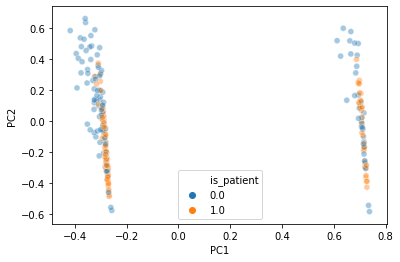

In [114]:
#PCA for ClusterCentroid Under Sampled Dataset
pca_cc1 = PCA(n_components=2)
X_pca_cc1 = pca_cc1.fit_transform(X_train_cc1)
print(pca_cc1.explained_variance_ratio_.cumsum())
y_temp_cc1 = y_train_cc1
y_temp_cc1["PC1"] = X_pca_cc1[:,0]
y_temp_cc1["PC2"] = X_pca_cc1[:,1]
sns.scatterplot(data=y_temp_cc1, x="PC1", y="PC2", hue="is_patient", alpha=0.4)
print(y_temp_cc1["is_patient"].value_counts())

In [115]:
print(y_train_cc1.head())
y_train_cc1 = y_train_cc1.drop(["PC1", "PC2"], axis=1)
print(y_train_cc1.head())

     is_patient       PC1       PC2
199         1.0  0.695138  0.242472
69          0.0 -0.322454  0.141662
233         1.0  0.714739 -0.190198
39          0.0 -0.319147 -0.101768
138         1.0 -0.287339  0.004185
     is_patient
199         1.0
69          0.0
233         1.0
39          0.0
138         1.0


In [116]:
print("\n----------------------------------------------------------------------\n")

#1 Naive Bayes On Cluster Centroid Under sampled Training dataset
print("Naive Bayes on Cluster Centroid Under sampled Training dataset:")
clfFitPredict(GaussianNB(), X_train_cc1, X_test, y_train_cc1, y_test)

#Cross Validation on Naive Bayes on Cluster Centroid Under sampled Training datset
print("\nCross Validation of Naive Bayes on Cluster Centroid Under sampled Training dataset:")
crossValidation(GaussianNB(), X_cc1, y_cc1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Naive Bayes on Cluster Centroid Under sampled Training dataset:

Confusion Matrix: 
[[44 81]
 [ 3 47]]

Accuracy : 0.52
Sensitivity : 0.352
Precision: 0.9361702127659575
Specificity : 0.94
F-Score : 0.5116279069767442

               precision    recall  f1-score   support

         0.0       0.94      0.35      0.51       125
         1.0       0.37      0.94      0.53        50

    accuracy                           0.52       175
   macro avg       0.65      0.65      0.52       175
weighted avg       0.77      0.52      0.52       175
 


Cross Validation of Naive Bayes on Cluster Centroid Under sampled Training dataset:
[0.72815534 0.65686275 0.59803922 0.60784314] 

0.6477251094612603

----------------------------------------------------------------------



In [117]:
print("\n----------------------------------------------------------------------\n")

#2.1 SVM Classifier On Cluster Centroids UnderSampled Training dataset
print("SVM Classifier on Cluster Centroids Undersample Training dataset:")
clfFitPredict(LinearSVC(), X_train_cc1, X_test, y_train_cc1, y_test)

#Cross Validation on SVM Classifier on Cluster Centroids Under sampled Training datset
print("\nCross Validation of SVM Classifier on Cluster Centroids Undersample Training dataset:")
crossValidation(LinearSVC(), X_cc1, y_cc1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

SVM Classifier on Cluster Centroids Undersample Training dataset:

Confusion Matrix: 
[[54 71]
 [ 3 47]]

Accuracy : 0.5771428571428572
Sensitivity : 0.432
Precision: 0.9473684210526315
Specificity : 0.94
F-Score : 0.5934065934065934

               precision    recall  f1-score   support

         0.0       0.95      0.43      0.59       125
         1.0       0.40      0.94      0.56        50

    accuracy                           0.58       175
   macro avg       0.67      0.69      0.58       175
weighted avg       0.79      0.58      0.58       175
 


Cross Validation of SVM Classifier on Cluster Centroids Undersample Training dataset:
[0.73786408 0.70588235 0.66666667 0.64705882] 

0.6893679802017895

----------------------------------------------------------------------



In [118]:
print("\n----------------------------------------------------------------------\n")

#3.1 Logistic Regression Classifier On Cluster Centroids Undersampled Training dataset
print("Logistic Regression Classifier on Cluster Centroids Undersample Training dataset:")
clfFitPredict(LogisticRegression(), X_train_cc1, X_test, y_train_cc1, y_test)

#Cross Validation on Logistic Regression Classifier on Cluster Centroids Undersampled Training datset
print("\nCross Validation of Logistic Regression Classifier on Cluster Centroids Undersample Training dataset:")
crossValidation(LogisticRegression(), X_cc1, y_cc1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Logistic Regression Classifier on Cluster Centroids Undersample Training dataset:

Confusion Matrix: 
[[52 73]
 [ 5 45]]

Accuracy : 0.5542857142857143
Sensitivity : 0.416
Precision: 0.9122807017543859
Specificity : 0.9
F-Score : 0.5714285714285714

               precision    recall  f1-score   support

         0.0       0.91      0.42      0.57       125
         1.0       0.38      0.90      0.54        50

    accuracy                           0.55       175
   macro avg       0.65      0.66      0.55       175
weighted avg       0.76      0.55      0.56       175
 


Cross Validation of Logistic Regression Classifier on Cluster Centroids Undersample Training dataset:
[0.72815534 0.68627451 0.6372549  0.67647059] 

0.6820388349514563

----------------------------------------------------------------------



In [119]:
print("\n----------------------------------------------------------------------\n")

#4.1 KNN Classifier On Cluster Centroids Undersample Training dataset
print("KNN Classifier on Cluster Centroids Undersample Training dataset:")
clfFitPredict(KNeighborsClassifier(n_neighbors = 2), X_train_cc1, X_test, y_train_cc1, y_test)

#Cross Validation on KNN Classifier on Cluster Centroids Undersampled Training dataset
print("\nCross Validation of KNN Classifier on Cluster Centroids Undersample Training dataset:")
crossValidation(KNeighborsClassifier(n_neighbors = 2), X_cc1, y_cc1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

KNN Classifier on Cluster Centroids Undersample Training dataset:

Confusion Matrix: 
[[89 36]
 [32 18]]

Accuracy : 0.6114285714285714
Sensitivity : 0.712
Precision: 0.7355371900826446
Specificity : 0.36
F-Score : 0.7235772357723577

               precision    recall  f1-score   support

         0.0       0.74      0.71      0.72       125
         1.0       0.33      0.36      0.35        50

    accuracy                           0.61       175
   macro avg       0.53      0.54      0.53       175
weighted avg       0.62      0.61      0.62       175
 


Cross Validation of KNN Classifier on Cluster Centroids Undersample Training dataset:
[0.61165049 0.55882353 0.65686275 0.60784314] 

0.6087949743003997

----------------------------------------------------------------------



In [120]:
print("\n----------------------------------------------------------------------\n")

#5.1 Random Forest Classifier On Cluster Centroids UnderSampled Training dataset
print("Random Forest Classifier on Cluster Centroids Undersample Training dataset:")
clfFitPredict(RandomForestClassifier(max_depth=4, random_state=0), X_train_cc1, X_test, y_train_cc1, y_test)

#Cross Validation on Random Forest Classifier on Cluster Centroids under sampled Training datset
print("\nCross Validation of Random Forest Classifier on Cluster Centroids Undersample Training dataset:")
crossValidation(RandomForestClassifier(max_depth=4, random_state=0), X_cc1, y_cc1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Random Forest Classifier on Cluster Centroids Undersample Training dataset:

Confusion Matrix: 
[[70 55]
 [10 40]]

Accuracy : 0.6285714285714286
Sensitivity : 0.56
Precision: 0.875
Specificity : 0.8
F-Score : 0.6829268292682927

               precision    recall  f1-score   support

         0.0       0.88      0.56      0.68       125
         1.0       0.42      0.80      0.55        50

    accuracy                           0.63       175
   macro avg       0.65      0.68      0.62       175
weighted avg       0.75      0.63      0.65       175
 


Cross Validation of Random Forest Classifier on Cluster Centroids Undersample Training dataset:
[0.82524272 0.73529412 0.65686275 0.58823529] 

0.7014087188273368

----------------------------------------------------------------------



In [121]:
print("\n----------------------------------------------------------------------\n")

#6 Voting Classifier for Cluster Centroids UnderSampled Training Dataset
print("Voting Classifier on Cluster Centroids Under sampled Training dataset:")
clfs = [('rf', RandomForestClassifier(max_depth=4,random_state=1)), ('lr',LogisticRegression()), ('svm',LinearSVC()), 
       ('nb',GaussianNB())]
vclf = VotingClassifier(estimators=clfs, voting='hard')
clfFitPredict(vclf, X_train_cc1, X_test, y_train_cc1, y_test)

#Cross Validation on Voting Classifier on Cluster Centroids UnderSampled Training datset
print("\nCross Validation of Voting Classifier on Cluster Centroids under sampled Training dataset:")
crossValidation(vclf, X_cc1, y_cc1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Voting Classifier on Cluster Centroids Under sampled Training dataset:

Confusion Matrix: 
[[57 68]
 [ 5 45]]

Accuracy : 0.5828571428571429
Sensitivity : 0.456
Precision: 0.9193548387096774
Specificity : 0.9
F-Score : 0.6096256684491979

               precision    recall  f1-score   support

         0.0       0.92      0.46      0.61       125
         1.0       0.40      0.90      0.55        50

    accuracy                           0.58       175
   macro avg       0.66      0.68      0.58       175
weighted avg       0.77      0.58      0.59       175
 


Cross Validation of Voting Classifier on Cluster Centroids under sampled Training dataset:
[0.74757282 0.7254902  0.67647059 0.62745098] 

0.6942461450599657

----------------------------------------------------------------------



In [122]:
print("\n----------------------------------------------------------------------\n")

#7 AdaBoostClassifier With Decision Tree Classifier as base estimator on Cluster Centroids Undersampled Dataset

dt_cc1 = DecisionTreeClassifier(max_depth=1, random_state=1)
adb_clf_cc1 = AdaBoostClassifier(base_estimator=dt_cc1, n_estimators=100, learning_rate=0.025)
print("\nAdaBoostClassifier with Decision Tree as base estimator on Cluster Centroids Undersampled Dataset:")
clfFitPredict(adb_clf_cc1, X_train_cc1, X_test, y_train_cc1, y_test)

#Cross Validation on AdaBoost Classifier on Cluster Centroids Undersampled Dataset
print("\nCross Validation of AdaBoost Classifier on Cluster Centroids Undersampled dataset:")
crossValidation(adb_clf_cc1, X_cc1, y_cc1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


AdaBoostClassifier with Decision Tree as base estimator on Cluster Centroids Undersampled Dataset:

Confusion Matrix: 
[[68 57]
 [ 8 42]]

Accuracy : 0.6285714285714286
Sensitivity : 0.544
Precision: 0.8947368421052632
Specificity : 0.84
F-Score : 0.6766169154228855

               precision    recall  f1-score   support

         0.0       0.89      0.54      0.68       125
         1.0       0.42      0.84      0.56        50

    accuracy                           0.63       175
   macro avg       0.66      0.69      0.62       175
weighted avg       0.76      0.63      0.64       175
 


Cross Validation of AdaBoost Classifier on Cluster Centroids Undersampled dataset:
[0.7961165  0.7254902  0.66666667 0.58823529] 

0.6941271654292785

----------------------------------------------------------------------



In [123]:
print("\n----------------------------------------------------------------------\n")

#8 AdaBoostClassifier With SVC as base estimator 

svc_adb_cc1 = SVC(probability=True, kernel='linear')
adb_clf_svc_cc1 = AdaBoostClassifier(base_estimator=svc_adb_cc1, n_estimators=100, learning_rate=0.025)
print("\nAdaBoostClassifier with SVC as base estimator on Cluster Centroids Undersampled Dataset:")
clfFitPredict(adb_clf_svc_cc1, X_train_cc1, X_test, y_train_cc1, y_test)

#Cross Validation on AdaBoostClassifier on Cluster Centroids Undersampled dataset
print("\nCross Validation of AdaBoostClassifier with SVM as base estimator on Cluster Centroids Undersampled dataset:")
crossValidation(adb_clf_svc_cc1, X_cc1, y_cc1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


AdaBoostClassifier with SVC as base estimator on Cluster Centroids Undersampled Dataset:

Confusion Matrix: 
[[57 68]
 [ 4 46]]

Accuracy : 0.5885714285714285
Sensitivity : 0.456
Precision: 0.9344262295081968
Specificity : 0.92
F-Score : 0.6129032258064516

               precision    recall  f1-score   support

         0.0       0.93      0.46      0.61       125
         1.0       0.40      0.92      0.56        50

    accuracy                           0.59       175
   macro avg       0.67      0.69      0.59       175
weighted avg       0.78      0.59      0.60       175
 


Cross Validation of AdaBoostClassifier with SVM as base estimator on Cluster Centroids Undersampled dataset:
[0.65048544 0.6372549  0.64705882 0.64705882] 

0.6454644964782029

----------------------------------------------------------------------



In [124]:
print("\n----------------------------------------------------------------------\n")

#9 GradientBoostingClassifier On Cluster Centroids Undersampled Dataset

gbc_cc1 = GradientBoostingClassifier(max_depth=1, subsample=0.8, max_features=0.2, n_estimators=300, random_state=0)
print("\nGradientBoostingClassifier on the Cluster Centroids Undersampled dataset:")
clfFitPredict(gbc_cc1, X_train_cc1, X_test, y_train_cc1, y_test)

#Cross Validation on GradientBoostingClassifier on Cluster Centroids Undersampled datset
print("\nCross Validation of GradientBoostingClassifier on Cluster Centroids Undersampled dataset:")
crossValidation(gbc_cc1, X_cc1, y_cc1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


GradientBoostingClassifier on the Cluster Centroids Undersampled dataset:

Confusion Matrix: 
[[67 58]
 [ 9 41]]

Accuracy : 0.6171428571428571
Sensitivity : 0.536
Precision: 0.881578947368421
Specificity : 0.82
F-Score : 0.6666666666666666

               precision    recall  f1-score   support

         0.0       0.88      0.54      0.67       125
         1.0       0.41      0.82      0.55        50

    accuracy                           0.62       175
   macro avg       0.65      0.68      0.61       175
weighted avg       0.75      0.62      0.63       175
 


Cross Validation of GradientBoostingClassifier on Cluster Centroids Undersampled dataset:
[0.77669903 0.69607843 0.65686275 0.59803922] 

0.681919855320769

----------------------------------------------------------------------



In [125]:
print("\n----------------------------------------------------------------------\n")

#10 XGBClassifier on the Cluster Centroids Undersampled Dataset

xgb_clf_cc1 = XGBClassifier(objective='binary:logistic', booster='gblinear', n_estimators=10, seed=1)
print("\nXGBClassifier on the Cluster Centroids Undersampled dataset:")
clfFitPredict(xgb_clf_cc1, X_train_cc1, X_test, y_train_cc1, y_test)

#Cross Validation on XGBClassifier on Cluster Centroids Undersampled dataset
print("\nCross Validation of XGBClassifier on Cluster Centroids Undersampled dataset:")
crossValidation(xgb_clf_cc1, X_cc1, y_cc1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


XGBClassifier on the Cluster Centroids Undersampled dataset:

Confusion Matrix: 
[[51 74]
 [ 5 45]]

Accuracy : 0.5485714285714286
Sensitivity : 0.408
Precision: 0.9107142857142857
Specificity : 0.9
F-Score : 0.56353591160221

               precision    recall  f1-score   support

         0.0       0.91      0.41      0.56       125
         1.0       0.38      0.90      0.53        50

    accuracy                           0.55       175
   macro avg       0.64      0.65      0.55       175
weighted avg       0.76      0.55      0.55       175
 


Cross Validation of XGBClassifier on Cluster Centroids Undersampled dataset:
[0.59223301 0.58823529 0.58823529 0.59803922] 

0.5916857034075766

----------------------------------------------------------------------



In [126]:
#Classification With Cluster Centroids Under Sampling PCA Training Dataset

pca_cc_1 = PCA()
X_pca_cc_1 = pca_cc_1.fit_transform(X_train_cc1)
print(pca_cc_1.explained_variance_ratio_.cumsum())


pca_cc1 = PCA(n_components=6)
X_pca_train_cc1 = pd.DataFrame(pca_cc1.fit_transform(X_train_cc1))
X_pca_test_cc1 = pd.DataFrame(pca_cc1.transform(X_test))

X_pca_cc1 = pd.concat([X_pca_train_cc1, X_pca_test_cc1], axis=0)

print("\n----------------------------------------------------------------------\n")

#1 Naive Bayes On Cluster Centroids Under Sampling PCA Training Dataset
print("Naive Bayes on Cluster Centroids Under Sampling PCA Training Dataset:")
clfFitPredict(GaussianNB(), X_pca_train_cc1, X_pca_test_cc1, y_train_cc1, y_test)

#Cross Validation on Naive Bayes on Cluster Centroids Under Sampling PCA Training Dataset
print("\nCross Validation of Naive Bayes on Cluster Centroids Under Sampling PCA Training Dataset:")
crossValidation(GaussianNB(), X_pca_cc1, y_cc1, 4)

print("\n----------------------------------------------------------------------\n")

#2.1 SVM Classifier On Cluster Centroids Under Sampling PCA Training Dataset
print("SVM Classifier on Cluster Centroids Under Sampling PCA Training Dataset:")
clfFitPredict(LinearSVC(), X_pca_train_cc1, X_pca_test_cc1, y_train_cc1, y_test)

#Cross Validation on SVM Classifier on Cluster Centroids Under Sampling PCA Training Dataset
print("\nCross Validation of SVM Classifier on Cluster Centroids Under Sampling PCA Training Dataset:")
crossValidation(LinearSVC(), X_pca_cc1, y_cc1, 4)

print("\n----------------------------------------------------------------------\n")

#3.1 Logistic Regression Classifier On Cluster Centroids Under Sampling PCA Training Dataset
print("Logistic Regression Classifier on Cluster Centroids Under Sampling PCA Training Dataset:")
clfFitPredict(LogisticRegression(), X_pca_train_cc1, X_pca_test_cc1, y_train_cc1, y_test)

#Cross Validation on Logistic Regression Classifier on Cluster Centroids Under Sampling PCA Training Dataset
print("\nCross Validation of Logistic Regression Classifier on Cluster Centroids Under Sampling PCA Training Dataset:")
crossValidation(LogisticRegression(), X_pca_cc1, y_cc1, 4)

print("\n----------------------------------------------------------------------\n")


#4.1 KNN Classifier On Cluster Centroids Under Sampling PCA Training Dataset
print("KNN Classifier on Cluster Centroids Under Sampling PCA Training Dataset:")
clfFitPredict(KNeighborsClassifier(n_neighbors = 2), X_pca_train_cc1, X_pca_test_cc1, y_train_cc1, y_test)

#Cross Validation on KNN Classifier on Cluster Centroids Under Sampling PCA Training Dataset
print("\nCross Validation of KNN Classifier on Cluster Centroids Under Sampling PCA Training Dataset:")
crossValidation(KNeighborsClassifier(n_neighbors = 2), X_pca_cc1, y_cc1, 4)

print("\n----------------------------------------------------------------------\n")

#5.1 Random Forest Classifier On Cluster Centroids Under Sampling PCA Training Dataset
print("Random Forest Classifier on Cluster Centroids Under Sampling PCA Training Dataset:")
clfFitPredict(RandomForestClassifier(max_depth=4, random_state=0), X_pca_train_cc1, X_pca_test_cc1, y_train_cc1, y_test)

#Cross Validation on Random Forest Classifier on Cluster Centroids Under Sampling PCA Training Dataset
print("\nCross Validation of Random Forest Classifier on Cluster Centroids Under Sampling PCA Training Dataset:")
crossValidation(RandomForestClassifier(max_depth=4, random_state=0), X_pca_cc1, y_cc1, 4)

print("\n----------------------------------------------------------------------\n")

#6 Voting Classifier for Cluster Centroids Under Sampling PCA Training Dataset
print("Voting Classifier on Cluster Centroids Under Sampling PCA Training Dataset:")
clfFitPredict(vclf, X_pca_train_cc1, X_pca_test_cc1, y_train_cc1, y_test)

#Cross Validation on Voting Classifier on Cluster Centroids Under Sampling PCA Training Dataset
print("\nCross Validation of Voting Classifier on Cluster Centroids Under Sampling PCA Training Dataset:")
crossValidation(vclf, X_pca_cc1, y_cc1, 4)

print("\n----------------------------------------------------------------------\n")

#7 AdaBoostClassifier With Decision Tree Classifier as base estimator on Cluster Centroids Undersampled PCA Training Dataset

print("\nAdaBoostClassifier with Decision Tree as base estimator on Cluster Centroids Undersampled PCA Training Dataset:")
clfFitPredict(adb_clf_cc1, X_pca_train_cc1, X_pca_test_cc1, y_train_cc1, y_test)

#Cross Validation on AdaBoost Classifier on Cluster Centroids Undersampled PCA Training Dataset
print("\nCross Validation of AdaBoost Classifier on Cluster Centroids Undersampled PCA Training dataset:")
crossValidation(adb_clf_cc1, X_pca_cc1, y_cc1, 4)

print("\n----------------------------------------------------------------------\n")

#8 AdaBoostClassifier With SVC as base estimator 

print("\nAdaBoostClassifier with SVC as base estimator on Cluster Centroids Undersampled PCA Training Dataset:")
clfFitPredict(adb_clf_svc_cc1, X_pca_train_cc1, X_pca_test_cc1, y_train_cc1, y_test)

#Cross Validation on AdaBoostClassifier on Cluster Centroids Undersampled PCA Training dataset
print("\nCross Validation of AdaBoostClassifier with SVM as base estimator on Cluster Centroids Undersampled PCA Training dataset:")
crossValidation(adb_clf_svc_cc1, X_pca_cc1, y_cc1, 4)

print("\n----------------------------------------------------------------------\n")

#9 GradientBoostingClassifier On Cluster Centroids Undersampled PCA Training Dataset

print("\nGradientBoostingClassifier on the Cluster Centroids Undersampled PCA Training dataset:")
clfFitPredict(gbc_cc1, X_pca_train_cc1, X_pca_test_cc1, y_train_cc1, y_test)

#Cross Validation on GradientBoostingClassifier on Cluster Centroids Undersampled PCA Training datset
print("\nCross Validation of GradientBoostingClassifier on Cluster Centroids Undersampled PCA Training dataset:")
crossValidation(gbc_cc1, X_pca_cc1, y_cc1, 4)

print("\n----------------------------------------------------------------------\n")

#10 XGBClassifier on the Cluster Centroids Undersampled PCA Training Dataset

print("\nXGBClassifier on the Cluster Centroids Undersampled PCA Training dataset:")
clfFitPredict(xgb_clf_cc1, X_pca_train_cc1, X_pca_test_cc1, y_train_cc1, y_test)

#Cross Validation on XGBClassifier on Cluster Centroids Undersampled PCA Training dataset
print("\nCross Validation of XGBClassifier on Cluster Centroids Undersampled PCA Training dataset:")
crossValidation(xgb_clf_cc1, X_pca_cc1, y_cc1, 4)

print("\n----------------------------------------------------------------------\n")

[0.48968788 0.66782164 0.79537781 0.87413913 0.92220788 0.96152161
 0.99254253 0.99685271 0.99897522 1.        ]

----------------------------------------------------------------------

Naive Bayes on Cluster Centroids Under Sampling PCA Training Dataset:

Confusion Matrix: 
[[45 80]
 [ 9 41]]

Accuracy : 0.49142857142857144
Sensitivity : 0.36
Precision: 0.8333333333333334
Specificity : 0.82
F-Score : 0.5027932960893855

               precision    recall  f1-score   support

         0.0       0.83      0.36      0.50       125
         1.0       0.34      0.82      0.48        50

    accuracy                           0.49       175
   macro avg       0.59      0.59      0.49       175
weighted avg       0.69      0.49      0.50       175
 


Cross Validation of Naive Bayes on Cluster Centroids Under Sampling PCA Training Dataset:
[0.75728155 0.73529412 0.54901961 0.54901961] 

0.647653721682848

----------------------------------------------------------------------

SVM Classifier 

In [127]:
print("\n----------------------------------------------------------------------\n")

#SMOTE Over Sampling for Training Dataset
sm1 = SMOTE(random_state=42)
X_train_sm1, y_train_sm1 = sm1.fit_resample(X_train, y_train.values.ravel())
print("Original Training Dataset Distribution \n")
print(y_train["is_patient"].value_counts())
print("\nTraining Dataset Distribution After SMOTE Over Sampling\n")
print(pd.Series(y_train_sm1).value_counts())
X_train_sm1 = pd.DataFrame(X_train_sm1)
y_train_sm1 = pd.DataFrame(y_train_sm1)
y_train_sm1 = y_train_sm1.rename(columns = {0:'is_patient'})


X_temp_sm1 = pd.concat([X_train_sm1, y_train_sm1], axis=1)
#shuffling the training dataset
X_temp_sm1 = X_temp_sm1.sample(frac=1, random_state=1)
X_train_sm1  = X_temp_sm1.drop(["is_patient"], axis=1)
y_train_sm1  = X_temp_sm1[["is_patient"]]

X_sm1 = pd.concat([X_train_sm1, X_test], axis=0)
y_sm1 = pd.concat([y_train_sm1, y_test], axis=0)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Original Training Dataset Distribution 

0.0    291
1.0    117
Name: is_patient, dtype: int64

Training Dataset Distribution After SMOTE Over Sampling

0.0    291
1.0    291
dtype: int64

----------------------------------------------------------------------



[0.57289228 0.7420241 ]


/home/srix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/srix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


0.0    291
1.0    291
Name: is_patient, dtype: int64


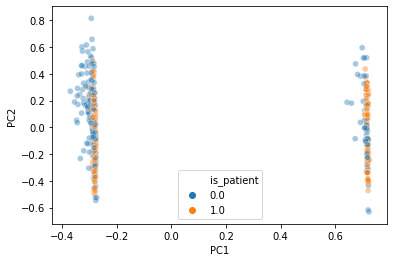

In [128]:
#PCA for SMOTE Over Sampled Dataset
pca_sm1 = PCA(n_components=2)
X_pca_sm1 = pca_sm1.fit_transform(X_train_sm1)
print(pca_sm1.explained_variance_ratio_.cumsum())
y_temp_sm1 = y_train_sm1
y_temp_sm1["PC1"] = X_pca_sm1[:,0]
y_temp_sm1["PC2"] = X_pca_sm1[:,1]
sns.scatterplot(data=y_temp_sm1, x="PC1", y="PC2", hue="is_patient", alpha=0.4)
print(y_temp_sm1["is_patient"].value_counts())

In [129]:
print(y_train_sm1.head())
y_train_sm1 = y_train_sm1.drop(["PC1", "PC2"], axis=1)
print(y_train_sm1.head())

     is_patient       PC1       PC2
457         1.0 -0.278275 -0.355462
225         1.0  0.712903  0.088737
162         0.0 -0.290528  0.658835
195         0.0 -0.294793  0.041554
267         0.0 -0.283704  0.070613
     is_patient
457         1.0
225         1.0
162         0.0
195         0.0
267         0.0


In [130]:
print("\n----------------------------------------------------------------------\n")

#1 Naive Bayes On SMOTE Oversampled Training dataset
print("Naive Bayes on SMOTE Oversampled Training dataset:")
clfFitPredict(GaussianNB(), X_train_sm1, X_test, y_train_sm1, y_test)

#Cross Validation on Naive Bayes on SMOTE Over sampled Training datset
print("\nCross Validation of Naive Bayes on SMOTE Over sampled Training dataset:")
crossValidation(GaussianNB(), X_sm1, y_sm1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Naive Bayes on SMOTE Oversampled Training dataset:

Confusion Matrix: 
[[56 69]
 [ 6 44]]

Accuracy : 0.5714285714285714
Sensitivity : 0.448
Precision: 0.9032258064516129
Specificity : 0.88
F-Score : 0.5989304812834224

               precision    recall  f1-score   support

         0.0       0.90      0.45      0.60       125
         1.0       0.39      0.88      0.54        50

    accuracy                           0.57       175
   macro avg       0.65      0.66      0.57       175
weighted avg       0.76      0.57      0.58       175
 


Cross Validation of Naive Bayes on SMOTE Over sampled Training dataset:
[0.67368421 0.65608466 0.68253968 0.67195767] 

0.6710665552770817

----------------------------------------------------------------------



In [131]:
print("\n----------------------------------------------------------------------\n")

#2.1 SVM Classifier On SMOTE OverSampled Training dataset
print("SVM Classifier on SMOTE Oversample Training dataset:")
clfFitPredict(LinearSVC(), X_train_sm1, X_test, y_train_sm1, y_test)

#Cross Validation on SVM Classifier on SMOTE Oversampled Training datset
print("\nCross Validation of SVM Classifier on SMOTE Oversample Training dataset:")
crossValidation(LinearSVC(), X_sm1, y_sm1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

SVM Classifier on SMOTE Oversample Training dataset:

Confusion Matrix: 
[[66 59]
 [ 9 41]]

Accuracy : 0.6114285714285714
Sensitivity : 0.528
Precision: 0.88
Specificity : 0.82
F-Score : 0.66

               precision    recall  f1-score   support

         0.0       0.88      0.53      0.66       125
         1.0       0.41      0.82      0.55        50

    accuracy                           0.61       175
   macro avg       0.65      0.67      0.60       175
weighted avg       0.75      0.61      0.63       175
 


Cross Validation of SVM Classifier on SMOTE Oversample Training dataset:
[0.71578947 0.67195767 0.68253968 0.70899471] 

0.6948203842940686

----------------------------------------------------------------------



In [132]:
print("\n----------------------------------------------------------------------\n")

#3.1 Logistic Regression Classifier On SMOTE Oversampled Training dataset
print("Logistic Regression Classifier on SMOTE Oversample Training dataset:")
clfFitPredict(LogisticRegression(), X_train_sm1, X_test, y_train_sm1, y_test)

#Cross Validation on Logistic Regression Classifier on SMOTE Oversampled Training datset
print("\nCross Validation of Logistic Regression Classifier on SMOTE Oversample Training dataset:")
crossValidation(LogisticRegression(), X_sm1, y_sm1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Logistic Regression Classifier on SMOTE Oversample Training dataset:

Confusion Matrix: 
[[75 50]
 [11 39]]

Accuracy : 0.6514285714285715
Sensitivity : 0.6
Precision: 0.872093023255814
Specificity : 0.78
F-Score : 0.7109004739336493

               precision    recall  f1-score   support

         0.0       0.87      0.60      0.71       125
         1.0       0.44      0.78      0.56        50

    accuracy                           0.65       175
   macro avg       0.66      0.69      0.64       175
weighted avg       0.75      0.65      0.67       175
 


Cross Validation of Logistic Regression Classifier on SMOTE Oversample Training dataset:
[0.68947368 0.66666667 0.60846561 0.7037037 ] 

0.6670774157616263

----------------------------------------------------------------------



In [133]:
print("\n----------------------------------------------------------------------\n")

#4.1 KNN Classifier On SMOTE Oversample Training dataset
print("KNN Classifier on SMOTE Oversample Training dataset:")
clfFitPredict(KNeighborsClassifier(n_neighbors = 2), X_train_sm1, X_test, y_train_sm1, y_test)

#Cross Validation on KNN Classifier on SMOTE Oversampled Training dataset
print("\nCross Validation of KNN Classifier on SMOTE Oversample Training dataset:")
crossValidation(KNeighborsClassifier(n_neighbors = 2), X_sm1, y_sm1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

KNN Classifier on SMOTE Oversample Training dataset:

Confusion Matrix: 
[[102  23]
 [ 32  18]]

Accuracy : 0.6857142857142857
Sensitivity : 0.816
Precision: 0.7611940298507462
Specificity : 0.36
F-Score : 0.7876447876447876

               precision    recall  f1-score   support

         0.0       0.76      0.82      0.79       125
         1.0       0.44      0.36      0.40        50

    accuracy                           0.69       175
   macro avg       0.60      0.59      0.59       175
weighted avg       0.67      0.69      0.68       175
 


Cross Validation of KNN Classifier on SMOTE Oversample Training dataset:
[0.73684211 0.74603175 0.77777778 0.69312169] 

0.7384433305485937

----------------------------------------------------------------------



In [134]:
print("\n----------------------------------------------------------------------\n")

#5.1 Random Forest Classifier On SMOTE OverSampled Training dataset
print("Random Forest Classifier on SMOTE Oversample Training dataset:")
clfFitPredict(RandomForestClassifier(max_depth=4, random_state=0), X_train_sm1, X_test, y_train_sm1, y_test)

#Cross Validation on Random Forest Classifier on SMOTE Over sampled Training datset
print("\nCross Validation of Random Forest Classifier on SMOTE Oversample Training dataset:")
crossValidation(RandomForestClassifier(max_depth=4, random_state=0), X_sm1, y_sm1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Random Forest Classifier on SMOTE Oversample Training dataset:

Confusion Matrix: 
[[75 50]
 [15 35]]

Accuracy : 0.6285714285714286
Sensitivity : 0.6
Precision: 0.8333333333333334
Specificity : 0.7
F-Score : 0.6976744186046512

               precision    recall  f1-score   support

         0.0       0.83      0.60      0.70       125
         1.0       0.41      0.70      0.52        50

    accuracy                           0.63       175
   macro avg       0.62      0.65      0.61       175
weighted avg       0.71      0.63      0.65       175
 


Cross Validation of Random Forest Classifier on SMOTE Oversample Training dataset:
[0.75789474 0.69312169 0.6984127  0.66666667] 

0.7040239487607908

----------------------------------------------------------------------



In [135]:
print("\n----------------------------------------------------------------------\n")

#6 Voting Classifier for SMOTE OverSampled Training Dataset
print("Voting Classifier on SMOTE Over sampled Training dataset:")
clfs = [('rf', RandomForestClassifier(max_depth=4,random_state=1)), ('lr',LogisticRegression()), ('svm',LinearSVC()), 
       ('nb',GaussianNB())]
vclf = VotingClassifier(estimators=clfs, voting='hard')
clfFitPredict(vclf, X_train_sm1, X_test, y_train_sm1, y_test)

#Cross Validation on Voting Classifier on SMOTE OverSampled Training dataset
print("\nCross Validation of Voting Classifier on SMOTE Over sampled Training dataset:")
crossValidation(vclf, X_sm1, y_sm1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Voting Classifier on SMOTE Over sampled Training dataset:

Confusion Matrix: 
[[72 53]
 [10 40]]

Accuracy : 0.64
Sensitivity : 0.576
Precision: 0.8780487804878049
Specificity : 0.8
F-Score : 0.6956521739130435

               precision    recall  f1-score   support

         0.0       0.88      0.58      0.70       125
         1.0       0.43      0.80      0.56        50

    accuracy                           0.64       175
   macro avg       0.65      0.69      0.63       175
weighted avg       0.75      0.64      0.66       175
 


Cross Validation of Voting Classifier on SMOTE Over sampled Training dataset:
[0.73157895 0.69312169 0.68253968 0.71957672] 

0.7067042606516291

----------------------------------------------------------------------



In [136]:
print("\n----------------------------------------------------------------------\n")

#7 AdaBoostClassifier With Decision Tree Classifier as base estimator on SMOTE OverSampled Dataset

dt_sm1 = DecisionTreeClassifier(max_depth=1, random_state=1)
adb_clf_sm1 = AdaBoostClassifier(base_estimator=dt_sm1, n_estimators=100, learning_rate=0.025)
print("\nAdaBoostClassifier with Decision Tree as base estimator on SMOTE OverSampled Dataset:")
clfFitPredict(adb_clf_sm1, X_train_sm1, X_test, y_train_sm1, y_test)

#Cross Validation on AdaBoost Classifier on SMOTE OverSampled Dataset
print("\nCross Validation of AdaBoost Classifier on SMOTE OverSampled dataset:")
crossValidation(adb_clf_sm1, X_sm1, y_sm1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


AdaBoostClassifier with Decision Tree as base estimator on SMOTE OverSampled Dataset:

Confusion Matrix: 
[[71 54]
 [11 39]]

Accuracy : 0.6285714285714286
Sensitivity : 0.568
Precision: 0.8658536585365854
Specificity : 0.78
F-Score : 0.6859903381642511

               precision    recall  f1-score   support

         0.0       0.87      0.57      0.69       125
         1.0       0.42      0.78      0.55        50

    accuracy                           0.63       175
   macro avg       0.64      0.67      0.62       175
weighted avg       0.74      0.63      0.65       175
 


Cross Validation of AdaBoost Classifier on SMOTE OverSampled dataset:
[0.71578947 0.68783069 0.66137566 0.68253968] 

0.6868838763575607

----------------------------------------------------------------------



In [137]:
print("\n----------------------------------------------------------------------\n")

#8 AdaBoostClassifier With SVC as base estimator 

svc_adb_sm1 = SVC(probability=True, kernel='linear')
adb_clf_svc_sm1 = AdaBoostClassifier(base_estimator=svc_adb_sm1, n_estimators=100, learning_rate=0.025)
print("\nAdaBoostClassifier with SVC as base estimator on SMOTE OverSampled Dataset:")
clfFitPredict(adb_clf_svc_sm1, X_train_sm1, X_test, y_train_sm1, y_test)

#Cross Validation on AdaBoostClassifier on SMOTE OverSampled dataset
print("\nCross Validation of AdaBoostClassifier with SVM as base estimator on SMOTE OverSampled dataset:")
crossValidation(adb_clf_svc_sm1, X_sm1, y_sm1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


AdaBoostClassifier with SVC as base estimator on SMOTE OverSampled Dataset:

Confusion Matrix: 
[[65 60]
 [ 8 42]]

Accuracy : 0.6114285714285714
Sensitivity : 0.52
Precision: 0.8904109589041096
Specificity : 0.84
F-Score : 0.6565656565656566

               precision    recall  f1-score   support

         0.0       0.89      0.52      0.66       125
         1.0       0.41      0.84      0.55        50

    accuracy                           0.61       175
   macro avg       0.65      0.68      0.60       175
weighted avg       0.75      0.61      0.63       175
 


Cross Validation of AdaBoostClassifier with SVM as base estimator on SMOTE OverSampled dataset:
[0.67368421 0.64550265 0.61904762 0.64550265] 

0.6459342801448065

----------------------------------------------------------------------



In [138]:
print("\n----------------------------------------------------------------------\n")

#9 GradientBoostingClassifier On SMOTE OverSampled Dataset

gbc_sm1 = GradientBoostingClassifier(max_depth=1, subsample=0.8, max_features=0.2, n_estimators=300, random_state=0)
print("\nGradientBoostingClassifier on the SMOTE OverSampled dataset:")
clfFitPredict(gbc_sm1, X_train_sm1, X_test, y_train_sm1, y_test)

#Cross Validation on GradientBoostingClassifier on SMOTE OverSampled datset
print("\nCross Validation of GradientBoostingClassifier on SMOTE OverSampled dataset:")
crossValidation(gbc_sm1, X_sm1, y_sm1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


GradientBoostingClassifier on the SMOTE OverSampled dataset:

Confusion Matrix: 
[[82 43]
 [22 28]]

Accuracy : 0.6285714285714286
Sensitivity : 0.656
Precision: 0.7884615384615384
Specificity : 0.56
F-Score : 0.7161572052401747

               precision    recall  f1-score   support

         0.0       0.79      0.66      0.72       125
         1.0       0.39      0.56      0.46        50

    accuracy                           0.63       175
   macro avg       0.59      0.61      0.59       175
weighted avg       0.68      0.63      0.64       175
 


Cross Validation of GradientBoostingClassifier on SMOTE OverSampled dataset:
[0.76315789 0.71957672 0.71957672 0.67724868] 

0.7198900027847396

----------------------------------------------------------------------



In [139]:
print("\n----------------------------------------------------------------------\n")

#10 XGBClassifier on the SMOTE OverSampled Dataset

xgb_clf_sm1 = XGBClassifier(objective='binary:logistic', booster='gblinear', n_estimators=10, seed=1)
print("\nXGBClassifier on the SMOTE OverSampled dataset:")
clfFitPredict(xgb_clf_sm1, X_train_sm1, X_test, y_train_sm1, y_test)

#Cross Validation on XGBClassifier on SMOTE OverSampled dataset
print("\nCross Validation of XGBClassifier on SMOTE OverSampled dataset:")
crossValidation(xgb_clf_sm1, X_sm1, y_sm1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


XGBClassifier on the SMOTE OverSampled dataset:

Confusion Matrix: 
[[76 49]
 [14 36]]

Accuracy : 0.64
Sensitivity : 0.608
Precision: 0.8444444444444444
Specificity : 0.72
F-Score : 0.7069767441860465

               precision    recall  f1-score   support

         0.0       0.84      0.61      0.71       125
         1.0       0.42      0.72      0.53        50

    accuracy                           0.64       175
   macro avg       0.63      0.66      0.62       175
weighted avg       0.72      0.64      0.66       175
 


Cross Validation of XGBClassifier on SMOTE OverSampled dataset:
[0.54736842 0.55026455 0.55026455 0.55026455] 

0.5495405179615706

----------------------------------------------------------------------



In [140]:
#Classification With PCA on SMOTE Dataset

pca_sm_1 = PCA()
X_pca_sm_1 = pca_sm_1.fit_transform(X_train_sm1)
print(pca_sm_1.explained_variance_ratio_)
print(pca_sm_1.explained_variance_ratio_.cumsum())

pca_sm1 = PCA(n_components=5)
X_pca_train_sm1 = pd.DataFrame(pca_sm1.fit_transform(X_train_sm1))
X_pca_test_sm1 = pd.DataFrame(pca_sm1.transform(X_test))

X_pca_sm1 = pd.concat([X_pca_train_sm1, X_pca_test_sm1], axis=0)

print("\n----------------------------------------------------------------------\n")

#1 Naive Bayes On SMOTE OverSampled PCA Training Dataset
print("Naive Bayes on SMOTE OverSampled PCA Training Dataset:")
clfFitPredict(GaussianNB(), X_pca_train_sm1, X_pca_test_sm1, y_train_sm1, y_test)

#Cross Validation on Naive Bayes on SMOTE OverSampled PCA Training Dataset
print("\nCross Validation of Naive Bayes on SMOTE OverSampled PCA Training Dataset:")
crossValidation(GaussianNB(), X_pca_sm1, y_sm1, 4)

print("\n----------------------------------------------------------------------\n")

#2.1 SVM Classifier On SMOTE OverSampled PCA Training Dataset
print("SVM Classifier on SMOTE OverSampled PCA Training Dataset:")
clfFitPredict(LinearSVC(), X_pca_train_sm1, X_pca_test_sm1, y_train_sm1, y_test)

#Cross Validation on SVM Classifier on SMOTE OverSampled PCA Training Dataset
print("\nCross Validation of SVM Classifier on SMOTE OverSampled PCA Training Dataset:")
crossValidation(LinearSVC(), X_pca_sm1, y_sm1, 4)

print("\n----------------------------------------------------------------------\n")

#3.1 Logistic Regression Classifier On SMOTE OverSampled PCA Training Dataset
print("Logistic Regression Classifier on SMOTE OverSampled PCA Training Dataset:")
clfFitPredict(LogisticRegression(), X_pca_train_sm1, X_pca_test_sm1, y_train_sm1, y_test)

#Cross Validation on Logistic Regression Classifier on SMOTE OverSampled PCA Training Dataset
print("\nCross Validation of Logistic Regression Classifier on SMOTE OverSampled PCA Training Dataset:")
crossValidation(LogisticRegression(), X_pca_sm1, y_sm1, 4)


print("\n----------------------------------------------------------------------\n")


#4.1 KNN Classifier On SMOTE OverSampled PCA Training Dataset
print("KNN Classifier on SMOTE OverSampled PCA Training Dataset:")
clfFitPredict(KNeighborsClassifier(n_neighbors = 2), X_pca_train_sm1, X_pca_test_sm1, y_train_sm1, y_test)

#Cross Validation on KNN Classifier on SMOTE OverSampled PCA Training Dataset
print("\nCross Validation of KNN Classifier on SMOTE OverSampled PCA Training Dataset:")
crossValidation(KNeighborsClassifier(n_neighbors = 2), X_pca_sm1, y_sm1, 4)

print("\n----------------------------------------------------------------------\n")

#5.1 Random Forest Classifier On SMOTE OverSampled PCA Training Dataset
print("Random Forest Classifier on SMOTE OverSampled PCA Training Dataset:")
clfFitPredict(RandomForestClassifier(max_depth=4, random_state=0), X_pca_train_sm1, X_pca_test_sm1, y_train_sm1, y_test)

#Cross Validation on Random Forest Classifier on SMOTE OverSampled PCA Training Dataset
print("\nCross Validation of Random Forest Classifier on SMOTE OverSampled PCA Training Dataset:")
crossValidation(RandomForestClassifier(max_depth=4, random_state=0), X_pca_sm1, y_sm1, 4)

print("\n----------------------------------------------------------------------\n")

#6 Voting Classifier for SMOTE OverSampled PCA Training Dataset
print("Voting Classifier on SMOTE OverSampled PCA Training Dataset:")
clfFitPredict(vclf, X_pca_train_sm1, X_pca_test_sm1, y_train_sm1, y_test)

#Cross Validation on Voting Classifier on SMOTE OverSampled PCA Training Dataset
print("\nCross Validation of Voting Classifier on SMOTE OverSampled PCA Training Dataset:")
crossValidation(vclf, X_pca_sm1, y_sm1, 4)

print("\n----------------------------------------------------------------------\n")

#7 AdaBoostClassifier With Decision Tree Classifier as base estimator on SMOTE OverSampled PCA Training Dataset

print("\nAdaBoostClassifier with Decision Tree as base estimator on SMOTE OverSampled PCA Training Dataset:")
clfFitPredict(adb_clf_sm1, X_pca_train_sm1, X_pca_test_sm1, y_train_sm1, y_test)

#Cross Validation on AdaBoost Classifier on SMOTE OverSampled PCA Dataset
print("\nCross Validation of AdaBoost Classifier on SMOTE OverSampled PCA Training dataset:")
crossValidation(adb_clf_sm1, X_pca_sm1, y_sm1, 4)

print("\n----------------------------------------------------------------------\n")

#8 AdaBoostClassifier With SVC as base estimator 

print("\nAdaBoostClassifier with SVC as base estimator on SMOTE OverSampled PCA Training Dataset:")
clfFitPredict(adb_clf_svc_sm1, X_pca_train_sm1, X_pca_test_sm1, y_train_sm1, y_test)

#Cross Validation on AdaBoostClassifier on SMOTE OverSampled PCA Training dataset
print("\nCross Validation of AdaBoostClassifier with SVM as base estimator on SMOTE OverSampled PCA Training dataset:")
crossValidation(adb_clf_svc_sm1, X_pca_sm1, y_sm1, 4)

print("\n----------------------------------------------------------------------\n")

#9 GradientBoostingClassifier On SMOTE OverSampled PCA Training Dataset
print("\nGradientBoostingClassifier on the SMOTE OverSampled PCA Training dataset:")
clfFitPredict(gbc_sm1, X_pca_train_sm1, X_pca_test_sm1, y_train_sm1, y_test)

#Cross Validation on GradientBoostingClassifier on SMOTE OverSampled PCA Training datset
print("\nCross Validation of GradientBoostingClassifier on SMOTE OverSampled PCA Training dataset:")
crossValidation(gbc_sm1, X_pca_sm1, y_sm1, 4)

print("\n----------------------------------------------------------------------\n")

#10 XGBClassifier on the SMOTE OverSampled PCA Training Dataset

print("\nXGBClassifier on the SMOTE OverSampled PCA Training dataset:")
clfFitPredict(xgb_clf_sm1, X_pca_train_sm1, X_pca_test_sm1, y_train_sm1, y_test)

#Cross Validation on XGBClassifier on SMOTE OverSampled PCA Training dataset
print("\nCross Validation of XGBClassifier on SMOTE OverSampled PCA Training dataset:")
crossValidation(xgb_clf_sm1, X_pca_sm1, y_sm1, 4)

print("\n----------------------------------------------------------------------\n")

[0.57289228 0.16913182 0.09344083 0.079012   0.03618626 0.02434364
 0.02034568 0.00268106 0.00133452 0.00063192]
[0.57289228 0.7420241  0.83546493 0.91447693 0.95066318 0.97500682
 0.9953525  0.99803356 0.99936808 1.        ]

----------------------------------------------------------------------

Naive Bayes on SMOTE OverSampled PCA Training Dataset:

Confusion Matrix: 
[[59 66]
 [18 32]]

Accuracy : 0.52
Sensitivity : 0.472
Precision: 0.7662337662337663
Specificity : 0.64
F-Score : 0.5841584158415841

               precision    recall  f1-score   support

         0.0       0.77      0.47      0.58       125
         1.0       0.33      0.64      0.43        50

    accuracy                           0.52       175
   macro avg       0.55      0.56      0.51       175
weighted avg       0.64      0.52      0.54       175
 


Cross Validation of Naive Bayes on SMOTE OverSampled PCA Training Dataset:
[0.64210526 0.62962963 0.63492063 0.59259259] 

0.6248120300751879

-----------------

In [141]:
#Edited Nearest Neighbor Under Sampling 
enn = EditedNearestNeighbours(sampling_strategy='majority')
X_train_enn, y_train_enn = enn.fit_resample(X_train, y_train.values.ravel())
print("Original Training Dataset Distribution \n")
print(y_train["is_patient"].value_counts())
print("\nTraining Dataset Distribution After SMOTE Over Sampling\n")
print(pd.Series(y_train_enn).value_counts())
X_train_enn = pd.DataFrame(X_train_enn)
y_train_enn = pd.DataFrame(y_train_enn)
y_train_enn = y_train_enn.rename(columns = {0:'is_patient'})


X_temp_enn = pd.concat([X_train_enn, y_train_enn], axis=1)
#shuffling the training dataset
X_temp_enn = X_temp_enn.sample(frac=1, random_state=1)
X_train_enn  = X_temp_enn.drop(["is_patient"], axis=1)
y_train_enn  = X_temp_enn[["is_patient"]]


X_enn = pd.concat([X_train_enn, X_test], axis=0)
y_enn = pd.concat([y_train_enn, y_test], axis=0)

Original Training Dataset Distribution 

0.0    291
1.0    117
Name: is_patient, dtype: int64

Training Dataset Distribution After SMOTE Over Sampling

1.0    117
0.0    114
dtype: int64


[0.46449406 0.1855652 ]
[0.46449406 0.65005927]
1.0    117
0.0    114
Name: is_patient, dtype: int64


/home/srix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/srix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


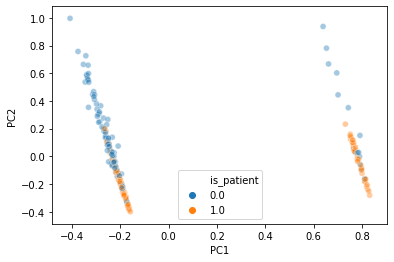

In [142]:
#PCA for ENN Under Sampled Dataset
pca_enn = PCA(n_components=2)
X_pca_enn = pca_enn.fit_transform(X_train_enn)
print(pca_enn.explained_variance_ratio_)
print(pca_enn.explained_variance_ratio_.cumsum())
y_temp_enn = y_train_enn
y_temp_enn["PC1"] = X_pca_enn[:,0]
y_temp_enn["PC2"] = X_pca_enn[:,1]
sns.scatterplot(data=y_temp_enn, x="PC1", y="PC2", hue="is_patient", alpha=0.4)
print(y_temp_enn["is_patient"].value_counts())

In [143]:
print(y_train_enn.head())

y_train_enn = y_train_enn.drop(["PC1", "PC2"], axis=1)
print(y_train_enn.head())

     is_patient       PC1       PC2
78          0.0 -0.237062 -0.052460
150         1.0  0.812853 -0.176968
171         1.0 -0.209677 -0.137952
228         1.0 -0.217630 -0.091505
190         1.0 -0.182964 -0.263602
     is_patient
78          0.0
150         1.0
171         1.0
228         1.0
190         1.0


In [144]:
print(y_train_enn.head())

     is_patient
78          0.0
150         1.0
171         1.0
228         1.0
190         1.0


In [145]:
print("\n----------------------------------------------------------------------\n")

#1 Naive Bayes On ENN Undersampled Training dataset
print("Naive Bayes on ENN Undersampled Training dataset:")
clfFitPredict(GaussianNB(), X_train_enn, X_test, y_train_enn, y_test)

#Cross Validation on Naive Bayes on ENN Undersampled Training datset
print("\nCross Validation of Naive Bayes on ENN Under sampled Training dataset:")
crossValidation(GaussianNB(), X_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Naive Bayes on ENN Undersampled Training dataset:

Confusion Matrix: 
[[45 80]
 [ 3 47]]

Accuracy : 0.5257142857142857
Sensitivity : 0.36
Precision: 0.9375
Specificity : 0.94
F-Score : 0.5202312138728323

               precision    recall  f1-score   support

         0.0       0.94      0.36      0.52       125
         1.0       0.37      0.94      0.53        50

    accuracy                           0.53       175
   macro avg       0.65      0.65      0.53       175
weighted avg       0.78      0.53      0.52       175
 


Cross Validation of Naive Bayes on ENN Under sampled Training dataset:
[0.85294118 0.74509804 0.59405941 0.61386139] 

0.7014900019413707

----------------------------------------------------------------------



In [146]:
print("\n----------------------------------------------------------------------\n")

#2.1 SVM Classifier On ENN UnderSampled Training dataset
print("SVM Classifier on ENN Undersample Training dataset:")
clfFitPredict(LinearSVC(), X_train_enn, X_test, y_train_enn, y_test)

#Cross Validation on SVM Classifier on ENN Undersampled Training datset
print("\nCross Validation of SVM Classifier on ENN Undersample Training dataset:")
crossValidation(LinearSVC(), X_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

SVM Classifier on ENN Undersample Training dataset:

Confusion Matrix: 
[[55 70]
 [ 4 46]]

Accuracy : 0.5771428571428572
Sensitivity : 0.44
Precision: 0.9322033898305084
Specificity : 0.92
F-Score : 0.5978260869565217

               precision    recall  f1-score   support

         0.0       0.93      0.44      0.60       125
         1.0       0.40      0.92      0.55        50

    accuracy                           0.58       175
   macro avg       0.66      0.68      0.58       175
weighted avg       0.78      0.58      0.59       175
 


Cross Validation of SVM Classifier on ENN Undersample Training dataset:
[0.81372549 0.81372549 0.66336634 0.66336634] 

0.738545913414871

----------------------------------------------------------------------



In [147]:
print("\n----------------------------------------------------------------------\n")

#3.1 Logistic Regression Classifier On ENN Undersampled Training dataset
print("Logistic Regression Classifier on ENN Undersample Training dataset:")
clfFitPredict(LogisticRegression(), X_train_enn, X_test, y_train_enn, y_test)

#Cross Validation on Logistic Regression Classifier on ENN Undersampled Training datset
print("\nCross Validation of Logistic Regression Classifier on ENN Undersample Training dataset:")
crossValidation(LogisticRegression(), X_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Logistic Regression Classifier on ENN Undersample Training dataset:

Confusion Matrix: 
[[57 68]
 [ 4 46]]

Accuracy : 0.5885714285714285
Sensitivity : 0.456
Precision: 0.9344262295081968
Specificity : 0.92
F-Score : 0.6129032258064516

               precision    recall  f1-score   support

         0.0       0.93      0.46      0.61       125
         1.0       0.40      0.92      0.56        50

    accuracy                           0.59       175
   macro avg       0.67      0.69      0.59       175
weighted avg       0.78      0.59      0.60       175
 


Cross Validation of Logistic Regression Classifier on ENN Undersample Training dataset:
[0.75490196 0.76470588 0.61386139 0.67326733] 

0.7016841390021356

----------------------------------------------------------------------



In [148]:
print("\n----------------------------------------------------------------------\n")

#4.1 KNN Classifier On ENN Undersample Training dataset
print("KNN Classifier on ENN undersample Training dataset:")
clfFitPredict(KNeighborsClassifier(n_neighbors = 2), X_train_enn, X_test, y_train_enn, y_test)

#Cross Validation on KNN Classifier on ENN Undersampled Training dataset
print("\nCross Validation of KNN Classifier on ENN Undersample Training dataset:")
crossValidation(KNeighborsClassifier(n_neighbors = 2), X_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

KNN Classifier on ENN undersample Training dataset:

Confusion Matrix: 
[[71 54]
 [17 33]]

Accuracy : 0.5942857142857143
Sensitivity : 0.568
Precision: 0.8068181818181818
Specificity : 0.66
F-Score : 0.6666666666666666

               precision    recall  f1-score   support

         0.0       0.81      0.57      0.67       125
         1.0       0.38      0.66      0.48        50

    accuracy                           0.59       175
   macro avg       0.59      0.61      0.57       175
weighted avg       0.68      0.59      0.61       175
 


Cross Validation of KNN Classifier on ENN Undersample Training dataset:
[0.74509804 0.70588235 0.6039604  0.67326733] 

0.6820520287322851

----------------------------------------------------------------------



In [149]:
print("\n----------------------------------------------------------------------\n")

#5.1 Random Forest Classifier On ENN Under Sampled Training dataset
print("Random Forest Classifier on ENN Undersample Training dataset:")
clfFitPredict(RandomForestClassifier(max_depth=4, random_state=0), X_train_enn, X_test, y_train_enn, y_test)

#Cross Validation on Random Forest Classifier on ENN Under sampled Training datset
print("\nCross Validation of Random Forest Classifier on ENN Undersample Training dataset:")
crossValidation(RandomForestClassifier(max_depth=4, random_state=0), X_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Random Forest Classifier on ENN Undersample Training dataset:

Confusion Matrix: 
[[61 64]
 [ 5 45]]

Accuracy : 0.6057142857142858
Sensitivity : 0.488
Precision: 0.9242424242424242
Specificity : 0.9
F-Score : 0.6387434554973821

               precision    recall  f1-score   support

         0.0       0.92      0.49      0.64       125
         1.0       0.41      0.90      0.57        50

    accuracy                           0.61       175
   macro avg       0.67      0.69      0.60       175
weighted avg       0.78      0.61      0.62       175
 


Cross Validation of Random Forest Classifier on ENN Undersample Training dataset:
[0.83333333 0.80392157 0.69306931 0.6039604 ] 

0.7335711512327704

----------------------------------------------------------------------



In [150]:
print("\n----------------------------------------------------------------------\n")

#6 Voting Classifier for ENN UnderSampled Training Dataset
print("Voting Classifier on ENN Under sampled Training dataset:")
clfs = [('rf', RandomForestClassifier(max_depth=4,random_state=1)), ('lr',LogisticRegression()), ('svm',LinearSVC()), 
       ('nb',GaussianNB())]
vclf = VotingClassifier(estimators=clfs, voting='hard')
clfFitPredict(vclf, X_train_enn, X_test, y_train_enn, y_test)

#Cross Validation on Voting Classifier on ENN UnderSampled Training datset
print("\nCross Validation of Voting Classifier on ENN Under sampled Training dataset:")
crossValidation(vclf, X_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Voting Classifier on ENN Under sampled Training dataset:

Confusion Matrix: 
[[60 65]
 [ 5 45]]

Accuracy : 0.6
Sensitivity : 0.48
Precision: 0.9230769230769231
Specificity : 0.9
F-Score : 0.631578947368421

               precision    recall  f1-score   support

         0.0       0.92      0.48      0.63       125
         1.0       0.41      0.90      0.56        50

    accuracy                           0.60       175
   macro avg       0.67      0.69      0.60       175
weighted avg       0.78      0.60      0.61       175
 


Cross Validation of Voting Classifier on ENN Under sampled Training dataset:
[0.81372549 0.80392157 0.69306931 0.65346535] 

0.7410454280722191

----------------------------------------------------------------------



In [151]:
print("\n----------------------------------------------------------------------\n")

#1 Naive Bayes On ENN Undersampled Training dataset
print("Naive Bayes on ENN Undersampled Training dataset:")
clfFitPredict(GaussianNB(), X_train_enn, X_test, y_train_enn, y_test)

#Cross Validation on Naive Bayes on ENN Undersampled Training datset
print("\nCross Validation of Naive Bayes on ENN Under sampled Training dataset:")
crossValidation(GaussianNB(), X_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")
print("\n----------------------------------------------------------------------\n")

#2.1 SVM Classifier On ENN UnderSampled Training dataset
print("SVM Classifier on ENN Undersample Training dataset:")
clfFitPredict(LinearSVC(), X_train_enn, X_test, y_train_enn, y_test)

#Cross Validation on SVM Classifier on ENN Undersampled Training datset
print("\nCross Validation of SVM Classifier on ENN Undersample Training dataset:")
crossValidation(LinearSVC(), X_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")
print("\n----------------------------------------------------------------------\n")

#3.1 Logistic Regression Classifier On ENN Undersampled Training dataset
print("Logistic Regression Classifier on ENN Undersample Training dataset:")
clfFitPredict(LogisticRegression(), X_train_enn, X_test, y_train_enn, y_test)

#Cross Validation on Logistic Regression Classifier on ENN Undersampled Training datset
print("\nCross Validation of Logistic Regression Classifier on ENN Undersample Training dataset:")
crossValidation(LogisticRegression(), X_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")
print("\n----------------------------------------------------------------------\n")

#4.1 KNN Classifier On ENN Undersample Training dataset
print("KNN Classifier on ENN undersample Training dataset:")
clfFitPredict(KNeighborsClassifier(n_neighbors = 2), X_train_enn, X_test, y_train_enn, y_test)

#Cross Validation on KNN Classifier on ENN Undersampled Training dataset
print("\nCross Validation of KNN Classifier on ENN Undersample Training dataset:")
crossValidation(KNeighborsClassifier(n_neighbors = 2), X_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")
print("\n----------------------------------------------------------------------\n")

#5.1 Random Forest Classifier On ENN Under Sampled Training dataset
print("Random Forest Classifier on ENN Undersample Training dataset:")
clfFitPredict(RandomForestClassifier(max_depth=4, random_state=0), X_train_enn, X_test, y_train_enn, y_test)

#Cross Validation on Random Forest Classifier on ENN Under sampled Training datset
print("\nCross Validation of Random Forest Classifier on ENN Undersample Training dataset:")
crossValidation(RandomForestClassifier(max_depth=4, random_state=0), X_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")
print("\n----------------------------------------------------------------------\n")

#6 Voting Classifier for ENN UnderSampled Training Dataset
print("Voting Classifier on ENN Under sampled Training dataset:")
clfs = [('rf', RandomForestClassifier(max_depth=4,random_state=1)), ('lr',LogisticRegression()), ('svm',LinearSVC()), 
       ('nb',GaussianNB())]
vclf = VotingClassifier(estimators=clfs, voting='hard')
clfFitPredict(vclf, X_train_enn, X_test, y_train_enn, y_test)

#Cross Validation on Voting Classifier on ENN UnderSampled Training datset
print("\nCross Validation of Voting Classifier on ENN Under sampled Training dataset:")
crossValidation(vclf, X_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")
print("\n----------------------------------------------------------------------\n")

#7 AdaBoostClassifier With Decision Tree Classifier as base estimator on ENN UnderSampled Training datset

dt_enn = DecisionTreeClassifier(max_depth=1, random_state=1)
adb_clf_enn = AdaBoostClassifier(base_estimator=dt_enn, n_estimators=100, learning_rate=0.025)
print("\nAdaBoostClassifier with Decision Tree as base estimator on ENN UnderSampled Training datset:")
clfFitPredict(adb_clf_enn, X_train_enn, X_test, y_train_enn, y_test)

#Cross Validation on AdaBoost Classifier on ENN UnderSampled Training datset
print("\nCross Validation of AdaBoost Classifier on ENN UnderSampled Training datset:")
crossValidation(adb_clf_enn, X_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")

#8 AdaBoostClassifier With SVC as base estimator 

svc_adb_enn = SVC(probability=True, kernel='linear')
adb_clf_svc_enn = AdaBoostClassifier(base_estimator=svc_adb_enn, n_estimators=100, learning_rate=0.025)
print("\nAdaBoostClassifier with SVC as base estimator on ENN UnderSampled Training datset:")
clfFitPredict(adb_clf_svc_enn, X_train_enn, X_test, y_train_enn, y_test)

#Cross Validation on AdaBoostClassifier on ENN UnderSampled Training datset
print("\nCross Validation of AdaBoostClassifier with SVM as base estimator on ENN UnderSampled Training datset:")
crossValidation(adb_clf_svc_enn, X_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")

#9 GradientBoostingClassifier On ENN UnderSampled Training datset

gbc_enn = GradientBoostingClassifier(max_depth=1, subsample=0.8, max_features=0.2, n_estimators=300, random_state=0)
print("\nGradientBoostingClassifier on the ENN UnderSampled Training datset:")
clfFitPredict(gbc_enn, X_train_enn, X_test, y_train_enn, y_test)

#Cross Validation on GradientBoostingClassifier on ENN UnderSampled Training datset
print("\nCross Validation of GradientBoostingClassifier on ENN UnderSampled Training datset:")
crossValidation(gbc_enn, X_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")

#10 XGBClassifier on the ENN UnderSampled Training datset

xgb_clf_enn = XGBClassifier(objective='binary:logistic', booster='gblinear', n_estimators=10, seed=1)
print("\nXGBClassifier on the ENN OverSampled dataset:")
clfFitPredict(xgb_clf_enn, X_train_enn, X_test, y_train_enn, y_test)

#Cross Validation on XGBClassifier on ENN UnderSampled Training datset
print("\nCross Validation of XGBClassifier on ENN UnderSampled Training datset:")
crossValidation(xgb_clf_enn, X_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Naive Bayes on ENN Undersampled Training dataset:

Confusion Matrix: 
[[45 80]
 [ 3 47]]

Accuracy : 0.5257142857142857
Sensitivity : 0.36
Precision: 0.9375
Specificity : 0.94
F-Score : 0.5202312138728323

               precision    recall  f1-score   support

         0.0       0.94      0.36      0.52       125
         1.0       0.37      0.94      0.53        50

    accuracy                           0.53       175
   macro avg       0.65      0.65      0.53       175
weighted avg       0.78      0.53      0.52       175
 


Cross Validation of Naive Bayes on ENN Under sampled Training dataset:
[0.85294118 0.74509804 0.59405941 0.61386139] 

0.7014900019413707

----------------------------------------------------------------------


----------------------------------------------------------------------

SVM Classifier on ENN Undersample Training dataset:

Confusion Matrix: 
[[55 70]
 [ 4 46]]

Accuracy : 0.5

In [152]:
print("\n----------------------------------------------------------------------\n")

#7 AdaBoostClassifier With Decision Tree Classifier as base estimator on ENN UnderSampled Training datset

dt_enn = DecisionTreeClassifier(max_depth=1, random_state=1)
adb_clf_enn = AdaBoostClassifier(base_estimator=dt_enn, n_estimators=100, learning_rate=0.025)
print("\nAdaBoostClassifier with Decision Tree as base estimator on ENN UnderSampled Training datset:")
clfFitPredict(adb_clf_enn, X_train_enn, X_test, y_train_enn, y_test)

#Cross Validation on AdaBoost Classifier on ENN UnderSampled Training datset
print("\nCross Validation of AdaBoost Classifier on ENN UnderSampled Training datset:")
crossValidation(adb_clf_enn, X_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


AdaBoostClassifier with Decision Tree as base estimator on ENN UnderSampled Training datset:

Confusion Matrix: 
[[60 65]
 [ 3 47]]

Accuracy : 0.6114285714285714
Sensitivity : 0.48
Precision: 0.9523809523809523
Specificity : 0.94
F-Score : 0.6382978723404255

               precision    recall  f1-score   support

         0.0       0.95      0.48      0.64       125
         1.0       0.42      0.94      0.58        50

    accuracy                           0.61       175
   macro avg       0.69      0.71      0.61       175
weighted avg       0.80      0.61      0.62       175
 


Cross Validation of AdaBoost Classifier on ENN UnderSampled Training datset:
[0.84313725 0.75490196 0.72277228 0.6039604 ] 

0.7311929722384004

----------------------------------------------------------------------



In [153]:
print("\n----------------------------------------------------------------------\n")

#8 AdaBoostClassifier With SVC as base estimator 

svc_adb_enn = SVC(probability=True, kernel='linear')
adb_clf_svc_enn = AdaBoostClassifier(base_estimator=svc_adb_enn, n_estimators=100, learning_rate=0.025)
print("\nAdaBoostClassifier with SVC as base estimator on ENN UnderSampled Training datset:")
clfFitPredict(adb_clf_svc_enn, X_train_enn, X_test, y_train_enn, y_test)

#Cross Validation on AdaBoostClassifier on ENN UnderSampled Training datset
print("\nCross Validation of AdaBoostClassifier with SVM as base estimator on ENN UnderSampled Training datset:")
crossValidation(adb_clf_svc_enn, X_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")



----------------------------------------------------------------------


AdaBoostClassifier with SVC as base estimator on ENN UnderSampled Training datset:

Confusion Matrix: 
[[63 62]
 [ 5 45]]

Accuracy : 0.6171428571428571
Sensitivity : 0.504
Precision: 0.9264705882352942
Specificity : 0.9
F-Score : 0.6528497409326425

               precision    recall  f1-score   support

         0.0       0.93      0.50      0.65       125
         1.0       0.42      0.90      0.57        50

    accuracy                           0.62       175
   macro avg       0.67      0.70      0.61       175
weighted avg       0.78      0.62      0.63       175
 


Cross Validation of AdaBoostClassifier with SVM as base estimator on ENN UnderSampled Training datset:
[0.76470588 0.7254902  0.62376238 0.68316832] 

0.69928169287517

----------------------------------------------------------------------



In [154]:
print("\n----------------------------------------------------------------------\n")

#9 GradientBoostingClassifier On ENN UnderSampled Training datset

gbc_enn = GradientBoostingClassifier(max_depth=1, subsample=0.8, max_features=0.2, n_estimators=300, random_state=0)
print("\nGradientBoostingClassifier on the ENN UnderSampled Training datset:")
clfFitPredict(gbc_enn, X_train_enn, X_test, y_train_enn, y_test)

#Cross Validation on GradientBoostingClassifier on ENN UnderSampled Training datset
print("\nCross Validation of GradientBoostingClassifier on ENN UnderSampled Training datset:")
crossValidation(gbc_enn, X_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")



----------------------------------------------------------------------


GradientBoostingClassifier on the ENN UnderSampled Training datset:

Confusion Matrix: 
[[60 65]
 [ 8 42]]

Accuracy : 0.5828571428571429
Sensitivity : 0.48
Precision: 0.8823529411764706
Specificity : 0.84
F-Score : 0.6217616580310881

               precision    recall  f1-score   support

         0.0       0.88      0.48      0.62       125
         1.0       0.39      0.84      0.54        50

    accuracy                           0.58       175
   macro avg       0.64      0.66      0.58       175
weighted avg       0.74      0.58      0.60       175
 


Cross Validation of GradientBoostingClassifier on ENN UnderSampled Training datset:
[0.81372549 0.78431373 0.67326733 0.59405941] 

0.7163414870898855

----------------------------------------------------------------------



In [155]:
print("\n----------------------------------------------------------------------\n")

#10 XGBClassifier on the ENN UnderSampled Training datset

xgb_clf_enn = XGBClassifier(objective='binary:logistic', booster='gblinear', n_estimators=10, seed=1)
print("\nXGBClassifier on the ENN OverSampled dataset:")
clfFitPredict(xgb_clf_enn, X_train_enn, X_test, y_train_enn, y_test)

#Cross Validation on XGBClassifier on ENN UnderSampled Training datset
print("\nCross Validation of XGBClassifier on ENN UnderSampled Training datset:")
crossValidation(xgb_clf_enn, X_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


XGBClassifier on the ENN OverSampled dataset:

Confusion Matrix: 
[[ 17 108]
 [  1  49]]

Accuracy : 0.37714285714285717
Sensitivity : 0.136
Precision: 0.9444444444444444
Specificity : 0.98
F-Score : 0.2377622377622378

               precision    recall  f1-score   support

         0.0       0.94      0.14      0.24       125
         1.0       0.31      0.98      0.47        50

    accuracy                           0.38       175
   macro avg       0.63      0.56      0.36       175
weighted avg       0.76      0.38      0.31       175
 


Cross Validation of XGBClassifier on ENN UnderSampled Training datset:
[0.58823529 0.58823529 0.59405941 0.58415842] 

0.5886721025043681

----------------------------------------------------------------------



In [156]:
#Classification With PCA with ENN Dataset

pca_enn_1 = PCA()
X_pca_enn_1 = pca_enn_1.fit_transform(X_train_enn)
print(pca_enn_1.explained_variance_ratio_)
print(pca_enn_1.explained_variance_ratio_.cumsum())

pca_enn1 = PCA(n_components=6)
X_pca_train_enn1 = pd.DataFrame(pca_enn1.fit_transform(X_train_enn))
X_pca_test_enn1 = pd.DataFrame(pca_enn1.transform(X_test))

X_pca_enn = pd.concat([X_pca_train_enn1, X_pca_test_enn1], axis=0)
#print(type(X_pca_train_enn1), type(X_pca_test_enn1))

print("\n----------------------------------------------------------------------\n")

#1 Naive Bayes On ENN Undersampled PCA Training dataset
print("Naive Bayes on ENN Undersampled PCA Training  dataset:")
clfFitPredict(GaussianNB(), X_pca_train_enn1, X_pca_test_enn1, y_train_enn, y_test)

#Cross Validation on Naive Bayes on ENN Undersampled PCA Training datset
print("\nCross Validation of Naive Bayes on ENN Under sampled PCA Training dataset:")
crossValidation(GaussianNB(), X_pca_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")

#2.1 SVM Classifier On ENN UnderSampled PCA Trained dataset
print("SVM Classifier on ENN Undersample PCA Trained dataset:")
clfFitPredict(LinearSVC(), X_pca_train_enn1, X_pca_test_enn1, y_train_enn, y_test)

#Cross Validation on SVM Classifier on ENN Undersampled PCA Trained datset
print("\nCross Validation of SVM Classifier on ENN Undersample PCA Trained dataset:")
crossValidation(LinearSVC(), X_pca_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")

#3.1 Logistic Regression Classifier On ENN Undersampled PCA Trained dataset
print("Logistic Regression Classifier on ENN Undersample PCA Trained dataset:")
clfFitPredict(LogisticRegression(), X_pca_train_enn1, X_pca_test_enn1, y_train_enn, y_test)

#Cross Validation on Logistic Regression Classifier on ENN Undersampled PCA Trained dataset
print("\nCross Validation of Logistic Regression Classifier on ENN Undersample PCA Trained dataset:")
crossValidation(LogisticRegression(), X_pca_enn, y_enn, 4)


print("\n----------------------------------------------------------------------\n")


#4.1 KNN Classifier On ENN Undersample PCA Trained dataset
print("KNN Classifier on ENN undersample PCA Trained dataset:")
clfFitPredict(KNeighborsClassifier(n_neighbors = 2), X_pca_train_enn1, X_pca_test_enn1, y_train_enn, y_test)

#Cross Validation on KNN Classifier on ENN Undersampled Training dataset
print("\nCross Validation of KNN Classifier on ENN Undersample Training dataset:")
crossValidation(KNeighborsClassifier(n_neighbors = 2), X_pca_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")

#5.1 Random Forest Classifier On ENN Under Sampled PCA Trained dataset
print("Random Forest Classifier on ENN Undersample PCA Trained dataset:")
clfFitPredict(RandomForestClassifier(max_depth=4, random_state=0), X_pca_train_enn1, X_pca_test_enn1, y_train_enn, y_test)

#Cross Validation on Random Forest Classifier on ENN Under sampled Training datset
print("\nCross Validation of Random Forest Classifier on ENN Undersample Training dataset:")
crossValidation(RandomForestClassifier(max_depth=4, random_state=0), X_pca_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")

#6 Voting Classifier for ENN UnderSampled PCA Trained Dataset
print("Voting Classifier on ENN UnderSampled PCA Trained dataset:")
clfFitPredict(vclf, X_pca_train_enn1, X_pca_test_enn1, y_train_enn, y_test)

#Cross Validation on Voting Classifier on ENN UnderSampled PCA Trained datset
print("\nCross Validation of Voting Classifier on ENN UnderSampled PCA Trained dataset:")
crossValidation(vclf, X_pca_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")

#7 AdaBoostClassifier With Decision Tree Classifier as base estimator on ENN UnderSampled PCA Training datset
print("\nAdaBoostClassifier with Decision Tree as base estimator on ENN UnderSampled PCATraining datset:")
clfFitPredict(adb_clf_enn, X_pca_train_enn1, X_pca_test_enn1, y_train_enn, y_test)

#Cross Validation on AdaBoost Classifier on ENN UnderSampled PCA Training datset
print("\nCross Validation of AdaBoost Classifier on ENN UnderSampled PCA Training datset:")
crossValidation(adb_clf_enn, X_pca_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")

#8 AdaBoostClassifier With SVC as base estimator 
print("\nAdaBoostClassifier with SVC as base estimator on ENN UnderSampled PCA Training datset:")
clfFitPredict(adb_clf_svc_enn, X_pca_train_enn1, X_pca_test_enn1, y_train_enn, y_test)

#Cross Validation on AdaBoostClassifier on ENN UnderSampled PCA Training datset
print("\nCross Validation of AdaBoostClassifier with SVM as base estimator on ENN UnderSampled PCA Training datset:")
crossValidation(adb_clf_svc_enn, X_pca_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")

#9 GradientBoostingClassifier On ENN UnderSampled PCA Training datset
print("\nGradientBoostingClassifier on the ENN UnderSampled PCA Training datset:")
clfFitPredict(gbc_enn, X_pca_train_enn1, X_pca_test_enn1, y_train_enn, y_test)

#Cross Validation on GradientBoostingClassifier on ENN UnderSampled PCA Training datset
print("\nCross Validation of GradientBoostingClassifier on ENN UnderSampled PCA Training datset:")
crossValidation(gbc_enn, X_pca_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")

#10 XGBClassifier on the ENN UnderSampled PCA Training datset

print("\nXGBClassifier on the ENN UnderSampled PCA dataset:")
clfFitPredict(xgb_clf_enn, X_pca_train_enn1, X_pca_test_enn1, y_train_enn, y_test)

#Cross Validation on XGBClassifier on ENN UnderSampled PCA Training datset
print("\nCross Validation of XGBClassifier on ENN UnderSampled PCA Training datset:")
crossValidation(xgb_clf_enn, X_pca_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")

[0.46449406 0.1855652  0.13173475 0.08290068 0.05001515 0.04598093
 0.03327105 0.00285449 0.0018379  0.00134578]
[0.46449406 0.65005927 0.78179401 0.86469469 0.91470984 0.96069077
 0.99396183 0.99681631 0.99865422 1.        ]

----------------------------------------------------------------------

Naive Bayes on ENN Undersampled PCA Training  dataset:

Confusion Matrix: 
[[44 81]
 [ 6 44]]

Accuracy : 0.5028571428571429
Sensitivity : 0.352
Precision: 0.88
Specificity : 0.88
F-Score : 0.5028571428571428

               precision    recall  f1-score   support

         0.0       0.88      0.35      0.50       125
         1.0       0.35      0.88      0.50        50

    accuracy                           0.50       175
   macro avg       0.62      0.62      0.50       175
weighted avg       0.73      0.50      0.50       175
 


Cross Validation of Naive Bayes on ENN Under sampled PCA Training dataset:
[0.75490196 0.7254902  0.57425743 0.59405941] 

0.6621772471364784

-----------------

In [157]:
#OverSampling + UnderSampling
#SMOTEENN 
 
smoteEnn = SMOTEENN(random_state=0)
X_train_smoteEnn, y_train_smoteEnn = smoteEnn.fit_resample(X_train, y_train.values.ravel())
print("Original Training Dataset Distribution \n")
print(y_train["is_patient"].value_counts())
print("\nTraining Dataset Distribution After SMOTEENN Combination Sampling\n")
print(pd.Series(y_train_smoteEnn).value_counts())
X_train_smoteEnn = pd.DataFrame(X_train_smoteEnn)
y_train_smoteEnn = pd.DataFrame(y_train_smoteEnn)
y_train_smoteEnn = y_train_smoteEnn.rename(columns = {0:'is_patient'})


X_temp_smoteEnn = pd.concat([X_train_smoteEnn, y_train_smoteEnn], axis=1)
#shuffling the training dataset
X_temp_smoteEnn = X_temp_smoteEnn.sample(frac=1, random_state=1)
X_train_smoteEnn  = X_temp_smoteEnn.drop(["is_patient"], axis=1)
y_train_smoteEnn  = X_temp_smoteEnn[["is_patient"]]


X_smoteEnn = pd.concat([X_train_smoteEnn, X_test], axis=0)
y_smoteEnn = pd.concat([y_train_smoteEnn, y_test], axis=0)

Original Training Dataset Distribution 

0.0    291
1.0    117
Name: is_patient, dtype: int64

Training Dataset Distribution After SMOTEENN Combination Sampling

1.0    182
0.0    110
dtype: int64


In [158]:
print("\n----------------------------------------------------------------------\n")

#1 Naive Bayes On SMOTEENN Combined Training dataset
print("Naive Bayes on SMOTEENN Combined Training dataset:")
clfFitPredict(GaussianNB(), X_train_smoteEnn, X_test, y_train_smoteEnn, y_test)

#Cross Validation on Naive Bayes on SMOTEENN Combined Training datset
print("\nCross Validation of Naive Bayes on SMOTEENN Combined Training dataset:")
crossValidation(GaussianNB(), X_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Naive Bayes on SMOTEENN Combined Training dataset:

Confusion Matrix: 
[[46 79]
 [ 3 47]]

Accuracy : 0.5314285714285715
Sensitivity : 0.368
Precision: 0.9387755102040817
Specificity : 0.94
F-Score : 0.5287356321839081

               precision    recall  f1-score   support

         0.0       0.94      0.37      0.53       125
         1.0       0.37      0.94      0.53        50

    accuracy                           0.53       175
   macro avg       0.66      0.65      0.53       175
weighted avg       0.78      0.53      0.53       175
 


Cross Validation of Naive Bayes on SMOTEENN Combined Training dataset:
[0.87179487 0.82051282 0.65811966 0.67241379] 

0.7557102858826997

----------------------------------------------------------------------



In [159]:
print("\n----------------------------------------------------------------------\n")

#2.1 SVM Classifier On SMOTEENN Combined Training dataset
print("SVM Classifier on SMOTEENN Combined Training dataset:")
clfFitPredict(LinearSVC(), X_train_smoteEnn, X_test, y_train_smoteEnn, y_test)

#Cross Validation on SVM Classifier on SMOTEENN Combined Training datset
print("\nCross Validation of SVM Classifier on SMOTEENN Combined Training dataset:")
crossValidation(LinearSVC(), X_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

SVM Classifier on SMOTEENN Combined Training dataset:

Confusion Matrix: 
[[51 74]
 [ 2 48]]

Accuracy : 0.5657142857142857
Sensitivity : 0.408
Precision: 0.9622641509433962
Specificity : 0.96
F-Score : 0.5730337078651685

               precision    recall  f1-score   support

         0.0       0.96      0.41      0.57       125
         1.0       0.39      0.96      0.56        50

    accuracy                           0.57       175
   macro avg       0.68      0.68      0.57       175
weighted avg       0.80      0.57      0.57       175
 


Cross Validation of SVM Classifier on SMOTEENN Combined Training dataset:
[0.85470085 0.82905983 0.75213675 0.72413793] 

0.7900088417329797

----------------------------------------------------------------------



In [160]:
print("\n----------------------------------------------------------------------\n")

#3.1 Logistic Regression Classifier On SMOTEENN Combined Training dataset
print("Logistic Regression Classifier on SMOTEENN Combined Training dataset:")
clfFitPredict(LogisticRegression(), X_train_smoteEnn, X_test, y_train_smoteEnn, y_test)

#Cross Validation on Logistic Regression Classifier on SMOTEENN Combined Training datset
print("\nCross Validation of Logistic Regression Classifier on SMOTEENN Combined Training dataset:")
crossValidation(LogisticRegression(), X_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Logistic Regression Classifier on SMOTEENN Combined Training dataset:

Confusion Matrix: 
[[51 74]
 [ 3 47]]

Accuracy : 0.56
Sensitivity : 0.408
Precision: 0.9444444444444444
Specificity : 0.94
F-Score : 0.5698324022346368

               precision    recall  f1-score   support

         0.0       0.94      0.41      0.57       125
         1.0       0.39      0.94      0.55        50

    accuracy                           0.56       175
   macro avg       0.67      0.67      0.56       175
weighted avg       0.79      0.56      0.56       175
 


Cross Validation of Logistic Regression Classifier on SMOTEENN Combined Training dataset:
[0.8034188  0.84615385 0.76923077 0.72413793] 

0.7857353374594753

----------------------------------------------------------------------



In [161]:
print("\n----------------------------------------------------------------------\n")

#4.1 KNN Classifier On SMOTEENN Combined Training dataset
print("KNN Classifier on SMOTEENN Combined Training dataset:")
clfFitPredict(KNeighborsClassifier(n_neighbors = 2), X_train_smoteEnn, X_test, y_train_smoteEnn, y_test)

#Cross Validation on KNN Classifier on SMOTEENN Combined Training dataset
print("\nCross Validation of KNN Classifier on SMOTEENN Combined Training dataset:")
crossValidation(KNeighborsClassifier(n_neighbors = 2), X_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")



----------------------------------------------------------------------

KNN Classifier on SMOTEENN Combined Training dataset:

Confusion Matrix: 
[[70 55]
 [18 32]]

Accuracy : 0.5828571428571429
Sensitivity : 0.56
Precision: 0.7954545454545454
Specificity : 0.64
F-Score : 0.6572769953051644

               precision    recall  f1-score   support

         0.0       0.80      0.56      0.66       125
         1.0       0.37      0.64      0.47        50

    accuracy                           0.58       175
   macro avg       0.58      0.60      0.56       175
weighted avg       0.67      0.58      0.60       175
 


Cross Validation of KNN Classifier on SMOTEENN Combined Training dataset:
[0.91452991 0.8974359  0.76923077 0.60344828] 

0.7961612142646626

----------------------------------------------------------------------



In [162]:
print("\n----------------------------------------------------------------------\n")

#5.1 Random Forest Classifier On SMOTEENN Combined Training dataset
print("Random Forest Classifier on SMOTEENN Combined Training dataset:")
clfFitPredict(RandomForestClassifier(max_depth=4, random_state=0), X_train_smoteEnn, X_test, y_train_smoteEnn, y_test)

#Cross Validation on Random Forest Classifier on SMOTEENN Combined Training datset
print("\nCross Validation of Random Forest Classifier on SMOTEENN Combined Training dataset:")
crossValidation(RandomForestClassifier(max_depth=4, random_state=0), X_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Random Forest Classifier on SMOTEENN Combined Training dataset:

Confusion Matrix: 
[[61 64]
 [ 5 45]]

Accuracy : 0.6057142857142858
Sensitivity : 0.488
Precision: 0.9242424242424242
Specificity : 0.9
F-Score : 0.6387434554973821

               precision    recall  f1-score   support

         0.0       0.92      0.49      0.64       125
         1.0       0.41      0.90      0.57        50

    accuracy                           0.61       175
   macro avg       0.67      0.69      0.60       175
weighted avg       0.78      0.61      0.62       175
 


Cross Validation of Random Forest Classifier on SMOTEENN Combined Training dataset:
[0.87179487 0.82905983 0.74358974 0.63793103] 

0.7705938697318009

----------------------------------------------------------------------



In [163]:
print("\n----------------------------------------------------------------------\n")

#6 Voting Classifier for SMOTEENN Combined Training Dataset
print("Voting Classifier on SMOTEENN Combined Training dataset:")
clfs = [('rf', RandomForestClassifier(max_depth=4,random_state=1)), ('lr',LogisticRegression()), ('svm',LinearSVC()), 
       ('nb',GaussianNB())]
vclf = VotingClassifier(estimators=clfs, voting='hard')
clfFitPredict(vclf, X_train_smoteEnn, X_test, y_train_smoteEnn, y_test)

#Cross Validation on Voting Classifier on SMOTEENN Combined Training datset
print("\nCross Validation of Voting Classifier on SMOTEENN Combined Training dataset:")
crossValidation(vclf, X_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")



----------------------------------------------------------------------

Voting Classifier on SMOTEENN Combined Training dataset:

Confusion Matrix: 
[[56 69]
 [ 4 46]]

Accuracy : 0.5828571428571429
Sensitivity : 0.448
Precision: 0.9333333333333333
Specificity : 0.92
F-Score : 0.6054054054054054

               precision    recall  f1-score   support

         0.0       0.93      0.45      0.61       125
         1.0       0.40      0.92      0.56        50

    accuracy                           0.58       175
   macro avg       0.67      0.68      0.58       175
weighted avg       0.78      0.58      0.59       175
 


Cross Validation of Voting Classifier on SMOTEENN Combined Training dataset:
[0.87179487 0.85470085 0.77777778 0.71551724] 

0.8049476864132037

----------------------------------------------------------------------



In [164]:
print("\n----------------------------------------------------------------------\n")

#7 AdaBoostClassifier With Decision Tree Classifier as base estimator on SMOTEENN Combined Training datset

dt_smoteEnn = DecisionTreeClassifier(max_depth=1, random_state=1)
adb_clf_smoteEnn = AdaBoostClassifier(base_estimator=dt_smoteEnn, n_estimators=100, learning_rate=0.025)
print("\nAdaBoostClassifier with Decision Tree as base estimator on SMOTEENN Combined Training datset:")
clfFitPredict(adb_clf_smoteEnn, X_train_smoteEnn, X_test, y_train_smoteEnn, y_test)

#Cross Validation on AdaBoost Classifier on SMOTEENN Combined Training datset
print("\nCross Validation of AdaBoost Classifier on SMOTEENN Combined Training datset:")
crossValidation(adb_clf_smoteEnn, X_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")



----------------------------------------------------------------------


AdaBoostClassifier with Decision Tree as base estimator on SMOTEENN Combined Training datset:

Confusion Matrix: 
[[50 75]
 [ 5 45]]

Accuracy : 0.5428571428571428
Sensitivity : 0.4
Precision: 0.9090909090909091
Specificity : 0.9
F-Score : 0.5555555555555556

               precision    recall  f1-score   support

         0.0       0.91      0.40      0.56       125
         1.0       0.38      0.90      0.53        50

    accuracy                           0.54       175
   macro avg       0.64      0.65      0.54       175
weighted avg       0.76      0.54      0.55       175
 


Cross Validation of AdaBoost Classifier on SMOTEENN Combined Training datset:
[0.88034188 0.83760684 0.72649573 0.6637931 ] 

0.7770593869731801

----------------------------------------------------------------------



In [165]:
print("\n----------------------------------------------------------------------\n")

#8 AdaBoostClassifier With SVC as base estimator 

svc_adb_smoteEnn = SVC(probability=True, kernel='linear')
adb_clf_svc_smoteEnn = AdaBoostClassifier(base_estimator=svc_adb_smoteEnn, n_estimators=100, learning_rate=0.025)
print("\nAdaBoostClassifier with SVC as base estimator on SMOTEENN Combined Training datset:")
clfFitPredict(adb_clf_svc_smoteEnn, X_train_smoteEnn, X_test, y_train_smoteEnn, y_test)

#Cross Validation on AdaBoostClassifier on SMOTEENN Combined Training datset
print("\nCross Validation of AdaBoostClassifier with SVM as base estimator on SMOTEENN Combined Training datset:")
crossValidation(adb_clf_svc_smoteEnn, X_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


AdaBoostClassifier with SVC as base estimator on SMOTEENN Combined Training datset:

Confusion Matrix: 
[[36 89]
 [ 1 49]]

Accuracy : 0.4857142857142857
Sensitivity : 0.288
Precision: 0.972972972972973
Specificity : 0.98
F-Score : 0.4444444444444444

               precision    recall  f1-score   support

         0.0       0.97      0.29      0.44       125
         1.0       0.36      0.98      0.52        50

    accuracy                           0.49       175
   macro avg       0.66      0.63      0.48       175
weighted avg       0.80      0.49      0.47       175
 


Cross Validation of AdaBoostClassifier with SVM as base estimator on SMOTEENN Combined Training datset:
[0.81196581 0.81196581 0.71794872 0.71551724] 

0.7643493958149131

----------------------------------------------------------------------



In [166]:
print("\n----------------------------------------------------------------------\n")

#9 GradientBoostingClassifier On SMOTEENN Combined Training datset

gbc_smoteEnn = GradientBoostingClassifier(max_depth=1, subsample=0.8, max_features=0.2, n_estimators=300, random_state=0)
print("\nGradientBoostingClassifier on the SMOTEENN Combined Training datset:")
clfFitPredict(gbc_smoteEnn, X_train_smoteEnn, X_test, y_train_smoteEnn, y_test)

#Cross Validation on GradientBoostingClassifier on SMOTEENN Combined Training datset
print("\nCross Validation of GradientBoostingClassifier on SMOTEENN Combined Training datset:")
crossValidation(gbc_smoteEnn, X_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")



----------------------------------------------------------------------


GradientBoostingClassifier on the SMOTEENN Combined Training datset:

Confusion Matrix: 
[[59 66]
 [ 8 42]]

Accuracy : 0.5771428571428572
Sensitivity : 0.472
Precision: 0.8805970149253731
Specificity : 0.84
F-Score : 0.6145833333333333

               precision    recall  f1-score   support

         0.0       0.88      0.47      0.61       125
         1.0       0.39      0.84      0.53        50

    accuracy                           0.58       175
   macro avg       0.63      0.66      0.57       175
weighted avg       0.74      0.58      0.59       175
 


Cross Validation of GradientBoostingClassifier on SMOTEENN Combined Training datset:
[0.86324786 0.81196581 0.76923077 0.64655172] 

0.7727490421455939

----------------------------------------------------------------------



In [167]:
print("\n----------------------------------------------------------------------\n")

#10 XGBClassifier on the SMOTEENN Combined Training datset

xgb_clf_smoteEnn = XGBClassifier(objective='binary:logistic', booster='gblinear', n_estimators=10, seed=1)
print("\nXGBClassifier on the ENN OverSampled dataset:")
clfFitPredict(xgb_clf_smoteEnn, X_train_smoteEnn, X_test, y_train_smoteEnn, y_test)

#Cross Validation on XGBClassifier on SMOTEENN Combined Training datset
print("\nCross Validation of XGBClassifier on SMOTEENN Combined Training datset:")
crossValidation(xgb_clf_smoteEnn, X_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


XGBClassifier on the ENN OverSampled dataset:

Confusion Matrix: 
[[  0 125]
 [  0  50]]

Accuracy : 0.2857142857142857
Sensitivity : 0.0
Precision: nan
Specificity : 1.0
F-Score : nan

               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       125
         1.0       0.29      1.00      0.44        50

    accuracy                           0.29       175
   macro avg       0.14      0.50      0.22       175
weighted avg       0.08      0.29      0.13       175
 


Cross Validation of XGBClassifier on SMOTEENN Combined Training datset:
[0.76068376 0.67521368 0.63247863 0.61206897] 

0.6701112584733273

----------------------------------------------------------------------



/home/srix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':
/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [168]:
print("\n----------------------------------------------------------------------\n")

#1 Naive Bayes On SMOTEENN Combined Training dataset
print("Naive Bayes on SMOTEENN Combined Training dataset:")
clfFitPredict(GaussianNB(), X_train_smoteEnn, X_test, y_train_smoteEnn, y_test)

#Cross Validation on Naive Bayes on SMOTEENN Combined Training datset
print("\nCross Validation of Naive Bayes on SMOTEENN Combined Training dataset:")
crossValidation(GaussianNB(), X_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")

#2.1 SVM Classifier On SMOTEENN Combined Training dataset
print("SVM Classifier on SMOTEENN Combined Training dataset:")
clfFitPredict(LinearSVC(), X_train_smoteEnn, X_test, y_train_smoteEnn, y_test)

#Cross Validation on SVM Classifier on SMOTEENN Combined Training datset
print("\nCross Validation of SVM Classifier on SMOTEENN Combined Training dataset:")
crossValidation(LinearSVC(), X_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")

#3.1 Logistic Regression Classifier On SMOTEENN Combined Training dataset
print("Logistic Regression Classifier on SMOTEENN Combined Training dataset:")
clfFitPredict(LogisticRegression(), X_train_smoteEnn, X_test, y_train_smoteEnn, y_test)

#Cross Validation on Logistic Regression Classifier on SMOTEENN Combined Training datset
print("\nCross Validation of Logistic Regression Classifier on SMOTEENN Combined Training dataset:")
crossValidation(LogisticRegression(), X_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")

#4.1 KNN Classifier On SMOTEENN Combined Training dataset
print("KNN Classifier on SMOTEENN Combined Training dataset:")
clfFitPredict(KNeighborsClassifier(n_neighbors = 2), X_train_smoteEnn, X_test, y_train_smoteEnn, y_test)

#Cross Validation on KNN Classifier on SMOTEENN Combined Training dataset
print("\nCross Validation of KNN Classifier on SMOTEENN Combined Training dataset:")
crossValidation(KNeighborsClassifier(n_neighbors = 2), X_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")

#5.1 Random Forest Classifier On SMOTEENN Combined Training dataset
print("Random Forest Classifier on SMOTEENN Combined Training dataset:")
clfFitPredict(RandomForestClassifier(max_depth=4, random_state=0), X_train_smoteEnn, X_test, y_train_smoteEnn, y_test)

#Cross Validation on Random Forest Classifier on SMOTEENN Combined Training datset
print("\nCross Validation of Random Forest Classifier on SMOTEENN Combined Training dataset:")
crossValidation(RandomForestClassifier(max_depth=4, random_state=0), X_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")

#6 Voting Classifier for SMOTEENN Combined Training Dataset
print("Voting Classifier on SMOTEENN Combined Training dataset:")
clfs = [('rf', RandomForestClassifier(max_depth=4,random_state=1)), ('lr',LogisticRegression()), ('svm',LinearSVC()), 
       ('nb',GaussianNB())]
vclf = VotingClassifier(estimators=clfs, voting='hard')
clfFitPredict(vclf, X_train_smoteEnn, X_test, y_train_smoteEnn, y_test)

#Cross Validation on Voting Classifier on SMOTEENN Combined Training datset
print("\nCross Validation of Voting Classifier on SMOTEENN Combined Training dataset:")
crossValidation(vclf, X_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")

#7 AdaBoostClassifier With Decision Tree Classifier as base estimator on SMOTEENN Combined Training datset

dt_smoteEnn = DecisionTreeClassifier(max_depth=1, random_state=1)
adb_clf_smoteEnn = AdaBoostClassifier(base_estimator=dt_smoteEnn, n_estimators=100, learning_rate=0.025)
print("\nAdaBoostClassifier with Decision Tree as base estimator on SMOTEENN Combined Training datset:")
clfFitPredict(adb_clf_smoteEnn, X_train_smoteEnn, X_test, y_train_smoteEnn, y_test)

#Cross Validation on AdaBoost Classifier on SMOTEENN Combined Training datset
print("\nCross Validation of AdaBoost Classifier on SMOTEENN Combined Training datset:")
crossValidation(adb_clf_smoteEnn, X_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")

#8 AdaBoostClassifier With SVC as base estimator 

svc_adb_smoteEnn = SVC(probability=True, kernel='linear')
adb_clf_svc_smoteEnn = AdaBoostClassifier(base_estimator=svc_adb_smoteEnn, n_estimators=100, learning_rate=0.025)
print("\nAdaBoostClassifier with SVC as base estimator on SMOTEENN Combined Training datset:")
clfFitPredict(adb_clf_svc_smoteEnn, X_train_smoteEnn, X_test, y_train_smoteEnn, y_test)

#Cross Validation on AdaBoostClassifier on SMOTEENN Combined Training datset
print("\nCross Validation of AdaBoostClassifier with SVM as base estimator on SMOTEENN Combined Training datset:")
crossValidation(adb_clf_svc_smoteEnn, X_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")

#9 GradientBoostingClassifier On SMOTEENN Combined Training datset

gbc_smoteEnn = GradientBoostingClassifier(max_depth=1, subsample=0.8, max_features=0.2, n_estimators=300, random_state=0)
print("\nGradientBoostingClassifier on the SMOTEENN Combined Training datset:")
clfFitPredict(gbc_smoteEnn, X_train_smoteEnn, X_test, y_train_smoteEnn, y_test)

#Cross Validation on GradientBoostingClassifier on SMOTEENN Combined Training datset
print("\nCross Validation of GradientBoostingClassifier on SMOTEENN Combined Training datset:")
crossValidation(gbc_smoteEnn, X_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")

#10 XGBClassifier on the SMOTEENN Combined Training datset

xgb_clf_smoteEnn = XGBClassifier(objective='binary:logistic', booster='gblinear', n_estimators=10, seed=1)
print("\nXGBClassifier on the ENN OverSampled dataset:")
clfFitPredict(xgb_clf_smoteEnn, X_train_smoteEnn, X_test, y_train_smoteEnn, y_test)

#Cross Validation on XGBClassifier on SMOTEENN Combined Training datset
print("\nCross Validation of XGBClassifier on SMOTEENN Combined Training datset:")
crossValidation(xgb_clf_smoteEnn, X_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Naive Bayes on SMOTEENN Combined Training dataset:

Confusion Matrix: 
[[46 79]
 [ 3 47]]

Accuracy : 0.5314285714285715
Sensitivity : 0.368
Precision: 0.9387755102040817
Specificity : 0.94
F-Score : 0.5287356321839081

               precision    recall  f1-score   support

         0.0       0.94      0.37      0.53       125
         1.0       0.37      0.94      0.53        50

    accuracy                           0.53       175
   macro avg       0.66      0.65      0.53       175
weighted avg       0.78      0.53      0.53       175
 


Cross Validation of Naive Bayes on SMOTEENN Combined Training dataset:
[0.87179487 0.82051282 0.65811966 0.67241379] 

0.7557102858826997

----------------------------------------------------------------------

SVM Classifier on SMOTEENN Combined Training dataset:

Confusion Matrix: 
[[51 74]
 [ 2 48]]

Accuracy : 0.5657142857142857
Sensitivity : 0.408
Precision: 0.96226415

/home/srix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':
/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [169]:
#Classification With PCA with SMOTEENN Dataset

pca_smoteEnn_1 = PCA()
X_pca_smoteEnn_1 = pca_smoteEnn_1.fit_transform(X_train_smoteEnn)
print(pca_smoteEnn_1.explained_variance_ratio_)
print(pca_smoteEnn_1.explained_variance_ratio_.cumsum())

pca_smoteEnn1 = PCA(n_components=6)
X_pca_train_smoteEnn1 = pd.DataFrame(pca_smoteEnn1.fit_transform(X_train_smoteEnn))
X_pca_test_smoteEnn1 = pd.DataFrame(pca_smoteEnn1.transform(X_test))

X_pca_smoteEnn = pd.concat([X_pca_train_smoteEnn1, X_pca_test_smoteEnn1], axis=0)
#print(type(X_pca_train_enn1), type(X_pca_test_enn1))

print("\n----------------------------------------------------------------------\n")

#1 Naive Bayes On SMOTEENN PCA Training dataset
print("Naive Bayes on SMOTEENN PCA Training  dataset:")
clfFitPredict(GaussianNB(), X_pca_train_smoteEnn1, X_pca_test_smoteEnn1, y_train_smoteEnn, y_test)

#Cross Validation on Naive Bayes on SMOTEENN PCA Training datset
print("\nCross Validation of Naive Bayes on SMOTEENN PCA Training dataset:")
crossValidation(GaussianNB(), X_pca_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")

#2.1 SVM Classifier On SMOTEENN PCA Trained dataset
print("SVM Classifier on SMOTEENN PCA Trained dataset:")
clfFitPredict(LinearSVC(), X_pca_train_smoteEnn1, X_pca_test_smoteEnn1, y_train_smoteEnn, y_test)

#Cross Validation on SVM Classifier on SMOTEENN PCA Trained datset
print("\nCross Validation of SVM Classifier on SMOTEENN PCA Trained dataset:")
crossValidation(LinearSVC(), X_pca_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")

#3.1 Logistic Regression Classifier On SMOTEENN PCA Trained dataset
print("Logistic Regression Classifier on SMOTEENN PCA Trained dataset:")
clfFitPredict(LogisticRegression(), X_pca_train_smoteEnn1, X_pca_test_smoteEnn1, y_train_smoteEnn, y_test)

#Cross Validation on Logistic Regression Classifier on SMOTEENN PCA Trained dataset
print("\nCross Validation of Logistic Regression Classifier on SMOTEENN PCA Trained dataset:")
crossValidation(LogisticRegression(), X_pca_smoteEnn, y_smoteEnn, 4)


print("\n----------------------------------------------------------------------\n")


#4.1 KNN Classifier On SMOTEENN PCA Trained dataset
print("KNN Classifier on SMOTEENN PCA Trained dataset:")
clfFitPredict(KNeighborsClassifier(n_neighbors = 2), X_pca_train_smoteEnn1, X_pca_test_smoteEnn1, y_train_smoteEnn, y_test)

#Cross Validation on KNN Classifier on SMOTEENN Training dataset
print("\nCross Validation of KNN Classifier on SMOTEENN Training dataset:")
crossValidation(KNeighborsClassifier(n_neighbors = 2), X_pca_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")

#5.1 Random Forest Classifier On SMOTEENN PCA Trained dataset
print("Random Forest Classifier on SMOTEENN PCA Trained dataset:")
clfFitPredict(RandomForestClassifier(max_depth=4, random_state=0), X_pca_train_smoteEnn1, X_pca_test_smoteEnn1, y_train_smoteEnn, y_test)

#Cross Validation on Random Forest Classifier on SMOTEENN Training datset
print("\nCross Validation of Random Forest Classifier on SMOTEENN Training dataset:")
crossValidation(RandomForestClassifier(max_depth=4, random_state=0), X_pca_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")

#6 Voting Classifier for SMOTEENN PCA Trained Dataset
print("Voting Classifier on SMOTEENN PCA Trained dataset:")
clfFitPredict(vclf, X_pca_train_smoteEnn1, X_pca_test_smoteEnn1, y_train_smoteEnn, y_test)

#Cross Validation on Voting Classifier on SMOTEENN PCA Trained datset
print("\nCross Validation of Voting Classifier on SMOTEENN PCA Trained dataset:")
crossValidation(vclf, X_pca_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")

#7 AdaBoostClassifier With Decision Tree Classifier as base estimator on SMOTEENN PCA Training datset
print("\nAdaBoostClassifier with Decision Tree as base estimator on SMOTEENN PCATraining datset:")
clfFitPredict(adb_clf_smoteEnn, X_pca_train_smoteEnn1, X_pca_test_smoteEnn1, y_train_smoteEnn, y_test)

# Cross Validation on AdaBoost Classifier on SMOTEENN PCA Training datset
print("\nCross Validation of AdaBoost Classifier on SMOTEENN PCA Training datset:")
crossValidation(adb_clf_smoteEnn, X_pca_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")

#8 AdaBoostClassifier With SVC as base estimator 
print("\nAdaBoostClassifier with SVC as base estimator on SMOTEENN PCA Training datset:")
clfFitPredict(adb_clf_svc_smoteEnn, X_pca_train_smoteEnn1, X_pca_test_smoteEnn1, y_train_smoteEnn, y_test)

#Cross Validation on AdaBoostClassifier on SMOTEENN PCA Training datset
print("\nCross Validation of AdaBoostClassifier with SVM as base estimator on SMOTEENN PCA Training datset:")
crossValidation(adb_clf_svc_smoteEnn, X_pca_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")

#9 GradientBoostingClassifier On SMOTEENN PCA Training datset
print("\nGradientBoostingClassifier on the SMOTEENN PCA Training datset:")
clfFitPredict(gbc_smoteEnn, X_pca_train_smoteEnn1, X_pca_test_smoteEnn1, y_train_smoteEnn, y_test)

#Cross Validation on GradientBoostingClassifier on SMOTEENN PCA Training datset
print("\nCross Validation of GradientBoostingClassifier on SMOTEENN PCA Training datset:")
crossValidation(gbc_smoteEnn, X_pca_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")

#10 XGBClassifier on the SMOTEENN PCA Training datset

print("\nXGBClassifier on the SMOTEENN PCA dataset:")
clfFitPredict(xgb_clf_smoteEnn, X_pca_train_smoteEnn1, X_pca_test_smoteEnn1, y_train_smoteEnn, y_test)

#Cross Validation on XGBClassifier on SMOTEENN PCA Training datset
print("\nCross Validation of XGBClassifier on SMOTEENN PCA Training datset:")
crossValidation(xgb_clf_smoteEnn, X_pca_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")

[0.51873889 0.18483937 0.11508746 0.07150545 0.04128101 0.03626424
 0.02746602 0.00229828 0.00145974 0.00105953]
[0.51873889 0.70357826 0.81866573 0.89017118 0.93145219 0.96771643
 0.99518245 0.99748073 0.99894047 1.        ]

----------------------------------------------------------------------

Naive Bayes on SMOTEENN PCA Training  dataset:

Confusion Matrix: 
[[49 76]
 [ 9 41]]

Accuracy : 0.5142857142857142
Sensitivity : 0.392
Precision: 0.8448275862068966
Specificity : 0.82
F-Score : 0.53551912568306

               precision    recall  f1-score   support

         0.0       0.84      0.39      0.54       125
         1.0       0.35      0.82      0.49        50

    accuracy                           0.51       175
   macro avg       0.60      0.61      0.51       175
weighted avg       0.70      0.51      0.52       175
 


Cross Validation of Naive Bayes on SMOTEENN PCA Training dataset:
[0.74358974 0.79487179 0.66666667 0.5862069 ] 

0.6978337754199823

----------------------

/home/srix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':
/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [170]:
#OverSampling + UnderSampling
#SMOTETomek
 
smoteTomek = SMOTETomek(random_state=0)
X_train_smoteTomek, y_train_smoteTomek = smoteTomek.fit_resample(X_train, y_train.values.ravel())
print("Original Training Dataset Distribution \n")
print(y_train["is_patient"].value_counts())
print("\nTraining Dataset Distribution After SMOTETomek Combination Sampling\n")
print(pd.Series(y_train_smoteTomek).value_counts())
X_train_smoteTomek = pd.DataFrame(X_train_smoteTomek)
y_train_smoteTomek = pd.DataFrame(y_train_smoteTomek)
y_train_smoteTomek = y_train_smoteTomek.rename(columns = {0:'is_patient'})


X_temp_smoteTomek = pd.concat([X_train_smoteTomek, y_train_smoteTomek], axis=1)
#shuffling the training dataset
X_temp_smoteTomek = X_temp_smoteTomek.sample(frac=1, random_state=1)
X_train_smoteTomek  = X_temp_smoteTomek.drop(["is_patient"], axis=1)
y_train_smoteTomek  = X_temp_smoteTomek[["is_patient"]]


X_smoteTomek = pd.concat([X_train_smoteTomek, X_test], axis=0)
y_smoteTomek = pd.concat([y_train_smoteTomek, y_test], axis=0)

Original Training Dataset Distribution 

0.0    291
1.0    117
Name: is_patient, dtype: int64

Training Dataset Distribution After SMOTETomek Combination Sampling

0.0    273
1.0    273
dtype: int64


In [171]:
print("\n----------------------------------------------------------------------\n")

#1 Naive Bayes On SMOTETomek Combined Training dataset
print("Naive Bayes on SMOTETomek Combined Training dataset:")
clfFitPredict(GaussianNB(), X_train_smoteTomek, X_test, y_train_smoteTomek, y_test)

#Cross Validation on Naive Bayes on SMOTETomek Combined Training datset
print("\nCross Validation of Naive Bayes on SMOTETomek Combined Training dataset:")
crossValidation(GaussianNB(), X_smoteTomek, y_smoteTomek, 4)

print("\n----------------------------------------------------------------------\n")

#2.1 SVM Classifier On SMOTETomek Combined Training dataset
print("SVM Classifier on SMOTETomek Combined Training dataset:")
clfFitPredict(LinearSVC(), X_train_smoteTomek, X_test, y_train_smoteTomek, y_test)

#Cross Validation on SVM Classifier on SMOTETomek Combined Training datset
print("\nCross Validation of SVM Classifier on SMOTETomek Combined Training dataset:")
crossValidation(LinearSVC(), X_smoteTomek, y_smoteTomek, 4)

print("\n----------------------------------------------------------------------\n")

#3.1 Logistic Regression Classifier On SMOTETomek Combined Training dataset
print("Logistic Regression Classifier on SMOTETomek Combined Training dataset:")
clfFitPredict(LogisticRegression(), X_train_smoteTomek, X_test, y_train_smoteTomek, y_test)

#Cross Validation on Logistic Regression Classifier on SMOTETomek Combined Training datset
print("\nCross Validation of Logistic Regression Classifier on SMOTETomek Combined Training dataset:")
crossValidation(LogisticRegression(), X_smoteTomek, y_smoteTomek, 4)

print("\n----------------------------------------------------------------------\n")

#4.1 KNN Classifier On SMOTETomek Combined Training dataset
print("KNN Classifier on SMOTETomek Combined Training dataset:")
clfFitPredict(KNeighborsClassifier(n_neighbors = 2), X_train_smoteTomek, X_test, y_train_smoteTomek, y_test)

#Cross Validation on KNN Classifier on SMOTETomek Combined Training dataset
print("\nCross Validation of KNN Classifier on SMOTETomek Combined Training dataset:")
crossValidation(KNeighborsClassifier(n_neighbors = 2), X_smoteTomek, y_smoteTomek, 4)

print("\n----------------------------------------------------------------------\n")

#5.1 Random Forest Classifier On SMOTETomek Combined Training dataset
print("Random Forest Classifier on SMOTETomek Combined Training dataset:")
clfFitPredict(RandomForestClassifier(max_depth=4, random_state=0), X_train_smoteTomek, X_test, y_train_smoteTomek, y_test)

#Cross Validation on Random Forest Classifier on SMOTETomek Combined Training datset
print("\nCross Validation of Random Forest Classifier on SMOTETomek Combined Training dataset:")
crossValidation(RandomForestClassifier(max_depth=4, random_state=0), X_smoteTomek, y_smoteTomek, 4)

print("\n----------------------------------------------------------------------\n")

#6 Voting Classifier for SMOTETomek Combined Training Dataset
print("Voting Classifier on SMOTETomek Combined Training dataset:")
clfs = [('rf', RandomForestClassifier(max_depth=4,random_state=1)), ('lr',LogisticRegression()), ('svm',LinearSVC()), 
       ('nb',GaussianNB())]
vclf = VotingClassifier(estimators=clfs, voting='hard')
clfFitPredict(vclf, X_train_smoteTomek, X_test, y_train_smoteTomek, y_test)

#Cross Validation on Voting Classifier on SMOTETomek Combined Training datset
print("\nCross Validation of Voting Classifier on SMOTETomek Combined Training dataset:")
crossValidation(vclf, X_smoteTomek, y_smoteTomek, 4)

print("\n----------------------------------------------------------------------\n")

#7 AdaBoostClassifier With Decision Tree Classifier as base estimator on SMOTEENN Combined Training datset

dt_smoteTomek = DecisionTreeClassifier(max_depth=1, random_state=1)
adb_clf_smoteTomek = AdaBoostClassifier(base_estimator=dt_smoteTomek, n_estimators=100, learning_rate=0.025)
print("\nAdaBoostClassifier with Decision Tree as base estimator on SMOTETomek Combined Training datset:")
clfFitPredict(adb_clf_smoteTomek, X_train_smoteTomek, X_test, y_train_smoteTomek, y_test)

#Cross Validation on AdaBoost Classifier on SMOTETomek Combined Training datset
print("\nCross Validation of AdaBoost Classifier on SMOTETomek Combined Training datset:")
crossValidation(adb_clf_smoteTomek, X_smoteTomek, y_smoteTomek, 4)

print("\n----------------------------------------------------------------------\n")

#8 AdaBoostClassifier With SVC as base estimator 

svc_adb_smoteTomek = SVC(probability=True, kernel='linear')
adb_clf_svc_smoteTomek = AdaBoostClassifier(base_estimator=svc_adb_smoteTomek, n_estimators=100, learning_rate=0.025)
print("\nAdaBoostClassifier with SVC as base estimator on SMOTETomek Combined Training datset:")
clfFitPredict(adb_clf_svc_smoteTomek, X_train_smoteTomek, X_test, y_train_smoteTomek, y_test)

#Cross Validation on AdaBoostClassifier on SMOTETomek Combined Training datset
print("\nCross Validation of AdaBoostClassifier with SVM as base estimator on SMOTETomek Combined Training datset:")
crossValidation(adb_clf_svc_smoteTomek, X_smoteTomek, y_smoteTomek, 4)

print("\n----------------------------------------------------------------------\n")

#9 GradientBoostingClassifier On SMOTETomek Combined Training datset

gbc_smoteTomek = GradientBoostingClassifier(max_depth=1, subsample=0.8, max_features=0.2, n_estimators=300, random_state=0)
print("\nGradientBoostingClassifier on the SMOTETomek Combined Training datset:")
clfFitPredict(gbc_smoteTomek, X_train_smoteTomek, X_test, y_train_smoteTomek, y_test)

#Cross Validation on GradientBoostingClassifier on SMOTETomek Combined Training datset
print("\nCross Validation of GradientBoostingClassifier on SMOTETomek Combined Training datset:")
crossValidation(gbc_smoteTomek, X_smoteTomek, y_smoteTomek, 4)

print("\n----------------------------------------------------------------------\n")

#10 XGBClassifier on the SMOTETomek Combined Training datset

xgb_clf_smoteTomek = XGBClassifier(objective='binary:logistic', booster='gblinear', n_estimators=10, seed=1)
print("\nXGBClassifier on the SMOTETomek dataset:")
clfFitPredict(xgb_clf_smoteTomek, X_train_smoteTomek, X_test, y_train_smoteTomek, y_test)

#Cross Validation on XGBClassifier on SMOTETomek Combined Training datset
print("\nCross Validation of XGBClassifier on SMOTETomek Combined Training datset:")
crossValidation(xgb_clf_smoteTomek, X_smoteTomek, y_smoteTomek, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Naive Bayes on SMOTETomek Combined Training dataset:

Confusion Matrix: 
[[52 73]
 [ 5 45]]

Accuracy : 0.5542857142857143
Sensitivity : 0.416
Precision: 0.9122807017543859
Specificity : 0.9
F-Score : 0.5714285714285714

               precision    recall  f1-score   support

         0.0       0.91      0.42      0.57       125
         1.0       0.38      0.90      0.54        50

    accuracy                           0.55       175
   macro avg       0.65      0.66      0.55       175
weighted avg       0.76      0.55      0.56       175
 


Cross Validation of Naive Bayes on SMOTETomek Combined Training dataset:
[0.69060773 0.69444444 0.63888889 0.65      ] 

0.6684852670349908

----------------------------------------------------------------------

SVM Classifier on SMOTETomek Combined Training dataset:

Confusion Matrix: 
[[70 55]
 [11 39]]

Accuracy : 0.6228571428571429
Sensitivity : 0.56
Precision: 0.8641

In [172]:
print(len(X_pca_smoteTomek), len(X_pca_train_smoteTomek1), len(X_pca_test_smoteTomek1), len(y_smoteTomek))

NameError: name 'X_pca_smoteTomek' is not defined

In [ ]:
#Classification With PCA with SMOTEENN Dataset

pca_smoteTomek_1 = PCA()
X_pca_smoteTomek_1 = pca_smoteTomek_1.fit_transform(X_train_smoteTomek)
#print(pca_smoteTomek_1.explained_variance_ratio_)
print(pca_smoteTomek_1.explained_variance_ratio_.cumsum())

pca_smoteTomek1 = PCA(n_components=6)
X_pca_train_smoteTomek1 = pd.DataFrame(pca_smoteTomek1.fit_transform(X_train_smoteTomek))
X_pca_test_smoteTomek1 = pd.DataFrame(pca_smoteTomek1.transform(X_test))

X_pca_smoteTomek = pd.concat([X_pca_train_smoteTomek1, X_pca_test_smoteTomek1], axis=0)
print(type(X_pca_train_smoteTomek1), type(X_pca_test_smoteTomek1), len(X_pca_smoteTomek))

print("\n----------------------------------------------------------------------\n")

#1 Naive Bayes On SMOTETomek PCA Training dataset
print("Naive Bayes on SMOTETomek PCA Training  dataset:")
clfFitPredict(GaussianNB(), X_pca_train_smoteTomek1, X_pca_test_smoteTomek1, y_train_smoteTomek, y_test)

#Cross Validation on Naive Bayes on SMOTETomek PCA Training datset
print("\nCross Validation of Naive Bayes on SMOTETomek PCA Training dataset:")
crossValidation(GaussianNB(), X_pca_smoteTomek, y_smoteTomek, 4)

print("\n----------------------------------------------------------------------\n")

#2.1 SVM Classifier On SMOTETomek PCA Trained dataset
print("SVM Classifier on SMOTETomek PCA Trained dataset:")
clfFitPredict(LinearSVC(), X_pca_train_smoteTomek1, X_pca_test_smoteTomek1, y_train_smoteTomek, y_test)

#Cross Validation on SVM Classifier on SMOTETomek PCA Trained datset
print("\nCross Validation of SVM Classifier on SMOTETomek PCA Trained dataset:")
crossValidation(LinearSVC(), X_pca_smoteTomek, y_smoteTomek, 4)

print("\n----------------------------------------------------------------------\n")

# 3.1 Logistic Regression Classifier On SMOTETomek PCA Trained dataset
print("Logistic Regression Classifier on SMOTETomek PCA Trained dataset:")
clfFitPredict(LogisticRegression(), X_pca_train_smoteTomek1, X_pca_test_smoteTomek1, y_train_smoteTomek, y_test)

#Cross Validation on Logistic Regression Classifier on SMOTETomek PCA Trained dataset
print("\nCross Validation of Logistic Regression Classifier on SMOTETomek PCA Trained dataset:")
crossValidation(LogisticRegression(), X_pca_smoteTomek, y_smoteTomek, 4)

print("\n----------------------------------------------------------------------\n")

#4.1 KNN Classifier On SMOTETomek PCA Trained dataset
print("KNN Classifier on SMOTETomek PCA Trained dataset:")
clfFitPredict(KNeighborsClassifier(n_neighbors = 2), X_pca_train_smoteTomek1, X_pca_test_smoteTomek1, y_train_smoteTomek, y_test)

#Cross Validation on KNN Classifier on SMOTETomek Training dataset
print("\nCross Validation of KNN Classifier on SMOTETomek Training dataset:")
crossValidation(KNeighborsClassifier(n_neighbors = 2), X_pca_smoteTomek, y_smoteTomek, 4)

print("\n----------------------------------------------------------------------\n")

#5.1 Random Forest Classifier On SMOTETomek PCA Trained dataset
print("Random Forest Classifier on SMOTETomek PCA Trained dataset:")
clfFitPredict(RandomForestClassifier(max_depth=4, random_state=0), X_pca_train_smoteTomek1, X_pca_test_smoteTomek1, y_train_smoteTomek, y_test)

#Cross Validation on Random Forest Classifier on SMOTETomek PCA Training datset
print("\nCross Validation of Random Forest Classifier on SMOTETomek Training dataset:")
crossValidation(RandomForestClassifier(max_depth=4, random_state=0), X_pca_smoteTomek, y_smoteTomek, 4)

print("\n----------------------------------------------------------------------\n")

#6 Voting Classifier for SMOTETomek PCA Trained Dataset
print("Voting Classifier on SMOTETomek PCA Trained dataset:")
clfFitPredict(vclf, X_pca_train_smoteTomek1, X_pca_test_smoteTomek1, y_train_smoteTomek, y_test)

#Cross Validation on Voting Classifier on SMOTETomek PCA Trained datset
print("\nCross Validation of Voting Classifier on SMOTETomek PCA Trained dataset:")
crossValidation(vclf, X_pca_smoteTomek, y_smoteTomek, 4)

print("\n----------------------------------------------------------------------\n")

#7 AdaBoostClassifier With Decision Tree Classifier as base estimator on SMOTETomek PCA Training datset
print("\nAdaBoostClassifier with Decision Tree as base estimator on SMOTETomek PCATraining datset:")
clfFitPredict(adb_clf_smoteTomek, X_pca_train_smoteTomek1, X_pca_test_smoteTomek1, y_train_smoteTomek, y_test)

# Cross Validation on AdaBoost Classifier on SMOTETomek PCA Training datset
print("\nCross Validation of AdaBoost Classifier on SMOTETomek PCA Training datset:")
crossValidation(adb_clf_smoteTomek, X_pca_smoteTomek, y_smoteTomek, 4)

print("\n----------------------------------------------------------------------\n")

#8 AdaBoostClassifier With SVC as base estimator 
print("\nAdaBoostClassifier with SVC as base estimator on Tomek PCA Training datset:")
clfFitPredict(adb_clf_svc_smoteTomek, X_pca_train_smoteTomek1, X_pca_test_smoteTomek1, y_train_smoteTomek, y_test)

#Cross Validation on AdaBoostClassifier on SMOTETomek PCA Training datset
print("\nCross Validation of AdaBoostClassifier with SVM as base estimator on SMOTETomek PCA Training datset:")
crossValidation(adb_clf_svc_smoteTomek, X_pca_smoteTomek, y_smoteTomek, 4)

print("\n----------------------------------------------------------------------\n")

#9 GradientBoostingClassifier On SMOTETomek PCA Training datset
print("\nGradientBoostingClassifier on the SMOTETomek PCA Training datset:")
clfFitPredict(gbc_smoteTomek, X_pca_train_smoteTomek1, X_pca_test_smoteTomek1, y_train_smoteTomek, y_test)

#Cross Validation on GradientBoostingClassifier on SMOTETomek PCA Training datset
print("\nCross Validation of GradientBoostingClassifier on SMOTETomek PCA Training datset:")
crossValidation(gbc_smoteTomek, X_pca_smoteTomek, y_smoteTomek, 4)

print("\n----------------------------------------------------------------------\n")

#10 XGBClassifier on the SMOTETomek PCA Training datset

print("\nXGBClassifier on the SMOTETomek PCA dataset:")
clfFitPredict(xgb_clf_smoteTomek, X_pca_train_smoteTomek1, X_pca_test_smoteTomek1, y_train_smoteTomek, y_test)

#Cross Validation on XGBClassifier on SMOTETomek PCA Training datset
print("\nCross Validation of XGBClassifier on SMOTETomek PCA Training datset:")
crossValidation(xgb_clf_smoteTomek, X_pca_smoteTomek, y_smoteTomek, 4)

print("\n----------------------------------------------------------------------\n")